# **01. Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip3 install scikit-optimize

In [3]:
!pip install xgboost
!pip install catboost

# **02. Read dataset**

In [4]:
bike_model1 = pd.read_csv('bike_model1.csv')
bike_testing1 = pd.read_csv('bike_testing1.csv')

In [5]:
bike_model1

,temp,humidity,windspeed,count,year,month,day,hr,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain
0,9.84,81.0,0.0000,16,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0
1,9.02,80.0,0.0000,40,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0
2,9.02,80.0,0.0000,32,0,1,1,2,0,1,0,0,1,0,1,0,1,0,0,0
3,9.84,75.0,0.0000,13,0,1,1,3,0,1,0,0,1,0,1,0,1,0,0,0
4,9.84,75.0,0.0000,1,0,1,1,4,0,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,13.12,66.0,0.0000,377,1,11,30,19,0,0,0,1,1,0,0,1,1,0,0,0
16633,13.12,66.0,0.0000,245,1,11,30,20,0,0,0,1,1,0,0,1,1,0,0,0
16634,12.30,75.0,6.0032,183,1,11,30,21,0,0,0,1,1,0,0,1,1,0,0,0
16635,12.30,75.0,0.0000,163,1,11,30,22,0,0,0,1,1,0,0,1,1,0,0,0


In [6]:
bike_testing1

,temp,humidity,windspeed,count,year,month,day,hr,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain
0,10.66,81.0,0.0000,108,1,12,1,0,0,0,0,1,1,0,1,0,1,0,0,0
1,10.66,81.0,0.0000,69,1,12,1,1,0,0,0,1,1,0,1,0,1,0,0,0
2,10.66,81.0,0.0000,50,1,12,1,2,0,0,0,1,1,0,1,0,0,1,0,0
3,10.66,81.0,8.9981,15,1,12,1,3,0,0,0,1,1,0,1,0,0,1,0,0
4,10.66,81.0,6.0032,5,1,12,1,4,0,0,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,10.66,60.0,11.0014,119,1,12,31,19,0,1,0,0,1,0,0,1,0,1,0,0
738,10.66,60.0,11.0014,89,1,12,31,20,0,1,0,0,1,0,0,1,0,1,0,0
739,10.66,60.0,11.0014,90,1,12,31,21,0,1,0,0,1,0,0,1,1,0,0,0
740,10.66,56.0,8.9981,61,1,12,31,22,0,1,0,0,1,0,0,1,1,0,0,0


In [7]:
bike_model1.isnull().sum()

temp                            0
humidity                        0
windspeed                       0
count                           0
year                            0
month                           0
day                             0
hr                              0
season_Fall                     0
season_Spring                   0
season_Summer                   0
season_Winter                   0
is_holiday_No                   0
is_holiday_Yes                  0
is_workingday_No                0
is_workingday_Yes               0
weather_condition_Clear         0
weather_condition_Cloudy        0
weather_condition_Heavy Rain    0
weather_condition_Light Rain    0
dtype: int64

In [8]:
bike_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temp                          16637 non-null  float64
 1   humidity                      16637 non-null  float64
 2   windspeed                     16637 non-null  float64
 3   count                         16637 non-null  int64  
 4   year                          16637 non-null  int64  
 5   month                         16637 non-null  int64  
 6   day                           16637 non-null  int64  
 7   hr                            16637 non-null  int64  
 8   season_Fall                   16637 non-null  int64  
 9   season_Spring                 16637 non-null  int64  
 10  season_Summer                 16637 non-null  int64  
 11  season_Winter                 16637 non-null  int64  
 12  is_holiday_No                 16637 non-null  int64  
 13  i

In [9]:
bike_model1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,16637.0,20.694539,7.887134,0.82,13.9400,21.320,27.0600,41.0000
humidity,16637.0,62.475567,19.322707,0.00,47.0000,62.000,78.0000,100.0000
windspeed,16637.0,12.750740,8.168317,0.00,7.0015,12.998,16.9979,56.9969
count,16637.0,190.477009,182.026755,1.00,41.0000,143.000,282.0000,977.0000
year,16637.0,0.480375,0.499630,0.00,0.0000,0.000,1.0000,1.0000
month,16637.0,6.294164,3.310969,1.00,3.0000,6.000,9.0000,12.0000
day,16637.0,15.670313,8.782122,1.00,8.0000,16.000,23.0000,31.0000
hr,16637.0,11.547875,6.914199,0.00,6.0000,12.000,18.0000,23.0000
season_Fall,16637.0,0.270241,0.444098,0.00,0.0000,0.000,1.0000,1.0000
season_Spring,16637.0,0.239226,0.426624,0.00,0.0000,0.000,0.0000,1.0000


# **03. Data Spliting**

In [10]:
X_train = bike_model1.drop(columns=['count'])
y_train = bike_model1['count']
X_test = bike_testing1.drop(columns=['count'])
y_test = bike_testing1['count']

# **04. Modeling**

### Machine Learning Regressor

* Linear Regression
* XGBoost
* Random Forrest
* CatBoost

In [11]:
from sklearn.linear_model import  LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

### Metrics/scoring

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Training and Test Model

In [13]:
models=[LinearRegression(),XGBRegressor(random_state=123),RandomForestRegressor(random_state=123),CatBoostRegressor(random_state=123)]
model_names=['Linear Regresion','XGBRegressor','RandomForestRegressor','CatBoost']
rmse_train=[]
r2_train=[]
mae_train=[]
rmse_test=[]
r2_test=[]
mae_test=[]
d={}
for model in range (len(models)):
    reg=models[model]
    reg.fit(X_train,y_train)
    y_pred_train=reg.predict(X_train)

    #obtaining scoring for training
    rmse_train.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    r2_train.append(r2_score(y_train,y_pred_train))
    mae_train.append(mean_absolute_error(y_train,y_pred_train))

    #obtaining scoring for training
    y_pred_test=reg.predict(X_test)
    rmse_test.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
    r2_test.append(r2_score(y_test,y_pred_test))
    mae_test.append(mean_absolute_error(y_test,y_pred_test))


d={'Modelling Algo':model_names,'RMSE_train':rmse_train, 'RMSE_test':rmse_test, 'MAE_Score_train':mae_train, 'MAE_Score_test':mae_test, 'R2_Score_train':r2_train, 'R2_Score_test':r2_test}   
d

Learning rate set to 0.06438
0:	learn: 174.3981161	total: 141ms	remaining: 2m 21s
1:	learn: 167.7923063	total: 146ms	remaining: 1m 12s
2:	learn: 161.9734031	total: 150ms	remaining: 49.8s
3:	learn: 156.1489634	total: 154ms	remaining: 38.3s
4:	learn: 150.6044351	total: 158ms	remaining: 31.4s
5:	learn: 145.5474800	total: 162ms	remaining: 26.8s
6:	learn: 140.9687556	total: 165ms	remaining: 23.5s
7:	learn: 136.7721653	total: 169ms	remaining: 21s
8:	learn: 132.5868449	total: 174ms	remaining: 19.1s
9:	learn: 128.9649045	total: 178ms	remaining: 17.6s
10:	learn: 125.8429774	total: 182ms	remaining: 16.4s
11:	learn: 121.8670528	total: 186ms	remaining: 15.4s
12:	learn: 119.1922363	total: 191ms	remaining: 14.5s
13:	learn: 116.8872857	total: 195ms	remaining: 13.7s
14:	learn: 114.6691317	total: 198ms	remaining: 13s
15:	learn: 112.0156053	total: 202ms	remaining: 12.4s
16:	learn: 108.3593078	total: 207ms	remaining: 12s
17:	learn: 106.1851743	total: 211ms	remaining: 11.5s
18:	learn: 104.2675795	total: 2

173:	learn: 47.6552700	total: 866ms	remaining: 4.11s
174:	learn: 47.6173565	total: 871ms	remaining: 4.11s
175:	learn: 47.5579173	total: 876ms	remaining: 4.1s
176:	learn: 47.5225039	total: 880ms	remaining: 4.09s
177:	learn: 47.4686575	total: 884ms	remaining: 4.08s
178:	learn: 47.3806595	total: 889ms	remaining: 4.08s
179:	learn: 47.3094265	total: 893ms	remaining: 4.07s
180:	learn: 47.2493312	total: 897ms	remaining: 4.06s
181:	learn: 47.1765920	total: 901ms	remaining: 4.05s
182:	learn: 47.1448806	total: 906ms	remaining: 4.04s
183:	learn: 47.0798896	total: 910ms	remaining: 4.04s
184:	learn: 46.9991209	total: 914ms	remaining: 4.03s
185:	learn: 46.9397885	total: 919ms	remaining: 4.02s
186:	learn: 46.8816207	total: 923ms	remaining: 4.01s
187:	learn: 46.8542803	total: 927ms	remaining: 4s
188:	learn: 46.7902206	total: 931ms	remaining: 3.99s
189:	learn: 46.7367883	total: 935ms	remaining: 3.99s
190:	learn: 46.6927417	total: 939ms	remaining: 3.98s
191:	learn: 46.6522613	total: 943ms	remaining: 3.9

332:	learn: 41.9988512	total: 1.55s	remaining: 3.11s
333:	learn: 41.9782781	total: 1.56s	remaining: 3.11s
334:	learn: 41.9615023	total: 1.56s	remaining: 3.1s
335:	learn: 41.9384830	total: 1.57s	remaining: 3.1s
336:	learn: 41.9153499	total: 1.57s	remaining: 3.09s
337:	learn: 41.8941672	total: 1.58s	remaining: 3.09s
338:	learn: 41.8760290	total: 1.58s	remaining: 3.08s
339:	learn: 41.8523681	total: 1.59s	remaining: 3.08s
340:	learn: 41.8290957	total: 1.59s	remaining: 3.08s
341:	learn: 41.8078735	total: 1.6s	remaining: 3.07s
342:	learn: 41.7930745	total: 1.6s	remaining: 3.07s
343:	learn: 41.7730696	total: 1.61s	remaining: 3.06s
344:	learn: 41.7453869	total: 1.61s	remaining: 3.06s
345:	learn: 41.7265735	total: 1.61s	remaining: 3.05s
346:	learn: 41.7054736	total: 1.62s	remaining: 3.05s
347:	learn: 41.6847450	total: 1.62s	remaining: 3.04s
348:	learn: 41.6775468	total: 1.63s	remaining: 3.03s
349:	learn: 41.6554891	total: 1.63s	remaining: 3.03s
350:	learn: 41.6390686	total: 1.64s	remaining: 3.0

498:	learn: 39.0072830	total: 2.23s	remaining: 2.24s
499:	learn: 38.9914152	total: 2.24s	remaining: 2.24s
500:	learn: 38.9802925	total: 2.24s	remaining: 2.23s
501:	learn: 38.9715576	total: 2.25s	remaining: 2.23s
502:	learn: 38.9557855	total: 2.25s	remaining: 2.22s
503:	learn: 38.9514297	total: 2.25s	remaining: 2.22s
504:	learn: 38.9341445	total: 2.26s	remaining: 2.21s
505:	learn: 38.9068270	total: 2.26s	remaining: 2.21s
506:	learn: 38.8992441	total: 2.27s	remaining: 2.2s
507:	learn: 38.8945860	total: 2.27s	remaining: 2.2s
508:	learn: 38.8825506	total: 2.27s	remaining: 2.19s
509:	learn: 38.8582544	total: 2.28s	remaining: 2.19s
510:	learn: 38.8553322	total: 2.28s	remaining: 2.19s
511:	learn: 38.8291736	total: 2.29s	remaining: 2.18s
512:	learn: 38.8264639	total: 2.29s	remaining: 2.17s
513:	learn: 38.8120682	total: 2.3s	remaining: 2.17s
514:	learn: 38.7926956	total: 2.3s	remaining: 2.17s
515:	learn: 38.7856908	total: 2.3s	remaining: 2.16s
516:	learn: 38.7629508	total: 2.31s	remaining: 2.16

666:	learn: 37.0088440	total: 2.92s	remaining: 1.46s
667:	learn: 36.9879688	total: 2.92s	remaining: 1.45s
668:	learn: 36.9803879	total: 2.93s	remaining: 1.45s
669:	learn: 36.9729829	total: 2.93s	remaining: 1.44s
670:	learn: 36.9605275	total: 2.94s	remaining: 1.44s
671:	learn: 36.9526282	total: 2.94s	remaining: 1.44s
672:	learn: 36.9451349	total: 2.94s	remaining: 1.43s
673:	learn: 36.9338363	total: 2.95s	remaining: 1.43s
674:	learn: 36.9197613	total: 2.95s	remaining: 1.42s
675:	learn: 36.9074956	total: 2.96s	remaining: 1.42s
676:	learn: 36.8886896	total: 2.96s	remaining: 1.41s
677:	learn: 36.8805706	total: 2.96s	remaining: 1.41s
678:	learn: 36.8671214	total: 2.97s	remaining: 1.4s
679:	learn: 36.8643685	total: 2.97s	remaining: 1.4s
680:	learn: 36.8282923	total: 2.98s	remaining: 1.39s
681:	learn: 36.8169522	total: 2.98s	remaining: 1.39s
682:	learn: 36.8038008	total: 2.98s	remaining: 1.39s
683:	learn: 36.7964448	total: 2.99s	remaining: 1.38s
684:	learn: 36.7816816	total: 2.99s	remaining: 1

831:	learn: 35.3095072	total: 3.61s	remaining: 728ms
832:	learn: 35.2951826	total: 3.61s	remaining: 724ms
833:	learn: 35.2885464	total: 3.62s	remaining: 720ms
834:	learn: 35.2776144	total: 3.62s	remaining: 716ms
835:	learn: 35.2721929	total: 3.63s	remaining: 712ms
836:	learn: 35.2610122	total: 3.63s	remaining: 707ms
837:	learn: 35.2534671	total: 3.63s	remaining: 703ms
838:	learn: 35.2379380	total: 3.64s	remaining: 698ms
839:	learn: 35.2245353	total: 3.64s	remaining: 694ms
840:	learn: 35.2146951	total: 3.65s	remaining: 690ms
841:	learn: 35.2011210	total: 3.65s	remaining: 685ms
842:	learn: 35.1971009	total: 3.66s	remaining: 681ms
843:	learn: 35.1821954	total: 3.66s	remaining: 677ms
844:	learn: 35.1738503	total: 3.66s	remaining: 672ms
845:	learn: 35.1662805	total: 3.67s	remaining: 668ms
846:	learn: 35.1644620	total: 3.67s	remaining: 663ms
847:	learn: 35.1546460	total: 3.68s	remaining: 659ms
848:	learn: 35.1488209	total: 3.68s	remaining: 655ms
849:	learn: 35.1412849	total: 3.69s	remaining:

995:	learn: 33.9559437	total: 4.29s	remaining: 17.2ms
996:	learn: 33.9496045	total: 4.3s	remaining: 12.9ms
997:	learn: 33.9451470	total: 4.3s	remaining: 8.62ms
998:	learn: 33.9439413	total: 4.3s	remaining: 4.31ms
999:	learn: 33.9379384	total: 4.31s	remaining: 0us


{'Modelling Algo': ['Linear Regresion',
  'XGBRegressor',
  'RandomForestRegressor',
  'CatBoost'],
 'RMSE_train': [140.8274661026982,
  30.471633187029678,
  16.38204258541349,
  33.93793844544109],
 'RMSE_test': [142.3240312142056,
  72.808714163111,
  74.29107739283823,
  61.480839429718536],
 'MAE_Score_train': [105.39796782703893,
  20.17751032301402,
  10.010486866622589,
  22.275994867777378],
 'MAE_Score_test': [110.74384799749258,
  47.7613645794819,
  47.18190026954178,
  39.192753622384416],
 'R2_Score_train': [0.40140872815863216,
  0.971974903725752,
  0.9918998744408783,
  0.9652362542453584],
 'R2_Score_test': [0.25402172106540377,
  0.8047745502460816,
  0.7967441646289519,
  0.8607967783434786]}

## Comparing Metrics/Scoring from Training Model

In [14]:
# data spliting for 1 month
model1 = pd.DataFrame(d)
model1

,Modelling Algo,RMSE_train,RMSE_test,MAE_Score_train,MAE_Score_test,R2_Score_train,R2_Score_test
0,Linear Regresion,140.827466,142.324031,105.397968,110.743848,0.401409,0.254022
1,XGBRegressor,30.471633,72.808714,20.177510,47.761365,0.971975,0.804775
2,RandomForestRegressor,16.382043,74.291077,10.010487,47.181900,0.991900,0.796744
3,CatBoost,33.937938,61.480839,22.275995,39.192754,0.965236,0.860797


### R2 Score

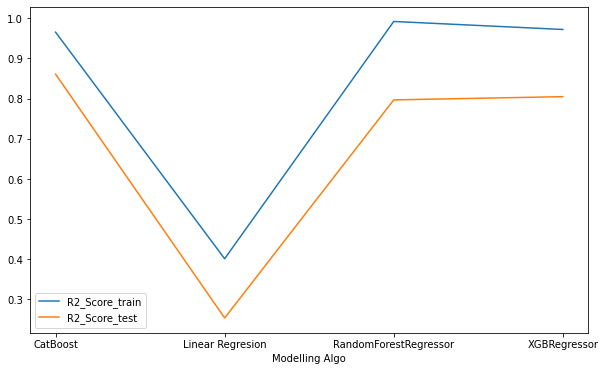

In [15]:
fig, ax = plt.subplots(figsize=(10,6))       
g1 =sns.lineplot(data=model1, x='Modelling Algo', y='R2_Score_train',label=None)
g1.set(ylabel=None)
g2 = sns.lineplot(data=model1, x='Modelling Algo', y='R2_Score_test',label=None)
g2.set(ylabel=None)
plt.legend(['R2_Score_train','R2_Score_test'])
plt.show()

### RMSE

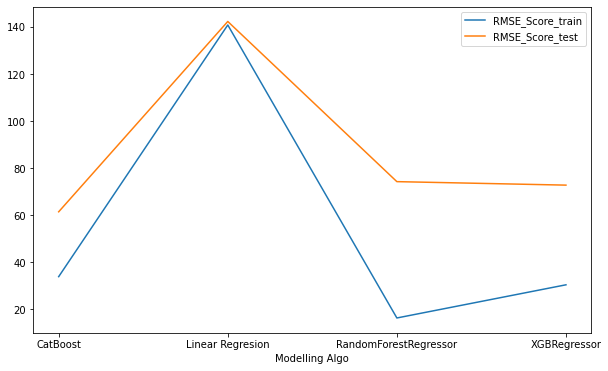

In [16]:
fig, ax = plt.subplots(figsize=(10,6))       
g1 = sns.lineplot(data=model1, x='Modelling Algo', y='RMSE_train')
g1.set(ylabel=None)
g2 = sns.lineplot(data=model1, x='Modelling Algo', y='RMSE_test')
g1.set(ylabel=None)
plt.legend(['RMSE_Score_train','RMSE_Score_test'])
plt.show()

### MAE

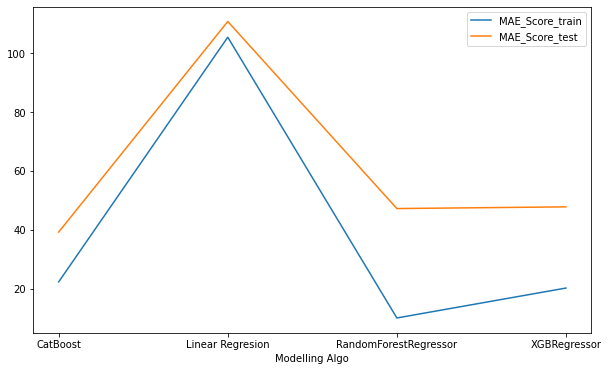

In [17]:
fig, ax = plt.subplots(figsize=(10,6))       
g1 = sns.lineplot(data=model1, x='Modelling Algo', y='MAE_Score_train')
g1.set(ylabel=None)
g2 = sns.lineplot(data=model1, x='Modelling Algo', y='MAE_Score_test')
g1.set(ylabel=None)
plt.legend(['MAE_Score_train','MAE_Score_test'])
plt.show()

Based on comparison for each model:
1. We see the base model (linear regression) has a very low r2 score and the highest rmse & mae score. So we conclude that linear regression is underfit and cannot be used for modeling
2. Random Forest algorithm has a quite large gap between model training and model testing. We conclude based on this gap that Random Forest is overfitting.
3. XGBoost algorithm and CatBoost has a similarity in performance. Both are less overfit than Random Forest.

We will use XGBoost and CatBoost in HyperParameter Tuning in order to achive better performance model.

# **05. Hyperparameter Tunning**

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV


## XGBRegressor Hyperparameter tunning

#### XGB Parameter tunning

In [19]:
param_grid = {"learning_rate"    : [0.10, 0.20, 0.30 ] ,
 "max_depth"        : [ 4, 6, 8, 10],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
 "n_estimators"     : [200,500,1000,2000]}

### Cross Validation

In [20]:
folds = KFold(n_splits = 5)

### XGB BayesianSearchCV

In [21]:
XGB_bayes_search = BayesSearchCV(
    XGBRegressor(random_state=123),
    param_grid,
    cv=folds)

%time XGB_bayes_search.fit(X_train, y_train)

Wall time: 13min 22s


BayesSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
              estimator=XGBRegressor(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, m...straints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=123,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
            

In [22]:
XGB_bayes_search.best_params_

OrderedDict([('colsample_bytree', 0.3),
             ('learning_rate', 0.1),
             ('max_depth', 6),
             ('n_estimators', 500)])

In [23]:
XGB_bayes_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
XGB_best_bayes = XGB_bayes_search.best_estimator_

In [25]:
XGB_best_bayes.fit(X_train, y_train)

XGB_bayes_y_pred = XGB_best_bayes.predict(X_test)
XGB_bayes_r2 = r2_score(y_test,XGB_bayes_y_pred )
XGB_bayes_RMSE = np.sqrt(mean_squared_error(y_test,XGB_bayes_y_pred))
XGB_bayes_MAE = mean_absolute_error(y_test,XGB_bayes_y_pred) 

In [26]:
print('R-squared XGB_bayes :',XGB_bayes_r2)
print('RMSE XGB_bayes :',XGB_bayes_RMSE)
print('MAE XGB_bayes :', XGB_bayes_MAE)

R-squared XGB_bayes : 0.8412638823918935
RMSE XGB_bayes : 65.6527651429764
MAE XGB_bayes : 44.61173548822535


## CatBoost Regressor Hyperparameter Tunning

In [27]:
param_bayes_cat= {  'depth'         : [4,6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3],
                  'iterations'    : [150, 200, 250, 300],
                  'l2_leaf_reg'   : [None, 1.0, 5.5, 0.5]
                 }

### CatBoost Bayesian Search CV

In [28]:
cat_bayes_search = BayesSearchCV(
    CatBoostRegressor(random_state=123),
    param_bayes_cat,
    cv=folds
)

%time cat_bayes_search.fit(X_train, y_train)

0:	learn: 170.2799185	total: 2.82ms	remaining: 702ms
1:	learn: 155.1755954	total: 5.58ms	remaining: 692ms
2:	learn: 144.2191527	total: 8.08ms	remaining: 666ms
3:	learn: 135.8246110	total: 10.9ms	remaining: 670ms
4:	learn: 129.8834600	total: 13.6ms	remaining: 667ms
5:	learn: 125.4478319	total: 16.3ms	remaining: 663ms
6:	learn: 117.5760524	total: 19.1ms	remaining: 661ms
7:	learn: 114.2778817	total: 21.6ms	remaining: 654ms
8:	learn: 109.6547444	total: 24.2ms	remaining: 649ms
9:	learn: 106.7278290	total: 27ms	remaining: 649ms
10:	learn: 103.6143275	total: 29.6ms	remaining: 643ms
11:	learn: 100.6688386	total: 32.2ms	remaining: 639ms
12:	learn: 99.0454256	total: 34.7ms	remaining: 632ms
13:	learn: 97.9859859	total: 37.3ms	remaining: 628ms
14:	learn: 94.3711122	total: 39.8ms	remaining: 624ms
15:	learn: 93.1862591	total: 42.5ms	remaining: 622ms
16:	learn: 92.4936164	total: 45.2ms	remaining: 620ms
17:	learn: 91.2280050	total: 47.8ms	remaining: 617ms
18:	learn: 90.5649125	total: 50.5ms	remaining:

181:	learn: 48.4466527	total: 525ms	remaining: 196ms
182:	learn: 48.3849116	total: 527ms	remaining: 193ms
183:	learn: 48.3285528	total: 530ms	remaining: 190ms
184:	learn: 48.2759444	total: 533ms	remaining: 187ms
185:	learn: 48.2507864	total: 536ms	remaining: 184ms
186:	learn: 48.2153350	total: 538ms	remaining: 181ms
187:	learn: 48.1775865	total: 541ms	remaining: 179ms
188:	learn: 48.1424450	total: 544ms	remaining: 176ms
189:	learn: 48.1357736	total: 547ms	remaining: 173ms
190:	learn: 48.1081689	total: 549ms	remaining: 170ms
191:	learn: 48.0681627	total: 552ms	remaining: 167ms
192:	learn: 48.0156463	total: 555ms	remaining: 164ms
193:	learn: 47.9288068	total: 557ms	remaining: 161ms
194:	learn: 47.8947651	total: 560ms	remaining: 158ms
195:	learn: 47.8784506	total: 562ms	remaining: 155ms
196:	learn: 47.8534631	total: 565ms	remaining: 152ms
197:	learn: 47.8504532	total: 568ms	remaining: 149ms
198:	learn: 47.7825209	total: 570ms	remaining: 146ms
199:	learn: 47.7605002	total: 573ms	remaining:

110:	learn: 51.9632466	total: 302ms	remaining: 378ms
111:	learn: 51.8730602	total: 305ms	remaining: 375ms
112:	learn: 51.8192599	total: 307ms	remaining: 372ms
113:	learn: 51.5904730	total: 310ms	remaining: 370ms
114:	learn: 51.5502913	total: 313ms	remaining: 367ms
115:	learn: 51.4700564	total: 316ms	remaining: 365ms
116:	learn: 51.4235847	total: 318ms	remaining: 362ms
117:	learn: 51.3549093	total: 321ms	remaining: 359ms
118:	learn: 51.2417406	total: 324ms	remaining: 356ms
119:	learn: 51.0024990	total: 327ms	remaining: 354ms
120:	learn: 50.9389380	total: 329ms	remaining: 351ms
121:	learn: 50.8559223	total: 332ms	remaining: 348ms
122:	learn: 50.6845685	total: 335ms	remaining: 346ms
123:	learn: 50.5413101	total: 337ms	remaining: 343ms
124:	learn: 50.5172675	total: 340ms	remaining: 340ms
125:	learn: 50.3972299	total: 342ms	remaining: 337ms
126:	learn: 50.2855739	total: 345ms	remaining: 334ms
127:	learn: 50.1649149	total: 348ms	remaining: 331ms
128:	learn: 50.0861509	total: 350ms	remaining:

37:	learn: 67.9109462	total: 107ms	remaining: 595ms
38:	learn: 67.6599857	total: 110ms	remaining: 593ms
39:	learn: 66.3008191	total: 112ms	remaining: 590ms
40:	learn: 65.4910008	total: 115ms	remaining: 588ms
41:	learn: 65.2724951	total: 119ms	remaining: 587ms
42:	learn: 64.4376053	total: 121ms	remaining: 584ms
43:	learn: 63.7083468	total: 124ms	remaining: 581ms
44:	learn: 63.4920167	total: 127ms	remaining: 578ms
45:	learn: 63.3820333	total: 130ms	remaining: 575ms
46:	learn: 62.9094858	total: 133ms	remaining: 573ms
47:	learn: 62.8036696	total: 135ms	remaining: 569ms
48:	learn: 62.5387925	total: 138ms	remaining: 567ms
49:	learn: 61.5940763	total: 141ms	remaining: 564ms
50:	learn: 61.3126009	total: 144ms	remaining: 560ms
51:	learn: 61.1124842	total: 146ms	remaining: 558ms
52:	learn: 60.9304487	total: 149ms	remaining: 555ms
53:	learn: 60.7753293	total: 152ms	remaining: 551ms
54:	learn: 60.3670153	total: 155ms	remaining: 548ms
55:	learn: 60.1633334	total: 157ms	remaining: 545ms
56:	learn: 5

195:	learn: 47.1154205	total: 539ms	remaining: 148ms
196:	learn: 46.9482796	total: 541ms	remaining: 146ms
197:	learn: 46.8954161	total: 544ms	remaining: 143ms
198:	learn: 46.8769444	total: 547ms	remaining: 140ms
199:	learn: 46.8281592	total: 549ms	remaining: 137ms
200:	learn: 46.8064577	total: 552ms	remaining: 135ms
201:	learn: 46.7311094	total: 555ms	remaining: 132ms
202:	learn: 46.6592437	total: 558ms	remaining: 129ms
203:	learn: 46.6350672	total: 560ms	remaining: 126ms
204:	learn: 46.4820931	total: 563ms	remaining: 124ms
205:	learn: 46.4370192	total: 566ms	remaining: 121ms
206:	learn: 46.3948229	total: 569ms	remaining: 118ms
207:	learn: 46.3573266	total: 572ms	remaining: 115ms
208:	learn: 46.3362681	total: 574ms	remaining: 113ms
209:	learn: 46.2850205	total: 577ms	remaining: 110ms
210:	learn: 46.1811992	total: 580ms	remaining: 107ms
211:	learn: 46.1198410	total: 583ms	remaining: 104ms
212:	learn: 46.0920156	total: 585ms	remaining: 102ms
213:	learn: 46.0633943	total: 588ms	remaining:

125:	learn: 46.6446450	total: 351ms	remaining: 345ms
126:	learn: 46.6067022	total: 353ms	remaining: 342ms
127:	learn: 46.5227932	total: 356ms	remaining: 340ms
128:	learn: 46.4576639	total: 360ms	remaining: 337ms
129:	learn: 46.4197164	total: 363ms	remaining: 335ms
130:	learn: 46.3630783	total: 365ms	remaining: 332ms
131:	learn: 46.2492684	total: 368ms	remaining: 329ms
132:	learn: 46.2103616	total: 371ms	remaining: 326ms
133:	learn: 46.1658297	total: 374ms	remaining: 324ms
134:	learn: 46.0726972	total: 377ms	remaining: 321ms
135:	learn: 46.0394925	total: 380ms	remaining: 318ms
136:	learn: 46.0139209	total: 382ms	remaining: 315ms
137:	learn: 45.9545041	total: 385ms	remaining: 313ms
138:	learn: 45.9274724	total: 388ms	remaining: 310ms
139:	learn: 45.8580563	total: 391ms	remaining: 307ms
140:	learn: 45.8095419	total: 394ms	remaining: 304ms
141:	learn: 45.6917513	total: 397ms	remaining: 302ms
142:	learn: 45.6376918	total: 399ms	remaining: 299ms
143:	learn: 45.6011128	total: 402ms	remaining:

48:	learn: 55.2903783	total: 133ms	remaining: 546ms
49:	learn: 54.8496492	total: 136ms	remaining: 543ms
50:	learn: 54.4608834	total: 138ms	remaining: 540ms
51:	learn: 54.2775560	total: 141ms	remaining: 537ms
52:	learn: 54.0143570	total: 144ms	remaining: 537ms
53:	learn: 53.7151206	total: 147ms	remaining: 534ms
54:	learn: 53.4052518	total: 150ms	remaining: 532ms
55:	learn: 52.8696140	total: 153ms	remaining: 531ms
56:	learn: 52.4592115	total: 156ms	remaining: 529ms
57:	learn: 52.3597482	total: 159ms	remaining: 527ms
58:	learn: 52.1781841	total: 162ms	remaining: 525ms
59:	learn: 52.0697814	total: 165ms	remaining: 521ms
60:	learn: 51.7090963	total: 167ms	remaining: 519ms
61:	learn: 51.5646184	total: 170ms	remaining: 516ms
62:	learn: 51.4087476	total: 173ms	remaining: 514ms
63:	learn: 51.2845836	total: 176ms	remaining: 511ms
64:	learn: 51.1915052	total: 178ms	remaining: 508ms
65:	learn: 51.1107394	total: 181ms	remaining: 505ms
66:	learn: 51.0355222	total: 184ms	remaining: 503ms
67:	learn: 5

236:	learn: 40.3750984	total: 652ms	remaining: 35.8ms
237:	learn: 40.3596420	total: 655ms	remaining: 33ms
238:	learn: 40.3391925	total: 657ms	remaining: 30.3ms
239:	learn: 40.3101230	total: 660ms	remaining: 27.5ms
240:	learn: 40.2971783	total: 663ms	remaining: 24.8ms
241:	learn: 40.2632393	total: 666ms	remaining: 22ms
242:	learn: 40.2521895	total: 669ms	remaining: 19.3ms
243:	learn: 40.2286226	total: 671ms	remaining: 16.5ms
244:	learn: 40.2038480	total: 674ms	remaining: 13.8ms
245:	learn: 40.1513440	total: 677ms	remaining: 11ms
246:	learn: 40.0928326	total: 679ms	remaining: 8.25ms
247:	learn: 40.0703293	total: 682ms	remaining: 5.5ms
248:	learn: 40.0348912	total: 685ms	remaining: 2.75ms
249:	learn: 40.0084162	total: 687ms	remaining: 0us
0:	learn: 161.9688653	total: 25.1ms	remaining: 6.25s
1:	learn: 140.9853504	total: 40.1ms	remaining: 4.97s
2:	learn: 123.7277880	total: 44.8ms	remaining: 3.69s
3:	learn: 111.1752899	total: 49.4ms	remaining: 3.04s
4:	learn: 102.2612021	total: 54ms	remainin

152:	learn: 32.8366034	total: 1.3s	remaining: 825ms
153:	learn: 32.7901931	total: 1.31s	remaining: 820ms
154:	learn: 32.7071684	total: 1.32s	remaining: 809ms
155:	learn: 32.6618248	total: 1.32s	remaining: 799ms
156:	learn: 32.5771738	total: 1.33s	remaining: 788ms
157:	learn: 32.4665670	total: 1.34s	remaining: 778ms
158:	learn: 32.4364390	total: 1.34s	remaining: 767ms
159:	learn: 32.3772378	total: 1.36s	remaining: 765ms
160:	learn: 32.3458201	total: 1.36s	remaining: 755ms
161:	learn: 32.2792957	total: 1.38s	remaining: 747ms
162:	learn: 32.2388356	total: 1.38s	remaining: 737ms
163:	learn: 32.1968584	total: 1.39s	remaining: 729ms
164:	learn: 32.0727887	total: 1.41s	remaining: 724ms
165:	learn: 32.0187376	total: 1.42s	remaining: 719ms
166:	learn: 31.9036100	total: 1.44s	remaining: 714ms
167:	learn: 31.8490186	total: 1.44s	remaining: 704ms
168:	learn: 31.7996112	total: 1.45s	remaining: 693ms
169:	learn: 31.7146595	total: 1.45s	remaining: 683ms
170:	learn: 31.6280343	total: 1.47s	remaining: 

61:	learn: 39.8264190	total: 290ms	remaining: 878ms
62:	learn: 39.6790089	total: 295ms	remaining: 874ms
63:	learn: 39.5403173	total: 299ms	remaining: 869ms
64:	learn: 39.4484750	total: 304ms	remaining: 865ms
65:	learn: 39.2054893	total: 308ms	remaining: 860ms
66:	learn: 39.0769512	total: 313ms	remaining: 855ms
67:	learn: 38.9589789	total: 318ms	remaining: 850ms
68:	learn: 38.8096874	total: 323ms	remaining: 847ms
69:	learn: 38.7215650	total: 327ms	remaining: 842ms
70:	learn: 38.5952846	total: 332ms	remaining: 838ms
71:	learn: 38.4960917	total: 337ms	remaining: 832ms
72:	learn: 38.3908392	total: 341ms	remaining: 827ms
73:	learn: 38.2526672	total: 346ms	remaining: 822ms
74:	learn: 38.1604821	total: 350ms	remaining: 817ms
75:	learn: 37.9841007	total: 355ms	remaining: 812ms
76:	learn: 37.8322201	total: 359ms	remaining: 807ms
77:	learn: 37.6401617	total: 364ms	remaining: 803ms
78:	learn: 37.5166025	total: 369ms	remaining: 798ms
79:	learn: 37.4571613	total: 373ms	remaining: 793ms
80:	learn: 3

229:	learn: 26.9914380	total: 1.08s	remaining: 94ms
230:	learn: 26.9454972	total: 1.08s	remaining: 89.3ms
231:	learn: 26.9151993	total: 1.09s	remaining: 84.6ms
232:	learn: 26.8642329	total: 1.09s	remaining: 79.9ms
233:	learn: 26.8283012	total: 1.1s	remaining: 75.2ms
234:	learn: 26.8029919	total: 1.1s	remaining: 70.5ms
235:	learn: 26.7688015	total: 1.11s	remaining: 65.8ms
236:	learn: 26.7306466	total: 1.11s	remaining: 61.1ms
237:	learn: 26.7037893	total: 1.12s	remaining: 56.4ms
238:	learn: 26.6594194	total: 1.12s	remaining: 51.7ms
239:	learn: 26.6066089	total: 1.13s	remaining: 47ms
240:	learn: 26.5555731	total: 1.13s	remaining: 42.3ms
241:	learn: 26.5308275	total: 1.14s	remaining: 37.6ms
242:	learn: 26.4874911	total: 1.14s	remaining: 32.9ms
243:	learn: 26.4468876	total: 1.15s	remaining: 28.2ms
244:	learn: 26.4302141	total: 1.15s	remaining: 23.5ms
245:	learn: 26.4085343	total: 1.16s	remaining: 18.8ms
246:	learn: 26.3580471	total: 1.16s	remaining: 14.1ms
247:	learn: 26.3100603	total: 1.17

137:	learn: 32.5720074	total: 654ms	remaining: 531ms
138:	learn: 32.5302459	total: 659ms	remaining: 526ms
139:	learn: 32.4628985	total: 663ms	remaining: 521ms
140:	learn: 32.3958627	total: 668ms	remaining: 517ms
141:	learn: 32.3206547	total: 674ms	remaining: 512ms
142:	learn: 32.2481184	total: 678ms	remaining: 508ms
143:	learn: 32.1860045	total: 683ms	remaining: 503ms
144:	learn: 32.1363316	total: 688ms	remaining: 498ms
145:	learn: 32.0378105	total: 693ms	remaining: 493ms
146:	learn: 31.9649627	total: 697ms	remaining: 489ms
147:	learn: 31.9034796	total: 702ms	remaining: 484ms
148:	learn: 31.8768787	total: 706ms	remaining: 479ms
149:	learn: 31.8086188	total: 711ms	remaining: 474ms
150:	learn: 31.7570811	total: 716ms	remaining: 470ms
151:	learn: 31.7142341	total: 721ms	remaining: 465ms
152:	learn: 31.6235128	total: 726ms	remaining: 460ms
153:	learn: 31.5702220	total: 731ms	remaining: 455ms
154:	learn: 31.4906997	total: 735ms	remaining: 451ms
155:	learn: 31.4396047	total: 740ms	remaining:

60:	learn: 37.3797195	total: 289ms	remaining: 896ms
61:	learn: 37.1449526	total: 294ms	remaining: 891ms
62:	learn: 36.9935244	total: 299ms	remaining: 886ms
63:	learn: 36.8912692	total: 304ms	remaining: 882ms
64:	learn: 36.6980430	total: 309ms	remaining: 879ms
65:	learn: 36.5590585	total: 314ms	remaining: 876ms
66:	learn: 36.4186606	total: 319ms	remaining: 871ms
67:	learn: 36.2666855	total: 324ms	remaining: 867ms
68:	learn: 36.0872405	total: 328ms	remaining: 861ms
69:	learn: 36.0102437	total: 333ms	remaining: 856ms
70:	learn: 35.8656132	total: 338ms	remaining: 852ms
71:	learn: 35.7473538	total: 343ms	remaining: 847ms
72:	learn: 35.5839892	total: 347ms	remaining: 842ms
73:	learn: 35.4432073	total: 352ms	remaining: 837ms
74:	learn: 35.2914505	total: 356ms	remaining: 832ms
75:	learn: 35.1550375	total: 361ms	remaining: 827ms
76:	learn: 35.0177231	total: 366ms	remaining: 823ms
77:	learn: 34.9555066	total: 371ms	remaining: 818ms
78:	learn: 34.8170684	total: 376ms	remaining: 814ms
79:	learn: 3

226:	learn: 25.3137146	total: 1.08s	remaining: 109ms
227:	learn: 25.2682045	total: 1.08s	remaining: 104ms
228:	learn: 25.2186110	total: 1.09s	remaining: 99.8ms
229:	learn: 25.1684394	total: 1.09s	remaining: 95ms
230:	learn: 25.1032947	total: 1.1s	remaining: 90.3ms
231:	learn: 25.0397518	total: 1.1s	remaining: 85.5ms
232:	learn: 24.9968374	total: 1.11s	remaining: 80.8ms
233:	learn: 24.9598020	total: 1.11s	remaining: 76ms
234:	learn: 24.9190940	total: 1.12s	remaining: 71.3ms
235:	learn: 24.8873593	total: 1.12s	remaining: 66.5ms
236:	learn: 24.8364132	total: 1.13s	remaining: 61.8ms
237:	learn: 24.7626929	total: 1.13s	remaining: 57ms
238:	learn: 24.7170218	total: 1.14s	remaining: 52.3ms
239:	learn: 24.6721876	total: 1.14s	remaining: 47.5ms
240:	learn: 24.6000541	total: 1.15s	remaining: 42.8ms
241:	learn: 24.5613043	total: 1.15s	remaining: 38ms
242:	learn: 24.5222616	total: 1.15s	remaining: 33.3ms
243:	learn: 24.5039158	total: 1.16s	remaining: 28.5ms
244:	learn: 24.4771684	total: 1.16s	rema

149:	learn: 28.3130535	total: 735ms	remaining: 490ms
150:	learn: 28.2394354	total: 740ms	remaining: 485ms
151:	learn: 28.1921044	total: 745ms	remaining: 480ms
152:	learn: 28.1245881	total: 750ms	remaining: 475ms
153:	learn: 28.0993252	total: 754ms	remaining: 470ms
154:	learn: 28.0594969	total: 759ms	remaining: 465ms
155:	learn: 28.0217634	total: 763ms	remaining: 460ms
156:	learn: 27.9813916	total: 768ms	remaining: 455ms
157:	learn: 27.8925445	total: 773ms	remaining: 450ms
158:	learn: 27.8227974	total: 778ms	remaining: 445ms
159:	learn: 27.7756322	total: 782ms	remaining: 440ms
160:	learn: 27.7298446	total: 787ms	remaining: 435ms
161:	learn: 27.6501020	total: 792ms	remaining: 430ms
162:	learn: 27.6041190	total: 797ms	remaining: 425ms
163:	learn: 27.5396304	total: 801ms	remaining: 420ms
164:	learn: 27.4977939	total: 806ms	remaining: 415ms
165:	learn: 27.4542847	total: 811ms	remaining: 410ms
166:	learn: 27.3782088	total: 815ms	remaining: 405ms
167:	learn: 27.2997188	total: 820ms	remaining:

59:	learn: 47.9906885	total: 264ms	remaining: 837ms
60:	learn: 47.8452990	total: 268ms	remaining: 830ms
61:	learn: 47.6777364	total: 271ms	remaining: 823ms
62:	learn: 47.5378527	total: 275ms	remaining: 816ms
63:	learn: 47.4518699	total: 278ms	remaining: 809ms
64:	learn: 47.3515782	total: 282ms	remaining: 803ms
65:	learn: 47.1825954	total: 286ms	remaining: 797ms
66:	learn: 47.0137200	total: 289ms	remaining: 791ms
67:	learn: 46.8522180	total: 293ms	remaining: 784ms
68:	learn: 46.7452775	total: 296ms	remaining: 778ms
69:	learn: 46.5681653	total: 300ms	remaining: 771ms
70:	learn: 46.4431871	total: 303ms	remaining: 764ms
71:	learn: 46.3286664	total: 306ms	remaining: 758ms
72:	learn: 46.2197643	total: 310ms	remaining: 751ms
73:	learn: 46.1284531	total: 313ms	remaining: 745ms
74:	learn: 45.9885871	total: 317ms	remaining: 739ms
75:	learn: 45.8720845	total: 321ms	remaining: 734ms
76:	learn: 45.7922665	total: 325ms	remaining: 729ms
77:	learn: 45.6779420	total: 328ms	remaining: 723ms
78:	learn: 4

225:	learn: 36.9024242	total: 906ms	remaining: 96.3ms
226:	learn: 36.8498339	total: 919ms	remaining: 93.1ms
227:	learn: 36.8100088	total: 922ms	remaining: 89ms
228:	learn: 36.7898110	total: 926ms	remaining: 84.9ms
229:	learn: 36.7661142	total: 929ms	remaining: 80.8ms
230:	learn: 36.7433366	total: 933ms	remaining: 76.7ms
231:	learn: 36.7078213	total: 937ms	remaining: 72.7ms
232:	learn: 36.6744767	total: 941ms	remaining: 68.6ms
233:	learn: 36.6172502	total: 944ms	remaining: 64.6ms
234:	learn: 36.5721038	total: 948ms	remaining: 60.5ms
235:	learn: 36.5450147	total: 964ms	remaining: 57.2ms
236:	learn: 36.5212054	total: 968ms	remaining: 53.1ms
237:	learn: 36.4880349	total: 972ms	remaining: 49ms
238:	learn: 36.4496753	total: 975ms	remaining: 44.9ms
239:	learn: 36.3761776	total: 979ms	remaining: 40.8ms
240:	learn: 36.3502790	total: 982ms	remaining: 36.7ms
241:	learn: 36.3184016	total: 986ms	remaining: 32.6ms
242:	learn: 36.2668148	total: 990ms	remaining: 28.5ms
243:	learn: 36.2513423	total: 99

158:	learn: 37.9355771	total: 558ms	remaining: 319ms
159:	learn: 37.9098538	total: 561ms	remaining: 316ms
160:	learn: 37.8503805	total: 565ms	remaining: 312ms
161:	learn: 37.7794925	total: 568ms	remaining: 309ms
162:	learn: 37.7595514	total: 572ms	remaining: 305ms
163:	learn: 37.6830081	total: 575ms	remaining: 302ms
164:	learn: 37.6460930	total: 579ms	remaining: 298ms
165:	learn: 37.5963299	total: 582ms	remaining: 295ms
166:	learn: 37.5214886	total: 586ms	remaining: 291ms
167:	learn: 37.4808582	total: 589ms	remaining: 288ms
168:	learn: 37.4261377	total: 593ms	remaining: 284ms
169:	learn: 37.3656333	total: 597ms	remaining: 281ms
170:	learn: 37.3330998	total: 600ms	remaining: 277ms
171:	learn: 37.2767034	total: 604ms	remaining: 274ms
172:	learn: 37.2296503	total: 607ms	remaining: 270ms
173:	learn: 37.2048423	total: 611ms	remaining: 267ms
174:	learn: 37.1235252	total: 615ms	remaining: 263ms
175:	learn: 37.0582850	total: 618ms	remaining: 260ms
176:	learn: 36.9852641	total: 622ms	remaining:

99:	learn: 43.0354501	total: 358ms	remaining: 537ms
100:	learn: 42.8913434	total: 362ms	remaining: 534ms
101:	learn: 42.8105723	total: 365ms	remaining: 530ms
102:	learn: 42.7120832	total: 369ms	remaining: 526ms
103:	learn: 42.5833231	total: 372ms	remaining: 522ms
104:	learn: 42.4696826	total: 376ms	remaining: 519ms
105:	learn: 42.3818672	total: 379ms	remaining: 515ms
106:	learn: 42.2783697	total: 383ms	remaining: 511ms
107:	learn: 42.1651718	total: 386ms	remaining: 507ms
108:	learn: 42.0859989	total: 389ms	remaining: 504ms
109:	learn: 42.0143418	total: 393ms	remaining: 500ms
110:	learn: 41.9604769	total: 397ms	remaining: 497ms
111:	learn: 41.9063887	total: 400ms	remaining: 493ms
112:	learn: 41.8391735	total: 404ms	remaining: 490ms
113:	learn: 41.7757769	total: 408ms	remaining: 486ms
114:	learn: 41.7237846	total: 412ms	remaining: 483ms
115:	learn: 41.6686803	total: 415ms	remaining: 480ms
116:	learn: 41.5984229	total: 419ms	remaining: 476ms
117:	learn: 41.5174921	total: 422ms	remaining: 

37:	learn: 47.5462012	total: 131ms	remaining: 733ms
38:	learn: 47.3495315	total: 135ms	remaining: 729ms
39:	learn: 46.9657017	total: 138ms	remaining: 726ms
40:	learn: 46.8221681	total: 142ms	remaining: 724ms
41:	learn: 46.4449273	total: 146ms	remaining: 721ms
42:	learn: 46.1851364	total: 149ms	remaining: 717ms
43:	learn: 46.0171478	total: 153ms	remaining: 715ms
44:	learn: 45.8748277	total: 156ms	remaining: 711ms
45:	learn: 45.7364627	total: 159ms	remaining: 707ms
46:	learn: 45.5618968	total: 163ms	remaining: 703ms
47:	learn: 45.2541537	total: 166ms	remaining: 700ms
48:	learn: 45.0676076	total: 170ms	remaining: 696ms
49:	learn: 44.8567911	total: 173ms	remaining: 693ms
50:	learn: 44.5056138	total: 177ms	remaining: 692ms
51:	learn: 44.3297835	total: 181ms	remaining: 691ms
52:	learn: 44.2217237	total: 185ms	remaining: 688ms
53:	learn: 43.9612509	total: 189ms	remaining: 686ms
54:	learn: 43.7634350	total: 193ms	remaining: 683ms
55:	learn: 43.4882178	total: 196ms	remaining: 680ms
56:	learn: 4

198:	learn: 33.1991530	total: 700ms	remaining: 179ms
199:	learn: 33.1661020	total: 704ms	remaining: 176ms
200:	learn: 33.1035476	total: 707ms	remaining: 172ms
201:	learn: 33.0581176	total: 711ms	remaining: 169ms
202:	learn: 33.0277215	total: 714ms	remaining: 165ms
203:	learn: 32.9773382	total: 717ms	remaining: 162ms
204:	learn: 32.9433746	total: 721ms	remaining: 158ms
205:	learn: 32.9118113	total: 724ms	remaining: 155ms
206:	learn: 32.8836501	total: 728ms	remaining: 151ms
207:	learn: 32.8618635	total: 731ms	remaining: 148ms
208:	learn: 32.8104843	total: 735ms	remaining: 144ms
209:	learn: 32.7536719	total: 739ms	remaining: 141ms
210:	learn: 32.7058104	total: 742ms	remaining: 137ms
211:	learn: 32.6679601	total: 746ms	remaining: 134ms
212:	learn: 32.6405499	total: 749ms	remaining: 130ms
213:	learn: 32.5919683	total: 753ms	remaining: 127ms
214:	learn: 32.5566796	total: 756ms	remaining: 123ms
215:	learn: 32.5185916	total: 759ms	remaining: 120ms
216:	learn: 32.4966937	total: 762ms	remaining:

122:	learn: 36.0715168	total: 439ms	remaining: 454ms
123:	learn: 36.0090063	total: 443ms	remaining: 450ms
124:	learn: 35.9380307	total: 447ms	remaining: 447ms
125:	learn: 35.8680201	total: 450ms	remaining: 443ms
126:	learn: 35.7974241	total: 454ms	remaining: 440ms
127:	learn: 35.7463775	total: 458ms	remaining: 436ms
128:	learn: 35.6809591	total: 461ms	remaining: 432ms
129:	learn: 35.6165541	total: 464ms	remaining: 429ms
130:	learn: 35.5631926	total: 468ms	remaining: 425ms
131:	learn: 35.5042835	total: 472ms	remaining: 422ms
132:	learn: 35.4033021	total: 475ms	remaining: 418ms
133:	learn: 35.3125223	total: 479ms	remaining: 415ms
134:	learn: 35.2561400	total: 483ms	remaining: 411ms
135:	learn: 35.2219710	total: 487ms	remaining: 408ms
136:	learn: 35.1492522	total: 490ms	remaining: 404ms
137:	learn: 35.0758062	total: 494ms	remaining: 401ms
138:	learn: 35.0288555	total: 498ms	remaining: 397ms
139:	learn: 34.9756178	total: 501ms	remaining: 394ms
140:	learn: 34.9358918	total: 505ms	remaining:

34:	learn: 47.9649354	total: 223ms	remaining: 732ms
35:	learn: 47.7062072	total: 228ms	remaining: 721ms
36:	learn: 47.3948035	total: 247ms	remaining: 753ms
37:	learn: 46.9601801	total: 261ms	remaining: 769ms
38:	learn: 46.6567155	total: 266ms	remaining: 758ms
39:	learn: 46.3919638	total: 271ms	remaining: 746ms
40:	learn: 46.0410644	total: 276ms	remaining: 734ms
41:	learn: 45.6917061	total: 291ms	remaining: 747ms
42:	learn: 45.4965423	total: 295ms	remaining: 735ms
43:	learn: 45.3160681	total: 305ms	remaining: 734ms
44:	learn: 45.0937225	total: 320ms	remaining: 748ms
45:	learn: 44.9080288	total: 335ms	remaining: 758ms
46:	learn: 44.7325150	total: 340ms	remaining: 744ms
47:	learn: 44.4341784	total: 344ms	remaining: 732ms
48:	learn: 44.2041628	total: 349ms	remaining: 720ms
49:	learn: 44.0350018	total: 354ms	remaining: 708ms
50:	learn: 43.9130099	total: 359ms	remaining: 697ms
51:	learn: 43.6746021	total: 364ms	remaining: 685ms
52:	learn: 43.4962532	total: 368ms	remaining: 674ms
53:	learn: 4

47:	learn: 42.4730668	total: 225ms	remaining: 477ms
48:	learn: 42.2609841	total: 229ms	remaining: 473ms
49:	learn: 42.0944780	total: 234ms	remaining: 468ms
50:	learn: 41.8930894	total: 239ms	remaining: 463ms
51:	learn: 41.6782496	total: 244ms	remaining: 460ms
52:	learn: 41.4616521	total: 249ms	remaining: 455ms
53:	learn: 41.2630742	total: 253ms	remaining: 451ms
54:	learn: 41.1623856	total: 258ms	remaining: 445ms
55:	learn: 40.9990336	total: 262ms	remaining: 440ms
56:	learn: 40.6687516	total: 267ms	remaining: 436ms
57:	learn: 40.4821375	total: 272ms	remaining: 431ms
58:	learn: 40.3330000	total: 277ms	remaining: 427ms
59:	learn: 40.0469574	total: 282ms	remaining: 422ms
60:	learn: 39.9606605	total: 286ms	remaining: 418ms
61:	learn: 39.8264190	total: 291ms	remaining: 413ms
62:	learn: 39.6790089	total: 296ms	remaining: 408ms
63:	learn: 39.5403173	total: 300ms	remaining: 403ms
64:	learn: 39.4484750	total: 305ms	remaining: 399ms
65:	learn: 39.2054893	total: 310ms	remaining: 395ms
66:	learn: 3

62:	learn: 40.3296859	total: 303ms	remaining: 419ms
63:	learn: 40.1979571	total: 308ms	remaining: 414ms
64:	learn: 40.0239898	total: 313ms	remaining: 409ms
65:	learn: 39.8358281	total: 318ms	remaining: 405ms
66:	learn: 39.6382724	total: 323ms	remaining: 400ms
67:	learn: 39.5161456	total: 328ms	remaining: 395ms
68:	learn: 39.3713167	total: 332ms	remaining: 390ms
69:	learn: 39.2208061	total: 337ms	remaining: 385ms
70:	learn: 39.1458169	total: 341ms	remaining: 380ms
71:	learn: 39.0203815	total: 346ms	remaining: 375ms
72:	learn: 38.8173168	total: 351ms	remaining: 370ms
73:	learn: 38.6881246	total: 355ms	remaining: 365ms
74:	learn: 38.5999333	total: 360ms	remaining: 360ms
75:	learn: 38.5282701	total: 365ms	remaining: 355ms
76:	learn: 38.4469144	total: 370ms	remaining: 351ms
77:	learn: 38.3076142	total: 375ms	remaining: 346ms
78:	learn: 38.1456625	total: 379ms	remaining: 341ms
79:	learn: 38.0399672	total: 384ms	remaining: 336ms
80:	learn: 37.9776895	total: 389ms	remaining: 331ms
81:	learn: 3

82:	learn: 34.3666316	total: 412ms	remaining: 333ms
83:	learn: 34.3017842	total: 417ms	remaining: 327ms
84:	learn: 34.1895987	total: 422ms	remaining: 322ms
85:	learn: 34.1124943	total: 427ms	remaining: 318ms
86:	learn: 34.0334534	total: 432ms	remaining: 312ms
87:	learn: 33.9450725	total: 436ms	remaining: 307ms
88:	learn: 33.8920799	total: 441ms	remaining: 302ms
89:	learn: 33.7487535	total: 446ms	remaining: 297ms
90:	learn: 33.6467276	total: 451ms	remaining: 292ms
91:	learn: 33.5624252	total: 456ms	remaining: 287ms
92:	learn: 33.4022914	total: 460ms	remaining: 282ms
93:	learn: 33.2969061	total: 466ms	remaining: 277ms
94:	learn: 33.2476676	total: 470ms	remaining: 272ms
95:	learn: 33.1719333	total: 475ms	remaining: 267ms
96:	learn: 33.0942129	total: 480ms	remaining: 262ms
97:	learn: 32.9581829	total: 485ms	remaining: 257ms
98:	learn: 32.8496261	total: 489ms	remaining: 252ms
99:	learn: 32.7645140	total: 494ms	remaining: 247ms
100:	learn: 32.7035930	total: 498ms	remaining: 242ms
101:	learn:

111:	learn: 30.7822947	total: 557ms	remaining: 189ms
112:	learn: 30.7033135	total: 562ms	remaining: 184ms
113:	learn: 30.6076853	total: 567ms	remaining: 179ms
114:	learn: 30.5443948	total: 572ms	remaining: 174ms
115:	learn: 30.5114639	total: 577ms	remaining: 169ms
116:	learn: 30.4110624	total: 581ms	remaining: 164ms
117:	learn: 30.3488557	total: 586ms	remaining: 159ms
118:	learn: 30.2883580	total: 591ms	remaining: 154ms
119:	learn: 30.2379674	total: 595ms	remaining: 149ms
120:	learn: 30.1160988	total: 600ms	remaining: 144ms
121:	learn: 30.0624906	total: 605ms	remaining: 139ms
122:	learn: 29.9937526	total: 609ms	remaining: 134ms
123:	learn: 29.9509196	total: 614ms	remaining: 129ms
124:	learn: 29.8527128	total: 619ms	remaining: 124ms
125:	learn: 29.7454544	total: 623ms	remaining: 119ms
126:	learn: 29.7038753	total: 628ms	remaining: 114ms
127:	learn: 29.6059066	total: 633ms	remaining: 109ms
128:	learn: 29.5682978	total: 637ms	remaining: 104ms
129:	learn: 29.4822888	total: 643ms	remaining:

117:	learn: 59.7496077	total: 348ms	remaining: 389ms
118:	learn: 59.7002237	total: 351ms	remaining: 386ms
119:	learn: 59.6053223	total: 354ms	remaining: 383ms
120:	learn: 59.5070091	total: 357ms	remaining: 381ms
121:	learn: 59.4241219	total: 361ms	remaining: 379ms
122:	learn: 59.3778987	total: 364ms	remaining: 376ms
123:	learn: 59.1844359	total: 367ms	remaining: 373ms
124:	learn: 59.0029037	total: 370ms	remaining: 370ms
125:	learn: 58.8844641	total: 373ms	remaining: 367ms
126:	learn: 58.7673938	total: 376ms	remaining: 364ms
127:	learn: 58.5325942	total: 379ms	remaining: 361ms
128:	learn: 58.4466616	total: 382ms	remaining: 358ms
129:	learn: 58.3861649	total: 385ms	remaining: 355ms
130:	learn: 58.2382171	total: 388ms	remaining: 352ms
131:	learn: 58.1541911	total: 391ms	remaining: 349ms
132:	learn: 58.0520068	total: 394ms	remaining: 347ms
133:	learn: 57.8968087	total: 398ms	remaining: 344ms
134:	learn: 57.8186399	total: 401ms	remaining: 341ms
135:	learn: 57.6828242	total: 404ms	remaining:

30:	learn: 94.4113267	total: 102ms	remaining: 718ms
31:	learn: 93.4765930	total: 105ms	remaining: 713ms
32:	learn: 92.9176201	total: 107ms	remaining: 706ms
33:	learn: 92.1072186	total: 110ms	remaining: 699ms
34:	learn: 91.6129530	total: 113ms	remaining: 695ms
35:	learn: 90.9329341	total: 116ms	remaining: 690ms
36:	learn: 90.4961581	total: 119ms	remaining: 685ms
37:	learn: 88.6890483	total: 122ms	remaining: 678ms
38:	learn: 87.9885296	total: 124ms	remaining: 672ms
39:	learn: 87.4921714	total: 127ms	remaining: 667ms
40:	learn: 87.2100928	total: 130ms	remaining: 661ms
41:	learn: 86.9493283	total: 132ms	remaining: 656ms
42:	learn: 86.4173605	total: 135ms	remaining: 650ms
43:	learn: 84.7837650	total: 138ms	remaining: 644ms
44:	learn: 84.5265996	total: 140ms	remaining: 639ms
45:	learn: 84.4004947	total: 143ms	remaining: 634ms
46:	learn: 83.6785278	total: 146ms	remaining: 629ms
47:	learn: 82.9586953	total: 148ms	remaining: 625ms
48:	learn: 82.7987659	total: 151ms	remaining: 619ms
49:	learn: 8

192:	learn: 54.8916358	total: 558ms	remaining: 165ms
193:	learn: 54.8501941	total: 561ms	remaining: 162ms
194:	learn: 54.7996872	total: 565ms	remaining: 159ms
195:	learn: 54.7198427	total: 567ms	remaining: 156ms
196:	learn: 54.6812055	total: 570ms	remaining: 153ms
197:	learn: 54.6661117	total: 573ms	remaining: 151ms
198:	learn: 54.6163254	total: 576ms	remaining: 148ms
199:	learn: 54.5947059	total: 579ms	remaining: 145ms
200:	learn: 54.4354758	total: 582ms	remaining: 142ms
201:	learn: 54.1585028	total: 584ms	remaining: 139ms
202:	learn: 54.1248249	total: 587ms	remaining: 136ms
203:	learn: 54.1033967	total: 590ms	remaining: 133ms
204:	learn: 54.0330464	total: 593ms	remaining: 130ms
205:	learn: 53.9806515	total: 595ms	remaining: 127ms
206:	learn: 53.9615941	total: 598ms	remaining: 124ms
207:	learn: 53.9303065	total: 601ms	remaining: 121ms
208:	learn: 53.9204083	total: 604ms	remaining: 118ms
209:	learn: 53.8849085	total: 606ms	remaining: 115ms
210:	learn: 53.8398878	total: 609ms	remaining:

126:	learn: 59.0525657	total: 347ms	remaining: 336ms
127:	learn: 58.8008202	total: 350ms	remaining: 334ms
128:	learn: 58.7380164	total: 353ms	remaining: 331ms
129:	learn: 58.5400208	total: 357ms	remaining: 329ms
130:	learn: 58.4960918	total: 360ms	remaining: 327ms
131:	learn: 58.3267669	total: 363ms	remaining: 325ms
132:	learn: 58.2980761	total: 366ms	remaining: 322ms
133:	learn: 58.2660999	total: 369ms	remaining: 319ms
134:	learn: 58.1746124	total: 372ms	remaining: 317ms
135:	learn: 58.0219175	total: 375ms	remaining: 314ms
136:	learn: 57.8838238	total: 378ms	remaining: 312ms
137:	learn: 57.8262133	total: 381ms	remaining: 309ms
138:	learn: 57.7891990	total: 384ms	remaining: 306ms
139:	learn: 57.7401789	total: 387ms	remaining: 304ms
140:	learn: 57.6693226	total: 390ms	remaining: 302ms
141:	learn: 57.5324566	total: 394ms	remaining: 299ms
142:	learn: 57.3843258	total: 397ms	remaining: 297ms
143:	learn: 57.2345418	total: 400ms	remaining: 294ms
144:	learn: 57.2127975	total: 403ms	remaining:

48:	learn: 78.1940131	total: 136ms	remaining: 557ms
49:	learn: 78.0743741	total: 139ms	remaining: 555ms
50:	learn: 76.3328109	total: 141ms	remaining: 552ms
51:	learn: 75.8984173	total: 144ms	remaining: 549ms
52:	learn: 75.4153759	total: 147ms	remaining: 547ms
53:	learn: 75.3421267	total: 150ms	remaining: 543ms
54:	learn: 75.0659500	total: 152ms	remaining: 540ms
55:	learn: 74.6396420	total: 155ms	remaining: 536ms
56:	learn: 73.0022931	total: 158ms	remaining: 533ms
57:	learn: 72.7888918	total: 160ms	remaining: 531ms
58:	learn: 72.2724168	total: 163ms	remaining: 527ms
59:	learn: 72.1464461	total: 165ms	remaining: 524ms
60:	learn: 71.7830033	total: 168ms	remaining: 520ms
61:	learn: 70.2599989	total: 171ms	remaining: 517ms
62:	learn: 70.0550430	total: 173ms	remaining: 515ms
63:	learn: 69.2000314	total: 176ms	remaining: 512ms
64:	learn: 68.0469332	total: 179ms	remaining: 510ms
65:	learn: 67.2046155	total: 182ms	remaining: 507ms
66:	learn: 67.0933295	total: 184ms	remaining: 504ms
67:	learn: 6

226:	learn: 48.1094018	total: 645ms	remaining: 65.4ms
227:	learn: 48.0794470	total: 648ms	remaining: 62.5ms
228:	learn: 48.0448670	total: 651ms	remaining: 59.7ms
229:	learn: 48.0222585	total: 654ms	remaining: 56.9ms
230:	learn: 47.9903144	total: 657ms	remaining: 54ms
231:	learn: 47.9508099	total: 660ms	remaining: 51.2ms
232:	learn: 47.9209173	total: 663ms	remaining: 48.3ms
233:	learn: 47.8843099	total: 666ms	remaining: 45.5ms
234:	learn: 47.8497241	total: 669ms	remaining: 42.7ms
235:	learn: 47.8325458	total: 672ms	remaining: 39.8ms
236:	learn: 47.8092398	total: 674ms	remaining: 37ms
237:	learn: 47.7801457	total: 677ms	remaining: 34.2ms
238:	learn: 47.7386568	total: 680ms	remaining: 31.3ms
239:	learn: 47.7106532	total: 683ms	remaining: 28.5ms
240:	learn: 47.6795349	total: 687ms	remaining: 25.6ms
241:	learn: 47.6464957	total: 689ms	remaining: 22.8ms
242:	learn: 47.5525155	total: 692ms	remaining: 19.9ms
243:	learn: 47.5402014	total: 695ms	remaining: 17.1ms
244:	learn: 47.4993340	total: 69

134:	learn: 51.5175039	total: 409ms	remaining: 348ms
135:	learn: 51.4772584	total: 413ms	remaining: 346ms
136:	learn: 51.4169671	total: 416ms	remaining: 343ms
137:	learn: 51.3652662	total: 419ms	remaining: 340ms
138:	learn: 51.3000256	total: 422ms	remaining: 337ms
139:	learn: 51.2576286	total: 424ms	remaining: 333ms
140:	learn: 51.1972887	total: 427ms	remaining: 330ms
141:	learn: 51.1519973	total: 430ms	remaining: 327ms
142:	learn: 51.0630857	total: 433ms	remaining: 324ms
143:	learn: 51.0257673	total: 436ms	remaining: 321ms
144:	learn: 50.9916969	total: 439ms	remaining: 318ms
145:	learn: 50.9030309	total: 442ms	remaining: 315ms
146:	learn: 50.8579948	total: 445ms	remaining: 312ms
147:	learn: 50.7109962	total: 448ms	remaining: 309ms
148:	learn: 50.5501031	total: 451ms	remaining: 305ms
149:	learn: 50.5084825	total: 453ms	remaining: 302ms
150:	learn: 50.4716780	total: 457ms	remaining: 299ms
151:	learn: 50.3700205	total: 460ms	remaining: 296ms
152:	learn: 50.2797359	total: 462ms	remaining:

46:	learn: 45.7234022	total: 363ms	remaining: 1.56s
47:	learn: 45.5088159	total: 378ms	remaining: 1.59s
48:	learn: 45.3706996	total: 384ms	remaining: 1.57s
49:	learn: 45.2291873	total: 393ms	remaining: 1.57s
50:	learn: 45.0239269	total: 398ms	remaining: 1.55s
51:	learn: 44.8262626	total: 403ms	remaining: 1.53s
52:	learn: 44.6027089	total: 409ms	remaining: 1.52s
53:	learn: 44.5181834	total: 413ms	remaining: 1.5s
54:	learn: 44.3452073	total: 418ms	remaining: 1.48s
55:	learn: 44.2060241	total: 423ms	remaining: 1.47s
56:	learn: 44.0477237	total: 428ms	remaining: 1.45s
57:	learn: 43.9487183	total: 433ms	remaining: 1.43s
58:	learn: 43.7680016	total: 453ms	remaining: 1.47s
59:	learn: 43.6512137	total: 458ms	remaining: 1.45s
60:	learn: 43.4975462	total: 463ms	remaining: 1.43s
61:	learn: 43.3374023	total: 468ms	remaining: 1.42s
62:	learn: 43.2118331	total: 473ms	remaining: 1.4s
63:	learn: 42.9715969	total: 478ms	remaining: 1.39s
64:	learn: 42.9179980	total: 499ms	remaining: 1.42s
65:	learn: 42.

216:	learn: 32.7371272	total: 1.83s	remaining: 279ms
217:	learn: 32.6812126	total: 1.86s	remaining: 274ms
218:	learn: 32.6271858	total: 1.87s	remaining: 264ms
219:	learn: 32.5826804	total: 1.87s	remaining: 255ms
220:	learn: 32.5206385	total: 1.88s	remaining: 246ms
221:	learn: 32.4747825	total: 1.89s	remaining: 239ms
222:	learn: 32.4681302	total: 1.9s	remaining: 230ms
223:	learn: 32.4443168	total: 1.9s	remaining: 221ms
224:	learn: 32.4124613	total: 1.91s	remaining: 212ms
225:	learn: 32.3735780	total: 1.91s	remaining: 203ms
226:	learn: 32.3144805	total: 1.92s	remaining: 194ms
227:	learn: 32.2586521	total: 1.92s	remaining: 185ms
228:	learn: 32.2186970	total: 1.93s	remaining: 177ms
229:	learn: 32.1941772	total: 1.93s	remaining: 168ms
230:	learn: 32.1519551	total: 1.94s	remaining: 159ms
231:	learn: 32.1190161	total: 1.95s	remaining: 152ms
232:	learn: 32.0820015	total: 1.96s	remaining: 143ms
233:	learn: 32.0042510	total: 1.97s	remaining: 135ms
234:	learn: 31.9589937	total: 1.99s	remaining: 1

158:	learn: 33.4285499	total: 750ms	remaining: 430ms
159:	learn: 33.3462250	total: 755ms	remaining: 425ms
160:	learn: 33.2964742	total: 760ms	remaining: 420ms
161:	learn: 33.2943917	total: 764ms	remaining: 415ms
162:	learn: 33.2163203	total: 769ms	remaining: 411ms
163:	learn: 33.1268101	total: 774ms	remaining: 406ms
164:	learn: 33.0859916	total: 779ms	remaining: 402ms
165:	learn: 33.0668590	total: 784ms	remaining: 397ms
166:	learn: 33.0234074	total: 789ms	remaining: 392ms
167:	learn: 32.9663384	total: 794ms	remaining: 387ms
168:	learn: 32.8762329	total: 798ms	remaining: 383ms
169:	learn: 32.8635254	total: 803ms	remaining: 378ms
170:	learn: 32.8431587	total: 808ms	remaining: 373ms
171:	learn: 32.7506535	total: 813ms	remaining: 369ms
172:	learn: 32.6695968	total: 818ms	remaining: 364ms
173:	learn: 32.6355947	total: 822ms	remaining: 359ms
174:	learn: 32.6213997	total: 827ms	remaining: 354ms
175:	learn: 32.5418864	total: 831ms	remaining: 350ms
176:	learn: 32.4747351	total: 836ms	remaining:

82:	learn: 39.5425940	total: 406ms	remaining: 818ms
83:	learn: 39.4716763	total: 411ms	remaining: 813ms
84:	learn: 39.3453954	total: 416ms	remaining: 808ms
85:	learn: 39.1914557	total: 421ms	remaining: 803ms
86:	learn: 39.1080792	total: 426ms	remaining: 798ms
87:	learn: 38.9439041	total: 431ms	remaining: 793ms
88:	learn: 38.8744215	total: 435ms	remaining: 787ms
89:	learn: 38.7804453	total: 440ms	remaining: 782ms
90:	learn: 38.6885054	total: 445ms	remaining: 777ms
91:	learn: 38.5587188	total: 449ms	remaining: 772ms
92:	learn: 38.4505294	total: 454ms	remaining: 766ms
93:	learn: 38.3535741	total: 459ms	remaining: 761ms
94:	learn: 38.2181432	total: 463ms	remaining: 756ms
95:	learn: 38.1900171	total: 468ms	remaining: 751ms
96:	learn: 38.0237686	total: 473ms	remaining: 746ms
97:	learn: 37.9154898	total: 477ms	remaining: 740ms
98:	learn: 37.8471617	total: 482ms	remaining: 735ms
99:	learn: 37.7842809	total: 487ms	remaining: 730ms
100:	learn: 37.6965304	total: 491ms	remaining: 725ms
101:	learn:

11:	learn: 58.6427525	total: 56.2ms	remaining: 1.11s
12:	learn: 56.2172440	total: 60.9ms	remaining: 1.11s
13:	learn: 54.7734610	total: 65.8ms	remaining: 1.11s
14:	learn: 53.5961923	total: 70.4ms	remaining: 1.1s
15:	learn: 52.5524769	total: 75.1ms	remaining: 1.1s
16:	learn: 51.4996329	total: 80ms	remaining: 1.1s
17:	learn: 50.7747741	total: 84.7ms	remaining: 1.09s
18:	learn: 49.8695882	total: 89.8ms	remaining: 1.09s
19:	learn: 48.8141262	total: 94.9ms	remaining: 1.09s
20:	learn: 48.1237656	total: 99.7ms	remaining: 1.09s
21:	learn: 47.4161450	total: 104ms	remaining: 1.08s
22:	learn: 47.0272763	total: 109ms	remaining: 1.07s
23:	learn: 46.4818376	total: 114ms	remaining: 1.07s
24:	learn: 46.0930981	total: 118ms	remaining: 1.06s
25:	learn: 45.8722872	total: 123ms	remaining: 1.06s
26:	learn: 45.5500451	total: 128ms	remaining: 1.05s
27:	learn: 45.0173345	total: 132ms	remaining: 1.05s
28:	learn: 44.8111135	total: 137ms	remaining: 1.04s
29:	learn: 44.5270233	total: 141ms	remaining: 1.03s
30:	lea

199:	learn: 29.3163592	total: 937ms	remaining: 234ms
200:	learn: 29.2617406	total: 941ms	remaining: 230ms
201:	learn: 29.2446505	total: 946ms	remaining: 225ms
202:	learn: 29.1946055	total: 951ms	remaining: 220ms
203:	learn: 29.1423873	total: 956ms	remaining: 215ms
204:	learn: 29.0777566	total: 960ms	remaining: 211ms
205:	learn: 29.0192705	total: 965ms	remaining: 206ms
206:	learn: 28.9740593	total: 970ms	remaining: 201ms
207:	learn: 28.9469831	total: 975ms	remaining: 197ms
208:	learn: 28.9158953	total: 979ms	remaining: 192ms
209:	learn: 28.8629667	total: 984ms	remaining: 187ms
210:	learn: 28.8237184	total: 988ms	remaining: 183ms
211:	learn: 28.7349151	total: 993ms	remaining: 178ms
212:	learn: 28.7003431	total: 997ms	remaining: 173ms
213:	learn: 28.6492891	total: 1s	remaining: 169ms
214:	learn: 28.6444273	total: 1.01s	remaining: 164ms
215:	learn: 28.6370953	total: 1.01s	remaining: 159ms
216:	learn: 28.5769158	total: 1.01s	remaining: 154ms
217:	learn: 28.5331326	total: 1.02s	remaining: 15

128:	learn: 31.6179001	total: 608ms	remaining: 570ms
129:	learn: 31.5841139	total: 613ms	remaining: 566ms
130:	learn: 31.5101999	total: 618ms	remaining: 562ms
131:	learn: 31.4943492	total: 623ms	remaining: 557ms
132:	learn: 31.4541511	total: 628ms	remaining: 552ms
133:	learn: 31.3861261	total: 632ms	remaining: 547ms
134:	learn: 31.3550780	total: 637ms	remaining: 543ms
135:	learn: 31.3326292	total: 642ms	remaining: 538ms
136:	learn: 31.2598863	total: 646ms	remaining: 533ms
137:	learn: 31.2041996	total: 651ms	remaining: 528ms
138:	learn: 31.1248457	total: 655ms	remaining: 523ms
139:	learn: 31.0978994	total: 660ms	remaining: 518ms
140:	learn: 31.0890895	total: 664ms	remaining: 513ms
141:	learn: 31.0872788	total: 668ms	remaining: 508ms
142:	learn: 31.0858529	total: 672ms	remaining: 503ms
143:	learn: 31.0145802	total: 677ms	remaining: 498ms
144:	learn: 30.9413109	total: 681ms	remaining: 493ms
145:	learn: 30.9176324	total: 686ms	remaining: 489ms
146:	learn: 30.8202463	total: 690ms	remaining:

77:	learn: 52.9102652	total: 275ms	remaining: 782ms
78:	learn: 52.7222115	total: 278ms	remaining: 779ms
79:	learn: 52.6076631	total: 282ms	remaining: 776ms
80:	learn: 52.4712501	total: 286ms	remaining: 772ms
81:	learn: 52.4169008	total: 289ms	remaining: 769ms
82:	learn: 52.1748959	total: 293ms	remaining: 766ms
83:	learn: 52.0385951	total: 296ms	remaining: 762ms
84:	learn: 51.9387367	total: 300ms	remaining: 758ms
85:	learn: 51.8453945	total: 303ms	remaining: 754ms
86:	learn: 51.7816995	total: 307ms	remaining: 751ms
87:	learn: 51.5977299	total: 310ms	remaining: 748ms
88:	learn: 51.5373317	total: 314ms	remaining: 744ms
89:	learn: 51.4488767	total: 317ms	remaining: 740ms
90:	learn: 51.3742880	total: 321ms	remaining: 737ms
91:	learn: 51.2133307	total: 324ms	remaining: 733ms
92:	learn: 51.0826265	total: 328ms	remaining: 729ms
93:	learn: 50.9459934	total: 331ms	remaining: 725ms
94:	learn: 50.8136101	total: 335ms	remaining: 722ms
95:	learn: 50.7123827	total: 338ms	remaining: 719ms
96:	learn: 5

254:	learn: 41.6918948	total: 979ms	remaining: 173ms
255:	learn: 41.6626670	total: 982ms	remaining: 169ms
256:	learn: 41.6236624	total: 986ms	remaining: 165ms
257:	learn: 41.5877833	total: 999ms	remaining: 163ms
258:	learn: 41.5500702	total: 1s	remaining: 159ms
259:	learn: 41.5286672	total: 1s	remaining: 155ms
260:	learn: 41.5049747	total: 1.01s	remaining: 151ms
261:	learn: 41.4760392	total: 1.01s	remaining: 147ms
262:	learn: 41.4510145	total: 1.02s	remaining: 143ms
263:	learn: 41.4197611	total: 1.02s	remaining: 139ms
264:	learn: 41.3991749	total: 1.02s	remaining: 135ms
265:	learn: 41.3627170	total: 1.03s	remaining: 131ms
266:	learn: 41.3374028	total: 1.03s	remaining: 127ms
267:	learn: 41.2759383	total: 1.03s	remaining: 123ms
268:	learn: 41.2486050	total: 1.04s	remaining: 120ms
269:	learn: 41.2380644	total: 1.04s	remaining: 116ms
270:	learn: 41.1952068	total: 1.04s	remaining: 112ms
271:	learn: 41.1647166	total: 1.05s	remaining: 108ms
272:	learn: 41.1574044	total: 1.05s	remaining: 104ms

152:	learn: 45.0703196	total: 561ms	remaining: 539ms
153:	learn: 45.0123012	total: 564ms	remaining: 535ms
154:	learn: 44.9656173	total: 568ms	remaining: 531ms
155:	learn: 44.9001149	total: 571ms	remaining: 527ms
156:	learn: 44.8561506	total: 575ms	remaining: 524ms
157:	learn: 44.7982698	total: 579ms	remaining: 520ms
158:	learn: 44.7487944	total: 582ms	remaining: 516ms
159:	learn: 44.6857805	total: 586ms	remaining: 513ms
160:	learn: 44.6483125	total: 589ms	remaining: 509ms
161:	learn: 44.6037790	total: 593ms	remaining: 505ms
162:	learn: 44.5316106	total: 597ms	remaining: 501ms
163:	learn: 44.5010771	total: 600ms	remaining: 498ms
164:	learn: 44.4483853	total: 604ms	remaining: 494ms
165:	learn: 44.3741591	total: 607ms	remaining: 490ms
166:	learn: 44.3469347	total: 611ms	remaining: 487ms
167:	learn: 44.3109215	total: 615ms	remaining: 483ms
168:	learn: 44.2764374	total: 618ms	remaining: 479ms
169:	learn: 44.2133499	total: 622ms	remaining: 476ms
170:	learn: 44.1946570	total: 626ms	remaining:

51:	learn: 57.0137224	total: 180ms	remaining: 860ms
52:	learn: 56.8603508	total: 184ms	remaining: 857ms
53:	learn: 56.6767231	total: 187ms	remaining: 854ms
54:	learn: 56.1893234	total: 191ms	remaining: 850ms
55:	learn: 55.9911599	total: 194ms	remaining: 847ms
56:	learn: 55.7364434	total: 198ms	remaining: 843ms
57:	learn: 55.3873038	total: 201ms	remaining: 840ms
58:	learn: 55.2520763	total: 205ms	remaining: 836ms
59:	learn: 54.8880175	total: 208ms	remaining: 833ms
60:	learn: 54.5596893	total: 212ms	remaining: 829ms
61:	learn: 54.3126462	total: 215ms	remaining: 824ms
62:	learn: 54.0742563	total: 218ms	remaining: 822ms
63:	learn: 53.9380664	total: 222ms	remaining: 819ms
64:	learn: 53.8229717	total: 225ms	remaining: 815ms
65:	learn: 53.6700060	total: 229ms	remaining: 811ms
66:	learn: 53.4937201	total: 232ms	remaining: 807ms
67:	learn: 53.3695251	total: 236ms	remaining: 805ms
68:	learn: 53.2677180	total: 239ms	remaining: 801ms
69:	learn: 53.0485195	total: 243ms	remaining: 797ms
70:	learn: 5

248:	learn: 40.6250490	total: 880ms	remaining: 180ms
249:	learn: 40.5788436	total: 884ms	remaining: 177ms
250:	learn: 40.5422117	total: 887ms	remaining: 173ms
251:	learn: 40.5257034	total: 891ms	remaining: 170ms
252:	learn: 40.4849372	total: 894ms	remaining: 166ms
253:	learn: 40.4360224	total: 898ms	remaining: 163ms
254:	learn: 40.3943084	total: 901ms	remaining: 159ms
255:	learn: 40.3608081	total: 905ms	remaining: 155ms
256:	learn: 40.3390996	total: 908ms	remaining: 152ms
257:	learn: 40.3029453	total: 911ms	remaining: 148ms
258:	learn: 40.2851590	total: 915ms	remaining: 145ms
259:	learn: 40.2572758	total: 919ms	remaining: 141ms
260:	learn: 40.2228478	total: 923ms	remaining: 138ms
261:	learn: 40.1954458	total: 926ms	remaining: 134ms
262:	learn: 40.1524915	total: 929ms	remaining: 131ms
263:	learn: 40.1086816	total: 932ms	remaining: 127ms
264:	learn: 40.0708800	total: 936ms	remaining: 124ms
265:	learn: 40.0678339	total: 939ms	remaining: 120ms
266:	learn: 40.0315438	total: 942ms	remaining:

139:	learn: 41.6633510	total: 491ms	remaining: 561ms
140:	learn: 41.5911301	total: 495ms	remaining: 558ms
141:	learn: 41.5108527	total: 499ms	remaining: 555ms
142:	learn: 41.4661875	total: 502ms	remaining: 551ms
143:	learn: 41.3880220	total: 506ms	remaining: 548ms
144:	learn: 41.3319652	total: 509ms	remaining: 544ms
145:	learn: 41.2747699	total: 513ms	remaining: 541ms
146:	learn: 41.2071520	total: 517ms	remaining: 538ms
147:	learn: 41.1559189	total: 520ms	remaining: 534ms
148:	learn: 41.0575389	total: 524ms	remaining: 531ms
149:	learn: 41.0034599	total: 527ms	remaining: 527ms
150:	learn: 40.9530847	total: 530ms	remaining: 523ms
151:	learn: 40.8771599	total: 534ms	remaining: 520ms
152:	learn: 40.8331651	total: 537ms	remaining: 516ms
153:	learn: 40.7736280	total: 541ms	remaining: 513ms
154:	learn: 40.7113589	total: 544ms	remaining: 509ms
155:	learn: 40.6527867	total: 547ms	remaining: 505ms
156:	learn: 40.5894217	total: 551ms	remaining: 502ms
157:	learn: 40.5536109	total: 554ms	remaining:

28:	learn: 62.6356810	total: 104ms	remaining: 970ms
29:	learn: 61.6201728	total: 108ms	remaining: 970ms
30:	learn: 60.6622823	total: 112ms	remaining: 968ms
31:	learn: 60.1632186	total: 115ms	remaining: 965ms
32:	learn: 59.3806120	total: 119ms	remaining: 963ms
33:	learn: 58.9232473	total: 123ms	remaining: 960ms
34:	learn: 58.5248740	total: 126ms	remaining: 956ms
35:	learn: 58.1455698	total: 130ms	remaining: 957ms
36:	learn: 57.3218396	total: 135ms	remaining: 956ms
37:	learn: 57.0616045	total: 138ms	remaining: 953ms
38:	learn: 56.7680667	total: 142ms	remaining: 951ms
39:	learn: 56.4472800	total: 146ms	remaining: 949ms
40:	learn: 56.1739442	total: 150ms	remaining: 946ms
41:	learn: 55.9324739	total: 153ms	remaining: 941ms
42:	learn: 55.2483781	total: 157ms	remaining: 938ms
43:	learn: 54.9376520	total: 160ms	remaining: 934ms
44:	learn: 54.2166595	total: 164ms	remaining: 929ms
45:	learn: 53.8219620	total: 168ms	remaining: 926ms
46:	learn: 53.3573083	total: 171ms	remaining: 920ms
47:	learn: 5

229:	learn: 36.7433726	total: 802ms	remaining: 244ms
230:	learn: 36.6975920	total: 806ms	remaining: 241ms
231:	learn: 36.6589141	total: 810ms	remaining: 237ms
232:	learn: 36.6415313	total: 813ms	remaining: 234ms
233:	learn: 36.6040008	total: 817ms	remaining: 230ms
234:	learn: 36.5889083	total: 820ms	remaining: 227ms
235:	learn: 36.5509884	total: 824ms	remaining: 223ms
236:	learn: 36.5216557	total: 827ms	remaining: 220ms
237:	learn: 36.4999107	total: 831ms	remaining: 216ms
238:	learn: 36.4637406	total: 834ms	remaining: 213ms
239:	learn: 36.4141050	total: 838ms	remaining: 210ms
240:	learn: 36.3694353	total: 842ms	remaining: 206ms
241:	learn: 36.3375003	total: 845ms	remaining: 203ms
242:	learn: 36.3265754	total: 848ms	remaining: 199ms
243:	learn: 36.2931250	total: 852ms	remaining: 196ms
244:	learn: 36.2673692	total: 855ms	remaining: 192ms
245:	learn: 36.2307958	total: 859ms	remaining: 188ms
246:	learn: 36.2215037	total: 862ms	remaining: 185ms
247:	learn: 36.2114388	total: 865ms	remaining:

101:	learn: 96.5409475	total: 785ms	remaining: 1.14s
102:	learn: 95.9964135	total: 793ms	remaining: 1.13s
103:	learn: 95.4475691	total: 801ms	remaining: 1.12s
104:	learn: 94.9593969	total: 808ms	remaining: 1.12s
105:	learn: 94.4249379	total: 816ms	remaining: 1.11s
106:	learn: 94.0000815	total: 825ms	remaining: 1.1s
107:	learn: 93.4941510	total: 833ms	remaining: 1.09s
108:	learn: 92.9771103	total: 841ms	remaining: 1.09s
109:	learn: 92.4964228	total: 850ms	remaining: 1.08s
110:	learn: 92.0305394	total: 857ms	remaining: 1.07s
111:	learn: 91.5668877	total: 865ms	remaining: 1.07s
112:	learn: 91.0902589	total: 873ms	remaining: 1.06s
113:	learn: 90.6376838	total: 881ms	remaining: 1.05s
114:	learn: 90.1919914	total: 889ms	remaining: 1.04s
115:	learn: 89.7337544	total: 897ms	remaining: 1.04s
116:	learn: 89.2576044	total: 905ms	remaining: 1.03s
117:	learn: 88.7795975	total: 913ms	remaining: 1.02s
118:	learn: 88.3589208	total: 921ms	remaining: 1.01s
119:	learn: 87.9997621	total: 929ms	remaining: 

24:	learn: 156.1113304	total: 195ms	remaining: 1.75s
25:	learn: 154.9259852	total: 203ms	remaining: 1.75s
26:	learn: 153.7468937	total: 211ms	remaining: 1.75s
27:	learn: 152.6163369	total: 219ms	remaining: 1.74s
28:	learn: 151.4926426	total: 227ms	remaining: 1.73s
29:	learn: 150.3665426	total: 235ms	remaining: 1.72s
30:	learn: 149.2465922	total: 242ms	remaining: 1.71s
31:	learn: 148.1989239	total: 250ms	remaining: 1.7s
32:	learn: 147.1079148	total: 259ms	remaining: 1.7s
33:	learn: 146.1624800	total: 266ms	remaining: 1.69s
34:	learn: 145.1124095	total: 274ms	remaining: 1.68s
35:	learn: 144.0464216	total: 282ms	remaining: 1.67s
36:	learn: 143.1741825	total: 289ms	remaining: 1.67s
37:	learn: 142.1386579	total: 297ms	remaining: 1.66s
38:	learn: 141.1207537	total: 305ms	remaining: 1.65s
39:	learn: 140.0601560	total: 313ms	remaining: 1.64s
40:	learn: 139.0763436	total: 320ms	remaining: 1.63s
41:	learn: 138.0386600	total: 328ms	remaining: 1.63s
42:	learn: 137.2525611	total: 336ms	remaining: 1

180:	learn: 67.6095406	total: 1.44s	remaining: 549ms
181:	learn: 67.3552316	total: 1.45s	remaining: 541ms
182:	learn: 67.1474748	total: 1.46s	remaining: 533ms
183:	learn: 66.9077856	total: 1.46s	remaining: 525ms
184:	learn: 66.6786872	total: 1.47s	remaining: 517ms
185:	learn: 66.4463333	total: 1.48s	remaining: 510ms
186:	learn: 66.2349681	total: 1.49s	remaining: 502ms
187:	learn: 66.0573519	total: 1.5s	remaining: 494ms
188:	learn: 65.8460480	total: 1.5s	remaining: 486ms
189:	learn: 65.6999551	total: 1.51s	remaining: 478ms
190:	learn: 65.5057571	total: 1.52s	remaining: 470ms
191:	learn: 65.2955569	total: 1.53s	remaining: 462ms
192:	learn: 65.0792483	total: 1.54s	remaining: 454ms
193:	learn: 64.8862279	total: 1.55s	remaining: 446ms
194:	learn: 64.7011058	total: 1.55s	remaining: 438ms
195:	learn: 64.4996668	total: 1.56s	remaining: 430ms
196:	learn: 64.2858783	total: 1.57s	remaining: 423ms
197:	learn: 64.1003971	total: 1.58s	remaining: 415ms
198:	learn: 63.9487017	total: 1.59s	remaining: 4

101:	learn: 95.4765397	total: 806ms	remaining: 1.17s
102:	learn: 94.9049448	total: 815ms	remaining: 1.16s
103:	learn: 94.3505793	total: 823ms	remaining: 1.15s
104:	learn: 93.9216583	total: 831ms	remaining: 1.15s
105:	learn: 93.4404616	total: 839ms	remaining: 1.14s
106:	learn: 92.9901768	total: 847ms	remaining: 1.13s
107:	learn: 92.4488185	total: 855ms	remaining: 1.12s
108:	learn: 91.9989511	total: 863ms	remaining: 1.12s
109:	learn: 91.5927517	total: 871ms	remaining: 1.11s
110:	learn: 91.1267181	total: 879ms	remaining: 1.1s
111:	learn: 90.6456682	total: 887ms	remaining: 1.09s
112:	learn: 90.2021944	total: 896ms	remaining: 1.08s
113:	learn: 89.7335690	total: 904ms	remaining: 1.08s
114:	learn: 89.2495709	total: 912ms	remaining: 1.07s
115:	learn: 88.8369000	total: 920ms	remaining: 1.06s
116:	learn: 88.3594099	total: 928ms	remaining: 1.05s
117:	learn: 87.8794145	total: 936ms	remaining: 1.05s
118:	learn: 87.4289505	total: 945ms	remaining: 1.04s
119:	learn: 87.0173973	total: 952ms	remaining: 

23:	learn: 142.1543366	total: 189ms	remaining: 1.78s
24:	learn: 141.0896858	total: 197ms	remaining: 1.78s
25:	learn: 140.0168890	total: 205ms	remaining: 1.77s
26:	learn: 139.0725086	total: 210ms	remaining: 1.74s
27:	learn: 138.0329968	total: 218ms	remaining: 1.73s
28:	learn: 136.9899513	total: 226ms	remaining: 1.73s
29:	learn: 135.9688476	total: 235ms	remaining: 1.72s
30:	learn: 135.0009002	total: 243ms	remaining: 1.72s
31:	learn: 134.0548573	total: 251ms	remaining: 1.71s
32:	learn: 133.0945950	total: 259ms	remaining: 1.71s
33:	learn: 132.1285665	total: 267ms	remaining: 1.7s
34:	learn: 131.1792119	total: 275ms	remaining: 1.69s
35:	learn: 130.2092090	total: 283ms	remaining: 1.69s
36:	learn: 129.2347790	total: 292ms	remaining: 1.68s
37:	learn: 128.2647393	total: 300ms	remaining: 1.67s
38:	learn: 127.3436058	total: 308ms	remaining: 1.66s
39:	learn: 126.4256885	total: 316ms	remaining: 1.66s
40:	learn: 125.5617098	total: 324ms	remaining: 1.65s
41:	learn: 124.6455750	total: 332ms	remaining: 

198:	learn: 57.9724957	total: 1.62s	remaining: 415ms
199:	learn: 57.8066412	total: 1.63s	remaining: 407ms
200:	learn: 57.6183814	total: 1.64s	remaining: 399ms
201:	learn: 57.4451516	total: 1.65s	remaining: 391ms
202:	learn: 57.3391075	total: 1.65s	remaining: 383ms
203:	learn: 57.1646231	total: 1.66s	remaining: 375ms
204:	learn: 57.0353585	total: 1.67s	remaining: 367ms
205:	learn: 56.9206043	total: 1.68s	remaining: 359ms
206:	learn: 56.8156606	total: 1.69s	remaining: 351ms
207:	learn: 56.6382091	total: 1.7s	remaining: 342ms
208:	learn: 56.4692917	total: 1.7s	remaining: 334ms
209:	learn: 56.3001161	total: 1.71s	remaining: 326ms
210:	learn: 56.1631391	total: 1.72s	remaining: 318ms
211:	learn: 56.0263491	total: 1.73s	remaining: 310ms
212:	learn: 55.8577860	total: 1.74s	remaining: 302ms
213:	learn: 55.6967472	total: 1.75s	remaining: 294ms
214:	learn: 55.5296633	total: 1.75s	remaining: 285ms
215:	learn: 55.3628272	total: 1.76s	remaining: 277ms
216:	learn: 55.2246599	total: 1.77s	remaining: 2

117:	learn: 76.1981682	total: 950ms	remaining: 1.06s
118:	learn: 75.8320538	total: 959ms	remaining: 1.05s
119:	learn: 75.5202845	total: 967ms	remaining: 1.05s
120:	learn: 75.1533307	total: 975ms	remaining: 1.04s
121:	learn: 74.7646067	total: 983ms	remaining: 1.03s
122:	learn: 74.3931994	total: 991ms	remaining: 1.02s
123:	learn: 74.1058743	total: 999ms	remaining: 1.01s
124:	learn: 73.7576279	total: 1.01s	remaining: 1.01s
125:	learn: 73.4146090	total: 1.01s	remaining: 998ms
126:	learn: 73.0481610	total: 1.02s	remaining: 990ms
127:	learn: 72.7152839	total: 1.03s	remaining: 982ms
128:	learn: 72.3487255	total: 1.04s	remaining: 974ms
129:	learn: 71.9855072	total: 1.05s	remaining: 966ms
130:	learn: 71.6558705	total: 1.05s	remaining: 958ms
131:	learn: 71.3417650	total: 1.06s	remaining: 950ms
132:	learn: 71.0017005	total: 1.07s	remaining: 942ms
133:	learn: 70.7139173	total: 1.08s	remaining: 934ms
134:	learn: 70.4532910	total: 1.09s	remaining: 926ms
135:	learn: 70.1419813	total: 1.09s	remaining:

36:	learn: 56.9327604	total: 279ms	remaining: 1.98s
37:	learn: 56.6176360	total: 294ms	remaining: 2.03s
38:	learn: 56.0267377	total: 300ms	remaining: 2s
39:	learn: 55.5449125	total: 310ms	remaining: 2.01s
40:	learn: 54.9462906	total: 314ms	remaining: 1.99s
41:	learn: 54.6538102	total: 319ms	remaining: 1.96s
42:	learn: 54.1519378	total: 324ms	remaining: 1.93s
43:	learn: 53.8653788	total: 328ms	remaining: 1.91s
44:	learn: 53.4902898	total: 333ms	remaining: 1.89s
45:	learn: 53.2067409	total: 338ms	remaining: 1.87s
46:	learn: 52.9297088	total: 353ms	remaining: 1.9s
47:	learn: 52.6809243	total: 369ms	remaining: 1.94s
48:	learn: 52.4647563	total: 374ms	remaining: 1.91s
49:	learn: 52.2138638	total: 379ms	remaining: 1.89s
50:	learn: 51.8962862	total: 399ms	remaining: 1.95s
51:	learn: 51.7015174	total: 414ms	remaining: 1.97s
52:	learn: 51.5615657	total: 418ms	remaining: 1.95s
53:	learn: 51.1994502	total: 423ms	remaining: 1.93s
54:	learn: 51.0421578	total: 428ms	remaining: 1.91s
55:	learn: 50.68

218:	learn: 38.0912386	total: 1.72s	remaining: 636ms
219:	learn: 38.0564538	total: 1.72s	remaining: 627ms
220:	learn: 38.0506885	total: 1.73s	remaining: 618ms
221:	learn: 38.0302699	total: 1.73s	remaining: 609ms
222:	learn: 37.9646273	total: 1.75s	remaining: 604ms
223:	learn: 37.9021845	total: 1.76s	remaining: 599ms
224:	learn: 37.8589953	total: 1.77s	remaining: 590ms
225:	learn: 37.8169486	total: 1.77s	remaining: 581ms
226:	learn: 37.7706676	total: 1.79s	remaining: 577ms
227:	learn: 37.7580916	total: 1.81s	remaining: 571ms
228:	learn: 37.7316274	total: 1.81s	remaining: 562ms
229:	learn: 37.6969326	total: 1.82s	remaining: 553ms
230:	learn: 37.6603071	total: 1.82s	remaining: 545ms
231:	learn: 37.6157407	total: 1.84s	remaining: 539ms
232:	learn: 37.6119365	total: 1.84s	remaining: 530ms
233:	learn: 37.5742479	total: 1.85s	remaining: 522ms
234:	learn: 37.5247792	total: 1.85s	remaining: 513ms
235:	learn: 37.4889795	total: 1.87s	remaining: 507ms
236:	learn: 37.4690990	total: 1.89s	remaining:

96:	learn: 44.1688110	total: 448ms	remaining: 937ms
97:	learn: 44.0423291	total: 453ms	remaining: 933ms
98:	learn: 43.9509299	total: 458ms	remaining: 929ms
99:	learn: 43.7753833	total: 463ms	remaining: 925ms
100:	learn: 43.6796254	total: 467ms	remaining: 921ms
101:	learn: 43.5037798	total: 472ms	remaining: 916ms
102:	learn: 43.4326927	total: 477ms	remaining: 912ms
103:	learn: 43.2662056	total: 481ms	remaining: 907ms
104:	learn: 43.1591161	total: 486ms	remaining: 902ms
105:	learn: 43.0649450	total: 491ms	remaining: 898ms
106:	learn: 43.0154712	total: 495ms	remaining: 893ms
107:	learn: 42.9369648	total: 500ms	remaining: 888ms
108:	learn: 42.8568123	total: 504ms	remaining: 883ms
109:	learn: 42.7717263	total: 509ms	remaining: 878ms
110:	learn: 42.6847023	total: 513ms	remaining: 874ms
111:	learn: 42.6180771	total: 518ms	remaining: 869ms
112:	learn: 42.5832995	total: 522ms	remaining: 864ms
113:	learn: 42.4896042	total: 526ms	remaining: 859ms
114:	learn: 42.4045014	total: 531ms	remaining: 854

283:	learn: 34.5849908	total: 1.32s	remaining: 74.6ms
284:	learn: 34.5843729	total: 1.33s	remaining: 69.9ms
285:	learn: 34.5503871	total: 1.33s	remaining: 65.3ms
286:	learn: 34.5502899	total: 1.34s	remaining: 60.5ms
287:	learn: 34.5501858	total: 1.34s	remaining: 55.9ms
288:	learn: 34.5327793	total: 1.34s	remaining: 51.2ms
289:	learn: 34.5085694	total: 1.35s	remaining: 46.5ms
290:	learn: 34.5075789	total: 1.35s	remaining: 41.9ms
291:	learn: 34.4977609	total: 1.36s	remaining: 37.2ms
292:	learn: 34.4976837	total: 1.36s	remaining: 32.5ms
293:	learn: 34.4771055	total: 1.36s	remaining: 27.9ms
294:	learn: 34.4770307	total: 1.37s	remaining: 23.2ms
295:	learn: 34.4597378	total: 1.37s	remaining: 18.5ms
296:	learn: 34.4595072	total: 1.38s	remaining: 13.9ms
297:	learn: 34.4594427	total: 1.38s	remaining: 9.26ms
298:	learn: 34.4207475	total: 1.38s	remaining: 4.63ms
299:	learn: 34.4199917	total: 1.39s	remaining: 0us
0:	learn: 176.4831170	total: 8.69ms	remaining: 2.6s
1:	learn: 163.6279311	total: 13.3

163:	learn: 39.7070177	total: 776ms	remaining: 644ms
164:	learn: 39.6657982	total: 781ms	remaining: 639ms
165:	learn: 39.6331669	total: 786ms	remaining: 634ms
166:	learn: 39.5989901	total: 791ms	remaining: 630ms
167:	learn: 39.5279692	total: 795ms	remaining: 625ms
168:	learn: 39.5179436	total: 800ms	remaining: 620ms
169:	learn: 39.4826521	total: 804ms	remaining: 615ms
170:	learn: 39.4245288	total: 809ms	remaining: 610ms
171:	learn: 39.3545950	total: 814ms	remaining: 606ms
172:	learn: 39.2976402	total: 819ms	remaining: 601ms
173:	learn: 39.2333249	total: 823ms	remaining: 596ms
174:	learn: 39.1734081	total: 828ms	remaining: 591ms
175:	learn: 39.1372142	total: 833ms	remaining: 587ms
176:	learn: 39.0769037	total: 838ms	remaining: 582ms
177:	learn: 39.0301326	total: 843ms	remaining: 577ms
178:	learn: 38.9868598	total: 847ms	remaining: 573ms
179:	learn: 38.9137814	total: 852ms	remaining: 568ms
180:	learn: 38.8402307	total: 856ms	remaining: 563ms
181:	learn: 38.7805530	total: 861ms	remaining:

38:	learn: 49.6315972	total: 187ms	remaining: 1.25s
39:	learn: 49.2245813	total: 192ms	remaining: 1.25s
40:	learn: 48.7770978	total: 197ms	remaining: 1.25s
41:	learn: 48.5391825	total: 202ms	remaining: 1.24s
42:	learn: 48.1539283	total: 207ms	remaining: 1.24s
43:	learn: 47.8289017	total: 212ms	remaining: 1.23s
44:	learn: 47.5258553	total: 216ms	remaining: 1.23s
45:	learn: 47.2492142	total: 221ms	remaining: 1.22s
46:	learn: 47.1088007	total: 226ms	remaining: 1.22s
47:	learn: 46.9148612	total: 231ms	remaining: 1.21s
48:	learn: 46.7654153	total: 235ms	remaining: 1.2s
49:	learn: 46.5267866	total: 239ms	remaining: 1.2s
50:	learn: 46.2708649	total: 244ms	remaining: 1.19s
51:	learn: 45.9432581	total: 249ms	remaining: 1.19s
52:	learn: 45.8130194	total: 253ms	remaining: 1.18s
53:	learn: 45.5414253	total: 258ms	remaining: 1.18s
54:	learn: 45.3628929	total: 263ms	remaining: 1.17s
55:	learn: 45.1214435	total: 267ms	remaining: 1.17s
56:	learn: 44.9057376	total: 272ms	remaining: 1.16s
57:	learn: 44.

221:	learn: 33.4261424	total: 1.06s	remaining: 374ms
222:	learn: 33.3868284	total: 1.07s	remaining: 369ms
223:	learn: 33.3584677	total: 1.07s	remaining: 365ms
224:	learn: 33.3200317	total: 1.08s	remaining: 360ms
225:	learn: 33.2741076	total: 1.08s	remaining: 355ms
226:	learn: 33.2462130	total: 1.09s	remaining: 350ms
227:	learn: 33.2281629	total: 1.09s	remaining: 346ms
228:	learn: 33.1957384	total: 1.1s	remaining: 341ms
229:	learn: 33.1633541	total: 1.1s	remaining: 336ms
230:	learn: 33.1300637	total: 1.11s	remaining: 331ms
231:	learn: 33.0912468	total: 1.11s	remaining: 327ms
232:	learn: 33.0638961	total: 1.12s	remaining: 322ms
233:	learn: 33.0318654	total: 1.12s	remaining: 317ms
234:	learn: 32.9823592	total: 1.13s	remaining: 312ms
235:	learn: 32.9472894	total: 1.13s	remaining: 307ms
236:	learn: 32.9251011	total: 1.14s	remaining: 303ms
237:	learn: 32.8824115	total: 1.14s	remaining: 298ms
238:	learn: 32.8629384	total: 1.15s	remaining: 293ms
239:	learn: 32.8404148	total: 1.15s	remaining: 2

90:	learn: 39.5969052	total: 443ms	remaining: 1.02s
91:	learn: 39.4903921	total: 448ms	remaining: 1.01s
92:	learn: 39.4068728	total: 453ms	remaining: 1.01s
93:	learn: 39.3555046	total: 458ms	remaining: 1s
94:	learn: 39.2462037	total: 462ms	remaining: 998ms
95:	learn: 39.1929564	total: 467ms	remaining: 993ms
96:	learn: 39.1281208	total: 472ms	remaining: 987ms
97:	learn: 39.0385080	total: 476ms	remaining: 982ms
98:	learn: 38.9586084	total: 481ms	remaining: 977ms
99:	learn: 38.8769324	total: 486ms	remaining: 972ms
100:	learn: 38.8141664	total: 491ms	remaining: 967ms
101:	learn: 38.7385179	total: 495ms	remaining: 961ms
102:	learn: 38.6670184	total: 500ms	remaining: 956ms
103:	learn: 38.6052550	total: 505ms	remaining: 951ms
104:	learn: 38.5317428	total: 509ms	remaining: 946ms
105:	learn: 38.4550694	total: 514ms	remaining: 941ms
106:	learn: 38.3114354	total: 519ms	remaining: 936ms
107:	learn: 38.2069875	total: 523ms	remaining: 931ms
108:	learn: 38.1326160	total: 528ms	remaining: 925ms
109:	l

279:	learn: 31.1121516	total: 1.32s	remaining: 94.2ms
280:	learn: 31.1114323	total: 1.32s	remaining: 89.4ms
281:	learn: 31.0856296	total: 1.33s	remaining: 84.7ms
282:	learn: 31.0723756	total: 1.33s	remaining: 80ms
283:	learn: 31.0419827	total: 1.34s	remaining: 75.3ms
284:	learn: 31.0201312	total: 1.34s	remaining: 70.6ms
285:	learn: 31.0110771	total: 1.34s	remaining: 65.9ms
286:	learn: 31.0104257	total: 1.35s	remaining: 61.1ms
287:	learn: 30.9810417	total: 1.35s	remaining: 56.4ms
288:	learn: 30.9711826	total: 1.36s	remaining: 51.7ms
289:	learn: 30.9257422	total: 1.36s	remaining: 47ms
290:	learn: 30.9252702	total: 1.37s	remaining: 42.3ms
291:	learn: 30.9026962	total: 1.37s	remaining: 37.6ms
292:	learn: 30.9021756	total: 1.38s	remaining: 32.9ms
293:	learn: 30.9017610	total: 1.38s	remaining: 28.2ms
294:	learn: 30.8823104	total: 1.38s	remaining: 23.5ms
295:	learn: 30.8407341	total: 1.39s	remaining: 18.8ms
296:	learn: 30.7976971	total: 1.39s	remaining: 14.1ms
297:	learn: 30.7599022	total: 1.

12:	learn: 96.2520814	total: 35.6ms	remaining: 375ms
13:	learn: 94.4809529	total: 38.5ms	remaining: 374ms
14:	learn: 90.4209225	total: 41.7ms	remaining: 375ms
15:	learn: 89.2213724	total: 44.3ms	remaining: 371ms
16:	learn: 88.2520774	total: 47.1ms	remaining: 368ms
17:	learn: 85.7230120	total: 49.8ms	remaining: 365ms
18:	learn: 85.0072332	total: 52.3ms	remaining: 361ms
19:	learn: 82.7898355	total: 55ms	remaining: 357ms
20:	learn: 82.4187901	total: 57.9ms	remaining: 355ms
21:	learn: 79.8310517	total: 60.7ms	remaining: 353ms
22:	learn: 78.6521568	total: 63.5ms	remaining: 350ms
23:	learn: 78.1814041	total: 66.3ms	remaining: 348ms
24:	learn: 77.7366808	total: 69.2ms	remaining: 346ms
25:	learn: 77.4876958	total: 72.1ms	remaining: 344ms
26:	learn: 77.0776773	total: 74.7ms	remaining: 340ms
27:	learn: 76.2515386	total: 77.6ms	remaining: 338ms
28:	learn: 76.0260271	total: 80.3ms	remaining: 335ms
29:	learn: 75.1057652	total: 83.1ms	remaining: 332ms
30:	learn: 74.0914511	total: 86.3ms	remaining: 3

38:	learn: 70.7284819	total: 108ms	remaining: 308ms
39:	learn: 69.2741185	total: 111ms	remaining: 305ms
40:	learn: 68.9064565	total: 114ms	remaining: 303ms
41:	learn: 68.4705507	total: 117ms	remaining: 300ms
42:	learn: 67.0666434	total: 120ms	remaining: 298ms
43:	learn: 66.9633021	total: 123ms	remaining: 295ms
44:	learn: 66.7782477	total: 125ms	remaining: 292ms
45:	learn: 65.8604907	total: 128ms	remaining: 289ms
46:	learn: 65.1080293	total: 131ms	remaining: 286ms
47:	learn: 64.2072718	total: 133ms	remaining: 284ms
48:	learn: 64.0408668	total: 136ms	remaining: 280ms
49:	learn: 63.9246692	total: 139ms	remaining: 277ms
50:	learn: 63.5413300	total: 141ms	remaining: 275ms
51:	learn: 63.2676507	total: 144ms	remaining: 272ms
52:	learn: 63.2027972	total: 147ms	remaining: 269ms
53:	learn: 62.4150091	total: 150ms	remaining: 266ms
54:	learn: 61.7825583	total: 153ms	remaining: 263ms
55:	learn: 61.5901000	total: 155ms	remaining: 261ms
56:	learn: 61.1639119	total: 158ms	remaining: 258ms
57:	learn: 6

67:	learn: 52.9970918	total: 186ms	remaining: 224ms
68:	learn: 52.7959551	total: 189ms	remaining: 222ms
69:	learn: 52.6795080	total: 192ms	remaining: 219ms
70:	learn: 52.6070105	total: 194ms	remaining: 216ms
71:	learn: 52.4570236	total: 197ms	remaining: 213ms
72:	learn: 52.3023340	total: 200ms	remaining: 211ms
73:	learn: 52.1913832	total: 203ms	remaining: 208ms
74:	learn: 52.1470940	total: 206ms	remaining: 206ms
75:	learn: 52.0314501	total: 208ms	remaining: 203ms
76:	learn: 51.8083124	total: 211ms	remaining: 200ms
77:	learn: 51.7056842	total: 214ms	remaining: 197ms
78:	learn: 51.6447142	total: 217ms	remaining: 195ms
79:	learn: 51.3984031	total: 219ms	remaining: 192ms
80:	learn: 51.1353666	total: 222ms	remaining: 189ms
81:	learn: 51.0499589	total: 225ms	remaining: 186ms
82:	learn: 50.9311219	total: 227ms	remaining: 183ms
83:	learn: 50.7263186	total: 230ms	remaining: 181ms
84:	learn: 50.6776510	total: 233ms	remaining: 178ms
85:	learn: 50.5962906	total: 236ms	remaining: 175ms
86:	learn: 5

94:	learn: 48.4363466	total: 266ms	remaining: 154ms
95:	learn: 48.3743471	total: 269ms	remaining: 151ms
96:	learn: 48.2941700	total: 272ms	remaining: 148ms
97:	learn: 48.1199584	total: 274ms	remaining: 145ms
98:	learn: 48.0600090	total: 277ms	remaining: 143ms
99:	learn: 48.0436293	total: 280ms	remaining: 140ms
100:	learn: 47.8998849	total: 282ms	remaining: 137ms
101:	learn: 47.8408258	total: 285ms	remaining: 134ms
102:	learn: 47.7611452	total: 288ms	remaining: 132ms
103:	learn: 47.6927487	total: 291ms	remaining: 129ms
104:	learn: 47.6545603	total: 294ms	remaining: 126ms
105:	learn: 47.5310060	total: 297ms	remaining: 123ms
106:	learn: 47.3970273	total: 299ms	remaining: 120ms
107:	learn: 47.3261780	total: 302ms	remaining: 118ms
108:	learn: 47.2902713	total: 305ms	remaining: 115ms
109:	learn: 47.2278971	total: 308ms	remaining: 112ms
110:	learn: 47.1820592	total: 311ms	remaining: 109ms
111:	learn: 47.1374725	total: 313ms	remaining: 106ms
112:	learn: 47.0415559	total: 316ms	remaining: 103ms

116:	learn: 44.0933258	total: 903ms	remaining: 1.41s
117:	learn: 44.0228689	total: 911ms	remaining: 1.41s
118:	learn: 43.9341233	total: 919ms	remaining: 1.4s
119:	learn: 43.7962054	total: 927ms	remaining: 1.39s
120:	learn: 43.6987073	total: 934ms	remaining: 1.38s
121:	learn: 43.6215088	total: 942ms	remaining: 1.38s
122:	learn: 43.5329561	total: 950ms	remaining: 1.37s
123:	learn: 43.4583235	total: 958ms	remaining: 1.36s
124:	learn: 43.3623735	total: 965ms	remaining: 1.35s
125:	learn: 43.2256606	total: 973ms	remaining: 1.34s
126:	learn: 43.1546744	total: 981ms	remaining: 1.34s
127:	learn: 43.0862789	total: 989ms	remaining: 1.33s
128:	learn: 43.0417425	total: 996ms	remaining: 1.32s
129:	learn: 42.9337962	total: 1s	remaining: 1.31s
130:	learn: 42.8391999	total: 1.01s	remaining: 1.3s
131:	learn: 42.7136179	total: 1.02s	remaining: 1.3s
132:	learn: 42.6395080	total: 1.03s	remaining: 1.29s
133:	learn: 42.5623899	total: 1.03s	remaining: 1.28s
134:	learn: 42.4876390	total: 1.04s	remaining: 1.27s

273:	learn: 34.4641654	total: 2.15s	remaining: 204ms
274:	learn: 34.4269751	total: 2.16s	remaining: 196ms
275:	learn: 34.3752886	total: 2.17s	remaining: 188ms
276:	learn: 34.3366050	total: 2.17s	remaining: 181ms
277:	learn: 34.3039652	total: 2.18s	remaining: 173ms
278:	learn: 34.2789765	total: 2.19s	remaining: 165ms
279:	learn: 34.2286184	total: 2.2s	remaining: 157ms
280:	learn: 34.1822721	total: 2.21s	remaining: 149ms
281:	learn: 34.1551375	total: 2.22s	remaining: 141ms
282:	learn: 34.1180624	total: 2.22s	remaining: 134ms
283:	learn: 34.0659068	total: 2.23s	remaining: 126ms
284:	learn: 34.0220177	total: 2.24s	remaining: 118ms
285:	learn: 34.0032392	total: 2.25s	remaining: 110ms
286:	learn: 33.9778646	total: 2.26s	remaining: 102ms
287:	learn: 33.9518567	total: 2.27s	remaining: 94.4ms
288:	learn: 33.9361042	total: 2.27s	remaining: 86.5ms
289:	learn: 33.8867085	total: 2.28s	remaining: 78.7ms
290:	learn: 33.8420158	total: 2.29s	remaining: 70.8ms
291:	learn: 33.8073155	total: 2.3s	remainin

143:	learn: 39.7893164	total: 1.15s	remaining: 1.24s
144:	learn: 39.7041005	total: 1.15s	remaining: 1.23s
145:	learn: 39.6347273	total: 1.16s	remaining: 1.23s
146:	learn: 39.5910302	total: 1.17s	remaining: 1.22s
147:	learn: 39.5452471	total: 1.18s	remaining: 1.21s
148:	learn: 39.4904623	total: 1.18s	remaining: 1.2s
149:	learn: 39.4245087	total: 1.19s	remaining: 1.19s
150:	learn: 39.3277053	total: 1.2s	remaining: 1.18s
151:	learn: 39.2748843	total: 1.21s	remaining: 1.18s
152:	learn: 39.2233927	total: 1.22s	remaining: 1.17s
153:	learn: 39.1473766	total: 1.22s	remaining: 1.16s
154:	learn: 39.0944784	total: 1.23s	remaining: 1.15s
155:	learn: 39.0247945	total: 1.24s	remaining: 1.14s
156:	learn: 38.9621661	total: 1.25s	remaining: 1.14s
157:	learn: 38.8608802	total: 1.25s	remaining: 1.13s
158:	learn: 38.7513977	total: 1.26s	remaining: 1.12s
159:	learn: 38.6269547	total: 1.27s	remaining: 1.11s
160:	learn: 38.5766248	total: 1.28s	remaining: 1.1s
161:	learn: 38.4928320	total: 1.29s	remaining: 1.

298:	learn: 31.4014851	total: 2.4s	remaining: 8.02ms
299:	learn: 31.3802851	total: 2.4s	remaining: 0us
0:	learn: 183.6226515	total: 7.92ms	remaining: 2.37s
1:	learn: 176.1687563	total: 15.7ms	remaining: 2.34s
2:	learn: 169.4200399	total: 23.4ms	remaining: 2.32s
3:	learn: 163.3448699	total: 31ms	remaining: 2.29s
4:	learn: 157.1863286	total: 38.7ms	remaining: 2.28s
5:	learn: 151.3490416	total: 46.6ms	remaining: 2.28s
6:	learn: 145.8684164	total: 54.3ms	remaining: 2.27s
7:	learn: 141.0700335	total: 62.3ms	remaining: 2.27s
8:	learn: 136.0506072	total: 70ms	remaining: 2.26s
9:	learn: 131.4576933	total: 78.2ms	remaining: 2.27s
10:	learn: 126.8285793	total: 86ms	remaining: 2.26s
11:	learn: 123.2761154	total: 94ms	remaining: 2.26s
12:	learn: 119.0894589	total: 102ms	remaining: 2.25s
13:	learn: 115.0783933	total: 110ms	remaining: 2.24s
14:	learn: 111.5638885	total: 118ms	remaining: 2.24s
15:	learn: 108.4896856	total: 125ms	remaining: 2.22s
16:	learn: 105.2781945	total: 133ms	remaining: 2.22s
17

166:	learn: 38.8374321	total: 1.35s	remaining: 1.07s
167:	learn: 38.7740631	total: 1.35s	remaining: 1.06s
168:	learn: 38.6945672	total: 1.36s	remaining: 1.06s
169:	learn: 38.6113290	total: 1.37s	remaining: 1.05s
170:	learn: 38.5576395	total: 1.38s	remaining: 1.04s
171:	learn: 38.4939570	total: 1.39s	remaining: 1.03s
172:	learn: 38.4179623	total: 1.4s	remaining: 1.02s
173:	learn: 38.3502175	total: 1.4s	remaining: 1.02s
174:	learn: 38.3182441	total: 1.41s	remaining: 1.01s
175:	learn: 38.2703785	total: 1.42s	remaining: 1s
176:	learn: 38.2198052	total: 1.43s	remaining: 994ms
177:	learn: 38.1458129	total: 1.44s	remaining: 986ms
178:	learn: 38.0744884	total: 1.45s	remaining: 978ms
179:	learn: 38.0111430	total: 1.45s	remaining: 970ms
180:	learn: 37.9733347	total: 1.46s	remaining: 962ms
181:	learn: 37.9337509	total: 1.47s	remaining: 954ms
182:	learn: 37.8780609	total: 1.48s	remaining: 946ms
183:	learn: 37.8029396	total: 1.49s	remaining: 938ms
184:	learn: 37.7531590	total: 1.5s	remaining: 930ms

32:	learn: 64.1521183	total: 260ms	remaining: 2.1s
33:	learn: 63.0731764	total: 268ms	remaining: 2.1s
34:	learn: 61.8537594	total: 276ms	remaining: 2.09s
35:	learn: 60.7774108	total: 283ms	remaining: 2.08s
36:	learn: 59.8842037	total: 291ms	remaining: 2.07s
37:	learn: 59.1710321	total: 299ms	remaining: 2.06s
38:	learn: 58.2323045	total: 307ms	remaining: 2.06s
39:	learn: 57.3624107	total: 315ms	remaining: 2.05s
40:	learn: 56.4824955	total: 323ms	remaining: 2.04s
41:	learn: 55.6681291	total: 331ms	remaining: 2.03s
42:	learn: 54.9464521	total: 339ms	remaining: 2.02s
43:	learn: 54.4787902	total: 347ms	remaining: 2.02s
44:	learn: 53.8630078	total: 354ms	remaining: 2.01s
45:	learn: 53.4406577	total: 362ms	remaining: 2s
46:	learn: 52.7290029	total: 370ms	remaining: 1.99s
47:	learn: 52.2265518	total: 378ms	remaining: 1.98s
48:	learn: 51.6097911	total: 385ms	remaining: 1.97s
49:	learn: 51.0074190	total: 393ms	remaining: 1.97s
50:	learn: 50.6374595	total: 401ms	remaining: 1.96s
51:	learn: 50.137

189:	learn: 33.3811866	total: 1.5s	remaining: 872ms
190:	learn: 33.3332500	total: 1.51s	remaining: 864ms
191:	learn: 33.2923621	total: 1.52s	remaining: 856ms
192:	learn: 33.2305024	total: 1.53s	remaining: 849ms
193:	learn: 33.1829897	total: 1.54s	remaining: 841ms
194:	learn: 33.1436564	total: 1.55s	remaining: 833ms
195:	learn: 33.0882717	total: 1.56s	remaining: 826ms
196:	learn: 33.0456910	total: 1.56s	remaining: 818ms
197:	learn: 33.0229085	total: 1.57s	remaining: 810ms
198:	learn: 32.9403515	total: 1.58s	remaining: 802ms
199:	learn: 32.9046090	total: 1.59s	remaining: 795ms
200:	learn: 32.8644181	total: 1.6s	remaining: 787ms
201:	learn: 32.8243593	total: 1.61s	remaining: 779ms
202:	learn: 32.7750279	total: 1.61s	remaining: 772ms
203:	learn: 32.7362606	total: 1.62s	remaining: 764ms
204:	learn: 32.6992286	total: 1.63s	remaining: 756ms
205:	learn: 32.6672032	total: 1.64s	remaining: 748ms
206:	learn: 32.6162907	total: 1.65s	remaining: 740ms
207:	learn: 32.5688666	total: 1.66s	remaining: 7

51:	learn: 48.9935211	total: 417ms	remaining: 1.99s
52:	learn: 48.5830754	total: 424ms	remaining: 1.98s
53:	learn: 48.1734511	total: 432ms	remaining: 1.97s
54:	learn: 47.8177988	total: 440ms	remaining: 1.96s
55:	learn: 47.4109071	total: 448ms	remaining: 1.95s
56:	learn: 47.0818465	total: 456ms	remaining: 1.94s
57:	learn: 46.7843201	total: 464ms	remaining: 1.93s
58:	learn: 46.4457922	total: 471ms	remaining: 1.93s
59:	learn: 46.1323009	total: 479ms	remaining: 1.92s
60:	learn: 45.7924835	total: 487ms	remaining: 1.91s
61:	learn: 45.5561968	total: 495ms	remaining: 1.9s
62:	learn: 45.3357871	total: 503ms	remaining: 1.89s
63:	learn: 45.0908319	total: 511ms	remaining: 1.88s
64:	learn: 44.8526982	total: 518ms	remaining: 1.87s
65:	learn: 44.6480178	total: 526ms	remaining: 1.86s
66:	learn: 44.3492999	total: 534ms	remaining: 1.85s
67:	learn: 44.0717421	total: 541ms	remaining: 1.85s
68:	learn: 43.8006705	total: 549ms	remaining: 1.84s
69:	learn: 43.5674916	total: 557ms	remaining: 1.83s
70:	learn: 43

209:	learn: 31.9657732	total: 1.67s	remaining: 715ms
210:	learn: 31.9049549	total: 1.68s	remaining: 708ms
211:	learn: 31.8363662	total: 1.69s	remaining: 700ms
212:	learn: 31.8070584	total: 1.69s	remaining: 692ms
213:	learn: 31.7666026	total: 1.7s	remaining: 684ms
214:	learn: 31.7053402	total: 1.71s	remaining: 676ms
215:	learn: 31.6722363	total: 1.72s	remaining: 668ms
216:	learn: 31.6036408	total: 1.73s	remaining: 660ms
217:	learn: 31.5359312	total: 1.73s	remaining: 652ms
218:	learn: 31.4766186	total: 1.74s	remaining: 644ms
219:	learn: 31.4391701	total: 1.75s	remaining: 636ms
220:	learn: 31.3807508	total: 1.76s	remaining: 628ms
221:	learn: 31.3229874	total: 1.76s	remaining: 620ms
222:	learn: 31.2750191	total: 1.77s	remaining: 612ms
223:	learn: 31.2282824	total: 1.78s	remaining: 604ms
224:	learn: 31.1638467	total: 1.79s	remaining: 597ms
225:	learn: 31.1312150	total: 1.8s	remaining: 589ms
226:	learn: 31.0808783	total: 1.81s	remaining: 581ms
227:	learn: 31.0377613	total: 1.81s	remaining: 5

67:	learn: 34.1641261	total: 547ms	remaining: 1.87s
68:	learn: 33.9359752	total: 555ms	remaining: 1.86s
69:	learn: 33.8361689	total: 563ms	remaining: 1.85s
70:	learn: 33.6620781	total: 571ms	remaining: 1.84s
71:	learn: 33.3225254	total: 579ms	remaining: 1.83s
72:	learn: 33.2406963	total: 587ms	remaining: 1.83s
73:	learn: 33.1039559	total: 595ms	remaining: 1.82s
74:	learn: 33.0252616	total: 604ms	remaining: 1.81s
75:	learn: 32.9308743	total: 612ms	remaining: 1.8s
76:	learn: 32.7654076	total: 620ms	remaining: 1.79s
77:	learn: 32.6272041	total: 627ms	remaining: 1.78s
78:	learn: 32.3881692	total: 636ms	remaining: 1.78s
79:	learn: 32.2652165	total: 644ms	remaining: 1.77s
80:	learn: 32.0982708	total: 651ms	remaining: 1.76s
81:	learn: 31.8443643	total: 659ms	remaining: 1.75s
82:	learn: 31.6995609	total: 668ms	remaining: 1.75s
83:	learn: 31.5298481	total: 675ms	remaining: 1.74s
84:	learn: 31.3332510	total: 684ms	remaining: 1.73s
85:	learn: 31.2428603	total: 692ms	remaining: 1.72s
86:	learn: 31

243:	learn: 18.7275583	total: 1.97s	remaining: 452ms
244:	learn: 18.6773465	total: 1.98s	remaining: 444ms
245:	learn: 18.6238937	total: 1.99s	remaining: 436ms
246:	learn: 18.5691693	total: 2s	remaining: 428ms
247:	learn: 18.5419965	total: 2s	remaining: 420ms
248:	learn: 18.5101162	total: 2.01s	remaining: 412ms
249:	learn: 18.4899125	total: 2.02s	remaining: 404ms
250:	learn: 18.4491312	total: 2.03s	remaining: 396ms
251:	learn: 18.4402134	total: 2.04s	remaining: 388ms
252:	learn: 18.3727212	total: 2.04s	remaining: 380ms
253:	learn: 18.3059640	total: 2.05s	remaining: 372ms
254:	learn: 18.2710672	total: 2.06s	remaining: 364ms
255:	learn: 18.2519273	total: 2.07s	remaining: 355ms
256:	learn: 18.2269821	total: 2.08s	remaining: 347ms
257:	learn: 18.1585581	total: 2.08s	remaining: 339ms
258:	learn: 18.1310961	total: 2.09s	remaining: 331ms
259:	learn: 18.0901539	total: 2.1s	remaining: 323ms
260:	learn: 18.0481126	total: 2.11s	remaining: 315ms
261:	learn: 18.0061719	total: 2.12s	remaining: 307ms


113:	learn: 25.6829448	total: 910ms	remaining: 1.49s
114:	learn: 25.6179622	total: 918ms	remaining: 1.48s
115:	learn: 25.5086112	total: 926ms	remaining: 1.47s
116:	learn: 25.4040904	total: 934ms	remaining: 1.46s
117:	learn: 25.2677043	total: 941ms	remaining: 1.45s
118:	learn: 25.1841698	total: 949ms	remaining: 1.44s
119:	learn: 25.0979183	total: 957ms	remaining: 1.44s
120:	learn: 25.0302903	total: 966ms	remaining: 1.43s
121:	learn: 24.9382194	total: 974ms	remaining: 1.42s
122:	learn: 24.8857632	total: 981ms	remaining: 1.41s
123:	learn: 24.8221500	total: 989ms	remaining: 1.4s
124:	learn: 24.7312671	total: 997ms	remaining: 1.4s
125:	learn: 24.6882494	total: 1s	remaining: 1.39s
126:	learn: 24.5751901	total: 1.01s	remaining: 1.38s
127:	learn: 24.4999353	total: 1.02s	remaining: 1.37s
128:	learn: 24.4060502	total: 1.03s	remaining: 1.36s
129:	learn: 24.2864941	total: 1.04s	remaining: 1.35s
130:	learn: 24.1966421	total: 1.04s	remaining: 1.35s
131:	learn: 24.1327810	total: 1.05s	remaining: 1.34

288:	learn: 15.3813838	total: 2.34s	remaining: 89.1ms
289:	learn: 15.3123225	total: 2.35s	remaining: 81ms
290:	learn: 15.2865819	total: 2.36s	remaining: 72.9ms
291:	learn: 15.2599884	total: 2.37s	remaining: 64.8ms
292:	learn: 15.2345073	total: 2.37s	remaining: 56.7ms
293:	learn: 15.1834289	total: 2.38s	remaining: 48.6ms
294:	learn: 15.1599546	total: 2.39s	remaining: 40.5ms
295:	learn: 15.1364417	total: 2.4s	remaining: 32.4ms
296:	learn: 15.0959173	total: 2.41s	remaining: 24.3ms
297:	learn: 15.0767174	total: 2.42s	remaining: 16.2ms
298:	learn: 15.0495875	total: 2.42s	remaining: 8.11ms
299:	learn: 15.0349100	total: 2.43s	remaining: 0us
0:	learn: 160.4609104	total: 8.06ms	remaining: 2.41s
1:	learn: 135.8572532	total: 16.3ms	remaining: 2.42s
2:	learn: 117.5280675	total: 23.9ms	remaining: 2.37s
3:	learn: 102.7902169	total: 31.9ms	remaining: 2.36s
4:	learn: 91.1652665	total: 39.6ms	remaining: 2.33s
5:	learn: 81.0855312	total: 47.3ms	remaining: 2.32s
6:	learn: 74.1281685	total: 54.7ms	remaini

157:	learn: 22.5841292	total: 1.27s	remaining: 1.15s
158:	learn: 22.4949525	total: 1.28s	remaining: 1.14s
159:	learn: 22.4382896	total: 1.29s	remaining: 1.13s
160:	learn: 22.3706244	total: 1.3s	remaining: 1.12s
161:	learn: 22.3050429	total: 1.31s	remaining: 1.11s
162:	learn: 22.2281944	total: 1.31s	remaining: 1.1s
163:	learn: 22.1578430	total: 1.32s	remaining: 1.1s
164:	learn: 22.1012675	total: 1.33s	remaining: 1.09s
165:	learn: 22.0217802	total: 1.34s	remaining: 1.08s
166:	learn: 21.9427544	total: 1.35s	remaining: 1.07s
167:	learn: 21.8366272	total: 1.36s	remaining: 1.07s
168:	learn: 21.7769933	total: 1.37s	remaining: 1.06s
169:	learn: 21.7056432	total: 1.37s	remaining: 1.05s
170:	learn: 21.6204625	total: 1.38s	remaining: 1.04s
171:	learn: 21.5545328	total: 1.39s	remaining: 1.03s
172:	learn: 21.4658175	total: 1.4s	remaining: 1.03s
173:	learn: 21.4124820	total: 1.41s	remaining: 1.02s
174:	learn: 21.3685738	total: 1.42s	remaining: 1.01s
175:	learn: 21.3343165	total: 1.42s	remaining: 1s


23:	learn: 39.7981394	total: 187ms	remaining: 2.15s
24:	learn: 39.3893381	total: 194ms	remaining: 2.14s
25:	learn: 39.0050673	total: 204ms	remaining: 2.15s
26:	learn: 38.6843396	total: 212ms	remaining: 2.14s
27:	learn: 38.4806393	total: 220ms	remaining: 2.14s
28:	learn: 38.2472104	total: 228ms	remaining: 2.13s
29:	learn: 37.7274965	total: 237ms	remaining: 2.13s
30:	learn: 37.2966913	total: 245ms	remaining: 2.13s
31:	learn: 37.1318556	total: 253ms	remaining: 2.12s
32:	learn: 36.8705183	total: 262ms	remaining: 2.12s
33:	learn: 36.7272164	total: 270ms	remaining: 2.11s
34:	learn: 36.4506993	total: 278ms	remaining: 2.1s
35:	learn: 36.2756845	total: 287ms	remaining: 2.1s
36:	learn: 35.9575367	total: 295ms	remaining: 2.1s
37:	learn: 35.6923435	total: 304ms	remaining: 2.1s
38:	learn: 35.4561186	total: 313ms	remaining: 2.09s
39:	learn: 35.1887305	total: 322ms	remaining: 2.09s
40:	learn: 35.0071970	total: 330ms	remaining: 2.09s
41:	learn: 34.7582158	total: 339ms	remaining: 2.08s
42:	learn: 34.44

193:	learn: 18.1595937	total: 1.61s	remaining: 882ms
194:	learn: 18.1295237	total: 1.62s	remaining: 873ms
195:	learn: 18.0779521	total: 1.63s	remaining: 865ms
196:	learn: 18.0317213	total: 1.64s	remaining: 856ms
197:	learn: 17.9716764	total: 1.65s	remaining: 848ms
198:	learn: 17.9094892	total: 1.65s	remaining: 840ms
199:	learn: 17.8485635	total: 1.66s	remaining: 831ms
200:	learn: 17.7582668	total: 1.67s	remaining: 823ms
201:	learn: 17.7010763	total: 1.68s	remaining: 815ms
202:	learn: 17.6311298	total: 1.69s	remaining: 806ms
203:	learn: 17.5586168	total: 1.7s	remaining: 798ms
204:	learn: 17.5108990	total: 1.7s	remaining: 790ms
205:	learn: 17.4603175	total: 1.71s	remaining: 781ms
206:	learn: 17.4195380	total: 1.72s	remaining: 773ms
207:	learn: 17.3975544	total: 1.73s	remaining: 765ms
208:	learn: 17.3264917	total: 1.74s	remaining: 756ms
209:	learn: 17.2945421	total: 1.75s	remaining: 748ms
210:	learn: 17.2098693	total: 1.75s	remaining: 740ms
211:	learn: 17.1468345	total: 1.76s	remaining: 7

54:	learn: 30.9591047	total: 456ms	remaining: 2.03s
55:	learn: 30.8217920	total: 465ms	remaining: 2.02s
56:	learn: 30.6189195	total: 474ms	remaining: 2.02s
57:	learn: 30.4286353	total: 483ms	remaining: 2.02s
58:	learn: 30.2601454	total: 492ms	remaining: 2.01s
59:	learn: 29.9776064	total: 500ms	remaining: 2s
60:	learn: 29.8437223	total: 509ms	remaining: 2s
61:	learn: 29.6964615	total: 518ms	remaining: 1.99s
62:	learn: 29.5763928	total: 526ms	remaining: 1.98s
63:	learn: 29.3988784	total: 534ms	remaining: 1.97s
64:	learn: 29.2352550	total: 543ms	remaining: 1.96s
65:	learn: 29.0028676	total: 551ms	remaining: 1.95s
66:	learn: 28.8349884	total: 560ms	remaining: 1.95s
67:	learn: 28.7122231	total: 569ms	remaining: 1.94s
68:	learn: 28.5988123	total: 577ms	remaining: 1.93s
69:	learn: 28.5035449	total: 585ms	remaining: 1.92s
70:	learn: 28.3381361	total: 594ms	remaining: 1.92s
71:	learn: 28.2085506	total: 602ms	remaining: 1.91s
72:	learn: 28.1604429	total: 611ms	remaining: 1.9s
73:	learn: 28.09256

217:	learn: 16.5517410	total: 1.89s	remaining: 712ms
218:	learn: 16.4977096	total: 1.9s	remaining: 703ms
219:	learn: 16.4450058	total: 1.91s	remaining: 695ms
220:	learn: 16.3765099	total: 1.92s	remaining: 686ms
221:	learn: 16.3316048	total: 1.93s	remaining: 677ms
222:	learn: 16.2624482	total: 1.94s	remaining: 668ms
223:	learn: 16.2110679	total: 1.94s	remaining: 659ms
224:	learn: 16.1665527	total: 1.95s	remaining: 651ms
225:	learn: 16.1341267	total: 1.96s	remaining: 642ms
226:	learn: 16.1064592	total: 1.97s	remaining: 633ms
227:	learn: 16.0762309	total: 1.98s	remaining: 625ms
228:	learn: 16.0140673	total: 1.99s	remaining: 616ms
229:	learn: 15.9735917	total: 1.99s	remaining: 607ms
230:	learn: 15.9253088	total: 2s	remaining: 598ms
231:	learn: 15.8854164	total: 2.01s	remaining: 589ms
232:	learn: 15.8082877	total: 2.02s	remaining: 581ms
233:	learn: 15.7795855	total: 2.03s	remaining: 572ms
234:	learn: 15.7535364	total: 2.04s	remaining: 563ms
235:	learn: 15.6973620	total: 2.04s	remaining: 554

85:	learn: 46.1750075	total: 757ms	remaining: 1s
86:	learn: 46.0870804	total: 762ms	remaining: 990ms
87:	learn: 45.9904663	total: 767ms	remaining: 976ms
88:	learn: 45.9141982	total: 772ms	remaining: 963ms
89:	learn: 45.8198871	total: 782ms	remaining: 956ms
90:	learn: 45.7108322	total: 787ms	remaining: 943ms
91:	learn: 45.6673569	total: 792ms	remaining: 930ms
92:	learn: 45.5674436	total: 812ms	remaining: 935ms
93:	learn: 45.5231839	total: 817ms	remaining: 921ms
94:	learn: 45.3946213	total: 821ms	remaining: 908ms
95:	learn: 45.2988332	total: 842ms	remaining: 913ms
96:	learn: 45.2211127	total: 847ms	remaining: 899ms
97:	learn: 45.1003316	total: 852ms	remaining: 887ms
98:	learn: 45.0204634	total: 857ms	remaining: 874ms
99:	learn: 44.8863545	total: 862ms	remaining: 862ms
100:	learn: 44.8035371	total: 872ms	remaining: 855ms
101:	learn: 44.6647452	total: 877ms	remaining: 842ms
102:	learn: 44.5670802	total: 886ms	remaining: 835ms
103:	learn: 44.4490385	total: 891ms	remaining: 822ms
104:	learn:

75:	learn: 46.3628049	total: 362ms	remaining: 591ms
76:	learn: 46.2474635	total: 367ms	remaining: 586ms
77:	learn: 46.1347804	total: 371ms	remaining: 581ms
78:	learn: 46.0349366	total: 376ms	remaining: 575ms
79:	learn: 45.9297297	total: 381ms	remaining: 571ms
80:	learn: 45.7969282	total: 386ms	remaining: 567ms
81:	learn: 45.6876458	total: 391ms	remaining: 562ms
82:	learn: 45.6025634	total: 396ms	remaining: 558ms
83:	learn: 45.5197868	total: 401ms	remaining: 553ms
84:	learn: 45.3924433	total: 405ms	remaining: 548ms
85:	learn: 45.2948040	total: 410ms	remaining: 543ms
86:	learn: 45.1788946	total: 414ms	remaining: 538ms
87:	learn: 45.1197412	total: 419ms	remaining: 533ms
88:	learn: 45.0215600	total: 424ms	remaining: 528ms
89:	learn: 44.9815675	total: 428ms	remaining: 524ms
90:	learn: 44.8253877	total: 433ms	remaining: 519ms
91:	learn: 44.6800138	total: 438ms	remaining: 514ms
92:	learn: 44.5558134	total: 443ms	remaining: 509ms
93:	learn: 44.4816315	total: 448ms	remaining: 505ms
94:	learn: 4

54:	learn: 49.9963250	total: 262ms	remaining: 691ms
55:	learn: 49.7203171	total: 267ms	remaining: 686ms
56:	learn: 49.5552563	total: 271ms	remaining: 681ms
57:	learn: 49.4525703	total: 276ms	remaining: 676ms
58:	learn: 49.2839676	total: 281ms	remaining: 671ms
59:	learn: 49.1525208	total: 286ms	remaining: 667ms
60:	learn: 48.9797672	total: 291ms	remaining: 662ms
61:	learn: 48.6981890	total: 295ms	remaining: 657ms
62:	learn: 48.5839033	total: 300ms	remaining: 652ms
63:	learn: 48.3696364	total: 305ms	remaining: 647ms
64:	learn: 48.2842452	total: 309ms	remaining: 642ms
65:	learn: 48.0253125	total: 314ms	remaining: 637ms
66:	learn: 47.9450352	total: 319ms	remaining: 632ms
67:	learn: 47.8173283	total: 323ms	remaining: 628ms
68:	learn: 47.6210760	total: 328ms	remaining: 622ms
69:	learn: 47.5120720	total: 332ms	remaining: 617ms
70:	learn: 47.3757040	total: 338ms	remaining: 614ms
71:	learn: 47.2763934	total: 342ms	remaining: 609ms
72:	learn: 47.1570327	total: 347ms	remaining: 603ms
73:	learn: 4

37:	learn: 50.1795570	total: 188ms	remaining: 803ms
38:	learn: 49.6315972	total: 193ms	remaining: 797ms
39:	learn: 49.2245813	total: 198ms	remaining: 791ms
40:	learn: 48.7770978	total: 202ms	remaining: 784ms
41:	learn: 48.5391825	total: 207ms	remaining: 777ms
42:	learn: 48.1539283	total: 211ms	remaining: 771ms
43:	learn: 47.8289017	total: 216ms	remaining: 766ms
44:	learn: 47.5258553	total: 221ms	remaining: 760ms
45:	learn: 47.2492142	total: 225ms	remaining: 754ms
46:	learn: 47.1088007	total: 230ms	remaining: 749ms
47:	learn: 46.9148612	total: 235ms	remaining: 743ms
48:	learn: 46.7654153	total: 239ms	remaining: 737ms
49:	learn: 46.5267866	total: 244ms	remaining: 732ms
50:	learn: 46.2708649	total: 249ms	remaining: 726ms
51:	learn: 45.9432581	total: 253ms	remaining: 720ms
52:	learn: 45.8130194	total: 258ms	remaining: 715ms
53:	learn: 45.5414253	total: 263ms	remaining: 710ms
54:	learn: 45.3628929	total: 267ms	remaining: 704ms
55:	learn: 45.1214435	total: 272ms	remaining: 699ms
56:	learn: 4

13:	learn: 77.3038984	total: 67.1ms	remaining: 891ms
14:	learn: 73.9239658	total: 71.7ms	remaining: 885ms
15:	learn: 71.1991286	total: 76.2ms	remaining: 876ms
16:	learn: 68.6552401	total: 80.8ms	remaining: 870ms
17:	learn: 66.2468278	total: 85.5ms	remaining: 864ms
18:	learn: 65.0378594	total: 90.2ms	remaining: 859ms
19:	learn: 63.0511483	total: 95.4ms	remaining: 858ms
20:	learn: 61.3786468	total: 100ms	remaining: 853ms
21:	learn: 60.4233114	total: 105ms	remaining: 850ms
22:	learn: 59.1531942	total: 110ms	remaining: 847ms
23:	learn: 58.3584318	total: 115ms	remaining: 840ms
24:	learn: 57.3692453	total: 119ms	remaining: 835ms
25:	learn: 56.7093812	total: 124ms	remaining: 830ms
26:	learn: 55.4689548	total: 129ms	remaining: 824ms
27:	learn: 54.8612311	total: 133ms	remaining: 818ms
28:	learn: 53.7996603	total: 138ms	remaining: 814ms
29:	learn: 53.0560417	total: 143ms	remaining: 810ms
30:	learn: 52.3878240	total: 148ms	remaining: 807ms
31:	learn: 51.8149649	total: 153ms	remaining: 801ms
32:	l

0:	learn: 189.1159447	total: 12.7ms	remaining: 3.78s
1:	learn: 187.9729160	total: 16.7ms	remaining: 2.49s
2:	learn: 186.8696507	total: 20.2ms	remaining: 2s
3:	learn: 185.7156503	total: 23.8ms	remaining: 1.76s
4:	learn: 184.5490450	total: 27ms	remaining: 1.59s
5:	learn: 183.4352045	total: 30.6ms	remaining: 1.5s
6:	learn: 182.3388156	total: 33.9ms	remaining: 1.42s
7:	learn: 181.2848052	total: 37.2ms	remaining: 1.36s
8:	learn: 180.2203375	total: 40.5ms	remaining: 1.31s
9:	learn: 179.2914442	total: 43.8ms	remaining: 1.27s
10:	learn: 178.2655119	total: 47.5ms	remaining: 1.25s
11:	learn: 177.2182511	total: 51ms	remaining: 1.22s
12:	learn: 176.2069025	total: 54.5ms	remaining: 1.2s
13:	learn: 175.1768180	total: 57.9ms	remaining: 1.18s
14:	learn: 174.1372756	total: 61.3ms	remaining: 1.17s
15:	learn: 173.1133646	total: 64.7ms	remaining: 1.15s
16:	learn: 172.1340927	total: 68.1ms	remaining: 1.13s
17:	learn: 171.1311424	total: 71.4ms	remaining: 1.12s
18:	learn: 170.1727729	total: 74.8ms	remaining:

167:	learn: 95.1243689	total: 713ms	remaining: 560ms
168:	learn: 94.7503482	total: 721ms	remaining: 559ms
169:	learn: 94.4138666	total: 737ms	remaining: 563ms
170:	learn: 94.2333014	total: 740ms	remaining: 558ms
171:	learn: 93.9946898	total: 744ms	remaining: 554ms
172:	learn: 93.8442978	total: 748ms	remaining: 549ms
173:	learn: 93.4862152	total: 752ms	remaining: 544ms
174:	learn: 93.3365076	total: 755ms	remaining: 539ms
175:	learn: 93.0013298	total: 759ms	remaining: 535ms
176:	learn: 92.6973730	total: 763ms	remaining: 530ms
177:	learn: 92.5228141	total: 766ms	remaining: 525ms
178:	learn: 92.3610233	total: 780ms	remaining: 528ms
179:	learn: 92.0450282	total: 784ms	remaining: 523ms
180:	learn: 91.7517601	total: 788ms	remaining: 518ms
181:	learn: 91.5963642	total: 791ms	remaining: 513ms
182:	learn: 91.4076068	total: 795ms	remaining: 508ms
183:	learn: 91.2030524	total: 799ms	remaining: 503ms
184:	learn: 90.8681427	total: 802ms	remaining: 499ms
185:	learn: 90.7324114	total: 806ms	remaining:

31:	learn: 157.1647221	total: 113ms	remaining: 948ms
32:	learn: 156.3891671	total: 117ms	remaining: 945ms
33:	learn: 155.6257399	total: 120ms	remaining: 941ms
34:	learn: 154.7487922	total: 124ms	remaining: 936ms
35:	learn: 154.0413064	total: 127ms	remaining: 932ms
36:	learn: 153.2306521	total: 131ms	remaining: 928ms
37:	learn: 152.5198718	total: 134ms	remaining: 925ms
38:	learn: 151.6815001	total: 138ms	remaining: 921ms
39:	learn: 150.8514195	total: 141ms	remaining: 919ms
40:	learn: 150.1035409	total: 145ms	remaining: 917ms
41:	learn: 149.2974423	total: 149ms	remaining: 912ms
42:	learn: 148.4817756	total: 152ms	remaining: 910ms
43:	learn: 147.7959850	total: 156ms	remaining: 906ms
44:	learn: 147.0216455	total: 159ms	remaining: 901ms
45:	learn: 146.3016826	total: 162ms	remaining: 896ms
46:	learn: 145.5862849	total: 166ms	remaining: 893ms
47:	learn: 144.8942253	total: 170ms	remaining: 890ms
48:	learn: 144.2776135	total: 173ms	remaining: 887ms
49:	learn: 143.5487914	total: 177ms	remaining:

226:	learn: 81.9500677	total: 807ms	remaining: 260ms
227:	learn: 81.7493237	total: 811ms	remaining: 256ms
228:	learn: 81.5595689	total: 815ms	remaining: 253ms
229:	learn: 81.3815552	total: 818ms	remaining: 249ms
230:	learn: 81.2801888	total: 822ms	remaining: 246ms
231:	learn: 81.1948757	total: 826ms	remaining: 242ms
232:	learn: 81.0866774	total: 829ms	remaining: 238ms
233:	learn: 81.0004671	total: 833ms	remaining: 235ms
234:	learn: 80.8324103	total: 836ms	remaining: 231ms
235:	learn: 80.6543274	total: 840ms	remaining: 228ms
236:	learn: 80.4428434	total: 844ms	remaining: 224ms
237:	learn: 80.2584137	total: 847ms	remaining: 221ms
238:	learn: 80.0233462	total: 851ms	remaining: 217ms
239:	learn: 79.8491317	total: 854ms	remaining: 214ms
240:	learn: 79.6151397	total: 858ms	remaining: 210ms
241:	learn: 79.4453694	total: 862ms	remaining: 207ms
242:	learn: 79.2134405	total: 866ms	remaining: 203ms
243:	learn: 79.0010512	total: 869ms	remaining: 199ms
244:	learn: 78.7906766	total: 873ms	remaining:

109:	learn: 115.3085804	total: 397ms	remaining: 686ms
110:	learn: 114.9822924	total: 400ms	remaining: 682ms
111:	learn: 114.7250174	total: 404ms	remaining: 678ms
112:	learn: 114.3736466	total: 408ms	remaining: 675ms
113:	learn: 114.0014894	total: 411ms	remaining: 671ms
114:	learn: 113.6727232	total: 415ms	remaining: 667ms
115:	learn: 113.3825129	total: 418ms	remaining: 664ms
116:	learn: 112.9332253	total: 422ms	remaining: 661ms
117:	learn: 112.6611730	total: 426ms	remaining: 657ms
118:	learn: 112.3786055	total: 429ms	remaining: 653ms
119:	learn: 112.0154448	total: 433ms	remaining: 649ms
120:	learn: 111.4561463	total: 436ms	remaining: 645ms
121:	learn: 111.1750684	total: 440ms	remaining: 642ms
122:	learn: 110.9318839	total: 443ms	remaining: 638ms
123:	learn: 110.5144618	total: 447ms	remaining: 634ms
124:	learn: 110.0190476	total: 450ms	remaining: 631ms
125:	learn: 109.8031963	total: 454ms	remaining: 627ms
126:	learn: 109.5242883	total: 458ms	remaining: 624ms
127:	learn: 108.9798610	tota

0:	learn: 169.8706297	total: 11.6ms	remaining: 3.46s
1:	learn: 168.7678630	total: 15.4ms	remaining: 2.29s
2:	learn: 167.7267915	total: 18.8ms	remaining: 1.86s
3:	learn: 166.6762017	total: 22.6ms	remaining: 1.67s
4:	learn: 165.6229874	total: 26.2ms	remaining: 1.54s
5:	learn: 164.6052774	total: 29.9ms	remaining: 1.47s
6:	learn: 163.6028448	total: 33.4ms	remaining: 1.4s
7:	learn: 162.6449586	total: 37.2ms	remaining: 1.36s
8:	learn: 161.6060189	total: 40.6ms	remaining: 1.31s
9:	learn: 160.6040164	total: 44.1ms	remaining: 1.28s
10:	learn: 159.6436982	total: 47.6ms	remaining: 1.25s
11:	learn: 158.6950980	total: 51.2ms	remaining: 1.23s
12:	learn: 157.7042857	total: 54.8ms	remaining: 1.21s
13:	learn: 156.8187862	total: 58.1ms	remaining: 1.19s
14:	learn: 155.9535891	total: 61.7ms	remaining: 1.17s
15:	learn: 155.0963215	total: 65.1ms	remaining: 1.15s
16:	learn: 154.3022394	total: 68.7ms	remaining: 1.14s
17:	learn: 153.4027397	total: 72.2ms	remaining: 1.13s
18:	learn: 152.5418160	total: 75.7ms	re

196:	learn: 81.2532250	total: 708ms	remaining: 370ms
197:	learn: 81.1507764	total: 711ms	remaining: 366ms
198:	learn: 80.9340934	total: 714ms	remaining: 363ms
199:	learn: 80.6441941	total: 718ms	remaining: 359ms
200:	learn: 80.3967786	total: 722ms	remaining: 356ms
201:	learn: 80.1146255	total: 726ms	remaining: 352ms
202:	learn: 79.9073562	total: 729ms	remaining: 348ms
203:	learn: 79.7228527	total: 733ms	remaining: 345ms
204:	learn: 79.5276502	total: 736ms	remaining: 341ms
205:	learn: 79.2785313	total: 740ms	remaining: 338ms
206:	learn: 79.0734321	total: 744ms	remaining: 334ms
207:	learn: 78.8733960	total: 747ms	remaining: 331ms
208:	learn: 78.6279167	total: 751ms	remaining: 327ms
209:	learn: 78.5270486	total: 754ms	remaining: 323ms
210:	learn: 78.4291429	total: 758ms	remaining: 320ms
211:	learn: 78.3436867	total: 761ms	remaining: 316ms
212:	learn: 78.2542953	total: 765ms	remaining: 312ms
213:	learn: 78.1550105	total: 768ms	remaining: 309ms
214:	learn: 78.0600701	total: 772ms	remaining:

82:	learn: 108.6192557	total: 292ms	remaining: 764ms
83:	learn: 108.2620002	total: 295ms	remaining: 760ms
84:	learn: 107.8750870	total: 299ms	remaining: 756ms
85:	learn: 107.5515221	total: 303ms	remaining: 753ms
86:	learn: 106.9833154	total: 307ms	remaining: 751ms
87:	learn: 106.5880434	total: 310ms	remaining: 748ms
88:	learn: 106.2232226	total: 314ms	remaining: 744ms
89:	learn: 105.7313905	total: 317ms	remaining: 740ms
90:	learn: 105.3516168	total: 320ms	remaining: 736ms
91:	learn: 104.9725135	total: 324ms	remaining: 732ms
92:	learn: 104.5111251	total: 327ms	remaining: 729ms
93:	learn: 103.9885377	total: 331ms	remaining: 725ms
94:	learn: 103.6454343	total: 334ms	remaining: 721ms
95:	learn: 103.3134058	total: 338ms	remaining: 718ms
96:	learn: 102.9930515	total: 341ms	remaining: 715ms
97:	learn: 102.7166146	total: 345ms	remaining: 711ms
98:	learn: 102.3629331	total: 348ms	remaining: 707ms
99:	learn: 102.0970176	total: 352ms	remaining: 704ms
100:	learn: 101.8212321	total: 355ms	remaining

274:	learn: 66.0164278	total: 984ms	remaining: 89.4ms
275:	learn: 65.8475400	total: 987ms	remaining: 85.9ms
276:	learn: 65.7451883	total: 991ms	remaining: 82.3ms
277:	learn: 65.6311751	total: 995ms	remaining: 78.7ms
278:	learn: 65.5464729	total: 999ms	remaining: 75.2ms
279:	learn: 65.4089150	total: 1s	remaining: 71.6ms
280:	learn: 65.2609331	total: 1s	remaining: 68ms
281:	learn: 65.1381985	total: 1.01s	remaining: 64.4ms
282:	learn: 65.0344210	total: 1.01s	remaining: 60.9ms
283:	learn: 64.9707906	total: 1.02s	remaining: 57.3ms
284:	learn: 64.8525043	total: 1.02s	remaining: 53.7ms
285:	learn: 64.7303990	total: 1.02s	remaining: 50.2ms
286:	learn: 64.6080720	total: 1.03s	remaining: 46.6ms
287:	learn: 64.4619375	total: 1.03s	remaining: 43ms
288:	learn: 64.4074084	total: 1.03s	remaining: 39.4ms
289:	learn: 64.3707638	total: 1.04s	remaining: 35.9ms
290:	learn: 64.3184147	total: 1.04s	remaining: 32.3ms
291:	learn: 64.2670932	total: 1.05s	remaining: 28.7ms
292:	learn: 64.1146490	total: 1.05s	re

170:	learn: 47.0824287	total: 546ms	remaining: 252ms
171:	learn: 47.0442025	total: 549ms	remaining: 249ms
172:	learn: 46.9674697	total: 558ms	remaining: 249ms
173:	learn: 46.9414650	total: 561ms	remaining: 245ms
174:	learn: 46.9058903	total: 564ms	remaining: 242ms
175:	learn: 46.8827874	total: 566ms	remaining: 238ms
176:	learn: 46.8167968	total: 569ms	remaining: 235ms
177:	learn: 46.7228517	total: 572ms	remaining: 231ms
178:	learn: 46.6808044	total: 589ms	remaining: 234ms
179:	learn: 46.6591679	total: 592ms	remaining: 230ms
180:	learn: 46.6012106	total: 595ms	remaining: 227ms
181:	learn: 46.5780903	total: 597ms	remaining: 223ms
182:	learn: 46.5448777	total: 600ms	remaining: 220ms
183:	learn: 46.5006085	total: 602ms	remaining: 216ms
184:	learn: 46.4730513	total: 618ms	remaining: 217ms
185:	learn: 46.4375739	total: 633ms	remaining: 218ms
186:	learn: 46.3495857	total: 635ms	remaining: 214ms
187:	learn: 46.3215277	total: 638ms	remaining: 210ms
188:	learn: 46.2692469	total: 641ms	remaining:

134:	learn: 48.4068105	total: 376ms	remaining: 320ms
135:	learn: 48.3086193	total: 379ms	remaining: 318ms
136:	learn: 48.1961378	total: 382ms	remaining: 315ms
137:	learn: 48.1611248	total: 385ms	remaining: 313ms
138:	learn: 48.0794251	total: 388ms	remaining: 310ms
139:	learn: 48.0311887	total: 391ms	remaining: 307ms
140:	learn: 47.9171804	total: 393ms	remaining: 304ms
141:	learn: 47.8775399	total: 396ms	remaining: 301ms
142:	learn: 47.8296901	total: 399ms	remaining: 299ms
143:	learn: 47.7918010	total: 402ms	remaining: 296ms
144:	learn: 47.7676071	total: 405ms	remaining: 293ms
145:	learn: 47.7396008	total: 407ms	remaining: 290ms
146:	learn: 47.6282874	total: 410ms	remaining: 287ms
147:	learn: 47.6272406	total: 413ms	remaining: 284ms
148:	learn: 47.6202060	total: 416ms	remaining: 282ms
149:	learn: 47.5166303	total: 418ms	remaining: 279ms
150:	learn: 47.4801090	total: 421ms	remaining: 276ms
151:	learn: 47.4399308	total: 424ms	remaining: 273ms
152:	learn: 47.4075627	total: 426ms	remaining:

59:	learn: 53.6484658	total: 165ms	remaining: 523ms
60:	learn: 53.5491561	total: 168ms	remaining: 520ms
61:	learn: 53.4419752	total: 171ms	remaining: 518ms
62:	learn: 53.1923566	total: 174ms	remaining: 515ms
63:	learn: 53.1193540	total: 176ms	remaining: 512ms
64:	learn: 53.0107142	total: 179ms	remaining: 510ms
65:	learn: 52.9509810	total: 182ms	remaining: 507ms
66:	learn: 52.7059372	total: 185ms	remaining: 504ms
67:	learn: 52.6356659	total: 187ms	remaining: 501ms
68:	learn: 52.4618581	total: 190ms	remaining: 498ms
69:	learn: 52.3481269	total: 193ms	remaining: 496ms
70:	learn: 52.2631154	total: 195ms	remaining: 493ms
71:	learn: 52.1828317	total: 198ms	remaining: 490ms
72:	learn: 52.1297560	total: 201ms	remaining: 487ms
73:	learn: 52.0264227	total: 204ms	remaining: 485ms
74:	learn: 51.9447351	total: 207ms	remaining: 482ms
75:	learn: 51.8917983	total: 209ms	remaining: 479ms
76:	learn: 51.7323939	total: 212ms	remaining: 476ms
77:	learn: 51.4841736	total: 215ms	remaining: 474ms
78:	learn: 5

247:	learn: 42.3759668	total: 684ms	remaining: 5.52ms
248:	learn: 42.3606266	total: 687ms	remaining: 2.76ms
249:	learn: 42.3466696	total: 690ms	remaining: 0us
0:	learn: 144.6009545	total: 2.85ms	remaining: 710ms
1:	learn: 131.2123183	total: 5.65ms	remaining: 701ms
2:	learn: 118.3000849	total: 8.36ms	remaining: 688ms
3:	learn: 110.8577465	total: 11.3ms	remaining: 693ms
4:	learn: 106.6953588	total: 13.9ms	remaining: 681ms
5:	learn: 100.4753619	total: 16.7ms	remaining: 680ms
6:	learn: 93.2236668	total: 19.5ms	remaining: 676ms
7:	learn: 91.3461959	total: 22.4ms	remaining: 677ms
8:	learn: 87.0816687	total: 25.2ms	remaining: 676ms
9:	learn: 85.5996913	total: 27.9ms	remaining: 670ms
10:	learn: 82.8784055	total: 31ms	remaining: 674ms
11:	learn: 79.5106508	total: 33.9ms	remaining: 673ms
12:	learn: 78.5866364	total: 36.7ms	remaining: 669ms
13:	learn: 77.9076107	total: 39.4ms	remaining: 664ms
14:	learn: 76.6290291	total: 42.5ms	remaining: 666ms
15:	learn: 71.0638667	total: 45.2ms	remaining: 661ms

172:	learn: 42.0425411	total: 481ms	remaining: 214ms
173:	learn: 41.9847075	total: 484ms	remaining: 212ms
174:	learn: 41.9168963	total: 487ms	remaining: 209ms
175:	learn: 41.8103186	total: 490ms	remaining: 206ms
176:	learn: 41.7152451	total: 493ms	remaining: 203ms
177:	learn: 41.4589797	total: 496ms	remaining: 200ms
178:	learn: 41.4131292	total: 498ms	remaining: 198ms
179:	learn: 41.4004285	total: 501ms	remaining: 195ms
180:	learn: 41.3209875	total: 504ms	remaining: 192ms
181:	learn: 41.3049699	total: 506ms	remaining: 189ms
182:	learn: 41.2666078	total: 509ms	remaining: 186ms
183:	learn: 41.2324361	total: 512ms	remaining: 184ms
184:	learn: 41.1618262	total: 515ms	remaining: 181ms
185:	learn: 41.1306983	total: 517ms	remaining: 178ms
186:	learn: 41.1238467	total: 520ms	remaining: 175ms
187:	learn: 41.0767398	total: 523ms	remaining: 172ms
188:	learn: 41.0436591	total: 526ms	remaining: 170ms
189:	learn: 41.0328185	total: 528ms	remaining: 167ms
190:	learn: 40.9908716	total: 531ms	remaining:

95:	learn: 45.6058918	total: 270ms	remaining: 433ms
96:	learn: 45.5427651	total: 273ms	remaining: 430ms
97:	learn: 45.5253822	total: 276ms	remaining: 427ms
98:	learn: 45.4959722	total: 279ms	remaining: 425ms
99:	learn: 45.4765470	total: 282ms	remaining: 422ms
100:	learn: 45.4743047	total: 285ms	remaining: 420ms
101:	learn: 45.3882710	total: 288ms	remaining: 417ms
102:	learn: 45.2966178	total: 291ms	remaining: 415ms
103:	learn: 45.1464008	total: 293ms	remaining: 412ms
104:	learn: 45.0701737	total: 297ms	remaining: 410ms
105:	learn: 45.0006452	total: 299ms	remaining: 407ms
106:	learn: 44.9405643	total: 302ms	remaining: 404ms
107:	learn: 44.8832594	total: 305ms	remaining: 401ms
108:	learn: 44.7812327	total: 307ms	remaining: 398ms
109:	learn: 44.7142533	total: 310ms	remaining: 395ms
110:	learn: 44.7009519	total: 313ms	remaining: 392ms
111:	learn: 44.6516397	total: 316ms	remaining: 389ms
112:	learn: 44.6037997	total: 318ms	remaining: 386ms
113:	learn: 44.5510544	total: 321ms	remaining: 383m

0:	learn: 175.1925804	total: 7.68ms	remaining: 1.53s
1:	learn: 164.0698882	total: 15.3ms	remaining: 1.51s
2:	learn: 152.0358243	total: 22.8ms	remaining: 1.5s
3:	learn: 142.2169435	total: 30.4ms	remaining: 1.49s
4:	learn: 131.8315336	total: 37.7ms	remaining: 1.47s
5:	learn: 123.0604912	total: 45.3ms	remaining: 1.47s
6:	learn: 114.7295445	total: 53.1ms	remaining: 1.46s
7:	learn: 109.0172276	total: 60.9ms	remaining: 1.46s
8:	learn: 102.4216690	total: 68.3ms	remaining: 1.45s
9:	learn: 96.5187554	total: 76ms	remaining: 1.44s
10:	learn: 91.2428989	total: 84.1ms	remaining: 1.45s
11:	learn: 86.8589407	total: 91.7ms	remaining: 1.44s
12:	learn: 83.1315055	total: 99.2ms	remaining: 1.43s
13:	learn: 79.4187933	total: 108ms	remaining: 1.43s
14:	learn: 75.8445678	total: 115ms	remaining: 1.42s
15:	learn: 72.7106301	total: 123ms	remaining: 1.41s
16:	learn: 70.1065227	total: 130ms	remaining: 1.4s
17:	learn: 68.5140699	total: 138ms	remaining: 1.39s
18:	learn: 66.3089374	total: 146ms	remaining: 1.39s
19:	

173:	learn: 32.2735678	total: 1.44s	remaining: 215ms
174:	learn: 32.2225576	total: 1.45s	remaining: 206ms
175:	learn: 32.1827827	total: 1.45s	remaining: 198ms
176:	learn: 32.1644991	total: 1.46s	remaining: 190ms
177:	learn: 32.0301242	total: 1.47s	remaining: 182ms
178:	learn: 31.9793395	total: 1.48s	remaining: 173ms
179:	learn: 31.9500581	total: 1.49s	remaining: 165ms
180:	learn: 31.8950226	total: 1.49s	remaining: 157ms
181:	learn: 31.8385461	total: 1.5s	remaining: 149ms
182:	learn: 31.7439076	total: 1.51s	remaining: 140ms
183:	learn: 31.6839873	total: 1.52s	remaining: 132ms
184:	learn: 31.6254546	total: 1.53s	remaining: 124ms
185:	learn: 31.5391911	total: 1.53s	remaining: 116ms
186:	learn: 31.4296952	total: 1.54s	remaining: 107ms
187:	learn: 31.3040899	total: 1.55s	remaining: 99ms
188:	learn: 31.2605801	total: 1.56s	remaining: 90.8ms
189:	learn: 31.1987559	total: 1.57s	remaining: 82.5ms
190:	learn: 31.1510767	total: 1.57s	remaining: 74.3ms
191:	learn: 31.0668968	total: 1.58s	remaining

143:	learn: 32.3118745	total: 1.16s	remaining: 451ms
144:	learn: 32.2496978	total: 1.17s	remaining: 443ms
145:	learn: 32.1885561	total: 1.18s	remaining: 435ms
146:	learn: 32.0765281	total: 1.18s	remaining: 427ms
147:	learn: 32.0043694	total: 1.19s	remaining: 419ms
148:	learn: 31.8867556	total: 1.2s	remaining: 411ms
149:	learn: 31.8292540	total: 1.21s	remaining: 403ms
150:	learn: 31.7514281	total: 1.22s	remaining: 395ms
151:	learn: 31.6671048	total: 1.23s	remaining: 387ms
152:	learn: 31.5962118	total: 1.23s	remaining: 379ms
153:	learn: 31.5354584	total: 1.24s	remaining: 371ms
154:	learn: 31.4651767	total: 1.25s	remaining: 363ms
155:	learn: 31.4110570	total: 1.26s	remaining: 355ms
156:	learn: 31.3148402	total: 1.27s	remaining: 347ms
157:	learn: 31.2158014	total: 1.28s	remaining: 339ms
158:	learn: 31.1385557	total: 1.28s	remaining: 331ms
159:	learn: 31.0344127	total: 1.29s	remaining: 323ms
160:	learn: 30.9989007	total: 1.3s	remaining: 315ms
161:	learn: 30.9574176	total: 1.31s	remaining: 3

111:	learn: 35.8249282	total: 904ms	remaining: 710ms
112:	learn: 35.7347632	total: 912ms	remaining: 702ms
113:	learn: 35.6111942	total: 921ms	remaining: 694ms
114:	learn: 35.5505648	total: 929ms	remaining: 687ms
115:	learn: 35.4361340	total: 938ms	remaining: 679ms
116:	learn: 35.3213511	total: 946ms	remaining: 671ms
117:	learn: 35.1838466	total: 954ms	remaining: 663ms
118:	learn: 35.1025406	total: 963ms	remaining: 655ms
119:	learn: 35.0101742	total: 971ms	remaining: 647ms
120:	learn: 34.9156241	total: 979ms	remaining: 639ms
121:	learn: 34.8118355	total: 987ms	remaining: 631ms
122:	learn: 34.7743497	total: 991ms	remaining: 621ms
123:	learn: 34.6891618	total: 999ms	remaining: 612ms
124:	learn: 34.6011260	total: 1.01s	remaining: 604ms
125:	learn: 34.5446142	total: 1.01s	remaining: 596ms
126:	learn: 34.4113674	total: 1.02s	remaining: 589ms
127:	learn: 34.3209985	total: 1.03s	remaining: 581ms
128:	learn: 34.2732814	total: 1.04s	remaining: 572ms
129:	learn: 34.1665048	total: 1.05s	remaining:

81:	learn: 35.4395299	total: 655ms	remaining: 943ms
82:	learn: 35.3064768	total: 664ms	remaining: 936ms
83:	learn: 35.1834651	total: 672ms	remaining: 928ms
84:	learn: 35.1257367	total: 681ms	remaining: 921ms
85:	learn: 34.9934160	total: 689ms	remaining: 913ms
86:	learn: 34.9428018	total: 697ms	remaining: 906ms
87:	learn: 34.7993495	total: 706ms	remaining: 898ms
88:	learn: 34.6737594	total: 714ms	remaining: 890ms
89:	learn: 34.5327488	total: 722ms	remaining: 883ms
90:	learn: 34.2876543	total: 730ms	remaining: 875ms
91:	learn: 34.2053711	total: 739ms	remaining: 867ms
92:	learn: 34.1146714	total: 747ms	remaining: 859ms
93:	learn: 34.0196147	total: 756ms	remaining: 852ms
94:	learn: 33.8435565	total: 763ms	remaining: 844ms
95:	learn: 33.7313960	total: 772ms	remaining: 836ms
96:	learn: 33.6583299	total: 780ms	remaining: 828ms
97:	learn: 33.4712224	total: 788ms	remaining: 821ms
98:	learn: 33.4039388	total: 797ms	remaining: 813ms
99:	learn: 33.3293999	total: 806ms	remaining: 806ms
100:	learn: 

48:	learn: 39.5187878	total: 390ms	remaining: 1.2s
49:	learn: 39.2065958	total: 398ms	remaining: 1.19s
50:	learn: 39.0378398	total: 406ms	remaining: 1.19s
51:	learn: 38.8289812	total: 414ms	remaining: 1.18s
52:	learn: 38.6832844	total: 422ms	remaining: 1.17s
53:	learn: 38.4693933	total: 429ms	remaining: 1.16s
54:	learn: 38.3102496	total: 437ms	remaining: 1.15s
55:	learn: 38.0779709	total: 445ms	remaining: 1.14s
56:	learn: 37.9009133	total: 453ms	remaining: 1.14s
57:	learn: 37.6902479	total: 461ms	remaining: 1.13s
58:	learn: 37.5506212	total: 469ms	remaining: 1.12s
59:	learn: 37.4016804	total: 476ms	remaining: 1.11s
60:	learn: 37.2216452	total: 484ms	remaining: 1.1s
61:	learn: 37.0128779	total: 492ms	remaining: 1.09s
62:	learn: 36.8779891	total: 500ms	remaining: 1.09s
63:	learn: 36.7044199	total: 508ms	remaining: 1.08s
64:	learn: 36.6060567	total: 516ms	remaining: 1.07s
65:	learn: 36.4633958	total: 523ms	remaining: 1.06s
66:	learn: 36.4047409	total: 531ms	remaining: 1.05s
67:	learn: 36.

47:	learn: 60.4058104	total: 200ms	remaining: 634ms
48:	learn: 59.8048329	total: 204ms	remaining: 628ms
49:	learn: 59.4443109	total: 207ms	remaining: 622ms
50:	learn: 59.0282026	total: 211ms	remaining: 616ms
51:	learn: 58.6702340	total: 215ms	remaining: 611ms
52:	learn: 58.4799608	total: 218ms	remaining: 605ms
53:	learn: 58.2471655	total: 222ms	remaining: 600ms
54:	learn: 57.9527243	total: 226ms	remaining: 595ms
55:	learn: 57.7158523	total: 229ms	remaining: 589ms
56:	learn: 57.4315900	total: 232ms	remaining: 583ms
57:	learn: 57.3286810	total: 236ms	remaining: 578ms
58:	learn: 57.1944478	total: 239ms	remaining: 572ms
59:	learn: 56.8006518	total: 243ms	remaining: 567ms
60:	learn: 56.6582083	total: 246ms	remaining: 562ms
61:	learn: 56.3135391	total: 250ms	remaining: 556ms
62:	learn: 56.1747377	total: 254ms	remaining: 551ms
63:	learn: 55.7510661	total: 257ms	remaining: 547ms
64:	learn: 55.6066430	total: 261ms	remaining: 541ms
65:	learn: 55.3588940	total: 264ms	remaining: 536ms
66:	learn: 5

26:	learn: 72.9884854	total: 95.1ms	remaining: 609ms
27:	learn: 71.6830755	total: 98.7ms	remaining: 606ms
28:	learn: 70.6727766	total: 102ms	remaining: 602ms
29:	learn: 69.4316464	total: 106ms	remaining: 599ms
30:	learn: 68.8718622	total: 109ms	remaining: 596ms
31:	learn: 68.4883662	total: 113ms	remaining: 592ms
32:	learn: 68.0271803	total: 116ms	remaining: 588ms
33:	learn: 67.3681886	total: 120ms	remaining: 587ms
34:	learn: 66.9423570	total: 124ms	remaining: 584ms
35:	learn: 66.6185326	total: 128ms	remaining: 582ms
36:	learn: 65.2926267	total: 131ms	remaining: 578ms
37:	learn: 63.9350574	total: 135ms	remaining: 575ms
38:	learn: 63.4228834	total: 139ms	remaining: 572ms
39:	learn: 62.6585670	total: 142ms	remaining: 568ms
40:	learn: 62.2757295	total: 146ms	remaining: 564ms
41:	learn: 61.9575810	total: 149ms	remaining: 561ms
42:	learn: 61.5907458	total: 153ms	remaining: 558ms
43:	learn: 61.2864727	total: 156ms	remaining: 554ms
44:	learn: 60.5766815	total: 160ms	remaining: 551ms
45:	learn:

13:	learn: 99.7174895	total: 49.9ms	remaining: 663ms
14:	learn: 97.8003395	total: 53.4ms	remaining: 658ms
15:	learn: 93.7786318	total: 57.1ms	remaining: 656ms
16:	learn: 90.2103992	total: 61.3ms	remaining: 660ms
17:	learn: 87.3053409	total: 65.6ms	remaining: 663ms
18:	learn: 84.1232298	total: 69.4ms	remaining: 661ms
19:	learn: 81.3500566	total: 73.1ms	remaining: 658ms
20:	learn: 80.0995803	total: 77.1ms	remaining: 657ms
21:	learn: 78.5136358	total: 80.8ms	remaining: 654ms
22:	learn: 77.5247506	total: 84.5ms	remaining: 650ms
23:	learn: 76.6989999	total: 88ms	remaining: 646ms
24:	learn: 75.7497927	total: 91.6ms	remaining: 641ms
25:	learn: 74.1110351	total: 95.1ms	remaining: 636ms
26:	learn: 72.8142128	total: 98.6ms	remaining: 632ms
27:	learn: 72.1594003	total: 102ms	remaining: 627ms
28:	learn: 70.6424572	total: 105ms	remaining: 621ms
29:	learn: 69.1624211	total: 109ms	remaining: 618ms
30:	learn: 67.9743737	total: 113ms	remaining: 614ms
31:	learn: 67.4236912	total: 116ms	remaining: 611ms


1:	learn: 150.2569188	total: 7.31ms	remaining: 723ms
2:	learn: 142.2764284	total: 11.3ms	remaining: 741ms
3:	learn: 135.0368164	total: 15ms	remaining: 734ms
4:	learn: 128.8664008	total: 18.6ms	remaining: 724ms
5:	learn: 122.7619105	total: 22ms	remaining: 711ms
6:	learn: 118.5718943	total: 25.3ms	remaining: 699ms
7:	learn: 113.7104062	total: 28.6ms	remaining: 687ms
8:	learn: 110.0410518	total: 32ms	remaining: 680ms
9:	learn: 106.7090375	total: 35.5ms	remaining: 674ms
10:	learn: 104.0517030	total: 39ms	remaining: 671ms
11:	learn: 99.4448982	total: 42.4ms	remaining: 664ms
12:	learn: 96.9382869	total: 46.1ms	remaining: 663ms
13:	learn: 93.1368320	total: 49.8ms	remaining: 661ms
14:	learn: 91.4310987	total: 53.1ms	remaining: 655ms
15:	learn: 88.0099181	total: 56.6ms	remaining: 651ms
16:	learn: 84.3595606	total: 60.1ms	remaining: 647ms
17:	learn: 81.2566067	total: 64ms	remaining: 647ms
18:	learn: 78.2522582	total: 67.7ms	remaining: 645ms
19:	learn: 75.8021394	total: 71.3ms	remaining: 642ms
20

195:	learn: 38.6334404	total: 700ms	remaining: 14.3ms
196:	learn: 38.6097326	total: 703ms	remaining: 10.7ms
197:	learn: 38.5744698	total: 707ms	remaining: 7.14ms
198:	learn: 38.5355378	total: 710ms	remaining: 3.57ms
199:	learn: 38.4969099	total: 714ms	remaining: 0us
0:	learn: 152.2248351	total: 8.01ms	remaining: 1.59s
1:	learn: 143.7384410	total: 11.5ms	remaining: 1.14s
2:	learn: 136.0636525	total: 15.1ms	remaining: 993ms
3:	learn: 129.3147290	total: 18.5ms	remaining: 905ms
4:	learn: 123.1532599	total: 21.8ms	remaining: 850ms
5:	learn: 118.0336383	total: 25.3ms	remaining: 817ms
6:	learn: 113.8262163	total: 28.7ms	remaining: 790ms
7:	learn: 110.1813314	total: 32.2ms	remaining: 773ms
8:	learn: 106.0610615	total: 35.8ms	remaining: 760ms
9:	learn: 102.8877126	total: 39.3ms	remaining: 747ms
10:	learn: 100.1668445	total: 43ms	remaining: 740ms
11:	learn: 95.7432663	total: 46.3ms	remaining: 726ms
12:	learn: 92.4168596	total: 49.7ms	remaining: 715ms
13:	learn: 88.1527829	total: 53.5ms	remaining

182:	learn: 38.4718374	total: 655ms	remaining: 60.8ms
183:	learn: 38.4562307	total: 658ms	remaining: 57.2ms
184:	learn: 38.4338795	total: 662ms	remaining: 53.7ms
185:	learn: 38.3599923	total: 665ms	remaining: 50.1ms
186:	learn: 38.3282114	total: 669ms	remaining: 46.5ms
187:	learn: 38.2823695	total: 673ms	remaining: 43ms
188:	learn: 38.2370915	total: 676ms	remaining: 39.4ms
189:	learn: 38.1836994	total: 680ms	remaining: 35.8ms
190:	learn: 38.1306171	total: 684ms	remaining: 32.2ms
191:	learn: 38.0845385	total: 688ms	remaining: 28.6ms
192:	learn: 38.0557617	total: 691ms	remaining: 25.1ms
193:	learn: 38.0282674	total: 695ms	remaining: 21.5ms
194:	learn: 37.9662537	total: 699ms	remaining: 17.9ms
195:	learn: 37.9359797	total: 702ms	remaining: 14.3ms
196:	learn: 37.8751218	total: 706ms	remaining: 10.7ms
197:	learn: 37.8204840	total: 710ms	remaining: 7.17ms
198:	learn: 37.7980126	total: 714ms	remaining: 3.59ms
199:	learn: 37.7446165	total: 718ms	remaining: 0us
0:	learn: 146.7467834	total: 8.89

155:	learn: 22.7556979	total: 1.26s	remaining: 355ms
156:	learn: 22.6550698	total: 1.27s	remaining: 347ms
157:	learn: 22.5648907	total: 1.27s	remaining: 339ms
158:	learn: 22.4829750	total: 1.28s	remaining: 331ms
159:	learn: 22.4383187	total: 1.29s	remaining: 323ms
160:	learn: 22.3680324	total: 1.3s	remaining: 315ms
161:	learn: 22.3127600	total: 1.31s	remaining: 307ms
162:	learn: 22.2664450	total: 1.32s	remaining: 299ms
163:	learn: 22.2224346	total: 1.33s	remaining: 291ms
164:	learn: 22.1532994	total: 1.33s	remaining: 283ms
165:	learn: 22.0983862	total: 1.34s	remaining: 275ms
166:	learn: 22.0394290	total: 1.35s	remaining: 267ms
167:	learn: 22.0139208	total: 1.36s	remaining: 259ms
168:	learn: 21.9332277	total: 1.37s	remaining: 251ms
169:	learn: 21.8662427	total: 1.37s	remaining: 243ms
170:	learn: 21.8140170	total: 1.38s	remaining: 234ms
171:	learn: 21.7281752	total: 1.39s	remaining: 226ms
172:	learn: 21.6439511	total: 1.4s	remaining: 218ms
173:	learn: 21.6354636	total: 1.41s	remaining: 2

123:	learn: 24.0971109	total: 1.01s	remaining: 619ms
124:	learn: 24.0532570	total: 1.02s	remaining: 611ms
125:	learn: 23.9500520	total: 1.03s	remaining: 603ms
126:	learn: 23.8829179	total: 1.03s	remaining: 595ms
127:	learn: 23.7727049	total: 1.04s	remaining: 587ms
128:	learn: 23.6774755	total: 1.05s	remaining: 579ms
129:	learn: 23.6375961	total: 1.06s	remaining: 571ms
130:	learn: 23.5741319	total: 1.07s	remaining: 563ms
131:	learn: 23.5474411	total: 1.08s	remaining: 555ms
132:	learn: 23.5027908	total: 1.08s	remaining: 546ms
133:	learn: 23.4381052	total: 1.09s	remaining: 538ms
134:	learn: 23.3454773	total: 1.1s	remaining: 530ms
135:	learn: 23.2223137	total: 1.11s	remaining: 522ms
136:	learn: 23.1278636	total: 1.12s	remaining: 514ms
137:	learn: 23.0752229	total: 1.13s	remaining: 506ms
138:	learn: 22.9883956	total: 1.13s	remaining: 498ms
139:	learn: 22.9566411	total: 1.14s	remaining: 490ms
140:	learn: 22.8869491	total: 1.15s	remaining: 482ms
141:	learn: 22.8216152	total: 1.16s	remaining: 

91:	learn: 28.3805393	total: 738ms	remaining: 867ms
92:	learn: 28.3066091	total: 746ms	remaining: 859ms
93:	learn: 28.1603715	total: 754ms	remaining: 851ms
94:	learn: 28.0400341	total: 762ms	remaining: 843ms
95:	learn: 27.9467635	total: 771ms	remaining: 835ms
96:	learn: 27.8502951	total: 779ms	remaining: 827ms
97:	learn: 27.6532984	total: 788ms	remaining: 820ms
98:	learn: 27.5423551	total: 797ms	remaining: 813ms
99:	learn: 27.4686027	total: 805ms	remaining: 805ms
100:	learn: 27.4109842	total: 814ms	remaining: 798ms
101:	learn: 27.2907751	total: 822ms	remaining: 790ms
102:	learn: 27.1838928	total: 831ms	remaining: 782ms
103:	learn: 27.0417390	total: 839ms	remaining: 775ms
104:	learn: 26.9570640	total: 847ms	remaining: 766ms
105:	learn: 26.8865398	total: 855ms	remaining: 758ms
106:	learn: 26.6568778	total: 863ms	remaining: 750ms
107:	learn: 26.5966561	total: 872ms	remaining: 742ms
108:	learn: 26.4977409	total: 879ms	remaining: 734ms
109:	learn: 26.3781216	total: 887ms	remaining: 726ms
11

55:	learn: 29.4896092	total: 466ms	remaining: 1.2s
56:	learn: 29.2714419	total: 476ms	remaining: 1.19s
57:	learn: 29.0259206	total: 485ms	remaining: 1.19s
58:	learn: 28.8101444	total: 493ms	remaining: 1.18s
59:	learn: 28.6154807	total: 502ms	remaining: 1.17s
60:	learn: 28.4153815	total: 511ms	remaining: 1.16s
61:	learn: 28.2686349	total: 520ms	remaining: 1.16s
62:	learn: 28.1348605	total: 529ms	remaining: 1.15s
63:	learn: 28.0578558	total: 537ms	remaining: 1.14s
64:	learn: 27.9442309	total: 546ms	remaining: 1.13s
65:	learn: 27.7572646	total: 554ms	remaining: 1.13s
66:	learn: 27.6117255	total: 563ms	remaining: 1.12s
67:	learn: 27.4197803	total: 572ms	remaining: 1.11s
68:	learn: 27.3341403	total: 581ms	remaining: 1.1s
69:	learn: 27.2043012	total: 590ms	remaining: 1.09s
70:	learn: 27.1691920	total: 598ms	remaining: 1.09s
71:	learn: 27.0150077	total: 608ms	remaining: 1.08s
72:	learn: 26.8714443	total: 618ms	remaining: 1.07s
73:	learn: 26.6609706	total: 627ms	remaining: 1.07s
74:	learn: 26.

23:	learn: 36.6072348	total: 194ms	remaining: 1.42s
24:	learn: 36.3460478	total: 202ms	remaining: 1.42s
25:	learn: 36.0862416	total: 211ms	remaining: 1.41s
26:	learn: 35.8282748	total: 219ms	remaining: 1.4s
27:	learn: 35.5411796	total: 227ms	remaining: 1.39s
28:	learn: 35.1614284	total: 235ms	remaining: 1.38s
29:	learn: 34.7795462	total: 243ms	remaining: 1.38s
30:	learn: 34.5430626	total: 251ms	remaining: 1.37s
31:	learn: 34.3103051	total: 260ms	remaining: 1.36s
32:	learn: 34.1394369	total: 268ms	remaining: 1.36s
33:	learn: 34.1363290	total: 271ms	remaining: 1.32s
34:	learn: 33.9234479	total: 279ms	remaining: 1.31s
35:	learn: 33.6689374	total: 287ms	remaining: 1.31s
36:	learn: 33.4847059	total: 295ms	remaining: 1.3s
37:	learn: 33.2205584	total: 304ms	remaining: 1.29s
38:	learn: 33.0949160	total: 312ms	remaining: 1.29s
39:	learn: 32.8810287	total: 320ms	remaining: 1.28s
40:	learn: 32.6391076	total: 328ms	remaining: 1.27s
41:	learn: 32.3840398	total: 336ms	remaining: 1.26s
42:	learn: 32.

196:	learn: 17.5061751	total: 1.63s	remaining: 24.8ms
197:	learn: 17.4496783	total: 1.64s	remaining: 16.5ms
198:	learn: 17.4218709	total: 1.65s	remaining: 8.27ms
199:	learn: 17.3779784	total: 1.65s	remaining: 0us
0:	learn: 185.1216595	total: 2.99ms	remaining: 445ms
1:	learn: 180.2708245	total: 5.64ms	remaining: 417ms
2:	learn: 175.8478076	total: 8.49ms	remaining: 416ms
3:	learn: 171.7030056	total: 11ms	remaining: 403ms
4:	learn: 167.7382253	total: 14ms	remaining: 405ms
5:	learn: 164.1504264	total: 17ms	remaining: 407ms
6:	learn: 160.5650197	total: 19.8ms	remaining: 405ms
7:	learn: 157.5637950	total: 22.6ms	remaining: 400ms
8:	learn: 154.5221627	total: 25.6ms	remaining: 401ms
9:	learn: 151.6439719	total: 28.3ms	remaining: 396ms
10:	learn: 148.9660501	total: 31.1ms	remaining: 393ms
11:	learn: 146.4564779	total: 34.2ms	remaining: 393ms
12:	learn: 144.2969202	total: 37ms	remaining: 390ms
13:	learn: 142.2485957	total: 39.8ms	remaining: 387ms
14:	learn: 140.3668573	total: 42.7ms	remaining: 3

1:	learn: 178.8541263	total: 5.68ms	remaining: 421ms
2:	learn: 174.3835656	total: 8.34ms	remaining: 408ms
3:	learn: 169.9057765	total: 11ms	remaining: 400ms
4:	learn: 165.8152447	total: 13.7ms	remaining: 398ms
5:	learn: 162.0577072	total: 16.3ms	remaining: 392ms
6:	learn: 158.4039728	total: 18.9ms	remaining: 387ms
7:	learn: 155.3738447	total: 21.6ms	remaining: 384ms
8:	learn: 152.2462906	total: 24.3ms	remaining: 380ms
9:	learn: 149.4215533	total: 26.9ms	remaining: 377ms
10:	learn: 146.7428469	total: 30.1ms	remaining: 380ms
11:	learn: 144.2815449	total: 32.8ms	remaining: 377ms
12:	learn: 142.0348602	total: 35.5ms	remaining: 374ms
13:	learn: 139.9807846	total: 38ms	remaining: 369ms
14:	learn: 138.1188339	total: 40.8ms	remaining: 367ms
15:	learn: 136.2711587	total: 43.4ms	remaining: 363ms
16:	learn: 134.5958627	total: 46.1ms	remaining: 360ms
17:	learn: 132.5825712	total: 48.7ms	remaining: 357ms
18:	learn: 131.0749098	total: 51.4ms	remaining: 354ms
19:	learn: 129.7427460	total: 54.1ms	rema

29:	learn: 119.1300454	total: 82.7ms	remaining: 331ms
30:	learn: 118.4290947	total: 85.3ms	remaining: 327ms
31:	learn: 116.5345631	total: 87.9ms	remaining: 324ms
32:	learn: 115.1611372	total: 90.6ms	remaining: 321ms
33:	learn: 114.4934145	total: 93.2ms	remaining: 318ms
34:	learn: 113.5232279	total: 95.9ms	remaining: 315ms
35:	learn: 112.7444455	total: 98.5ms	remaining: 312ms
36:	learn: 111.3104007	total: 101ms	remaining: 309ms
37:	learn: 109.7889879	total: 104ms	remaining: 307ms
38:	learn: 109.2345381	total: 107ms	remaining: 304ms
39:	learn: 108.2818756	total: 110ms	remaining: 301ms
40:	learn: 107.7444942	total: 112ms	remaining: 298ms
41:	learn: 107.2432737	total: 115ms	remaining: 296ms
42:	learn: 106.7943735	total: 118ms	remaining: 293ms
43:	learn: 105.1899076	total: 120ms	remaining: 290ms
44:	learn: 104.4368645	total: 123ms	remaining: 287ms
45:	learn: 103.7322098	total: 126ms	remaining: 284ms
46:	learn: 103.3351157	total: 128ms	remaining: 281ms
47:	learn: 102.9868360	total: 131ms	rem

62:	learn: 88.6610356	total: 173ms	remaining: 239ms
63:	learn: 88.3076299	total: 176ms	remaining: 237ms
64:	learn: 88.0520735	total: 179ms	remaining: 234ms
65:	learn: 87.7637617	total: 182ms	remaining: 231ms
66:	learn: 87.6331301	total: 184ms	remaining: 228ms
67:	learn: 87.3479688	total: 187ms	remaining: 225ms
68:	learn: 86.2511411	total: 190ms	remaining: 223ms
69:	learn: 85.2470055	total: 193ms	remaining: 220ms
70:	learn: 84.9656426	total: 196ms	remaining: 218ms
71:	learn: 84.6791565	total: 198ms	remaining: 215ms
72:	learn: 84.4061977	total: 201ms	remaining: 212ms
73:	learn: 83.8293565	total: 204ms	remaining: 209ms
74:	learn: 83.6992175	total: 206ms	remaining: 206ms
75:	learn: 83.5899985	total: 209ms	remaining: 204ms
76:	learn: 83.2688074	total: 212ms	remaining: 201ms
77:	learn: 83.1528515	total: 215ms	remaining: 198ms
78:	learn: 82.9964967	total: 217ms	remaining: 195ms
79:	learn: 82.8453194	total: 220ms	remaining: 192ms
80:	learn: 82.5774692	total: 223ms	remaining: 190ms
81:	learn: 8

90:	learn: 74.2860713	total: 252ms	remaining: 164ms
91:	learn: 74.1608792	total: 255ms	remaining: 161ms
92:	learn: 74.0757052	total: 258ms	remaining: 158ms
93:	learn: 73.9869863	total: 261ms	remaining: 155ms
94:	learn: 73.9061712	total: 264ms	remaining: 153ms
95:	learn: 73.8134200	total: 267ms	remaining: 150ms
96:	learn: 73.5866683	total: 269ms	remaining: 147ms
97:	learn: 73.3277358	total: 272ms	remaining: 144ms
98:	learn: 73.1461483	total: 275ms	remaining: 141ms
99:	learn: 72.4544160	total: 277ms	remaining: 139ms
100:	learn: 72.3326153	total: 280ms	remaining: 136ms
101:	learn: 71.6211805	total: 283ms	remaining: 133ms
102:	learn: 71.5367976	total: 286ms	remaining: 130ms
103:	learn: 71.4328562	total: 288ms	remaining: 128ms
104:	learn: 71.3164068	total: 291ms	remaining: 125ms
105:	learn: 71.0284190	total: 294ms	remaining: 122ms
106:	learn: 70.9096041	total: 297ms	remaining: 119ms
107:	learn: 70.8100198	total: 299ms	remaining: 116ms
108:	learn: 70.7526939	total: 302ms	remaining: 114ms
109

111:	learn: 32.6872288	total: 918ms	remaining: 312ms
112:	learn: 32.6312395	total: 935ms	remaining: 306ms
113:	learn: 32.5059239	total: 940ms	remaining: 297ms
114:	learn: 32.4078941	total: 945ms	remaining: 287ms
115:	learn: 32.2790656	total: 950ms	remaining: 278ms
116:	learn: 32.2168652	total: 954ms	remaining: 269ms
117:	learn: 32.1063664	total: 959ms	remaining: 260ms
118:	learn: 32.0296202	total: 979ms	remaining: 255ms
119:	learn: 31.9591344	total: 984ms	remaining: 246ms
120:	learn: 31.8906310	total: 989ms	remaining: 237ms
121:	learn: 31.7897981	total: 993ms	remaining: 228ms
122:	learn: 31.6600020	total: 1.01s	remaining: 221ms
123:	learn: 31.6028223	total: 1.02s	remaining: 215ms
124:	learn: 31.5617026	total: 1.04s	remaining: 208ms
125:	learn: 31.4410429	total: 1.05s	remaining: 201ms
126:	learn: 31.3248054	total: 1.07s	remaining: 194ms
127:	learn: 31.2997730	total: 1.07s	remaining: 184ms
128:	learn: 31.1900306	total: 1.08s	remaining: 175ms
129:	learn: 31.0935622	total: 1.08s	remaining:

149:	learn: 27.4078909	total: 703ms	remaining: 0us
0:	learn: 147.0734088	total: 10.4ms	remaining: 1.56s
1:	learn: 118.0059010	total: 15.4ms	remaining: 1.14s
2:	learn: 101.1557131	total: 19.7ms	remaining: 966ms
3:	learn: 89.0858295	total: 24.2ms	remaining: 882ms
4:	learn: 77.8751983	total: 28.6ms	remaining: 831ms
5:	learn: 71.3076649	total: 33.1ms	remaining: 795ms
6:	learn: 66.9425100	total: 37.7ms	remaining: 771ms
7:	learn: 62.2917671	total: 42.1ms	remaining: 748ms
8:	learn: 59.2470490	total: 46.6ms	remaining: 730ms
9:	learn: 56.8146740	total: 51.5ms	remaining: 721ms
10:	learn: 55.0678405	total: 56.1ms	remaining: 709ms
11:	learn: 53.9494025	total: 60.7ms	remaining: 698ms
12:	learn: 52.9195661	total: 65.5ms	remaining: 691ms
13:	learn: 51.9544453	total: 70.3ms	remaining: 683ms
14:	learn: 51.0405485	total: 74.9ms	remaining: 674ms
15:	learn: 50.2241246	total: 79.9ms	remaining: 669ms
16:	learn: 49.6143196	total: 84.4ms	remaining: 660ms
17:	learn: 48.9197066	total: 89ms	remaining: 653ms
18:	

19:	learn: 43.8051361	total: 95ms	remaining: 617ms
20:	learn: 42.9894185	total: 99.6ms	remaining: 612ms
21:	learn: 42.8090557	total: 104ms	remaining: 606ms
22:	learn: 42.4864029	total: 109ms	remaining: 600ms
23:	learn: 42.1206927	total: 113ms	remaining: 594ms
24:	learn: 41.7900188	total: 118ms	remaining: 589ms
25:	learn: 41.5490961	total: 122ms	remaining: 584ms
26:	learn: 41.3707260	total: 127ms	remaining: 578ms
27:	learn: 41.0968938	total: 131ms	remaining: 573ms
28:	learn: 40.5826443	total: 136ms	remaining: 568ms
29:	learn: 40.2823590	total: 141ms	remaining: 563ms
30:	learn: 40.1135077	total: 145ms	remaining: 557ms
31:	learn: 39.8748896	total: 150ms	remaining: 551ms
32:	learn: 39.6588965	total: 154ms	remaining: 546ms
33:	learn: 39.3047203	total: 159ms	remaining: 541ms
34:	learn: 38.9361018	total: 163ms	remaining: 537ms
35:	learn: 38.7032295	total: 168ms	remaining: 532ms
36:	learn: 38.4593695	total: 173ms	remaining: 528ms
37:	learn: 38.2254828	total: 177ms	remaining: 523ms
38:	learn: 3

49:	learn: 34.6120323	total: 234ms	remaining: 468ms
50:	learn: 34.4039132	total: 239ms	remaining: 464ms
51:	learn: 34.3267332	total: 244ms	remaining: 459ms
52:	learn: 34.1595297	total: 248ms	remaining: 455ms
53:	learn: 33.9399684	total: 253ms	remaining: 450ms
54:	learn: 33.8276752	total: 258ms	remaining: 445ms
55:	learn: 33.6944036	total: 262ms	remaining: 440ms
56:	learn: 33.5643715	total: 267ms	remaining: 435ms
57:	learn: 33.3446285	total: 271ms	remaining: 430ms
58:	learn: 33.2632195	total: 276ms	remaining: 425ms
59:	learn: 33.0768721	total: 281ms	remaining: 421ms
60:	learn: 32.9588227	total: 286ms	remaining: 417ms
61:	learn: 32.7588173	total: 290ms	remaining: 412ms
62:	learn: 32.6463314	total: 295ms	remaining: 408ms
63:	learn: 32.4486639	total: 300ms	remaining: 403ms
64:	learn: 32.3514687	total: 304ms	remaining: 398ms
65:	learn: 32.2298154	total: 309ms	remaining: 393ms
66:	learn: 32.1518720	total: 313ms	remaining: 388ms
67:	learn: 32.0529817	total: 318ms	remaining: 384ms
68:	learn: 3

93:	learn: 41.4182892	total: 348ms	remaining: 762ms
94:	learn: 41.3261966	total: 351ms	remaining: 758ms
95:	learn: 41.1770374	total: 355ms	remaining: 754ms
96:	learn: 41.0366331	total: 358ms	remaining: 750ms
97:	learn: 40.9425462	total: 362ms	remaining: 746ms
98:	learn: 40.8445063	total: 365ms	remaining: 742ms
99:	learn: 40.7530672	total: 369ms	remaining: 738ms
100:	learn: 40.6434850	total: 373ms	remaining: 734ms
101:	learn: 40.5338089	total: 376ms	remaining: 731ms
102:	learn: 40.4702100	total: 380ms	remaining: 727ms
103:	learn: 40.3965073	total: 383ms	remaining: 723ms
104:	learn: 40.3348420	total: 387ms	remaining: 718ms
105:	learn: 40.2841894	total: 390ms	remaining: 714ms
106:	learn: 40.2152685	total: 393ms	remaining: 710ms
107:	learn: 40.1318025	total: 397ms	remaining: 706ms
108:	learn: 40.0424475	total: 400ms	remaining: 702ms
109:	learn: 39.9389500	total: 404ms	remaining: 698ms
110:	learn: 39.8484493	total: 408ms	remaining: 694ms
111:	learn: 39.8029650	total: 411ms	remaining: 690ms


278:	learn: 31.8856576	total: 1.05s	remaining: 78.8ms
279:	learn: 31.8611030	total: 1.05s	remaining: 75.1ms
280:	learn: 31.8500028	total: 1.05s	remaining: 71.3ms
281:	learn: 31.8313593	total: 1.06s	remaining: 67.5ms
282:	learn: 31.8061749	total: 1.06s	remaining: 63.8ms
283:	learn: 31.7561557	total: 1.06s	remaining: 60ms
284:	learn: 31.7392487	total: 1.07s	remaining: 56.2ms
285:	learn: 31.7260402	total: 1.07s	remaining: 52.5ms
286:	learn: 31.6832693	total: 1.07s	remaining: 48.7ms
287:	learn: 31.6318457	total: 1.08s	remaining: 45ms
288:	learn: 31.6105751	total: 1.08s	remaining: 41.2ms
289:	learn: 31.5848544	total: 1.09s	remaining: 37.5ms
290:	learn: 31.5376108	total: 1.09s	remaining: 33.7ms
291:	learn: 31.5203635	total: 1.09s	remaining: 30ms
292:	learn: 31.5065331	total: 1.1s	remaining: 26.2ms
293:	learn: 31.4725898	total: 1.1s	remaining: 22.5ms
294:	learn: 31.4184076	total: 1.1s	remaining: 18.7ms
295:	learn: 31.3839513	total: 1.11s	remaining: 15ms
296:	learn: 31.3532538	total: 1.11s	rem

163:	learn: 34.8810526	total: 589ms	remaining: 488ms
164:	learn: 34.8268933	total: 592ms	remaining: 485ms
165:	learn: 34.7432896	total: 596ms	remaining: 481ms
166:	learn: 34.6745640	total: 600ms	remaining: 478ms
167:	learn: 34.6139447	total: 604ms	remaining: 474ms
168:	learn: 34.5773072	total: 607ms	remaining: 471ms
169:	learn: 34.5328534	total: 611ms	remaining: 467ms
170:	learn: 34.4833728	total: 615ms	remaining: 464ms
171:	learn: 34.4444497	total: 618ms	remaining: 460ms
172:	learn: 34.3119981	total: 622ms	remaining: 456ms
173:	learn: 34.2417943	total: 625ms	remaining: 453ms
174:	learn: 34.2107245	total: 628ms	remaining: 449ms
175:	learn: 34.1458604	total: 632ms	remaining: 445ms
176:	learn: 34.1110633	total: 635ms	remaining: 442ms
177:	learn: 34.0674760	total: 639ms	remaining: 438ms
178:	learn: 34.0244097	total: 642ms	remaining: 434ms
179:	learn: 33.9891853	total: 646ms	remaining: 430ms
180:	learn: 33.9658101	total: 649ms	remaining: 427ms
181:	learn: 33.9378231	total: 653ms	remaining:

47:	learn: 46.2703152	total: 176ms	remaining: 924ms
48:	learn: 46.1118194	total: 180ms	remaining: 920ms
49:	learn: 45.8977077	total: 183ms	remaining: 916ms
50:	learn: 45.5250714	total: 187ms	remaining: 911ms
51:	learn: 45.2321744	total: 190ms	remaining: 907ms
52:	learn: 45.1056554	total: 194ms	remaining: 904ms
53:	learn: 44.9178271	total: 198ms	remaining: 901ms
54:	learn: 44.7718820	total: 201ms	remaining: 896ms
55:	learn: 44.6420680	total: 205ms	remaining: 892ms
56:	learn: 44.4950699	total: 209ms	remaining: 889ms
57:	learn: 44.3372859	total: 212ms	remaining: 884ms
58:	learn: 44.2176704	total: 215ms	remaining: 879ms
59:	learn: 43.9896662	total: 219ms	remaining: 875ms
60:	learn: 43.8222114	total: 222ms	remaining: 872ms
61:	learn: 43.6153176	total: 226ms	remaining: 869ms
62:	learn: 43.5458922	total: 230ms	remaining: 865ms
63:	learn: 43.3695699	total: 233ms	remaining: 860ms
64:	learn: 43.2178395	total: 237ms	remaining: 856ms
65:	learn: 43.1035063	total: 240ms	remaining: 853ms
66:	learn: 4

244:	learn: 31.7767657	total: 869ms	remaining: 195ms
245:	learn: 31.7554793	total: 873ms	remaining: 192ms
246:	learn: 31.7219136	total: 877ms	remaining: 188ms
247:	learn: 31.6954589	total: 881ms	remaining: 185ms
248:	learn: 31.6659908	total: 884ms	remaining: 181ms
249:	learn: 31.6374821	total: 888ms	remaining: 178ms
250:	learn: 31.6170599	total: 891ms	remaining: 174ms
251:	learn: 31.5997192	total: 895ms	remaining: 170ms
252:	learn: 31.5775119	total: 898ms	remaining: 167ms
253:	learn: 31.5523307	total: 902ms	remaining: 163ms
254:	learn: 31.5404313	total: 905ms	remaining: 160ms
255:	learn: 31.5162429	total: 909ms	remaining: 156ms
256:	learn: 31.4819647	total: 912ms	remaining: 153ms
257:	learn: 31.4541875	total: 916ms	remaining: 149ms
258:	learn: 31.3991277	total: 920ms	remaining: 146ms
259:	learn: 31.3751840	total: 924ms	remaining: 142ms
260:	learn: 31.3438410	total: 928ms	remaining: 139ms
261:	learn: 31.3180727	total: 932ms	remaining: 135ms
262:	learn: 31.2913196	total: 935ms	remaining:

128:	learn: 33.9675993	total: 469ms	remaining: 622ms
129:	learn: 33.9099756	total: 473ms	remaining: 619ms
130:	learn: 33.8617515	total: 477ms	remaining: 615ms
131:	learn: 33.7815776	total: 481ms	remaining: 612ms
132:	learn: 33.6540356	total: 484ms	remaining: 608ms
133:	learn: 33.6048534	total: 488ms	remaining: 604ms
134:	learn: 33.5416215	total: 492ms	remaining: 601ms
135:	learn: 33.4596245	total: 495ms	remaining: 597ms
136:	learn: 33.3922171	total: 499ms	remaining: 593ms
137:	learn: 33.3321979	total: 503ms	remaining: 590ms
138:	learn: 33.3079767	total: 507ms	remaining: 587ms
139:	learn: 33.2381445	total: 511ms	remaining: 583ms
140:	learn: 33.1846977	total: 514ms	remaining: 580ms
141:	learn: 33.1065348	total: 518ms	remaining: 576ms
142:	learn: 33.0398266	total: 521ms	remaining: 572ms
143:	learn: 32.9814140	total: 525ms	remaining: 569ms
144:	learn: 32.9302506	total: 528ms	remaining: 565ms
145:	learn: 32.8778951	total: 532ms	remaining: 561ms
146:	learn: 32.7987111	total: 535ms	remaining:

4:	learn: 83.1647091	total: 48ms	remaining: 2.83s
5:	learn: 75.5309384	total: 51.8ms	remaining: 2.54s
6:	learn: 70.4061567	total: 55.5ms	remaining: 2.32s
7:	learn: 67.2323617	total: 59ms	remaining: 2.15s
8:	learn: 65.2717873	total: 62.4ms	remaining: 2.02s
9:	learn: 61.5216536	total: 66.1ms	remaining: 1.92s
10:	learn: 59.7847142	total: 70.1ms	remaining: 1.84s
11:	learn: 57.4080871	total: 73.8ms	remaining: 1.77s
12:	learn: 55.6017386	total: 77.1ms	remaining: 1.7s
13:	learn: 54.6892860	total: 80.5ms	remaining: 1.65s
14:	learn: 54.1185835	total: 84.3ms	remaining: 1.6s
15:	learn: 53.4902333	total: 87.8ms	remaining: 1.56s
16:	learn: 53.1244266	total: 91.1ms	remaining: 1.52s
17:	learn: 51.7943866	total: 94.3ms	remaining: 1.48s
18:	learn: 50.0749986	total: 97.8ms	remaining: 1.45s
19:	learn: 49.7641559	total: 101ms	remaining: 1.41s
20:	learn: 49.2735412	total: 104ms	remaining: 1.39s
21:	learn: 48.1492411	total: 108ms	remaining: 1.37s
22:	learn: 47.6488951	total: 112ms	remaining: 1.34s
23:	learn

198:	learn: 29.6307761	total: 741ms	remaining: 376ms
199:	learn: 29.5945189	total: 745ms	remaining: 372ms
200:	learn: 29.5295837	total: 749ms	remaining: 369ms
201:	learn: 29.4872911	total: 752ms	remaining: 365ms
202:	learn: 29.4450884	total: 755ms	remaining: 361ms
203:	learn: 29.4101113	total: 759ms	remaining: 357ms
204:	learn: 29.3827247	total: 762ms	remaining: 353ms
205:	learn: 29.3435811	total: 765ms	remaining: 349ms
206:	learn: 29.2560584	total: 769ms	remaining: 345ms
207:	learn: 29.2226973	total: 772ms	remaining: 342ms
208:	learn: 29.1975214	total: 775ms	remaining: 338ms
209:	learn: 29.1464434	total: 779ms	remaining: 334ms
210:	learn: 29.1292691	total: 782ms	remaining: 330ms
211:	learn: 29.0993814	total: 786ms	remaining: 326ms
212:	learn: 29.0638098	total: 789ms	remaining: 322ms
213:	learn: 29.0132130	total: 793ms	remaining: 319ms
214:	learn: 28.9684753	total: 796ms	remaining: 315ms
215:	learn: 28.9196736	total: 799ms	remaining: 311ms
216:	learn: 28.8986954	total: 803ms	remaining:

81:	learn: 53.0516471	total: 363ms	remaining: 522ms
82:	learn: 52.8141966	total: 367ms	remaining: 517ms
83:	learn: 52.6836332	total: 370ms	remaining: 511ms
84:	learn: 52.5747496	total: 374ms	remaining: 506ms
85:	learn: 52.4876887	total: 378ms	remaining: 501ms
86:	learn: 52.4105431	total: 382ms	remaining: 496ms
87:	learn: 52.2058585	total: 385ms	remaining: 490ms
88:	learn: 52.0027140	total: 389ms	remaining: 485ms
89:	learn: 51.9191733	total: 392ms	remaining: 479ms
90:	learn: 51.7421882	total: 395ms	remaining: 474ms
91:	learn: 51.6453752	total: 399ms	remaining: 468ms
92:	learn: 51.5239521	total: 403ms	remaining: 463ms
93:	learn: 51.3954948	total: 406ms	remaining: 458ms
94:	learn: 51.3066226	total: 410ms	remaining: 453ms
95:	learn: 51.2261067	total: 413ms	remaining: 448ms
96:	learn: 51.0382361	total: 417ms	remaining: 443ms
97:	learn: 50.8834972	total: 420ms	remaining: 437ms
98:	learn: 50.7464514	total: 424ms	remaining: 432ms
99:	learn: 50.6050720	total: 427ms	remaining: 427ms
100:	learn: 

49:	learn: 59.5475202	total: 193ms	remaining: 579ms
50:	learn: 59.2523222	total: 196ms	remaining: 573ms
51:	learn: 59.0117571	total: 200ms	remaining: 568ms
52:	learn: 58.8372212	total: 203ms	remaining: 564ms
53:	learn: 58.6960081	total: 207ms	remaining: 559ms
54:	learn: 58.4991660	total: 210ms	remaining: 554ms
55:	learn: 58.2558595	total: 214ms	remaining: 549ms
56:	learn: 57.9812017	total: 217ms	remaining: 545ms
57:	learn: 57.5708625	total: 221ms	remaining: 542ms
58:	learn: 57.4896313	total: 225ms	remaining: 537ms
59:	learn: 57.1082006	total: 228ms	remaining: 532ms
60:	learn: 56.3948418	total: 232ms	remaining: 528ms
61:	learn: 56.1360832	total: 235ms	remaining: 523ms
62:	learn: 55.8421821	total: 239ms	remaining: 519ms
63:	learn: 55.5966800	total: 242ms	remaining: 515ms
64:	learn: 55.5061819	total: 246ms	remaining: 511ms
65:	learn: 55.2219204	total: 250ms	remaining: 507ms
66:	learn: 55.0567131	total: 253ms	remaining: 503ms
67:	learn: 54.9326560	total: 257ms	remaining: 499ms
68:	learn: 5

34:	learn: 65.8867148	total: 124ms	remaining: 582ms
35:	learn: 65.1262886	total: 127ms	remaining: 579ms
36:	learn: 64.7221414	total: 130ms	remaining: 575ms
37:	learn: 64.4334100	total: 134ms	remaining: 570ms
38:	learn: 64.1001025	total: 137ms	remaining: 566ms
39:	learn: 63.2316133	total: 140ms	remaining: 562ms
40:	learn: 62.6572426	total: 144ms	remaining: 558ms
41:	learn: 62.3555676	total: 147ms	remaining: 555ms
42:	learn: 62.1294647	total: 151ms	remaining: 552ms
43:	learn: 61.8630994	total: 155ms	remaining: 548ms
44:	learn: 61.3153742	total: 158ms	remaining: 545ms
45:	learn: 61.1461403	total: 162ms	remaining: 541ms
46:	learn: 60.8448785	total: 165ms	remaining: 537ms
47:	learn: 59.9859920	total: 168ms	remaining: 533ms
48:	learn: 59.4619176	total: 172ms	remaining: 530ms
49:	learn: 58.8280798	total: 176ms	remaining: 527ms
50:	learn: 58.5243017	total: 179ms	remaining: 524ms
51:	learn: 58.1177903	total: 183ms	remaining: 521ms
52:	learn: 57.6375333	total: 187ms	remaining: 518ms
53:	learn: 5

22:	learn: 71.9290496	total: 80.6ms	remaining: 621ms
23:	learn: 71.2285250	total: 84.3ms	remaining: 618ms
24:	learn: 69.6033990	total: 88ms	remaining: 616ms
25:	learn: 67.8098836	total: 91.7ms	remaining: 614ms
26:	learn: 66.7633877	total: 95.2ms	remaining: 610ms
27:	learn: 66.2146189	total: 98.8ms	remaining: 607ms
28:	learn: 64.6962901	total: 102ms	remaining: 604ms
29:	learn: 64.1399928	total: 106ms	remaining: 601ms
30:	learn: 63.6048253	total: 110ms	remaining: 597ms
31:	learn: 62.9797618	total: 113ms	remaining: 593ms
32:	learn: 62.4458883	total: 116ms	remaining: 589ms
33:	learn: 61.8471323	total: 120ms	remaining: 587ms
34:	learn: 61.0579139	total: 124ms	remaining: 585ms
35:	learn: 60.4455408	total: 128ms	remaining: 582ms
36:	learn: 59.5361734	total: 131ms	remaining: 579ms
37:	learn: 58.9125912	total: 136ms	remaining: 579ms
38:	learn: 58.2870190	total: 140ms	remaining: 577ms
39:	learn: 57.6569339	total: 144ms	remaining: 576ms
40:	learn: 57.1467484	total: 148ms	remaining: 575ms
41:	lear

0:	learn: 152.2806290	total: 16.2ms	remaining: 3.22s
1:	learn: 143.8152829	total: 19.6ms	remaining: 1.94s
2:	learn: 136.1778216	total: 23.3ms	remaining: 1.53s
3:	learn: 129.4391603	total: 27ms	remaining: 1.32s
4:	learn: 123.2992628	total: 30.7ms	remaining: 1.2s
5:	learn: 118.1887363	total: 34.1ms	remaining: 1.1s
6:	learn: 114.0003952	total: 37.6ms	remaining: 1.04s
7:	learn: 110.3613541	total: 41.3ms	remaining: 990ms
8:	learn: 106.2486224	total: 44.9ms	remaining: 953ms
9:	learn: 103.0708269	total: 48.4ms	remaining: 921ms
10:	learn: 100.3437508	total: 52.1ms	remaining: 896ms
11:	learn: 95.9245352	total: 56.3ms	remaining: 882ms
12:	learn: 92.6360955	total: 60ms	remaining: 863ms
13:	learn: 88.3853770	total: 63.7ms	remaining: 847ms
14:	learn: 86.5664651	total: 67.6ms	remaining: 833ms
15:	learn: 84.2566604	total: 71.8ms	remaining: 826ms
16:	learn: 80.8319114	total: 75.6ms	remaining: 814ms
17:	learn: 78.3280943	total: 79.1ms	remaining: 799ms
18:	learn: 75.5856215	total: 83.1ms	remaining: 791m

183:	learn: 38.9992792	total: 707ms	remaining: 61.5ms
184:	learn: 38.9688392	total: 711ms	remaining: 57.6ms
185:	learn: 38.9205773	total: 714ms	remaining: 53.8ms
186:	learn: 38.8687859	total: 718ms	remaining: 49.9ms
187:	learn: 38.8329305	total: 721ms	remaining: 46ms
188:	learn: 38.7507049	total: 725ms	remaining: 42.2ms
189:	learn: 38.7201067	total: 729ms	remaining: 38.4ms
190:	learn: 38.6958977	total: 733ms	remaining: 34.5ms
191:	learn: 38.6753915	total: 736ms	remaining: 30.7ms
192:	learn: 38.6354774	total: 740ms	remaining: 26.8ms
193:	learn: 38.5461081	total: 743ms	remaining: 23ms
194:	learn: 38.5319455	total: 747ms	remaining: 19.2ms
195:	learn: 38.4951876	total: 751ms	remaining: 15.3ms
196:	learn: 38.4546330	total: 754ms	remaining: 11.5ms
197:	learn: 38.4375082	total: 758ms	remaining: 7.65ms
198:	learn: 38.3877947	total: 761ms	remaining: 3.83ms
199:	learn: 38.3235741	total: 765ms	remaining: 0us
0:	learn: 184.3127572	total: 3.86ms	remaining: 767ms
1:	learn: 178.9555333	total: 8.23ms	

184:	learn: 51.0491006	total: 706ms	remaining: 57.2ms
185:	learn: 50.9824868	total: 709ms	remaining: 53.4ms
186:	learn: 50.9202618	total: 713ms	remaining: 49.5ms
187:	learn: 50.8270313	total: 716ms	remaining: 45.7ms
188:	learn: 50.7594648	total: 719ms	remaining: 41.9ms
189:	learn: 50.7248245	total: 723ms	remaining: 38ms
190:	learn: 50.6952975	total: 726ms	remaining: 34.2ms
191:	learn: 50.6236828	total: 729ms	remaining: 30.4ms
192:	learn: 50.5937029	total: 733ms	remaining: 26.6ms
193:	learn: 50.5242693	total: 736ms	remaining: 22.8ms
194:	learn: 50.4868577	total: 740ms	remaining: 19ms
195:	learn: 50.4315247	total: 743ms	remaining: 15.2ms
196:	learn: 50.3807742	total: 746ms	remaining: 11.4ms
197:	learn: 50.3135339	total: 750ms	remaining: 7.58ms
198:	learn: 50.2179203	total: 753ms	remaining: 3.79ms
199:	learn: 50.1192289	total: 757ms	remaining: 0us
0:	learn: 183.3153087	total: 3.37ms	remaining: 671ms
1:	learn: 177.8112824	total: 6.83ms	remaining: 676ms
2:	learn: 172.5341487	total: 10.2ms	r

173:	learn: 50.9591037	total: 615ms	remaining: 91.9ms
174:	learn: 50.8864474	total: 618ms	remaining: 88.3ms
175:	learn: 50.8384316	total: 622ms	remaining: 84.8ms
176:	learn: 50.7657406	total: 625ms	remaining: 81.2ms
177:	learn: 50.7207150	total: 629ms	remaining: 77.7ms
178:	learn: 50.6431710	total: 632ms	remaining: 74.1ms
179:	learn: 50.5793337	total: 635ms	remaining: 70.6ms
180:	learn: 50.5129360	total: 639ms	remaining: 67.1ms
181:	learn: 50.4586941	total: 642ms	remaining: 63.5ms
182:	learn: 50.4122259	total: 646ms	remaining: 60ms
183:	learn: 50.3634224	total: 649ms	remaining: 56.5ms
184:	learn: 50.3129840	total: 653ms	remaining: 52.9ms
185:	learn: 50.2128550	total: 656ms	remaining: 49.4ms
186:	learn: 50.1364978	total: 659ms	remaining: 45.8ms
187:	learn: 50.0744126	total: 663ms	remaining: 42.3ms
188:	learn: 50.0203771	total: 666ms	remaining: 38.8ms
189:	learn: 49.9783520	total: 670ms	remaining: 35.3ms
190:	learn: 49.8988551	total: 674ms	remaining: 31.7ms
191:	learn: 49.7984897	total: 

164:	learn: 51.3579092	total: 580ms	remaining: 123ms
165:	learn: 51.2915760	total: 584ms	remaining: 120ms
166:	learn: 51.2266742	total: 587ms	remaining: 116ms
167:	learn: 51.1956497	total: 591ms	remaining: 113ms
168:	learn: 51.1698152	total: 594ms	remaining: 109ms
169:	learn: 51.1199494	total: 598ms	remaining: 106ms
170:	learn: 51.0123802	total: 601ms	remaining: 102ms
171:	learn: 50.9453391	total: 604ms	remaining: 98.4ms
172:	learn: 50.8768558	total: 608ms	remaining: 94.9ms
173:	learn: 50.8085939	total: 611ms	remaining: 91.3ms
174:	learn: 50.7510267	total: 615ms	remaining: 87.8ms
175:	learn: 50.6051685	total: 618ms	remaining: 84.3ms
176:	learn: 50.5487758	total: 622ms	remaining: 80.8ms
177:	learn: 50.4840788	total: 625ms	remaining: 77.3ms
178:	learn: 50.4111748	total: 629ms	remaining: 73.8ms
179:	learn: 50.3436016	total: 633ms	remaining: 70.3ms
180:	learn: 50.2722324	total: 636ms	remaining: 66.8ms
181:	learn: 50.2258391	total: 639ms	remaining: 63.2ms
182:	learn: 50.1872663	total: 642ms

152:	learn: 47.8699901	total: 546ms	remaining: 168ms
153:	learn: 47.7532483	total: 550ms	remaining: 164ms
154:	learn: 47.7084856	total: 553ms	remaining: 161ms
155:	learn: 47.5677518	total: 556ms	remaining: 157ms
156:	learn: 47.5034811	total: 560ms	remaining: 153ms
157:	learn: 47.4516653	total: 563ms	remaining: 150ms
158:	learn: 47.3465127	total: 567ms	remaining: 146ms
159:	learn: 47.2616849	total: 570ms	remaining: 143ms
160:	learn: 47.2222359	total: 574ms	remaining: 139ms
161:	learn: 47.0983936	total: 577ms	remaining: 135ms
162:	learn: 47.0407647	total: 580ms	remaining: 132ms
163:	learn: 46.9994014	total: 584ms	remaining: 128ms
164:	learn: 46.9473096	total: 587ms	remaining: 125ms
165:	learn: 46.8977742	total: 591ms	remaining: 121ms
166:	learn: 46.8562175	total: 594ms	remaining: 117ms
167:	learn: 46.8116465	total: 598ms	remaining: 114ms
168:	learn: 46.7222439	total: 602ms	remaining: 110ms
169:	learn: 46.6622460	total: 605ms	remaining: 107ms
170:	learn: 46.5827130	total: 609ms	remaining:

142:	learn: 47.4935180	total: 515ms	remaining: 205ms
143:	learn: 47.4296190	total: 519ms	remaining: 202ms
144:	learn: 47.3586328	total: 523ms	remaining: 198ms
145:	learn: 47.2970221	total: 527ms	remaining: 195ms
146:	learn: 47.2172874	total: 530ms	remaining: 191ms
147:	learn: 47.1480089	total: 534ms	remaining: 187ms
148:	learn: 47.0521090	total: 537ms	remaining: 184ms
149:	learn: 47.0216699	total: 541ms	remaining: 180ms
150:	learn: 46.9940993	total: 544ms	remaining: 177ms
151:	learn: 46.9460909	total: 547ms	remaining: 173ms
152:	learn: 46.8917125	total: 551ms	remaining: 169ms
153:	learn: 46.8402586	total: 555ms	remaining: 166ms
154:	learn: 46.7456135	total: 559ms	remaining: 162ms
155:	learn: 46.5577413	total: 562ms	remaining: 159ms
156:	learn: 46.5064849	total: 565ms	remaining: 155ms
157:	learn: 46.3950469	total: 569ms	remaining: 151ms
158:	learn: 46.2842024	total: 573ms	remaining: 148ms
159:	learn: 46.2071276	total: 577ms	remaining: 144ms
160:	learn: 46.1085345	total: 580ms	remaining:

115:	learn: 49.1535281	total: 939ms	remaining: 680ms
116:	learn: 49.0378267	total: 955ms	remaining: 677ms
117:	learn: 48.9656236	total: 959ms	remaining: 667ms
118:	learn: 48.8598355	total: 964ms	remaining: 656ms
119:	learn: 48.7491930	total: 969ms	remaining: 646ms
120:	learn: 48.6907510	total: 985ms	remaining: 643ms
121:	learn: 48.5875108	total: 989ms	remaining: 633ms
122:	learn: 48.4714848	total: 994ms	remaining: 623ms
123:	learn: 48.4166684	total: 999ms	remaining: 612ms
124:	learn: 48.3106808	total: 1.01s	remaining: 610ms
125:	learn: 48.1623574	total: 1.02s	remaining: 600ms
126:	learn: 48.0981362	total: 1.03s	remaining: 593ms
127:	learn: 48.0375288	total: 1.04s	remaining: 583ms
128:	learn: 47.9397880	total: 1.04s	remaining: 573ms
129:	learn: 47.8861056	total: 1.04s	remaining: 563ms
130:	learn: 47.8450919	total: 1.05s	remaining: 553ms
131:	learn: 47.7645544	total: 1.05s	remaining: 543ms
132:	learn: 47.6427980	total: 1.06s	remaining: 534ms
133:	learn: 47.5651150	total: 1.06s	remaining:

84:	learn: 52.0143264	total: 399ms	remaining: 540ms
85:	learn: 51.7822568	total: 404ms	remaining: 535ms
86:	learn: 51.6546834	total: 408ms	remaining: 530ms
87:	learn: 51.4358645	total: 413ms	remaining: 526ms
88:	learn: 51.3022304	total: 418ms	remaining: 521ms
89:	learn: 51.1347177	total: 423ms	remaining: 517ms
90:	learn: 50.9604932	total: 427ms	remaining: 512ms
91:	learn: 50.8116786	total: 432ms	remaining: 507ms
92:	learn: 50.6437044	total: 437ms	remaining: 502ms
93:	learn: 50.5493895	total: 441ms	remaining: 498ms
94:	learn: 50.4668652	total: 446ms	remaining: 493ms
95:	learn: 50.3021953	total: 451ms	remaining: 489ms
96:	learn: 50.1855390	total: 456ms	remaining: 484ms
97:	learn: 50.0163541	total: 461ms	remaining: 480ms
98:	learn: 49.8655399	total: 466ms	remaining: 475ms
99:	learn: 49.7420348	total: 470ms	remaining: 470ms
100:	learn: 49.6279501	total: 475ms	remaining: 465ms
101:	learn: 49.4486359	total: 479ms	remaining: 461ms
102:	learn: 49.3758294	total: 484ms	remaining: 456ms
103:	lear

55:	learn: 60.4419266	total: 286ms	remaining: 735ms
56:	learn: 59.9573543	total: 291ms	remaining: 730ms
57:	learn: 59.7082583	total: 296ms	remaining: 725ms
58:	learn: 59.3681133	total: 301ms	remaining: 718ms
59:	learn: 58.9832469	total: 306ms	remaining: 714ms
60:	learn: 58.5646982	total: 311ms	remaining: 709ms
61:	learn: 58.1677988	total: 316ms	remaining: 703ms
62:	learn: 57.8855229	total: 321ms	remaining: 698ms
63:	learn: 57.4993661	total: 326ms	remaining: 692ms
64:	learn: 57.1605530	total: 330ms	remaining: 686ms
65:	learn: 56.7128806	total: 336ms	remaining: 682ms
66:	learn: 56.4473445	total: 341ms	remaining: 677ms
67:	learn: 56.1171729	total: 346ms	remaining: 671ms
68:	learn: 55.8995792	total: 351ms	remaining: 666ms
69:	learn: 55.6873436	total: 356ms	remaining: 660ms
70:	learn: 55.4103031	total: 360ms	remaining: 655ms
71:	learn: 55.0351443	total: 365ms	remaining: 649ms
72:	learn: 54.7534184	total: 370ms	remaining: 644ms
73:	learn: 54.4436263	total: 375ms	remaining: 638ms
74:	learn: 5

22:	learn: 87.3507059	total: 119ms	remaining: 916ms
23:	learn: 85.7647233	total: 124ms	remaining: 910ms
24:	learn: 84.4114315	total: 129ms	remaining: 904ms
25:	learn: 82.5565306	total: 135ms	remaining: 900ms
26:	learn: 80.6592351	total: 140ms	remaining: 895ms
27:	learn: 78.8380813	total: 144ms	remaining: 887ms
28:	learn: 77.2401315	total: 150ms	remaining: 883ms
29:	learn: 75.6175658	total: 155ms	remaining: 877ms
30:	learn: 74.3602153	total: 160ms	remaining: 871ms
31:	learn: 72.9224500	total: 165ms	remaining: 869ms
32:	learn: 71.4229663	total: 171ms	remaining: 864ms
33:	learn: 70.1026402	total: 176ms	remaining: 857ms
34:	learn: 68.7822541	total: 183ms	remaining: 860ms
35:	learn: 67.5474272	total: 188ms	remaining: 857ms
36:	learn: 66.5335399	total: 193ms	remaining: 852ms
37:	learn: 65.4070746	total: 200ms	remaining: 851ms
38:	learn: 64.4698450	total: 206ms	remaining: 849ms
39:	learn: 63.6798973	total: 211ms	remaining: 846ms
40:	learn: 62.8257249	total: 217ms	remaining: 840ms
41:	learn: 6

198:	learn: 38.1686413	total: 989ms	remaining: 4.97ms
199:	learn: 38.1230732	total: 994ms	remaining: 0us
0:	learn: 156.3085261	total: 4.41ms	remaining: 878ms
1:	learn: 150.5749087	total: 9.15ms	remaining: 906ms
2:	learn: 144.9525575	total: 13.8ms	remaining: 907ms
3:	learn: 140.1321505	total: 18.4ms	remaining: 902ms
4:	learn: 135.6656736	total: 23.2ms	remaining: 905ms
5:	learn: 131.5613748	total: 27.8ms	remaining: 899ms
6:	learn: 127.6589706	total: 32.1ms	remaining: 885ms
7:	learn: 123.3828697	total: 36.5ms	remaining: 877ms
8:	learn: 119.6150549	total: 40.9ms	remaining: 869ms
9:	learn: 115.8084558	total: 45.5ms	remaining: 865ms
10:	learn: 112.6592052	total: 50ms	remaining: 859ms
11:	learn: 109.2557074	total: 54.4ms	remaining: 852ms
12:	learn: 105.9609548	total: 58.9ms	remaining: 847ms
13:	learn: 103.3811453	total: 63.4ms	remaining: 843ms
14:	learn: 100.2217812	total: 68.3ms	remaining: 843ms
15:	learn: 97.2867093	total: 72.8ms	remaining: 838ms
16:	learn: 95.2515567	total: 77.3ms	remainin

178:	learn: 38.3780344	total: 839ms	remaining: 98.4ms
179:	learn: 38.2928018	total: 844ms	remaining: 93.8ms
180:	learn: 38.2265059	total: 849ms	remaining: 89.1ms
181:	learn: 38.1902246	total: 854ms	remaining: 84.4ms
182:	learn: 38.1341494	total: 858ms	remaining: 79.7ms
183:	learn: 38.1142123	total: 863ms	remaining: 75ms
184:	learn: 38.0718021	total: 867ms	remaining: 70.3ms
185:	learn: 38.0546734	total: 872ms	remaining: 65.6ms
186:	learn: 37.9664931	total: 876ms	remaining: 60.9ms
187:	learn: 37.9292369	total: 881ms	remaining: 56.2ms
188:	learn: 37.8698034	total: 886ms	remaining: 51.6ms
189:	learn: 37.8235752	total: 890ms	remaining: 46.9ms
190:	learn: 37.7751813	total: 895ms	remaining: 42.2ms
191:	learn: 37.7144304	total: 900ms	remaining: 37.5ms
192:	learn: 37.6830406	total: 905ms	remaining: 32.8ms
193:	learn: 37.6139676	total: 909ms	remaining: 28.1ms
194:	learn: 37.5566042	total: 914ms	remaining: 23.4ms
195:	learn: 37.4980030	total: 919ms	remaining: 18.8ms
196:	learn: 37.4390871	total: 

158:	learn: 46.3534590	total: 1.3s	remaining: 746ms
159:	learn: 46.3189706	total: 1.31s	remaining: 735ms
160:	learn: 46.2773750	total: 1.31s	remaining: 725ms
161:	learn: 46.2070553	total: 1.32s	remaining: 716ms
162:	learn: 46.1350333	total: 1.32s	remaining: 706ms
163:	learn: 46.0820042	total: 1.33s	remaining: 698ms
164:	learn: 46.0251262	total: 1.34s	remaining: 689ms
165:	learn: 45.9623284	total: 1.35s	remaining: 682ms
166:	learn: 45.8992183	total: 1.35s	remaining: 673ms
167:	learn: 45.8299190	total: 1.36s	remaining: 663ms
168:	learn: 45.7474150	total: 1.36s	remaining: 654ms
169:	learn: 45.6920647	total: 1.37s	remaining: 644ms
170:	learn: 45.6389087	total: 1.37s	remaining: 635ms
171:	learn: 45.5967100	total: 1.38s	remaining: 625ms
172:	learn: 45.5584899	total: 1.38s	remaining: 616ms
173:	learn: 45.5092372	total: 1.39s	remaining: 608ms
174:	learn: 45.4768211	total: 1.4s	remaining: 599ms
175:	learn: 45.4272069	total: 1.4s	remaining: 590ms
176:	learn: 45.3801223	total: 1.42s	remaining: 58

73:	learn: 54.9861438	total: 359ms	remaining: 853ms
74:	learn: 54.6799125	total: 363ms	remaining: 848ms
75:	learn: 54.5325608	total: 368ms	remaining: 842ms
76:	learn: 54.2369854	total: 373ms	remaining: 837ms
77:	learn: 54.0689383	total: 377ms	remaining: 832ms
78:	learn: 53.9298305	total: 382ms	remaining: 827ms
79:	learn: 53.7800249	total: 386ms	remaining: 821ms
80:	learn: 53.4597429	total: 391ms	remaining: 816ms
81:	learn: 53.2333461	total: 396ms	remaining: 811ms
82:	learn: 53.1178791	total: 400ms	remaining: 805ms
83:	learn: 52.9768483	total: 405ms	remaining: 800ms
84:	learn: 52.7356401	total: 409ms	remaining: 795ms
85:	learn: 52.6086044	total: 414ms	remaining: 789ms
86:	learn: 52.4003216	total: 419ms	remaining: 785ms
87:	learn: 52.2379727	total: 423ms	remaining: 779ms
88:	learn: 52.0617017	total: 428ms	remaining: 774ms
89:	learn: 51.9307646	total: 433ms	remaining: 770ms
90:	learn: 51.7537670	total: 438ms	remaining: 765ms
91:	learn: 51.6356907	total: 442ms	remaining: 760ms
92:	learn: 5

0:	learn: 183.8730901	total: 5.03ms	remaining: 1.25s
1:	learn: 176.9536776	total: 9.77ms	remaining: 1.21s
2:	learn: 170.1275268	total: 14.5ms	remaining: 1.2s
3:	learn: 163.6470186	total: 19.2ms	remaining: 1.18s
4:	learn: 157.5460259	total: 23.7ms	remaining: 1.16s
5:	learn: 152.6312018	total: 28.6ms	remaining: 1.16s
6:	learn: 147.9986491	total: 33.2ms	remaining: 1.15s
7:	learn: 142.7268532	total: 37.8ms	remaining: 1.14s
8:	learn: 137.8726910	total: 42.3ms	remaining: 1.13s
9:	learn: 133.3625728	total: 46.9ms	remaining: 1.13s
10:	learn: 129.1126029	total: 51.5ms	remaining: 1.12s
11:	learn: 125.1322831	total: 56.3ms	remaining: 1.12s
12:	learn: 122.0322164	total: 61ms	remaining: 1.11s
13:	learn: 118.2936740	total: 65.6ms	remaining: 1.1s
14:	learn: 114.5791891	total: 70.3ms	remaining: 1.1s
15:	learn: 111.1665823	total: 75.1ms	remaining: 1.1s
16:	learn: 107.9790437	total: 79.9ms	remaining: 1.09s
17:	learn: 104.9800215	total: 84.5ms	remaining: 1.09s
18:	learn: 102.7510733	total: 89.1ms	remaini

180:	learn: 44.1333823	total: 875ms	remaining: 333ms
181:	learn: 44.0627880	total: 885ms	remaining: 331ms
182:	learn: 44.0336357	total: 892ms	remaining: 326ms
183:	learn: 43.9686593	total: 897ms	remaining: 322ms
184:	learn: 43.9369627	total: 903ms	remaining: 317ms
185:	learn: 43.9012425	total: 908ms	remaining: 312ms
186:	learn: 43.8562405	total: 913ms	remaining: 308ms
187:	learn: 43.7982344	total: 920ms	remaining: 303ms
188:	learn: 43.7684377	total: 926ms	remaining: 299ms
189:	learn: 43.7326948	total: 931ms	remaining: 294ms
190:	learn: 43.6855661	total: 938ms	remaining: 290ms
191:	learn: 43.6131475	total: 944ms	remaining: 285ms
192:	learn: 43.5820709	total: 949ms	remaining: 280ms
193:	learn: 43.5393121	total: 954ms	remaining: 275ms
194:	learn: 43.4915884	total: 959ms	remaining: 270ms
195:	learn: 43.4293274	total: 965ms	remaining: 266ms
196:	learn: 43.3955610	total: 970ms	remaining: 261ms
197:	learn: 43.3446017	total: 976ms	remaining: 256ms
198:	learn: 43.2951801	total: 981ms	remaining:

98:	learn: 45.8060560	total: 469ms	remaining: 716ms
99:	learn: 45.6874289	total: 474ms	remaining: 711ms
100:	learn: 45.5867902	total: 479ms	remaining: 707ms
101:	learn: 45.4633409	total: 484ms	remaining: 702ms
102:	learn: 45.3716224	total: 488ms	remaining: 697ms
103:	learn: 45.2365381	total: 493ms	remaining: 692ms
104:	learn: 45.1230265	total: 498ms	remaining: 687ms
105:	learn: 44.9950170	total: 502ms	remaining: 683ms
106:	learn: 44.8496141	total: 507ms	remaining: 677ms
107:	learn: 44.7438533	total: 512ms	remaining: 673ms
108:	learn: 44.6783087	total: 516ms	remaining: 668ms
109:	learn: 44.5990606	total: 523ms	remaining: 666ms
110:	learn: 44.5346923	total: 529ms	remaining: 663ms
111:	learn: 44.4362690	total: 535ms	remaining: 659ms
112:	learn: 44.3695095	total: 541ms	remaining: 655ms
113:	learn: 44.2749297	total: 546ms	remaining: 651ms
114:	learn: 44.2307125	total: 552ms	remaining: 648ms
115:	learn: 44.1604139	total: 558ms	remaining: 645ms
116:	learn: 44.0715616	total: 563ms	remaining: 6

19:	learn: 89.4683650	total: 108ms	remaining: 1.24s
20:	learn: 87.1649569	total: 112ms	remaining: 1.23s
21:	learn: 85.1811612	total: 117ms	remaining: 1.22s
22:	learn: 83.7252156	total: 122ms	remaining: 1.2s
23:	learn: 82.1290050	total: 126ms	remaining: 1.19s
24:	learn: 80.0964263	total: 131ms	remaining: 1.18s
25:	learn: 78.7447032	total: 136ms	remaining: 1.18s
26:	learn: 77.3526614	total: 141ms	remaining: 1.17s
27:	learn: 76.3209819	total: 146ms	remaining: 1.16s
28:	learn: 74.6833859	total: 150ms	remaining: 1.15s
29:	learn: 73.2644563	total: 155ms	remaining: 1.14s
30:	learn: 72.3842165	total: 160ms	remaining: 1.13s
31:	learn: 71.0790691	total: 165ms	remaining: 1.12s
32:	learn: 69.6658355	total: 170ms	remaining: 1.11s
33:	learn: 68.3171942	total: 174ms	remaining: 1.1s
34:	learn: 67.3685566	total: 179ms	remaining: 1.1s
35:	learn: 66.1445949	total: 184ms	remaining: 1.09s
36:	learn: 65.3170100	total: 189ms	remaining: 1.09s
37:	learn: 64.3073263	total: 194ms	remaining: 1.08s
38:	learn: 63.2

195:	learn: 38.2510964	total: 985ms	remaining: 271ms
196:	learn: 38.2003573	total: 990ms	remaining: 266ms
197:	learn: 38.1472836	total: 995ms	remaining: 261ms
198:	learn: 38.1119814	total: 999ms	remaining: 256ms
199:	learn: 38.0826782	total: 1s	remaining: 251ms
200:	learn: 38.0405964	total: 1.01s	remaining: 246ms
201:	learn: 37.9856247	total: 1.01s	remaining: 241ms
202:	learn: 37.9495994	total: 1.02s	remaining: 236ms
203:	learn: 37.8963759	total: 1.02s	remaining: 231ms
204:	learn: 37.8519622	total: 1.03s	remaining: 226ms
205:	learn: 37.8064306	total: 1.03s	remaining: 221ms
206:	learn: 37.7572529	total: 1.04s	remaining: 216ms
207:	learn: 37.7058949	total: 1.04s	remaining: 211ms
208:	learn: 37.6714764	total: 1.05s	remaining: 206ms
209:	learn: 37.6346256	total: 1.05s	remaining: 201ms
210:	learn: 37.5975121	total: 1.06s	remaining: 196ms
211:	learn: 37.5508339	total: 1.06s	remaining: 190ms
212:	learn: 37.5043588	total: 1.07s	remaining: 185ms
213:	learn: 37.4530445	total: 1.07s	remaining: 18

100:	learn: 104.9522974	total: 731ms	remaining: 717ms
101:	learn: 104.4432293	total: 736ms	remaining: 708ms
102:	learn: 103.9221739	total: 742ms	remaining: 698ms
103:	learn: 103.4150103	total: 747ms	remaining: 690ms
104:	learn: 102.8894382	total: 753ms	remaining: 681ms
105:	learn: 102.3383767	total: 758ms	remaining: 672ms
106:	learn: 101.8329158	total: 764ms	remaining: 664ms
107:	learn: 101.3050132	total: 769ms	remaining: 655ms
108:	learn: 100.9715745	total: 775ms	remaining: 647ms
109:	learn: 100.5968141	total: 780ms	remaining: 639ms
110:	learn: 100.2329525	total: 786ms	remaining: 630ms
111:	learn: 99.7250693	total: 791ms	remaining: 621ms
112:	learn: 99.2327883	total: 796ms	remaining: 613ms
113:	learn: 98.7296177	total: 801ms	remaining: 605ms
114:	learn: 98.2704746	total: 807ms	remaining: 596ms
115:	learn: 97.7856655	total: 812ms	remaining: 588ms
116:	learn: 97.3161414	total: 817ms	remaining: 580ms
117:	learn: 96.8967663	total: 826ms	remaining: 574ms
118:	learn: 96.4218429	total: 831ms

68:	learn: 122.3559922	total: 346ms	remaining: 657ms
69:	learn: 121.7665617	total: 351ms	remaining: 653ms
70:	learn: 121.1277664	total: 357ms	remaining: 648ms
71:	learn: 120.3881642	total: 362ms	remaining: 643ms
72:	learn: 119.7014919	total: 367ms	remaining: 639ms
73:	learn: 119.1187623	total: 373ms	remaining: 635ms
74:	learn: 118.5711933	total: 378ms	remaining: 630ms
75:	learn: 117.9114687	total: 383ms	remaining: 625ms
76:	learn: 117.2064862	total: 389ms	remaining: 621ms
77:	learn: 116.4923644	total: 394ms	remaining: 617ms
78:	learn: 116.0289108	total: 400ms	remaining: 612ms
79:	learn: 115.3381827	total: 405ms	remaining: 608ms
80:	learn: 114.6575037	total: 410ms	remaining: 603ms
81:	learn: 114.1635524	total: 415ms	remaining: 598ms
82:	learn: 113.4999148	total: 421ms	remaining: 593ms
83:	learn: 112.8645393	total: 426ms	remaining: 588ms
84:	learn: 112.3470329	total: 431ms	remaining: 583ms
85:	learn: 111.9235351	total: 436ms	remaining: 578ms
86:	learn: 111.3098132	total: 441ms	remaining:

33:	learn: 151.2190367	total: 181ms	remaining: 884ms
34:	learn: 150.3248752	total: 187ms	remaining: 881ms
35:	learn: 149.2670484	total: 192ms	remaining: 876ms
36:	learn: 148.2822042	total: 198ms	remaining: 873ms
37:	learn: 147.4035996	total: 204ms	remaining: 869ms
38:	learn: 146.3844010	total: 209ms	remaining: 863ms
39:	learn: 145.5597426	total: 214ms	remaining: 856ms
40:	learn: 144.5597101	total: 220ms	remaining: 855ms
41:	learn: 143.6664476	total: 226ms	remaining: 849ms
42:	learn: 142.8761992	total: 231ms	remaining: 845ms
43:	learn: 141.9126297	total: 237ms	remaining: 840ms
44:	learn: 140.9458124	total: 242ms	remaining: 833ms
45:	learn: 139.9734941	total: 248ms	remaining: 829ms
46:	learn: 139.1762446	total: 253ms	remaining: 824ms
47:	learn: 138.2399334	total: 258ms	remaining: 817ms
48:	learn: 137.3581215	total: 263ms	remaining: 812ms
49:	learn: 136.6837123	total: 269ms	remaining: 806ms
50:	learn: 135.9064167	total: 274ms	remaining: 801ms
51:	learn: 135.1428014	total: 279ms	remaining:

196:	learn: 73.0999339	total: 1.05s	remaining: 16ms
197:	learn: 72.9361853	total: 1.05s	remaining: 10.7ms
198:	learn: 72.7232621	total: 1.06s	remaining: 5.33ms
199:	learn: 72.5386467	total: 1.06s	remaining: 0us
0:	learn: 169.6603526	total: 9.73ms	remaining: 1.94s
1:	learn: 168.5460809	total: 14.3ms	remaining: 1.42s
2:	learn: 167.4066475	total: 19ms	remaining: 1.25s
3:	learn: 166.2778405	total: 23.8ms	remaining: 1.17s
4:	learn: 165.1579687	total: 28.9ms	remaining: 1.13s
5:	learn: 163.9422341	total: 33.9ms	remaining: 1.1s
6:	learn: 162.8868826	total: 38.7ms	remaining: 1.07s
7:	learn: 161.7810469	total: 43.5ms	remaining: 1.04s
8:	learn: 160.7214916	total: 48.4ms	remaining: 1.03s
9:	learn: 159.7412947	total: 53ms	remaining: 1.01s
10:	learn: 158.6908454	total: 57.6ms	remaining: 990ms
11:	learn: 157.5535476	total: 62.4ms	remaining: 978ms
12:	learn: 156.4199547	total: 67.3ms	remaining: 968ms
13:	learn: 155.4923460	total: 72.5ms	remaining: 964ms
14:	learn: 154.3455783	total: 77.4ms	remaining: 

164:	learn: 73.6447739	total: 823ms	remaining: 175ms
165:	learn: 73.3661448	total: 828ms	remaining: 170ms
166:	learn: 73.1253837	total: 832ms	remaining: 164ms
167:	learn: 72.8578241	total: 837ms	remaining: 159ms
168:	learn: 72.6174858	total: 842ms	remaining: 154ms
169:	learn: 72.4271835	total: 847ms	remaining: 149ms
170:	learn: 72.1444645	total: 852ms	remaining: 144ms
171:	learn: 71.8808157	total: 857ms	remaining: 139ms
172:	learn: 71.6046886	total: 861ms	remaining: 134ms
173:	learn: 71.3500990	total: 866ms	remaining: 129ms
174:	learn: 71.2012012	total: 871ms	remaining: 124ms
175:	learn: 70.9502578	total: 876ms	remaining: 119ms
176:	learn: 70.7990672	total: 880ms	remaining: 114ms
177:	learn: 70.6304274	total: 885ms	remaining: 109ms
178:	learn: 70.4619778	total: 890ms	remaining: 104ms
179:	learn: 70.2333468	total: 895ms	remaining: 99.4ms
180:	learn: 69.9890273	total: 900ms	remaining: 94.4ms
181:	learn: 69.8524835	total: 904ms	remaining: 89.4ms
182:	learn: 69.6159763	total: 909ms	remaini

134:	learn: 78.8398291	total: 672ms	remaining: 324ms
135:	learn: 78.6279353	total: 677ms	remaining: 319ms
136:	learn: 78.3936742	total: 682ms	remaining: 314ms
137:	learn: 78.0392758	total: 687ms	remaining: 309ms
138:	learn: 77.7894628	total: 692ms	remaining: 304ms
139:	learn: 77.5822138	total: 697ms	remaining: 299ms
140:	learn: 77.2253807	total: 701ms	remaining: 294ms
141:	learn: 76.9571883	total: 706ms	remaining: 289ms
142:	learn: 76.6263706	total: 711ms	remaining: 284ms
143:	learn: 76.3966543	total: 716ms	remaining: 279ms
144:	learn: 76.2000747	total: 721ms	remaining: 274ms
145:	learn: 75.9783133	total: 726ms	remaining: 269ms
146:	learn: 75.6521211	total: 730ms	remaining: 263ms
147:	learn: 75.4527170	total: 735ms	remaining: 258ms
148:	learn: 75.1269187	total: 740ms	remaining: 253ms
149:	learn: 74.9669620	total: 745ms	remaining: 248ms
150:	learn: 74.6821669	total: 750ms	remaining: 243ms
151:	learn: 74.3936529	total: 755ms	remaining: 238ms
152:	learn: 74.1201744	total: 760ms	remaining:

109:	learn: 129.8865239	total: 343ms	remaining: 125ms
110:	learn: 129.5391738	total: 346ms	remaining: 122ms
111:	learn: 129.3215764	total: 349ms	remaining: 119ms
112:	learn: 128.9796912	total: 352ms	remaining: 115ms
113:	learn: 128.7465332	total: 355ms	remaining: 112ms
114:	learn: 128.5220191	total: 358ms	remaining: 109ms
115:	learn: 128.2529405	total: 361ms	remaining: 106ms
116:	learn: 127.9650439	total: 364ms	remaining: 103ms
117:	learn: 127.6185599	total: 394ms	remaining: 107ms
118:	learn: 127.3921881	total: 397ms	remaining: 104ms
119:	learn: 127.0762913	total: 400ms	remaining: 100ms
120:	learn: 126.8610776	total: 403ms	remaining: 96.5ms
121:	learn: 126.6504553	total: 405ms	remaining: 93ms
122:	learn: 126.4395432	total: 408ms	remaining: 89.6ms
123:	learn: 126.2480572	total: 411ms	remaining: 86.2ms
124:	learn: 125.9892146	total: 414ms	remaining: 82.7ms
125:	learn: 125.7811090	total: 416ms	remaining: 79.2ms
126:	learn: 125.3568606	total: 419ms	remaining: 75.8ms
127:	learn: 125.0935388

119:	learn: 124.8545977	total: 344ms	remaining: 85.9ms
120:	learn: 124.6378490	total: 347ms	remaining: 83.1ms
121:	learn: 124.4200379	total: 350ms	remaining: 80.3ms
122:	learn: 124.2056630	total: 353ms	remaining: 77.4ms
123:	learn: 123.9017318	total: 355ms	remaining: 74.5ms
124:	learn: 123.6505792	total: 358ms	remaining: 71.6ms
125:	learn: 123.3604574	total: 361ms	remaining: 68.7ms
126:	learn: 123.1377158	total: 363ms	remaining: 65.8ms
127:	learn: 122.9437884	total: 366ms	remaining: 62.9ms
128:	learn: 122.6650650	total: 369ms	remaining: 60.1ms
129:	learn: 122.3901175	total: 372ms	remaining: 57.2ms
130:	learn: 122.1457615	total: 374ms	remaining: 54.3ms
131:	learn: 121.9456215	total: 377ms	remaining: 51.4ms
132:	learn: 121.7654295	total: 380ms	remaining: 48.6ms
133:	learn: 121.4896552	total: 383ms	remaining: 45.7ms
134:	learn: 121.3108053	total: 386ms	remaining: 42.9ms
135:	learn: 121.0125719	total: 389ms	remaining: 40ms
136:	learn: 120.8485848	total: 392ms	remaining: 37.2ms
137:	learn: 

145:	learn: 119.6597877	total: 410ms	remaining: 11.2ms
146:	learn: 119.4186063	total: 412ms	remaining: 8.41ms
147:	learn: 119.0476942	total: 415ms	remaining: 5.61ms
148:	learn: 118.8159550	total: 418ms	remaining: 2.81ms
149:	learn: 118.5513908	total: 421ms	remaining: 0us
0:	learn: 170.0204715	total: 2.66ms	remaining: 396ms
1:	learn: 169.1293987	total: 5.4ms	remaining: 400ms
2:	learn: 168.2221505	total: 8.06ms	remaining: 395ms
3:	learn: 167.3093098	total: 10.6ms	remaining: 388ms
4:	learn: 166.4271502	total: 14ms	remaining: 406ms
5:	learn: 165.5528274	total: 16.9ms	remaining: 405ms
6:	learn: 164.6701016	total: 20.1ms	remaining: 411ms
7:	learn: 163.8368267	total: 23.1ms	remaining: 410ms
8:	learn: 162.9847017	total: 26.2ms	remaining: 411ms
9:	learn: 162.1637604	total: 28.9ms	remaining: 405ms
10:	learn: 161.3326953	total: 31.9ms	remaining: 403ms
11:	learn: 160.5103476	total: 34.5ms	remaining: 397ms
12:	learn: 159.7604265	total: 37.2ms	remaining: 392ms
13:	learn: 158.9732219	total: 40ms	rema

12:	learn: 151.8348992	total: 36ms	remaining: 380ms
13:	learn: 151.0808184	total: 39ms	remaining: 379ms
14:	learn: 150.3507874	total: 42ms	remaining: 378ms
15:	learn: 149.6629286	total: 44.8ms	remaining: 375ms
16:	learn: 148.9451804	total: 47.7ms	remaining: 373ms
17:	learn: 148.2227109	total: 50.7ms	remaining: 372ms
18:	learn: 147.5119838	total: 53.7ms	remaining: 370ms
19:	learn: 146.8836182	total: 56.5ms	remaining: 367ms
20:	learn: 146.2041216	total: 59.2ms	remaining: 364ms
21:	learn: 145.5802528	total: 62ms	remaining: 361ms
22:	learn: 144.9116971	total: 65.1ms	remaining: 359ms
23:	learn: 144.2100514	total: 68.2ms	remaining: 358ms
24:	learn: 143.5509391	total: 71.1ms	remaining: 355ms
25:	learn: 142.9163931	total: 73.9ms	remaining: 352ms
26:	learn: 142.2847176	total: 76.6ms	remaining: 349ms
27:	learn: 141.6277240	total: 79.6ms	remaining: 347ms
28:	learn: 141.0042472	total: 82.9ms	remaining: 346ms
29:	learn: 140.3913222	total: 85.5ms	remaining: 342ms
30:	learn: 139.8005519	total: 88.3ms

47:	learn: 60.6848554	total: 185ms	remaining: 394ms
48:	learn: 60.0784305	total: 189ms	remaining: 390ms
49:	learn: 59.6126097	total: 193ms	remaining: 386ms
50:	learn: 59.3737763	total: 197ms	remaining: 382ms
51:	learn: 59.2189019	total: 201ms	remaining: 378ms
52:	learn: 59.0379891	total: 208ms	remaining: 381ms
53:	learn: 58.6895377	total: 212ms	remaining: 377ms
54:	learn: 58.4902353	total: 215ms	remaining: 372ms
55:	learn: 58.2310566	total: 219ms	remaining: 367ms
56:	learn: 58.0022841	total: 222ms	remaining: 363ms
57:	learn: 57.8177708	total: 226ms	remaining: 358ms
58:	learn: 57.6925533	total: 230ms	remaining: 354ms
59:	learn: 57.5256344	total: 233ms	remaining: 349ms
60:	learn: 57.0541443	total: 236ms	remaining: 345ms
61:	learn: 56.7912549	total: 240ms	remaining: 340ms
62:	learn: 56.6257290	total: 243ms	remaining: 336ms
63:	learn: 56.4470301	total: 247ms	remaining: 332ms
64:	learn: 56.2967538	total: 251ms	remaining: 328ms
65:	learn: 56.0992278	total: 255ms	remaining: 324ms
66:	learn: 5

84:	learn: 51.7353077	total: 297ms	remaining: 227ms
85:	learn: 51.5746513	total: 300ms	remaining: 223ms
86:	learn: 51.4960206	total: 304ms	remaining: 220ms
87:	learn: 51.2918440	total: 307ms	remaining: 216ms
88:	learn: 51.2201771	total: 311ms	remaining: 213ms
89:	learn: 51.1565108	total: 314ms	remaining: 209ms
90:	learn: 51.0576433	total: 317ms	remaining: 206ms
91:	learn: 50.9708387	total: 321ms	remaining: 202ms
92:	learn: 50.8405077	total: 325ms	remaining: 199ms
93:	learn: 50.7502787	total: 329ms	remaining: 196ms
94:	learn: 50.6690945	total: 332ms	remaining: 192ms
95:	learn: 50.5273140	total: 335ms	remaining: 189ms
96:	learn: 50.4192245	total: 339ms	remaining: 185ms
97:	learn: 50.3008914	total: 343ms	remaining: 182ms
98:	learn: 50.2356994	total: 346ms	remaining: 178ms
99:	learn: 50.0923201	total: 350ms	remaining: 175ms
100:	learn: 49.9950733	total: 353ms	remaining: 171ms
101:	learn: 49.8756310	total: 357ms	remaining: 168ms
102:	learn: 49.7468015	total: 360ms	remaining: 164ms
103:	lear

116:	learn: 47.9177707	total: 432ms	remaining: 122ms
117:	learn: 47.7975608	total: 436ms	remaining: 118ms
118:	learn: 47.7432950	total: 439ms	remaining: 114ms
119:	learn: 47.6773566	total: 443ms	remaining: 111ms
120:	learn: 47.6348538	total: 446ms	remaining: 107ms
121:	learn: 47.5621042	total: 450ms	remaining: 103ms
122:	learn: 47.5088262	total: 453ms	remaining: 99.5ms
123:	learn: 47.4100572	total: 457ms	remaining: 95.7ms
124:	learn: 47.3606746	total: 460ms	remaining: 92ms
125:	learn: 47.2691849	total: 464ms	remaining: 88.3ms
126:	learn: 47.2131093	total: 467ms	remaining: 84.6ms
127:	learn: 47.0966766	total: 471ms	remaining: 80.9ms
128:	learn: 47.0144721	total: 474ms	remaining: 77.2ms
129:	learn: 46.9054586	total: 478ms	remaining: 73.5ms
130:	learn: 46.8249011	total: 481ms	remaining: 69.8ms
131:	learn: 46.7637556	total: 485ms	remaining: 66.1ms
132:	learn: 46.6880358	total: 488ms	remaining: 62.4ms
133:	learn: 46.6057399	total: 492ms	remaining: 58.7ms
134:	learn: 46.5141391	total: 495ms	

1:	learn: 143.8911504	total: 7.16ms	remaining: 530ms
2:	learn: 136.2895052	total: 10.6ms	remaining: 519ms
3:	learn: 129.5613373	total: 14.2ms	remaining: 519ms
4:	learn: 123.4429883	total: 17.8ms	remaining: 516ms
5:	learn: 118.3407398	total: 21.4ms	remaining: 512ms
6:	learn: 114.1680809	total: 25.1ms	remaining: 512ms
7:	learn: 110.5340448	total: 29ms	remaining: 514ms
8:	learn: 106.4325600	total: 32.9ms	remaining: 515ms
9:	learn: 103.2450559	total: 36.7ms	remaining: 514ms
10:	learn: 100.5108128	total: 40.3ms	remaining: 509ms
11:	learn: 96.0964722	total: 43.7ms	remaining: 503ms
12:	learn: 92.8562440	total: 47.2ms	remaining: 497ms
13:	learn: 88.6166967	total: 50.6ms	remaining: 492ms
14:	learn: 86.7903500	total: 54.2ms	remaining: 488ms
15:	learn: 84.4912149	total: 57.7ms	remaining: 483ms
16:	learn: 81.0637779	total: 61.3ms	remaining: 480ms
17:	learn: 78.5645795	total: 65.2ms	remaining: 478ms
18:	learn: 75.8310481	total: 68.7ms	remaining: 474ms
19:	learn: 73.5717786	total: 72.2ms	remaining: 

22:	learn: 96.3103840	total: 180ms	remaining: 2.17s
23:	learn: 93.9997230	total: 185ms	remaining: 2.13s
24:	learn: 92.3363271	total: 205ms	remaining: 2.25s
25:	learn: 90.8232037	total: 210ms	remaining: 2.21s
26:	learn: 88.8454625	total: 215ms	remaining: 2.17s
27:	learn: 87.5863724	total: 220ms	remaining: 2.13s
28:	learn: 85.6373282	total: 236ms	remaining: 2.2s
29:	learn: 83.9467570	total: 240ms	remaining: 2.16s
30:	learn: 82.5650378	total: 245ms	remaining: 2.12s
31:	learn: 81.0327856	total: 249ms	remaining: 2.09s
32:	learn: 79.4530859	total: 254ms	remaining: 2.06s
33:	learn: 77.9611198	total: 266ms	remaining: 2.08s
34:	learn: 76.9124557	total: 281ms	remaining: 2.13s
35:	learn: 75.7060345	total: 286ms	remaining: 2.1s
36:	learn: 74.6538822	total: 291ms	remaining: 2.06s
37:	learn: 73.7032982	total: 295ms	remaining: 2.04s
38:	learn: 72.5707684	total: 301ms	remaining: 2.01s
39:	learn: 71.5924788	total: 306ms	remaining: 1.99s
40:	learn: 70.8205425	total: 311ms	remaining: 1.96s
41:	learn: 70.

184:	learn: 44.4924465	total: 1.47s	remaining: 911ms
185:	learn: 44.4526165	total: 1.47s	remaining: 901ms
186:	learn: 44.3659107	total: 1.51s	remaining: 910ms
187:	learn: 44.3203109	total: 1.51s	remaining: 900ms
188:	learn: 44.2539741	total: 1.52s	remaining: 893ms
189:	learn: 44.1961263	total: 1.52s	remaining: 883ms
190:	learn: 44.1034879	total: 1.53s	remaining: 877ms
191:	learn: 44.0473537	total: 1.54s	remaining: 867ms
192:	learn: 43.9909064	total: 1.54s	remaining: 857ms
193:	learn: 43.9301221	total: 1.55s	remaining: 847ms
194:	learn: 43.8593370	total: 1.55s	remaining: 837ms
195:	learn: 43.7852549	total: 1.56s	remaining: 828ms
196:	learn: 43.7080274	total: 1.58s	remaining: 826ms
197:	learn: 43.6644557	total: 1.58s	remaining: 817ms
198:	learn: 43.6158541	total: 1.59s	remaining: 807ms
199:	learn: 43.5571798	total: 1.59s	remaining: 797ms
200:	learn: 43.5029558	total: 1.61s	remaining: 793ms
201:	learn: 43.4518653	total: 1.63s	remaining: 789ms
202:	learn: 43.3984522	total: 1.63s	remaining:

58:	learn: 58.8980842	total: 277ms	remaining: 1.13s
59:	learn: 58.6200915	total: 282ms	remaining: 1.13s
60:	learn: 58.2330120	total: 287ms	remaining: 1.13s
61:	learn: 57.8367854	total: 292ms	remaining: 1.12s
62:	learn: 57.6081703	total: 297ms	remaining: 1.12s
63:	learn: 57.2635959	total: 301ms	remaining: 1.11s
64:	learn: 57.0231551	total: 306ms	remaining: 1.11s
65:	learn: 56.6064093	total: 311ms	remaining: 1.1s
66:	learn: 56.1681320	total: 315ms	remaining: 1.1s
67:	learn: 55.8485552	total: 320ms	remaining: 1.09s
68:	learn: 55.4951808	total: 325ms	remaining: 1.09s
69:	learn: 55.3046338	total: 330ms	remaining: 1.08s
70:	learn: 55.0416843	total: 335ms	remaining: 1.08s
71:	learn: 54.7409408	total: 340ms	remaining: 1.07s
72:	learn: 54.5660808	total: 344ms	remaining: 1.07s
73:	learn: 54.2898871	total: 349ms	remaining: 1.06s
74:	learn: 54.0506637	total: 354ms	remaining: 1.06s
75:	learn: 53.8798313	total: 358ms	remaining: 1.05s
76:	learn: 53.6228406	total: 363ms	remaining: 1.05s
77:	learn: 53.

244:	learn: 40.1846451	total: 1.15s	remaining: 259ms
245:	learn: 40.1425787	total: 1.16s	remaining: 255ms
246:	learn: 40.0957788	total: 1.16s	remaining: 250ms
247:	learn: 40.0623287	total: 1.17s	remaining: 245ms
248:	learn: 40.0189127	total: 1.17s	remaining: 241ms
249:	learn: 39.9777906	total: 1.18s	remaining: 236ms
250:	learn: 39.9151311	total: 1.18s	remaining: 231ms
251:	learn: 39.8807495	total: 1.19s	remaining: 226ms
252:	learn: 39.8322407	total: 1.19s	remaining: 222ms
253:	learn: 39.7951532	total: 1.2s	remaining: 217ms
254:	learn: 39.7609615	total: 1.2s	remaining: 212ms
255:	learn: 39.7044496	total: 1.21s	remaining: 208ms
256:	learn: 39.6636635	total: 1.21s	remaining: 203ms
257:	learn: 39.6336427	total: 1.22s	remaining: 198ms
258:	learn: 39.5946938	total: 1.22s	remaining: 193ms
259:	learn: 39.5608481	total: 1.23s	remaining: 189ms
260:	learn: 39.5151726	total: 1.23s	remaining: 184ms
261:	learn: 39.4727326	total: 1.24s	remaining: 179ms
262:	learn: 39.4432505	total: 1.24s	remaining: 1

119:	learn: 47.7334661	total: 582ms	remaining: 873ms
120:	learn: 47.6519879	total: 587ms	remaining: 868ms
121:	learn: 47.5327316	total: 592ms	remaining: 864ms
122:	learn: 47.4467003	total: 597ms	remaining: 859ms
123:	learn: 47.3934660	total: 602ms	remaining: 854ms
124:	learn: 47.2974582	total: 606ms	remaining: 849ms
125:	learn: 47.2115960	total: 611ms	remaining: 844ms
126:	learn: 47.1528557	total: 616ms	remaining: 839ms
127:	learn: 47.0703666	total: 620ms	remaining: 833ms
128:	learn: 46.9866473	total: 625ms	remaining: 828ms
129:	learn: 46.9243308	total: 629ms	remaining: 823ms
130:	learn: 46.8515597	total: 634ms	remaining: 818ms
131:	learn: 46.7898903	total: 638ms	remaining: 813ms
132:	learn: 46.7281206	total: 643ms	remaining: 807ms
133:	learn: 46.6686253	total: 648ms	remaining: 803ms
134:	learn: 46.5945410	total: 652ms	remaining: 797ms
135:	learn: 46.4853590	total: 657ms	remaining: 793ms
136:	learn: 46.4418878	total: 662ms	remaining: 788ms
137:	learn: 46.3396223	total: 667ms	remaining:

1:	learn: 158.8078983	total: 10ms	remaining: 1.49s
2:	learn: 152.8554346	total: 14.6ms	remaining: 1.44s
3:	learn: 147.7631419	total: 19.3ms	remaining: 1.43s
4:	learn: 143.0688453	total: 24.5ms	remaining: 1.45s
5:	learn: 138.7831095	total: 29.4ms	remaining: 1.44s
6:	learn: 134.6616638	total: 34.7ms	remaining: 1.45s
7:	learn: 130.6323122	total: 40.5ms	remaining: 1.48s
8:	learn: 126.2570515	total: 45.5ms	remaining: 1.47s
9:	learn: 122.0650597	total: 50.2ms	remaining: 1.45s
10:	learn: 118.9975002	total: 55.7ms	remaining: 1.46s
11:	learn: 115.8771432	total: 60.2ms	remaining: 1.45s
12:	learn: 112.4182213	total: 64.8ms	remaining: 1.43s
13:	learn: 109.0710784	total: 70.4ms	remaining: 1.44s
14:	learn: 106.6450172	total: 74.9ms	remaining: 1.42s
15:	learn: 103.5462656	total: 79.6ms	remaining: 1.41s
16:	learn: 101.2023179	total: 85.2ms	remaining: 1.42s
17:	learn: 98.2700057	total: 90.1ms	remaining: 1.41s
18:	learn: 96.4595000	total: 94.8ms	remaining: 1.4s
19:	learn: 93.8234223	total: 99.8ms	remain

182:	learn: 39.1776096	total: 889ms	remaining: 568ms
183:	learn: 39.1385357	total: 894ms	remaining: 564ms
184:	learn: 39.0971808	total: 899ms	remaining: 559ms
185:	learn: 39.0649305	total: 904ms	remaining: 554ms
186:	learn: 39.0288816	total: 909ms	remaining: 549ms
187:	learn: 38.9735086	total: 914ms	remaining: 544ms
188:	learn: 38.9299658	total: 919ms	remaining: 540ms
189:	learn: 38.8551931	total: 923ms	remaining: 535ms
190:	learn: 38.8013219	total: 928ms	remaining: 530ms
191:	learn: 38.7412532	total: 933ms	remaining: 525ms
192:	learn: 38.7156506	total: 939ms	remaining: 520ms
193:	learn: 38.6639523	total: 944ms	remaining: 516ms
194:	learn: 38.6287535	total: 949ms	remaining: 511ms
195:	learn: 38.5851183	total: 953ms	remaining: 506ms
196:	learn: 38.5338826	total: 958ms	remaining: 501ms
197:	learn: 38.4984540	total: 963ms	remaining: 496ms
198:	learn: 38.4386494	total: 968ms	remaining: 491ms
199:	learn: 38.4003075	total: 973ms	remaining: 486ms
200:	learn: 38.3376766	total: 977ms	remaining:

58:	learn: 52.6464208	total: 284ms	remaining: 1.16s
59:	learn: 52.2699830	total: 289ms	remaining: 1.16s
60:	learn: 51.8456690	total: 294ms	remaining: 1.15s
61:	learn: 51.6019710	total: 299ms	remaining: 1.15s
62:	learn: 51.2602625	total: 304ms	remaining: 1.14s
63:	learn: 50.9762504	total: 309ms	remaining: 1.14s
64:	learn: 50.6712893	total: 314ms	remaining: 1.13s
65:	learn: 50.2901223	total: 319ms	remaining: 1.13s
66:	learn: 49.9283311	total: 324ms	remaining: 1.13s
67:	learn: 49.7178898	total: 328ms	remaining: 1.12s
68:	learn: 49.4337217	total: 333ms	remaining: 1.11s
69:	learn: 49.2945483	total: 337ms	remaining: 1.11s
70:	learn: 49.1082631	total: 342ms	remaining: 1.1s
71:	learn: 48.8118150	total: 347ms	remaining: 1.1s
72:	learn: 48.6563137	total: 351ms	remaining: 1.09s
73:	learn: 48.3681875	total: 356ms	remaining: 1.09s
74:	learn: 48.1086640	total: 361ms	remaining: 1.08s
75:	learn: 47.8827013	total: 365ms	remaining: 1.08s
76:	learn: 47.6496860	total: 370ms	remaining: 1.07s
77:	learn: 47.

245:	learn: 35.5344347	total: 1.16s	remaining: 255ms
246:	learn: 35.5057156	total: 1.17s	remaining: 250ms
247:	learn: 35.4646790	total: 1.17s	remaining: 246ms
248:	learn: 35.4227491	total: 1.18s	remaining: 241ms
249:	learn: 35.4003362	total: 1.18s	remaining: 236ms
250:	learn: 35.3688555	total: 1.19s	remaining: 232ms
251:	learn: 35.3277126	total: 1.19s	remaining: 227ms
252:	learn: 35.2729534	total: 1.2s	remaining: 222ms
253:	learn: 35.2311798	total: 1.2s	remaining: 217ms
254:	learn: 35.1993150	total: 1.21s	remaining: 213ms
255:	learn: 35.1541771	total: 1.21s	remaining: 208ms
256:	learn: 35.1289399	total: 1.21s	remaining: 203ms
257:	learn: 35.0866684	total: 1.22s	remaining: 198ms
258:	learn: 35.0562241	total: 1.22s	remaining: 194ms
259:	learn: 35.0209974	total: 1.23s	remaining: 189ms
260:	learn: 34.9830142	total: 1.23s	remaining: 184ms
261:	learn: 34.9457114	total: 1.24s	remaining: 179ms
262:	learn: 34.9169592	total: 1.24s	remaining: 175ms
263:	learn: 34.9014148	total: 1.25s	remaining: 1

118:	learn: 49.9898871	total: 911ms	remaining: 237ms
119:	learn: 49.8814573	total: 916ms	remaining: 229ms
120:	learn: 49.8164156	total: 921ms	remaining: 221ms
121:	learn: 49.6999605	total: 927ms	remaining: 213ms
122:	learn: 49.5885005	total: 932ms	remaining: 205ms
123:	learn: 49.5027056	total: 937ms	remaining: 197ms
124:	learn: 49.3991033	total: 942ms	remaining: 188ms
125:	learn: 49.2941149	total: 947ms	remaining: 180ms
126:	learn: 49.1625884	total: 952ms	remaining: 172ms
127:	learn: 49.0980078	total: 957ms	remaining: 165ms
128:	learn: 49.0114362	total: 962ms	remaining: 157ms
129:	learn: 48.9580674	total: 970ms	remaining: 149ms
130:	learn: 48.8702036	total: 975ms	remaining: 141ms
131:	learn: 48.8132002	total: 980ms	remaining: 134ms
132:	learn: 48.7543945	total: 1s	remaining: 128ms
133:	learn: 48.6161922	total: 1s	remaining: 120ms
134:	learn: 48.5408896	total: 1.01s	remaining: 112ms
135:	learn: 48.4755010	total: 1.03s	remaining: 106ms
136:	learn: 48.4043512	total: 1.03s	remaining: 98.3m

126:	learn: 47.9130473	total: 592ms	remaining: 107ms
127:	learn: 47.8604563	total: 596ms	remaining: 103ms
128:	learn: 47.8022516	total: 601ms	remaining: 97.9ms
129:	learn: 47.7488603	total: 606ms	remaining: 93.3ms
130:	learn: 47.6624516	total: 611ms	remaining: 88.6ms
131:	learn: 47.5873934	total: 616ms	remaining: 84ms
132:	learn: 47.5141696	total: 621ms	remaining: 79.3ms
133:	learn: 47.4374878	total: 625ms	remaining: 74.6ms
134:	learn: 47.3579082	total: 630ms	remaining: 70ms
135:	learn: 47.2798478	total: 635ms	remaining: 65.3ms
136:	learn: 47.2383789	total: 640ms	remaining: 60.7ms
137:	learn: 47.1179560	total: 645ms	remaining: 56.1ms
138:	learn: 46.9786190	total: 650ms	remaining: 51.4ms
139:	learn: 46.9097117	total: 655ms	remaining: 46.8ms
140:	learn: 46.8392446	total: 660ms	remaining: 42.1ms
141:	learn: 46.7410443	total: 664ms	remaining: 37.4ms
142:	learn: 46.6531476	total: 669ms	remaining: 32.8ms
143:	learn: 46.5849343	total: 674ms	remaining: 28.1ms
144:	learn: 46.5371718	total: 679m

0:	learn: 164.4256945	total: 11.4ms	remaining: 1.7s
1:	learn: 159.1176349	total: 16.4ms	remaining: 1.21s
2:	learn: 153.2797402	total: 21.3ms	remaining: 1.04s
3:	learn: 148.3142050	total: 26.4ms	remaining: 963ms
4:	learn: 143.7313769	total: 30.9ms	remaining: 895ms
5:	learn: 139.5149977	total: 35.5ms	remaining: 851ms
6:	learn: 135.4507818	total: 39.9ms	remaining: 815ms
7:	learn: 131.7519187	total: 44.2ms	remaining: 785ms
8:	learn: 127.4376005	total: 48.8ms	remaining: 764ms
9:	learn: 123.3054298	total: 53.5ms	remaining: 750ms
10:	learn: 120.2712991	total: 58.1ms	remaining: 734ms
11:	learn: 117.2070073	total: 62.8ms	remaining: 723ms
12:	learn: 114.3965206	total: 67.8ms	remaining: 715ms
13:	learn: 111.1443715	total: 72.6ms	remaining: 705ms
14:	learn: 108.7761152	total: 77.1ms	remaining: 694ms
15:	learn: 105.5859657	total: 81.8ms	remaining: 685ms
16:	learn: 103.2461135	total: 86.6ms	remaining: 677ms
17:	learn: 100.3116315	total: 91.3ms	remaining: 669ms
18:	learn: 98.2385037	total: 96.2ms	rem

30:	learn: 73.6263896	total: 144ms	remaining: 553ms
31:	learn: 72.1961014	total: 149ms	remaining: 549ms
32:	learn: 70.7145980	total: 154ms	remaining: 547ms
33:	learn: 69.4528226	total: 159ms	remaining: 543ms
34:	learn: 68.2929352	total: 164ms	remaining: 539ms
35:	learn: 67.0771043	total: 169ms	remaining: 535ms
36:	learn: 66.3917911	total: 173ms	remaining: 530ms
37:	learn: 65.2456571	total: 178ms	remaining: 525ms
38:	learn: 64.6384909	total: 183ms	remaining: 520ms
39:	learn: 63.9530759	total: 187ms	remaining: 515ms
40:	learn: 63.0879594	total: 192ms	remaining: 511ms
41:	learn: 62.6444163	total: 197ms	remaining: 506ms
42:	learn: 62.0895443	total: 201ms	remaining: 501ms
43:	learn: 61.1657722	total: 206ms	remaining: 496ms
44:	learn: 60.2980894	total: 211ms	remaining: 492ms
45:	learn: 59.8621768	total: 216ms	remaining: 489ms
46:	learn: 59.0525262	total: 221ms	remaining: 484ms
47:	learn: 58.6463969	total: 225ms	remaining: 479ms
48:	learn: 58.0645829	total: 230ms	remaining: 474ms
49:	learn: 5

54:	learn: 50.0435157	total: 365ms	remaining: 962ms
55:	learn: 49.7670730	total: 370ms	remaining: 952ms
56:	learn: 49.5830924	total: 375ms	remaining: 941ms
57:	learn: 49.4597774	total: 389ms	remaining: 953ms
58:	learn: 49.2894421	total: 394ms	remaining: 942ms
59:	learn: 49.1054048	total: 405ms	remaining: 945ms
60:	learn: 48.8763313	total: 410ms	remaining: 934ms
61:	learn: 48.7262333	total: 420ms	remaining: 935ms
62:	learn: 48.6028382	total: 436ms	remaining: 947ms
63:	learn: 48.3657719	total: 440ms	remaining: 936ms
64:	learn: 48.2141179	total: 446ms	remaining: 925ms
65:	learn: 47.9894138	total: 451ms	remaining: 915ms
66:	learn: 47.8395327	total: 466ms	remaining: 926ms
67:	learn: 47.6719656	total: 471ms	remaining: 914ms
68:	learn: 47.4433102	total: 475ms	remaining: 903ms
69:	learn: 47.3413649	total: 481ms	remaining: 893ms
70:	learn: 47.2060959	total: 486ms	remaining: 882ms
71:	learn: 47.0694464	total: 490ms	remaining: 871ms
72:	learn: 46.9371968	total: 495ms	remaining: 861ms
73:	learn: 4

28:	learn: 59.4361937	total: 142ms	remaining: 837ms
29:	learn: 58.4466252	total: 147ms	remaining: 833ms
30:	learn: 57.8373780	total: 152ms	remaining: 829ms
31:	learn: 57.0456736	total: 157ms	remaining: 824ms
32:	learn: 56.3133172	total: 162ms	remaining: 819ms
33:	learn: 55.5775840	total: 167ms	remaining: 814ms
34:	learn: 55.1930181	total: 171ms	remaining: 808ms
35:	learn: 54.7387669	total: 176ms	remaining: 803ms
36:	learn: 54.3821075	total: 181ms	remaining: 799ms
37:	learn: 54.0904600	total: 186ms	remaining: 794ms
38:	learn: 53.8950193	total: 191ms	remaining: 789ms
39:	learn: 53.4077911	total: 196ms	remaining: 784ms
40:	learn: 52.8565549	total: 201ms	remaining: 778ms
41:	learn: 52.4725214	total: 205ms	remaining: 772ms
42:	learn: 52.0087403	total: 210ms	remaining: 768ms
43:	learn: 51.6462927	total: 215ms	remaining: 763ms
44:	learn: 51.2789632	total: 220ms	remaining: 759ms
45:	learn: 50.8562504	total: 225ms	remaining: 755ms
46:	learn: 50.6941412	total: 230ms	remaining: 749ms
47:	learn: 5

1:	learn: 163.1374494	total: 9.71ms	remaining: 961ms
2:	learn: 150.8676485	total: 14.7ms	remaining: 968ms
3:	learn: 139.9701973	total: 20ms	remaining: 981ms
4:	learn: 130.4145605	total: 25.2ms	remaining: 982ms
5:	learn: 122.3594186	total: 30.3ms	remaining: 979ms
6:	learn: 115.7959895	total: 34.9ms	remaining: 963ms
7:	learn: 110.1128644	total: 39.7ms	remaining: 953ms
8:	learn: 104.0188049	total: 44.3ms	remaining: 940ms
9:	learn: 100.2196128	total: 48.8ms	remaining: 926ms
10:	learn: 95.4635174	total: 53.3ms	remaining: 915ms
11:	learn: 91.7491205	total: 57.9ms	remaining: 908ms
12:	learn: 88.2198705	total: 62.3ms	remaining: 896ms
13:	learn: 84.7006626	total: 67.1ms	remaining: 892ms
14:	learn: 80.8496331	total: 72ms	remaining: 888ms
15:	learn: 78.7708349	total: 76.7ms	remaining: 882ms
16:	learn: 76.3636534	total: 81.3ms	remaining: 875ms
17:	learn: 73.4922515	total: 86ms	remaining: 869ms
18:	learn: 71.2150567	total: 90.6ms	remaining: 863ms
19:	learn: 69.3050973	total: 95.2ms	remaining: 857ms

187:	learn: 36.5256015	total: 889ms	remaining: 56.7ms
188:	learn: 36.4777918	total: 893ms	remaining: 52ms
189:	learn: 36.4577050	total: 898ms	remaining: 47.3ms
190:	learn: 36.4126591	total: 903ms	remaining: 42.5ms
191:	learn: 36.3684518	total: 907ms	remaining: 37.8ms
192:	learn: 36.3333052	total: 912ms	remaining: 33.1ms
193:	learn: 36.3054211	total: 916ms	remaining: 28.3ms
194:	learn: 36.2458365	total: 921ms	remaining: 23.6ms
195:	learn: 36.2007870	total: 926ms	remaining: 18.9ms
196:	learn: 36.1437743	total: 930ms	remaining: 14.2ms
197:	learn: 36.0800869	total: 935ms	remaining: 9.44ms
198:	learn: 36.0335859	total: 939ms	remaining: 4.72ms
199:	learn: 35.9851043	total: 944ms	remaining: 0us
0:	learn: 157.6811777	total: 9.73ms	remaining: 1.94s
1:	learn: 147.3018381	total: 14.8ms	remaining: 1.47s
2:	learn: 137.8942754	total: 20.1ms	remaining: 1.32s
3:	learn: 129.3849887	total: 25.6ms	remaining: 1.25s
4:	learn: 122.1336636	total: 30.7ms	remaining: 1.2s
5:	learn: 116.4301358	total: 35.7ms	rem

159:	learn: 34.7033170	total: 785ms	remaining: 196ms
160:	learn: 34.6160800	total: 790ms	remaining: 191ms
161:	learn: 34.5665245	total: 795ms	remaining: 186ms
162:	learn: 34.5157220	total: 800ms	remaining: 182ms
163:	learn: 34.4643773	total: 805ms	remaining: 177ms
164:	learn: 34.4188470	total: 810ms	remaining: 172ms
165:	learn: 34.3870833	total: 814ms	remaining: 167ms
166:	learn: 34.3209026	total: 819ms	remaining: 162ms
167:	learn: 34.2730328	total: 824ms	remaining: 157ms
168:	learn: 34.2374652	total: 828ms	remaining: 152ms
169:	learn: 34.1834172	total: 833ms	remaining: 147ms
170:	learn: 34.1270737	total: 838ms	remaining: 142ms
171:	learn: 34.0924688	total: 842ms	remaining: 137ms
172:	learn: 34.0558009	total: 847ms	remaining: 132ms
173:	learn: 33.9819039	total: 852ms	remaining: 127ms
174:	learn: 33.9319276	total: 856ms	remaining: 122ms
175:	learn: 33.8714544	total: 861ms	remaining: 117ms
176:	learn: 33.8326660	total: 865ms	remaining: 112ms
177:	learn: 33.7831438	total: 870ms	remaining:

135:	learn: 34.8428888	total: 652ms	remaining: 307ms
136:	learn: 34.7679453	total: 658ms	remaining: 302ms
137:	learn: 34.7158574	total: 662ms	remaining: 298ms
138:	learn: 34.6153636	total: 667ms	remaining: 293ms
139:	learn: 34.5446637	total: 672ms	remaining: 288ms
140:	learn: 34.4737069	total: 677ms	remaining: 283ms
141:	learn: 34.4034191	total: 681ms	remaining: 278ms
142:	learn: 34.3485331	total: 686ms	remaining: 273ms
143:	learn: 34.2970687	total: 691ms	remaining: 269ms
144:	learn: 34.2558004	total: 695ms	remaining: 264ms
145:	learn: 34.1846676	total: 700ms	remaining: 259ms
146:	learn: 34.1129085	total: 705ms	remaining: 254ms
147:	learn: 34.0683691	total: 710ms	remaining: 250ms
148:	learn: 34.0078283	total: 715ms	remaining: 245ms
149:	learn: 33.9217011	total: 720ms	remaining: 240ms
150:	learn: 33.8323352	total: 725ms	remaining: 235ms
151:	learn: 33.7904696	total: 730ms	remaining: 230ms
152:	learn: 33.7404623	total: 735ms	remaining: 226ms
153:	learn: 33.6785500	total: 740ms	remaining:

106:	learn: 43.9981674	total: 908ms	remaining: 789ms
107:	learn: 43.9022487	total: 913ms	remaining: 778ms
108:	learn: 43.8051922	total: 918ms	remaining: 766ms
109:	learn: 43.7302473	total: 933ms	remaining: 764ms
110:	learn: 43.6369201	total: 949ms	remaining: 761ms
111:	learn: 43.5405665	total: 965ms	remaining: 758ms
112:	learn: 43.4628856	total: 969ms	remaining: 746ms
113:	learn: 43.3764013	total: 974ms	remaining: 735ms
114:	learn: 43.2929735	total: 980ms	remaining: 724ms
115:	learn: 43.1734556	total: 985ms	remaining: 713ms
116:	learn: 43.0788481	total: 989ms	remaining: 702ms
117:	learn: 42.9877652	total: 994ms	remaining: 691ms
118:	learn: 42.8934529	total: 999ms	remaining: 680ms
119:	learn: 42.7888089	total: 1.01s	remaining: 673ms
120:	learn: 42.7309266	total: 1.01s	remaining: 662ms
121:	learn: 42.6467257	total: 1.02s	remaining: 655ms
122:	learn: 42.5997887	total: 1.03s	remaining: 644ms
123:	learn: 42.5306152	total: 1.03s	remaining: 633ms
124:	learn: 42.4606929	total: 1.04s	remaining:

71:	learn: 46.0864002	total: 355ms	remaining: 632ms
72:	learn: 45.9592951	total: 360ms	remaining: 627ms
73:	learn: 45.7593415	total: 365ms	remaining: 622ms
74:	learn: 45.6015384	total: 370ms	remaining: 616ms
75:	learn: 45.5428997	total: 375ms	remaining: 611ms
76:	learn: 45.4630015	total: 379ms	remaining: 606ms
77:	learn: 45.3701247	total: 384ms	remaining: 600ms
78:	learn: 45.2456801	total: 388ms	remaining: 595ms
79:	learn: 45.1426616	total: 393ms	remaining: 589ms
80:	learn: 45.0176953	total: 397ms	remaining: 584ms
81:	learn: 44.9028474	total: 402ms	remaining: 579ms
82:	learn: 44.7923421	total: 407ms	remaining: 573ms
83:	learn: 44.7079594	total: 411ms	remaining: 568ms
84:	learn: 44.5956791	total: 416ms	remaining: 563ms
85:	learn: 44.5092046	total: 421ms	remaining: 558ms
86:	learn: 44.4462734	total: 425ms	remaining: 553ms
87:	learn: 44.3910186	total: 430ms	remaining: 547ms
88:	learn: 44.2683601	total: 434ms	remaining: 542ms
89:	learn: 44.2291218	total: 439ms	remaining: 537ms
90:	learn: 4

45:	learn: 51.5552268	total: 221ms	remaining: 741ms
46:	learn: 51.2477969	total: 226ms	remaining: 737ms
47:	learn: 51.0337662	total: 231ms	remaining: 732ms
48:	learn: 50.8336634	total: 235ms	remaining: 725ms
49:	learn: 50.5588850	total: 240ms	remaining: 720ms
50:	learn: 50.1928111	total: 245ms	remaining: 715ms
51:	learn: 49.8105662	total: 250ms	remaining: 711ms
52:	learn: 49.5997769	total: 255ms	remaining: 706ms
53:	learn: 49.4509467	total: 259ms	remaining: 701ms
54:	learn: 49.2869202	total: 264ms	remaining: 696ms
55:	learn: 49.0072629	total: 269ms	remaining: 691ms
56:	learn: 48.7765188	total: 273ms	remaining: 686ms
57:	learn: 48.5937984	total: 278ms	remaining: 680ms
58:	learn: 48.4015518	total: 283ms	remaining: 676ms
59:	learn: 48.2808278	total: 287ms	remaining: 670ms
60:	learn: 48.0262811	total: 292ms	remaining: 665ms
61:	learn: 47.9053489	total: 296ms	remaining: 660ms
62:	learn: 47.7711735	total: 301ms	remaining: 655ms
63:	learn: 47.6454923	total: 306ms	remaining: 650ms
64:	learn: 4

24:	learn: 58.4736996	total: 114ms	remaining: 800ms
25:	learn: 57.7320638	total: 119ms	remaining: 796ms
26:	learn: 56.5103018	total: 124ms	remaining: 794ms
27:	learn: 55.5182723	total: 129ms	remaining: 790ms
28:	learn: 54.4259567	total: 133ms	remaining: 787ms
29:	learn: 53.8885542	total: 138ms	remaining: 782ms
30:	learn: 53.3385756	total: 143ms	remaining: 779ms
31:	learn: 52.8204752	total: 148ms	remaining: 775ms
32:	learn: 52.2758113	total: 152ms	remaining: 771ms
33:	learn: 51.6041019	total: 157ms	remaining: 767ms
34:	learn: 51.2682482	total: 162ms	remaining: 762ms
35:	learn: 50.6958398	total: 166ms	remaining: 758ms
36:	learn: 50.3172255	total: 171ms	remaining: 753ms
37:	learn: 50.0598198	total: 176ms	remaining: 748ms
38:	learn: 49.4495785	total: 180ms	remaining: 744ms
39:	learn: 49.0058973	total: 185ms	remaining: 739ms
40:	learn: 48.5171475	total: 190ms	remaining: 736ms
41:	learn: 48.2910952	total: 195ms	remaining: 732ms
42:	learn: 48.0515871	total: 199ms	remaining: 727ms
43:	learn: 4

0:	learn: 150.2025952	total: 12.2ms	remaining: 2.42s
1:	learn: 139.6023335	total: 17.2ms	remaining: 1.7s
2:	learn: 130.9391456	total: 21.7ms	remaining: 1.43s
3:	learn: 122.9267246	total: 26.6ms	remaining: 1.3s
4:	learn: 116.2507958	total: 31.7ms	remaining: 1.24s
5:	learn: 109.0164285	total: 36.2ms	remaining: 1.17s
6:	learn: 103.6755330	total: 40.8ms	remaining: 1.12s
7:	learn: 99.1928613	total: 45.1ms	remaining: 1.08s
8:	learn: 93.6250133	total: 50ms	remaining: 1.06s
9:	learn: 90.2738129	total: 54.7ms	remaining: 1.04s
10:	learn: 85.7301635	total: 59.3ms	remaining: 1.02s
11:	learn: 82.8200677	total: 64.1ms	remaining: 1s
12:	learn: 80.3439660	total: 68.8ms	remaining: 990ms
13:	learn: 76.7201126	total: 73.5ms	remaining: 976ms
14:	learn: 73.3542377	total: 78.3ms	remaining: 966ms
15:	learn: 70.6670700	total: 82.8ms	remaining: 952ms
16:	learn: 68.2245921	total: 87.4ms	remaining: 941ms
17:	learn: 65.7354496	total: 92.1ms	remaining: 932ms
18:	learn: 64.6075019	total: 97.1ms	remaining: 925ms
19:

182:	learn: 32.9769379	total: 881ms	remaining: 81.9ms
183:	learn: 32.9432169	total: 887ms	remaining: 77.1ms
184:	learn: 32.8858249	total: 905ms	remaining: 73.4ms
185:	learn: 32.8363967	total: 911ms	remaining: 68.6ms
186:	learn: 32.8178463	total: 916ms	remaining: 63.7ms
187:	learn: 32.7804170	total: 921ms	remaining: 58.8ms
188:	learn: 32.7535972	total: 926ms	remaining: 53.9ms
189:	learn: 32.7123755	total: 931ms	remaining: 49ms
190:	learn: 32.6477876	total: 937ms	remaining: 44.1ms
191:	learn: 32.6047746	total: 941ms	remaining: 39.2ms
192:	learn: 32.5829258	total: 946ms	remaining: 34.3ms
193:	learn: 32.5766492	total: 951ms	remaining: 29.4ms
194:	learn: 32.5545690	total: 956ms	remaining: 24.5ms
195:	learn: 32.5280853	total: 962ms	remaining: 19.6ms
196:	learn: 32.4672835	total: 967ms	remaining: 14.7ms
197:	learn: 32.4242758	total: 972ms	remaining: 9.81ms
198:	learn: 32.3803689	total: 976ms	remaining: 4.91ms
199:	learn: 32.3316406	total: 982ms	remaining: 0us
0:	learn: 175.9006763	total: 19.1

153:	learn: 38.9550608	total: 1.28s	remaining: 381ms
154:	learn: 38.9070273	total: 1.28s	remaining: 372ms
155:	learn: 38.8402418	total: 1.3s	remaining: 367ms
156:	learn: 38.8093243	total: 1.3s	remaining: 358ms
157:	learn: 38.7674394	total: 1.31s	remaining: 349ms
158:	learn: 38.7038497	total: 1.32s	remaining: 340ms
159:	learn: 38.6317548	total: 1.32s	remaining: 330ms
160:	learn: 38.5842061	total: 1.33s	remaining: 321ms
161:	learn: 38.5392964	total: 1.34s	remaining: 316ms
162:	learn: 38.4574475	total: 1.35s	remaining: 307ms
163:	learn: 38.4173583	total: 1.36s	remaining: 299ms
164:	learn: 38.3644334	total: 1.39s	remaining: 295ms
165:	learn: 38.2994390	total: 1.4s	remaining: 286ms
166:	learn: 38.2191015	total: 1.4s	remaining: 277ms
167:	learn: 38.1588811	total: 1.41s	remaining: 268ms
168:	learn: 38.0965523	total: 1.42s	remaining: 261ms
169:	learn: 38.0524034	total: 1.44s	remaining: 253ms
170:	learn: 38.0227747	total: 1.45s	remaining: 246ms
171:	learn: 37.9665739	total: 1.47s	remaining: 239

134:	learn: 39.1129424	total: 666ms	remaining: 320ms
135:	learn: 39.0349112	total: 671ms	remaining: 316ms
136:	learn: 38.9608972	total: 676ms	remaining: 311ms
137:	learn: 38.8587814	total: 681ms	remaining: 306ms
138:	learn: 38.7700630	total: 685ms	remaining: 301ms
139:	learn: 38.6994721	total: 690ms	remaining: 296ms
140:	learn: 38.5865875	total: 695ms	remaining: 291ms
141:	learn: 38.4736239	total: 701ms	remaining: 286ms
142:	learn: 38.4229383	total: 706ms	remaining: 281ms
143:	learn: 38.3527720	total: 710ms	remaining: 276ms
144:	learn: 38.2873711	total: 715ms	remaining: 271ms
145:	learn: 38.2414540	total: 720ms	remaining: 266ms
146:	learn: 38.1917011	total: 725ms	remaining: 262ms
147:	learn: 38.1275530	total: 730ms	remaining: 257ms
148:	learn: 38.0573702	total: 735ms	remaining: 252ms
149:	learn: 37.9901932	total: 740ms	remaining: 247ms
150:	learn: 37.9025992	total: 745ms	remaining: 242ms
151:	learn: 37.8540097	total: 750ms	remaining: 237ms
152:	learn: 37.8042534	total: 755ms	remaining:

112:	learn: 41.1238931	total: 529ms	remaining: 407ms
113:	learn: 41.0389589	total: 534ms	remaining: 403ms
114:	learn: 40.9535277	total: 539ms	remaining: 399ms
115:	learn: 40.8871180	total: 545ms	remaining: 394ms
116:	learn: 40.7669508	total: 549ms	remaining: 390ms
117:	learn: 40.7145569	total: 554ms	remaining: 385ms
118:	learn: 40.6024496	total: 559ms	remaining: 380ms
119:	learn: 40.5015055	total: 563ms	remaining: 376ms
120:	learn: 40.4229124	total: 568ms	remaining: 371ms
121:	learn: 40.3216778	total: 573ms	remaining: 366ms
122:	learn: 40.2367957	total: 578ms	remaining: 362ms
123:	learn: 40.1540533	total: 583ms	remaining: 357ms
124:	learn: 40.0492193	total: 588ms	remaining: 353ms
125:	learn: 39.9732503	total: 593ms	remaining: 348ms
126:	learn: 39.9160488	total: 598ms	remaining: 344ms
127:	learn: 39.8490326	total: 603ms	remaining: 339ms
128:	learn: 39.7399519	total: 607ms	remaining: 334ms
129:	learn: 39.6545806	total: 612ms	remaining: 330ms
130:	learn: 39.5466425	total: 617ms	remaining:

86:	learn: 40.1871165	total: 416ms	remaining: 540ms
87:	learn: 40.0928298	total: 420ms	remaining: 535ms
88:	learn: 39.9589580	total: 425ms	remaining: 530ms
89:	learn: 39.8913589	total: 430ms	remaining: 526ms
90:	learn: 39.7693945	total: 435ms	remaining: 521ms
91:	learn: 39.6936141	total: 439ms	remaining: 516ms
92:	learn: 39.6226041	total: 444ms	remaining: 511ms
93:	learn: 39.5190571	total: 448ms	remaining: 506ms
94:	learn: 39.3749403	total: 453ms	remaining: 501ms
95:	learn: 39.3044394	total: 458ms	remaining: 496ms
96:	learn: 39.2212365	total: 462ms	remaining: 491ms
97:	learn: 39.0899653	total: 467ms	remaining: 486ms
98:	learn: 38.9888525	total: 472ms	remaining: 481ms
99:	learn: 38.8891016	total: 476ms	remaining: 476ms
100:	learn: 38.7764364	total: 481ms	remaining: 472ms
101:	learn: 38.6810997	total: 486ms	remaining: 467ms
102:	learn: 38.6197202	total: 491ms	remaining: 462ms
103:	learn: 38.5439895	total: 495ms	remaining: 457ms
104:	learn: 38.3673445	total: 500ms	remaining: 452ms
105:	le

58:	learn: 42.6676998	total: 298ms	remaining: 713ms
59:	learn: 42.5129974	total: 303ms	remaining: 708ms
60:	learn: 42.3332158	total: 308ms	remaining: 701ms
61:	learn: 42.1256947	total: 313ms	remaining: 696ms
62:	learn: 42.0389924	total: 318ms	remaining: 691ms
63:	learn: 41.9325723	total: 323ms	remaining: 685ms
64:	learn: 41.7499000	total: 328ms	remaining: 680ms
65:	learn: 41.4923529	total: 333ms	remaining: 675ms
66:	learn: 41.3560196	total: 337ms	remaining: 670ms
67:	learn: 41.1933703	total: 342ms	remaining: 664ms
68:	learn: 41.0047299	total: 347ms	remaining: 659ms
69:	learn: 40.8903868	total: 351ms	remaining: 653ms
70:	learn: 40.7988402	total: 356ms	remaining: 647ms
71:	learn: 40.6798808	total: 361ms	remaining: 642ms
72:	learn: 40.5784122	total: 366ms	remaining: 637ms
73:	learn: 40.4101728	total: 371ms	remaining: 631ms
74:	learn: 40.2351084	total: 376ms	remaining: 626ms
75:	learn: 40.0756729	total: 380ms	remaining: 621ms
76:	learn: 39.9600553	total: 385ms	remaining: 615ms
77:	learn: 3

36:	learn: 88.8812521	total: 194ms	remaining: 1.11s
37:	learn: 87.4050266	total: 197ms	remaining: 1.1s
38:	learn: 86.7399053	total: 201ms	remaining: 1.09s
39:	learn: 85.4193383	total: 204ms	remaining: 1.07s
40:	learn: 84.7004050	total: 208ms	remaining: 1.06s
41:	learn: 83.4082244	total: 212ms	remaining: 1.05s
42:	learn: 82.8477256	total: 228ms	remaining: 1.09s
43:	learn: 81.7917458	total: 231ms	remaining: 1.08s
44:	learn: 80.8583440	total: 235ms	remaining: 1.07s
45:	learn: 79.9165339	total: 238ms	remaining: 1.05s
46:	learn: 79.1911588	total: 242ms	remaining: 1.04s
47:	learn: 78.1596865	total: 245ms	remaining: 1.03s
48:	learn: 77.1740101	total: 249ms	remaining: 1.02s
49:	learn: 76.2794421	total: 252ms	remaining: 1.01s
50:	learn: 75.5173068	total: 256ms	remaining: 998ms
51:	learn: 75.0686034	total: 259ms	remaining: 987ms
52:	learn: 74.6336547	total: 263ms	remaining: 976ms
53:	learn: 74.2021953	total: 266ms	remaining: 965ms
54:	learn: 73.5742682	total: 269ms	remaining: 955ms
55:	learn: 73

220:	learn: 49.2082486	total: 897ms	remaining: 118ms
221:	learn: 49.1626577	total: 900ms	remaining: 114ms
222:	learn: 49.1106385	total: 904ms	remaining: 109ms
223:	learn: 49.0722569	total: 908ms	remaining: 105ms
224:	learn: 49.0447004	total: 911ms	remaining: 101ms
225:	learn: 48.9870139	total: 915ms	remaining: 97.1ms
226:	learn: 48.9233397	total: 941ms	remaining: 95.4ms
227:	learn: 48.8711396	total: 945ms	remaining: 91.2ms
228:	learn: 48.8198691	total: 948ms	remaining: 87ms
229:	learn: 48.7767398	total: 952ms	remaining: 82.8ms
230:	learn: 48.7326305	total: 955ms	remaining: 78.6ms
231:	learn: 48.6834649	total: 959ms	remaining: 74.4ms
232:	learn: 48.6157651	total: 963ms	remaining: 70.2ms
233:	learn: 48.5695761	total: 966ms	remaining: 66.1ms
234:	learn: 48.5249670	total: 970ms	remaining: 61.9ms
235:	learn: 48.4712463	total: 973ms	remaining: 57.7ms
236:	learn: 48.4290571	total: 976ms	remaining: 53.6ms
237:	learn: 48.3805384	total: 980ms	remaining: 49.4ms
238:	learn: 48.3420843	total: 983ms

152:	learn: 52.6122208	total: 544ms	remaining: 345ms
153:	learn: 52.5547895	total: 548ms	remaining: 341ms
154:	learn: 52.4655431	total: 551ms	remaining: 338ms
155:	learn: 52.3849320	total: 554ms	remaining: 334ms
156:	learn: 52.3239327	total: 558ms	remaining: 331ms
157:	learn: 52.2618703	total: 562ms	remaining: 327ms
158:	learn: 52.1578296	total: 566ms	remaining: 324ms
159:	learn: 52.1081609	total: 569ms	remaining: 320ms
160:	learn: 51.9898932	total: 572ms	remaining: 316ms
161:	learn: 51.8297889	total: 576ms	remaining: 313ms
162:	learn: 51.7588311	total: 579ms	remaining: 309ms
163:	learn: 51.6750707	total: 583ms	remaining: 306ms
164:	learn: 51.5861817	total: 586ms	remaining: 302ms
165:	learn: 51.5388456	total: 590ms	remaining: 298ms
166:	learn: 51.4716882	total: 593ms	remaining: 295ms
167:	learn: 51.4379663	total: 597ms	remaining: 291ms
168:	learn: 51.3721472	total: 600ms	remaining: 288ms
169:	learn: 51.3371598	total: 604ms	remaining: 284ms
170:	learn: 51.2833564	total: 607ms	remaining:

100:	learn: 59.4132822	total: 355ms	remaining: 523ms
101:	learn: 59.3129788	total: 358ms	remaining: 520ms
102:	learn: 59.1995639	total: 362ms	remaining: 517ms
103:	learn: 59.0829362	total: 366ms	remaining: 514ms
104:	learn: 58.7505990	total: 370ms	remaining: 510ms
105:	learn: 58.6659730	total: 373ms	remaining: 507ms
106:	learn: 58.5959019	total: 376ms	remaining: 503ms
107:	learn: 58.2385742	total: 380ms	remaining: 499ms
108:	learn: 57.9923019	total: 383ms	remaining: 496ms
109:	learn: 57.9134543	total: 387ms	remaining: 492ms
110:	learn: 57.8325208	total: 390ms	remaining: 488ms
111:	learn: 57.6783219	total: 393ms	remaining: 485ms
112:	learn: 57.6056071	total: 397ms	remaining: 481ms
113:	learn: 57.4955414	total: 400ms	remaining: 477ms
114:	learn: 57.2685501	total: 404ms	remaining: 474ms
115:	learn: 57.1867706	total: 408ms	remaining: 471ms
116:	learn: 56.8584969	total: 411ms	remaining: 467ms
117:	learn: 56.7653519	total: 414ms	remaining: 463ms
118:	learn: 56.5703003	total: 417ms	remaining:

48:	learn: 70.4166752	total: 172ms	remaining: 704ms
49:	learn: 69.5092020	total: 175ms	remaining: 701ms
50:	learn: 68.7324170	total: 179ms	remaining: 698ms
51:	learn: 68.3301772	total: 183ms	remaining: 696ms
52:	learn: 68.0160159	total: 187ms	remaining: 695ms
53:	learn: 67.4352074	total: 191ms	remaining: 692ms
54:	learn: 66.8555627	total: 194ms	remaining: 689ms
55:	learn: 66.2509183	total: 198ms	remaining: 685ms
56:	learn: 65.9721007	total: 201ms	remaining: 681ms
57:	learn: 65.6014064	total: 205ms	remaining: 677ms
58:	learn: 65.3155762	total: 208ms	remaining: 673ms
59:	learn: 65.0747128	total: 211ms	remaining: 669ms
60:	learn: 64.5945277	total: 215ms	remaining: 665ms
61:	learn: 64.2977931	total: 218ms	remaining: 662ms
62:	learn: 63.7867991	total: 222ms	remaining: 659ms
63:	learn: 63.1683033	total: 226ms	remaining: 656ms
64:	learn: 62.9253048	total: 229ms	remaining: 652ms
65:	learn: 62.6936233	total: 232ms	remaining: 648ms
66:	learn: 62.1232302	total: 236ms	remaining: 644ms
67:	learn: 6

246:	learn: 42.4844837	total: 869ms	remaining: 10.5ms
247:	learn: 42.4475012	total: 872ms	remaining: 7.04ms
248:	learn: 42.3967049	total: 876ms	remaining: 3.52ms
249:	learn: 42.3469019	total: 879ms	remaining: 0us
0:	learn: 157.3787126	total: 3.41ms	remaining: 849ms
1:	learn: 152.6464625	total: 6.82ms	remaining: 846ms
2:	learn: 148.2925117	total: 10.4ms	remaining: 852ms
3:	learn: 144.0608509	total: 13.8ms	remaining: 851ms
4:	learn: 139.9887608	total: 17.7ms	remaining: 865ms
5:	learn: 136.1076775	total: 21.4ms	remaining: 869ms
6:	learn: 132.6281876	total: 25ms	remaining: 868ms
7:	learn: 129.4688855	total: 28.5ms	remaining: 863ms
8:	learn: 126.1496936	total: 32ms	remaining: 857ms
9:	learn: 123.2010087	total: 35.4ms	remaining: 851ms
10:	learn: 120.6394416	total: 38.9ms	remaining: 845ms
11:	learn: 117.4636331	total: 42.2ms	remaining: 837ms
12:	learn: 115.1298182	total: 45.6ms	remaining: 831ms
13:	learn: 113.0395916	total: 48.9ms	remaining: 824ms
14:	learn: 110.9849895	total: 52.2ms	remainin

184:	learn: 45.0553716	total: 656ms	remaining: 231ms
185:	learn: 45.0219917	total: 660ms	remaining: 227ms
186:	learn: 44.9886458	total: 664ms	remaining: 224ms
187:	learn: 44.9227921	total: 667ms	remaining: 220ms
188:	learn: 44.8973809	total: 671ms	remaining: 217ms
189:	learn: 44.8508577	total: 675ms	remaining: 213ms
190:	learn: 44.7950146	total: 678ms	remaining: 210ms
191:	learn: 44.7422639	total: 682ms	remaining: 206ms
192:	learn: 44.7026133	total: 685ms	remaining: 202ms
193:	learn: 44.6634640	total: 689ms	remaining: 199ms
194:	learn: 44.6174084	total: 693ms	remaining: 195ms
195:	learn: 44.5187517	total: 696ms	remaining: 192ms
196:	learn: 44.4885313	total: 699ms	remaining: 188ms
197:	learn: 44.3929545	total: 703ms	remaining: 185ms
198:	learn: 44.3479573	total: 707ms	remaining: 181ms
199:	learn: 44.3103770	total: 711ms	remaining: 178ms
200:	learn: 44.2551973	total: 714ms	remaining: 174ms
201:	learn: 44.1988592	total: 718ms	remaining: 171ms
202:	learn: 44.1621826	total: 722ms	remaining:

111:	learn: 42.5951486	total: 924ms	remaining: 1.14s
112:	learn: 42.5041954	total: 930ms	remaining: 1.13s
113:	learn: 42.4300024	total: 950ms	remaining: 1.13s
114:	learn: 42.3344934	total: 955ms	remaining: 1.12s
115:	learn: 42.2561990	total: 959ms	remaining: 1.11s
116:	learn: 42.1552510	total: 965ms	remaining: 1.1s
117:	learn: 42.0393518	total: 970ms	remaining: 1.08s
118:	learn: 41.9622194	total: 976ms	remaining: 1.07s
119:	learn: 41.8625289	total: 994ms	remaining: 1.08s
120:	learn: 41.8037381	total: 999ms	remaining: 1.06s
121:	learn: 41.7295931	total: 1s	remaining: 1.05s
122:	learn: 41.6495983	total: 1.01s	remaining: 1.04s
123:	learn: 41.5834834	total: 1.01s	remaining: 1.03s
124:	learn: 41.5071699	total: 1.02s	remaining: 1.02s
125:	learn: 41.4260502	total: 1.03s	remaining: 1.01s
126:	learn: 41.3550947	total: 1.03s	remaining: 1s
127:	learn: 41.2799590	total: 1.04s	remaining: 990ms
128:	learn: 41.1952517	total: 1.04s	remaining: 979ms
129:	learn: 41.1276159	total: 1.05s	remaining: 968ms


22:	learn: 65.3451671	total: 114ms	remaining: 1.12s
23:	learn: 64.5683714	total: 118ms	remaining: 1.11s
24:	learn: 63.5338570	total: 123ms	remaining: 1.11s
25:	learn: 62.7162817	total: 128ms	remaining: 1.1s
26:	learn: 61.3544453	total: 133ms	remaining: 1.1s
27:	learn: 60.6768574	total: 138ms	remaining: 1.09s
28:	learn: 59.4361937	total: 143ms	remaining: 1.09s
29:	learn: 58.4466252	total: 148ms	remaining: 1.08s
30:	learn: 57.8373780	total: 153ms	remaining: 1.08s
31:	learn: 57.0456736	total: 158ms	remaining: 1.07s
32:	learn: 56.3133172	total: 163ms	remaining: 1.07s
33:	learn: 55.5775840	total: 167ms	remaining: 1.06s
34:	learn: 55.1930181	total: 172ms	remaining: 1.05s
35:	learn: 54.7387669	total: 176ms	remaining: 1.05s
36:	learn: 54.3821075	total: 181ms	remaining: 1.04s
37:	learn: 54.0904600	total: 186ms	remaining: 1.03s
38:	learn: 53.8950193	total: 190ms	remaining: 1.03s
39:	learn: 53.4077911	total: 195ms	remaining: 1.02s
40:	learn: 52.8565549	total: 199ms	remaining: 1.01s
41:	learn: 52.

202:	learn: 35.3635142	total: 986ms	remaining: 228ms
203:	learn: 35.3428983	total: 990ms	remaining: 223ms
204:	learn: 35.3093340	total: 995ms	remaining: 218ms
205:	learn: 35.2719546	total: 1s	remaining: 214ms
206:	learn: 35.2325722	total: 1s	remaining: 209ms
207:	learn: 35.1709664	total: 1.01s	remaining: 204ms
208:	learn: 35.0976452	total: 1.01s	remaining: 199ms
209:	learn: 35.0398155	total: 1.02s	remaining: 194ms
210:	learn: 34.9997283	total: 1.02s	remaining: 189ms
211:	learn: 34.9576293	total: 1.03s	remaining: 184ms
212:	learn: 34.9190332	total: 1.03s	remaining: 180ms
213:	learn: 34.8851677	total: 1.04s	remaining: 175ms
214:	learn: 34.8622429	total: 1.04s	remaining: 170ms
215:	learn: 34.8200470	total: 1.05s	remaining: 165ms
216:	learn: 34.7651798	total: 1.05s	remaining: 160ms
217:	learn: 34.6941956	total: 1.06s	remaining: 155ms
218:	learn: 34.6680168	total: 1.06s	remaining: 150ms
219:	learn: 34.6040575	total: 1.07s	remaining: 145ms
220:	learn: 34.5609735	total: 1.07s	remaining: 141ms

122:	learn: 40.5394657	total: 614ms	remaining: 634ms
123:	learn: 40.4593171	total: 619ms	remaining: 629ms
124:	learn: 40.3544903	total: 625ms	remaining: 625ms
125:	learn: 40.2881411	total: 630ms	remaining: 620ms
126:	learn: 40.2127849	total: 635ms	remaining: 615ms
127:	learn: 40.1366436	total: 641ms	remaining: 611ms
128:	learn: 40.1139385	total: 645ms	remaining: 605ms
129:	learn: 40.0440992	total: 653ms	remaining: 602ms
130:	learn: 39.9587301	total: 658ms	remaining: 598ms
131:	learn: 39.8448893	total: 664ms	remaining: 593ms
132:	learn: 39.7814887	total: 669ms	remaining: 588ms
133:	learn: 39.7106432	total: 674ms	remaining: 583ms
134:	learn: 39.6394064	total: 679ms	remaining: 579ms
135:	learn: 39.5783577	total: 684ms	remaining: 573ms
136:	learn: 39.4950671	total: 689ms	remaining: 568ms
137:	learn: 39.4329849	total: 695ms	remaining: 564ms
138:	learn: 39.3772513	total: 700ms	remaining: 559ms
139:	learn: 39.3515811	total: 705ms	remaining: 554ms
140:	learn: 39.2648889	total: 711ms	remaining:

43:	learn: 47.4294831	total: 209ms	remaining: 980ms
44:	learn: 46.9564431	total: 214ms	remaining: 976ms
45:	learn: 46.7254693	total: 219ms	remaining: 973ms
46:	learn: 46.5567140	total: 224ms	remaining: 968ms
47:	learn: 46.3967614	total: 229ms	remaining: 966ms
48:	learn: 46.2281198	total: 234ms	remaining: 961ms
49:	learn: 46.0744900	total: 239ms	remaining: 956ms
50:	learn: 45.8761659	total: 244ms	remaining: 953ms
51:	learn: 45.6812425	total: 249ms	remaining: 947ms
52:	learn: 45.4482014	total: 253ms	remaining: 941ms
53:	learn: 45.1408199	total: 258ms	remaining: 937ms
54:	learn: 44.9976258	total: 263ms	remaining: 932ms
55:	learn: 44.7330181	total: 267ms	remaining: 926ms
56:	learn: 44.5223350	total: 272ms	remaining: 922ms
57:	learn: 44.3757797	total: 277ms	remaining: 917ms
58:	learn: 44.2686675	total: 282ms	remaining: 912ms
59:	learn: 44.1002096	total: 286ms	remaining: 907ms
60:	learn: 43.8380182	total: 291ms	remaining: 903ms
61:	learn: 43.6172083	total: 296ms	remaining: 897ms
62:	learn: 4

224:	learn: 31.6472911	total: 1.08s	remaining: 121ms
225:	learn: 31.5887887	total: 1.09s	remaining: 116ms
226:	learn: 31.5539068	total: 1.09s	remaining: 111ms
227:	learn: 31.5335376	total: 1.1s	remaining: 106ms
228:	learn: 31.4976988	total: 1.1s	remaining: 101ms
229:	learn: 31.4573811	total: 1.11s	remaining: 96.4ms
230:	learn: 31.4268448	total: 1.11s	remaining: 91.6ms
231:	learn: 31.3840570	total: 1.12s	remaining: 86.8ms
232:	learn: 31.3582661	total: 1.12s	remaining: 82ms
233:	learn: 31.3106575	total: 1.13s	remaining: 77.2ms
234:	learn: 31.2747509	total: 1.13s	remaining: 72.3ms
235:	learn: 31.2208090	total: 1.14s	remaining: 67.5ms
236:	learn: 31.1836659	total: 1.14s	remaining: 62.7ms
237:	learn: 31.1502009	total: 1.15s	remaining: 57.9ms
238:	learn: 31.1346258	total: 1.15s	remaining: 53ms
239:	learn: 31.0923247	total: 1.16s	remaining: 48.2ms
240:	learn: 31.0453554	total: 1.16s	remaining: 43.4ms
241:	learn: 31.0133070	total: 1.17s	remaining: 38.6ms
242:	learn: 30.9922138	total: 1.17s	rem

148:	learn: 34.0078283	total: 715ms	remaining: 485ms
149:	learn: 33.9217011	total: 720ms	remaining: 480ms
150:	learn: 33.8323352	total: 725ms	remaining: 475ms
151:	learn: 33.7904696	total: 730ms	remaining: 471ms
152:	learn: 33.7404623	total: 735ms	remaining: 466ms
153:	learn: 33.6785500	total: 740ms	remaining: 461ms
154:	learn: 33.6417223	total: 744ms	remaining: 456ms
155:	learn: 33.6006784	total: 749ms	remaining: 451ms
156:	learn: 33.5454048	total: 753ms	remaining: 446ms
157:	learn: 33.4849319	total: 758ms	remaining: 442ms
158:	learn: 33.4289977	total: 763ms	remaining: 437ms
159:	learn: 33.3688092	total: 768ms	remaining: 432ms
160:	learn: 33.3167588	total: 773ms	remaining: 427ms
161:	learn: 33.2805567	total: 777ms	remaining: 422ms
162:	learn: 33.2193957	total: 782ms	remaining: 417ms
163:	learn: 33.1366405	total: 786ms	remaining: 412ms
164:	learn: 33.0799812	total: 791ms	remaining: 407ms
165:	learn: 33.0407615	total: 796ms	remaining: 403ms
166:	learn: 32.9923010	total: 800ms	remaining:

87:	learn: 45.5337789	total: 347ms	remaining: 244ms
88:	learn: 45.4640286	total: 350ms	remaining: 240ms
89:	learn: 45.3969385	total: 354ms	remaining: 236ms
90:	learn: 45.3773140	total: 358ms	remaining: 232ms
91:	learn: 45.2727062	total: 362ms	remaining: 228ms
92:	learn: 45.1018801	total: 366ms	remaining: 224ms
93:	learn: 45.0280888	total: 370ms	remaining: 220ms
94:	learn: 44.9990547	total: 373ms	remaining: 216ms
95:	learn: 44.9007426	total: 377ms	remaining: 212ms
96:	learn: 44.7649702	total: 380ms	remaining: 208ms
97:	learn: 44.6198387	total: 384ms	remaining: 204ms
98:	learn: 44.5509924	total: 388ms	remaining: 200ms
99:	learn: 44.4586810	total: 392ms	remaining: 196ms
100:	learn: 44.3997591	total: 395ms	remaining: 192ms
101:	learn: 44.3234348	total: 399ms	remaining: 188ms
102:	learn: 44.2108803	total: 403ms	remaining: 184ms
103:	learn: 44.1469049	total: 406ms	remaining: 180ms
104:	learn: 44.0587077	total: 410ms	remaining: 176ms
105:	learn: 44.0125259	total: 414ms	remaining: 172ms
106:	l

124:	learn: 41.3726014	total: 442ms	remaining: 88.4ms
125:	learn: 41.2765407	total: 446ms	remaining: 84.9ms
126:	learn: 41.2304048	total: 449ms	remaining: 81.3ms
127:	learn: 41.2015510	total: 453ms	remaining: 77.8ms
128:	learn: 41.1314015	total: 456ms	remaining: 74.3ms
129:	learn: 41.0876081	total: 460ms	remaining: 70.7ms
130:	learn: 41.0355465	total: 464ms	remaining: 67.2ms
131:	learn: 40.9983124	total: 467ms	remaining: 63.7ms
132:	learn: 40.9061078	total: 471ms	remaining: 60.2ms
133:	learn: 40.8279847	total: 475ms	remaining: 56.7ms
134:	learn: 40.7823476	total: 478ms	remaining: 53.1ms
135:	learn: 40.7535468	total: 482ms	remaining: 49.6ms
136:	learn: 40.6975286	total: 485ms	remaining: 46ms
137:	learn: 40.5751588	total: 488ms	remaining: 42.5ms
138:	learn: 40.5441122	total: 492ms	remaining: 38.9ms
139:	learn: 40.4365521	total: 495ms	remaining: 35.4ms
140:	learn: 40.3838121	total: 499ms	remaining: 31.8ms
141:	learn: 40.3488999	total: 502ms	remaining: 28.3ms
142:	learn: 40.3094175	total: 

4:	learn: 105.8721542	total: 22.7ms	remaining: 657ms
5:	learn: 96.0979863	total: 26.3ms	remaining: 630ms
6:	learn: 87.8616734	total: 29.9ms	remaining: 611ms
7:	learn: 83.4879213	total: 33.8ms	remaining: 601ms
8:	learn: 80.1204996	total: 37.4ms	remaining: 587ms
9:	learn: 75.2850279	total: 41ms	remaining: 574ms
10:	learn: 71.7820472	total: 44.6ms	remaining: 563ms
11:	learn: 69.7767167	total: 48ms	remaining: 552ms
12:	learn: 67.2268716	total: 51.6ms	remaining: 544ms
13:	learn: 65.7734733	total: 55.1ms	remaining: 535ms
14:	learn: 64.6517420	total: 58.5ms	remaining: 526ms
15:	learn: 62.0655468	total: 62ms	remaining: 519ms
16:	learn: 59.8015249	total: 65.2ms	remaining: 510ms
17:	learn: 58.4816394	total: 68.9ms	remaining: 505ms
18:	learn: 57.2619116	total: 72.5ms	remaining: 500ms
19:	learn: 56.5811038	total: 75.8ms	remaining: 493ms
20:	learn: 55.6048702	total: 79.2ms	remaining: 487ms
21:	learn: 55.1786771	total: 82.8ms	remaining: 482ms
22:	learn: 54.7374188	total: 86.1ms	remaining: 475ms
23:	

50:	learn: 43.7459824	total: 190ms	remaining: 369ms
51:	learn: 43.5661970	total: 194ms	remaining: 365ms
52:	learn: 43.4293537	total: 197ms	remaining: 361ms
53:	learn: 43.1637442	total: 201ms	remaining: 357ms
54:	learn: 43.0033480	total: 204ms	remaining: 352ms
55:	learn: 42.7737613	total: 207ms	remaining: 348ms
56:	learn: 42.6587604	total: 211ms	remaining: 343ms
57:	learn: 42.4939045	total: 214ms	remaining: 340ms
58:	learn: 42.3244345	total: 218ms	remaining: 336ms
59:	learn: 42.0460923	total: 222ms	remaining: 333ms
60:	learn: 41.9608028	total: 225ms	remaining: 329ms
61:	learn: 41.8350425	total: 229ms	remaining: 325ms
62:	learn: 41.7226004	total: 232ms	remaining: 321ms
63:	learn: 41.5881030	total: 236ms	remaining: 316ms
64:	learn: 41.4546694	total: 239ms	remaining: 313ms
65:	learn: 41.3115288	total: 243ms	remaining: 309ms
66:	learn: 41.1272035	total: 246ms	remaining: 305ms
67:	learn: 41.0473121	total: 250ms	remaining: 301ms
68:	learn: 40.9352980	total: 253ms	remaining: 297ms
69:	learn: 4

94:	learn: 45.1753780	total: 366ms	remaining: 405ms
95:	learn: 45.0992689	total: 370ms	remaining: 401ms
96:	learn: 45.0167138	total: 374ms	remaining: 397ms
97:	learn: 44.9432020	total: 378ms	remaining: 394ms
98:	learn: 44.8972766	total: 414ms	remaining: 422ms
99:	learn: 44.8458784	total: 429ms	remaining: 429ms
100:	learn: 44.7888561	total: 433ms	remaining: 424ms
101:	learn: 44.7480915	total: 436ms	remaining: 419ms
102:	learn: 44.6664080	total: 440ms	remaining: 414ms
103:	learn: 44.5984531	total: 444ms	remaining: 409ms
104:	learn: 44.5539360	total: 447ms	remaining: 404ms
105:	learn: 44.4329144	total: 451ms	remaining: 400ms
106:	learn: 44.3782746	total: 454ms	remaining: 395ms
107:	learn: 44.3117122	total: 457ms	remaining: 390ms
108:	learn: 44.2814936	total: 461ms	remaining: 385ms
109:	learn: 44.2198257	total: 464ms	remaining: 380ms
110:	learn: 44.0735206	total: 468ms	remaining: 375ms
111:	learn: 44.0122925	total: 471ms	remaining: 370ms
112:	learn: 43.9501301	total: 475ms	remaining: 366ms

66:	learn: 46.6157701	total: 235ms	remaining: 466ms
67:	learn: 46.5260298	total: 238ms	remaining: 463ms
68:	learn: 46.4061171	total: 242ms	remaining: 460ms
69:	learn: 46.3091748	total: 246ms	remaining: 457ms
70:	learn: 46.0218695	total: 250ms	remaining: 455ms
71:	learn: 45.9098466	total: 255ms	remaining: 453ms
72:	learn: 45.8076951	total: 258ms	remaining: 449ms
73:	learn: 45.6906353	total: 262ms	remaining: 446ms
74:	learn: 45.5647223	total: 265ms	remaining: 442ms
75:	learn: 45.4659524	total: 269ms	remaining: 439ms
76:	learn: 45.3804045	total: 272ms	remaining: 435ms
77:	learn: 45.1617961	total: 276ms	remaining: 431ms
78:	learn: 45.0987053	total: 279ms	remaining: 428ms
79:	learn: 44.9674812	total: 283ms	remaining: 425ms
80:	learn: 44.8261434	total: 287ms	remaining: 421ms
81:	learn: 44.7480575	total: 290ms	remaining: 418ms
82:	learn: 44.6332082	total: 294ms	remaining: 414ms
83:	learn: 44.5254147	total: 297ms	remaining: 411ms
84:	learn: 44.4410232	total: 301ms	remaining: 407ms
85:	learn: 4

56:	learn: 49.2208235	total: 202ms	remaining: 508ms
57:	learn: 49.0482401	total: 206ms	remaining: 505ms
58:	learn: 48.8828064	total: 210ms	remaining: 502ms
59:	learn: 48.7235070	total: 214ms	remaining: 499ms
60:	learn: 48.4588591	total: 218ms	remaining: 496ms
61:	learn: 48.3346772	total: 221ms	remaining: 493ms
62:	learn: 48.2359921	total: 226ms	remaining: 490ms
63:	learn: 48.0042061	total: 229ms	remaining: 487ms
64:	learn: 47.8452861	total: 232ms	remaining: 483ms
65:	learn: 47.7469471	total: 236ms	remaining: 478ms
66:	learn: 47.5080276	total: 239ms	remaining: 475ms
67:	learn: 47.3931678	total: 243ms	remaining: 471ms
68:	learn: 47.2591698	total: 246ms	remaining: 467ms
69:	learn: 47.0566238	total: 250ms	remaining: 464ms
70:	learn: 46.9316218	total: 253ms	remaining: 460ms
71:	learn: 46.8346626	total: 257ms	remaining: 456ms
72:	learn: 46.6910010	total: 260ms	remaining: 453ms
73:	learn: 46.5458918	total: 264ms	remaining: 450ms
74:	learn: 46.4065414	total: 268ms	remaining: 446ms
75:	learn: 4

51:	learn: 44.8774264	total: 183ms	remaining: 520ms
52:	learn: 44.7311287	total: 186ms	remaining: 516ms
53:	learn: 44.5577386	total: 190ms	remaining: 513ms
54:	learn: 44.4750858	total: 193ms	remaining: 510ms
55:	learn: 44.3508233	total: 197ms	remaining: 507ms
56:	learn: 44.2103832	total: 201ms	remaining: 504ms
57:	learn: 43.9964061	total: 205ms	remaining: 502ms
58:	learn: 43.8725075	total: 209ms	remaining: 498ms
59:	learn: 43.5539684	total: 212ms	remaining: 495ms
60:	learn: 43.3700934	total: 216ms	remaining: 492ms
61:	learn: 43.1075976	total: 220ms	remaining: 489ms
62:	learn: 42.9016520	total: 223ms	remaining: 485ms
63:	learn: 42.8032128	total: 226ms	remaining: 481ms
64:	learn: 42.6873468	total: 230ms	remaining: 477ms
65:	learn: 42.5305728	total: 233ms	remaining: 474ms
66:	learn: 42.4037821	total: 237ms	remaining: 471ms
67:	learn: 42.3336614	total: 240ms	remaining: 467ms
68:	learn: 42.1046316	total: 244ms	remaining: 463ms
69:	learn: 41.9180722	total: 247ms	remaining: 460ms
70:	learn: 4

36:	learn: 47.7553673	total: 131ms	remaining: 579ms
37:	learn: 47.6076910	total: 135ms	remaining: 575ms
38:	learn: 47.3953375	total: 139ms	remaining: 572ms
39:	learn: 47.1048787	total: 142ms	remaining: 568ms
40:	learn: 46.8838631	total: 145ms	remaining: 564ms
41:	learn: 46.5011901	total: 149ms	remaining: 559ms
42:	learn: 46.0555606	total: 152ms	remaining: 556ms
43:	learn: 45.8855636	total: 156ms	remaining: 554ms
44:	learn: 45.7282665	total: 160ms	remaining: 550ms
45:	learn: 45.5818087	total: 163ms	remaining: 546ms
46:	learn: 45.4631154	total: 167ms	remaining: 542ms
47:	learn: 45.2765728	total: 170ms	remaining: 538ms
48:	learn: 45.1791350	total: 174ms	remaining: 536ms
49:	learn: 45.0469728	total: 178ms	remaining: 533ms
50:	learn: 44.8280917	total: 181ms	remaining: 528ms
51:	learn: 44.5424477	total: 184ms	remaining: 524ms
52:	learn: 44.2926786	total: 188ms	remaining: 521ms
53:	learn: 44.1231387	total: 192ms	remaining: 518ms
54:	learn: 43.9679050	total: 195ms	remaining: 515ms
55:	learn: 4

0:	learn: 167.0886250	total: 26.7ms	remaining: 3.98s
1:	learn: 146.9643667	total: 30.4ms	remaining: 2.25s
2:	learn: 132.5152700	total: 34.1ms	remaining: 1.67s
3:	learn: 122.2584435	total: 37.7ms	remaining: 1.38s
4:	learn: 113.3329419	total: 41.3ms	remaining: 1.2s
5:	learn: 102.6785345	total: 44.8ms	remaining: 1.07s
6:	learn: 97.2829516	total: 48.6ms	remaining: 993ms
7:	learn: 93.8503757	total: 52.6ms	remaining: 933ms
8:	learn: 87.6518180	total: 56.4ms	remaining: 883ms
9:	learn: 84.4940555	total: 59.9ms	remaining: 839ms
10:	learn: 79.2502887	total: 63.5ms	remaining: 802ms
11:	learn: 76.8456181	total: 67ms	remaining: 770ms
12:	learn: 73.5299090	total: 70.7ms	remaining: 745ms
13:	learn: 71.7532943	total: 74.4ms	remaining: 722ms
14:	learn: 70.5208278	total: 78.1ms	remaining: 703ms
15:	learn: 67.9097289	total: 81.8ms	remaining: 685ms
16:	learn: 65.9837205	total: 85.4ms	remaining: 668ms
17:	learn: 64.8223883	total: 89ms	remaining: 653ms
18:	learn: 63.4467605	total: 92.6ms	remaining: 638ms
19

13:	learn: 71.0813976	total: 48.9ms	remaining: 475ms
14:	learn: 69.6686566	total: 52.7ms	remaining: 475ms
15:	learn: 66.9657600	total: 56.7ms	remaining: 475ms
16:	learn: 64.8311065	total: 60.6ms	remaining: 474ms
17:	learn: 63.8258008	total: 64.6ms	remaining: 474ms
18:	learn: 62.3841059	total: 68.8ms	remaining: 474ms
19:	learn: 61.1959030	total: 72.5ms	remaining: 472ms
20:	learn: 60.6818975	total: 76ms	remaining: 467ms
21:	learn: 59.5407772	total: 79.7ms	remaining: 464ms
22:	learn: 58.7649196	total: 83.2ms	remaining: 459ms
23:	learn: 58.3261832	total: 86.5ms	remaining: 454ms
24:	learn: 57.9186451	total: 90ms	remaining: 450ms
25:	learn: 57.0016626	total: 93.7ms	remaining: 447ms
26:	learn: 56.6027919	total: 97.1ms	remaining: 443ms
27:	learn: 56.0781326	total: 101ms	remaining: 439ms
28:	learn: 55.6795804	total: 104ms	remaining: 436ms
29:	learn: 55.3608048	total: 108ms	remaining: 433ms
30:	learn: 55.0357594	total: 112ms	remaining: 429ms
31:	learn: 54.7894567	total: 115ms	remaining: 424ms
32

50:	learn: 50.1038858	total: 181ms	remaining: 351ms
51:	learn: 49.9258809	total: 185ms	remaining: 349ms
52:	learn: 49.8243671	total: 189ms	remaining: 345ms
53:	learn: 49.6587595	total: 192ms	remaining: 341ms
54:	learn: 49.4239895	total: 196ms	remaining: 338ms
55:	learn: 49.3275662	total: 199ms	remaining: 335ms
56:	learn: 48.9936688	total: 203ms	remaining: 331ms
57:	learn: 48.7938476	total: 207ms	remaining: 328ms
58:	learn: 48.6817112	total: 210ms	remaining: 324ms
59:	learn: 48.4648711	total: 214ms	remaining: 321ms
60:	learn: 48.1179992	total: 217ms	remaining: 317ms
61:	learn: 48.0156326	total: 221ms	remaining: 313ms
62:	learn: 47.8671697	total: 224ms	remaining: 310ms
63:	learn: 47.7225356	total: 228ms	remaining: 307ms
64:	learn: 47.5622045	total: 232ms	remaining: 303ms
65:	learn: 47.4175799	total: 235ms	remaining: 299ms
66:	learn: 47.2530593	total: 238ms	remaining: 295ms
67:	learn: 46.9157625	total: 242ms	remaining: 292ms
68:	learn: 46.7123596	total: 246ms	remaining: 289ms
69:	learn: 4

88:	learn: 39.5722731	total: 316ms	remaining: 217ms
89:	learn: 39.4981197	total: 320ms	remaining: 213ms
90:	learn: 39.3805397	total: 323ms	remaining: 210ms
91:	learn: 39.3320947	total: 327ms	remaining: 206ms
92:	learn: 39.2270991	total: 331ms	remaining: 203ms
93:	learn: 39.1862628	total: 335ms	remaining: 200ms
94:	learn: 39.0458791	total: 339ms	remaining: 196ms
95:	learn: 38.9528002	total: 342ms	remaining: 193ms
96:	learn: 38.9012410	total: 346ms	remaining: 189ms
97:	learn: 38.8335679	total: 349ms	remaining: 185ms
98:	learn: 38.7634001	total: 353ms	remaining: 182ms
99:	learn: 38.6870259	total: 356ms	remaining: 178ms
100:	learn: 38.6170392	total: 359ms	remaining: 174ms
101:	learn: 38.5500154	total: 363ms	remaining: 171ms
102:	learn: 38.4660481	total: 367ms	remaining: 167ms
103:	learn: 38.4004481	total: 370ms	remaining: 164ms
104:	learn: 38.3441182	total: 374ms	remaining: 160ms
105:	learn: 38.2646019	total: 377ms	remaining: 157ms
106:	learn: 38.2102110	total: 381ms	remaining: 153ms
107:	

121:	learn: 36.1991780	total: 448ms	remaining: 103ms
122:	learn: 36.1263982	total: 452ms	remaining: 99.2ms
123:	learn: 36.0928087	total: 455ms	remaining: 95.5ms
124:	learn: 36.0563326	total: 459ms	remaining: 91.9ms
125:	learn: 36.0313661	total: 463ms	remaining: 88.3ms
126:	learn: 35.9648922	total: 467ms	remaining: 84.6ms
127:	learn: 35.8977329	total: 471ms	remaining: 81ms
128:	learn: 35.8375736	total: 475ms	remaining: 77.3ms
129:	learn: 35.7526905	total: 478ms	remaining: 73.6ms
130:	learn: 35.6978191	total: 482ms	remaining: 69.9ms
131:	learn: 35.6436588	total: 485ms	remaining: 66.2ms
132:	learn: 35.5596826	total: 489ms	remaining: 62.5ms
133:	learn: 35.5290508	total: 492ms	remaining: 58.8ms
134:	learn: 35.4776916	total: 496ms	remaining: 55.1ms
135:	learn: 35.4075903	total: 499ms	remaining: 51.4ms
136:	learn: 35.3658038	total: 503ms	remaining: 47.7ms
137:	learn: 35.2791088	total: 507ms	remaining: 44.1ms
138:	learn: 35.2431716	total: 511ms	remaining: 40.4ms
139:	learn: 35.1739531	total: 5

140:	learn: 55.0816771	total: 542ms	remaining: 611ms
141:	learn: 54.9565669	total: 546ms	remaining: 607ms
142:	learn: 54.9069308	total: 550ms	remaining: 604ms
143:	learn: 54.8192977	total: 553ms	remaining: 600ms
144:	learn: 54.7528494	total: 557ms	remaining: 596ms
145:	learn: 54.5893754	total: 561ms	remaining: 591ms
146:	learn: 54.4497476	total: 565ms	remaining: 588ms
147:	learn: 54.3300614	total: 569ms	remaining: 584ms
148:	learn: 54.2736323	total: 572ms	remaining: 580ms
149:	learn: 54.2009810	total: 576ms	remaining: 576ms
150:	learn: 54.1065695	total: 579ms	remaining: 572ms
151:	learn: 54.0048073	total: 583ms	remaining: 567ms
152:	learn: 53.9282186	total: 586ms	remaining: 563ms
153:	learn: 53.8078795	total: 590ms	remaining: 559ms
154:	learn: 53.7247953	total: 593ms	remaining: 555ms
155:	learn: 53.6217468	total: 597ms	remaining: 551ms
156:	learn: 53.5080744	total: 601ms	remaining: 547ms
157:	learn: 53.4249183	total: 605ms	remaining: 543ms
158:	learn: 53.3198038	total: 608ms	remaining:

12:	learn: 134.0063438	total: 66.6ms	remaining: 1.47s
13:	learn: 130.9998235	total: 69.9ms	remaining: 1.43s
14:	learn: 127.5583095	total: 73.7ms	remaining: 1.4s
15:	learn: 125.5109006	total: 77.3ms	remaining: 1.37s
16:	learn: 123.5574998	total: 80.9ms	remaining: 1.34s
17:	learn: 121.2486270	total: 85ms	remaining: 1.33s
18:	learn: 119.3193826	total: 88.8ms	remaining: 1.31s
19:	learn: 117.6601129	total: 92ms	remaining: 1.29s
20:	learn: 115.6569244	total: 95.3ms	remaining: 1.27s
21:	learn: 114.2000558	total: 98.6ms	remaining: 1.25s
22:	learn: 112.8883581	total: 102ms	remaining: 1.23s
23:	learn: 111.4469489	total: 105ms	remaining: 1.21s
24:	learn: 110.2882902	total: 109ms	remaining: 1.2s
25:	learn: 109.1297965	total: 112ms	remaining: 1.18s
26:	learn: 106.4276355	total: 116ms	remaining: 1.17s
27:	learn: 104.0106374	total: 119ms	remaining: 1.16s
28:	learn: 103.0123618	total: 123ms	remaining: 1.15s
29:	learn: 100.8149488	total: 127ms	remaining: 1.14s
30:	learn: 98.6985529	total: 130ms	remaini

210:	learn: 49.1330423	total: 766ms	remaining: 323ms
211:	learn: 49.0742268	total: 770ms	remaining: 320ms
212:	learn: 49.0138987	total: 774ms	remaining: 316ms
213:	learn: 48.9677907	total: 777ms	remaining: 312ms
214:	learn: 48.9436882	total: 781ms	remaining: 309ms
215:	learn: 48.9017252	total: 785ms	remaining: 305ms
216:	learn: 48.8391786	total: 789ms	remaining: 302ms
217:	learn: 48.7737065	total: 793ms	remaining: 298ms
218:	learn: 48.7299560	total: 796ms	remaining: 294ms
219:	learn: 48.6894341	total: 800ms	remaining: 291ms
220:	learn: 48.6419961	total: 804ms	remaining: 287ms
221:	learn: 48.5672300	total: 807ms	remaining: 284ms
222:	learn: 48.5418647	total: 811ms	remaining: 280ms
223:	learn: 48.4950167	total: 814ms	remaining: 276ms
224:	learn: 48.4634307	total: 818ms	remaining: 273ms
225:	learn: 48.3904283	total: 821ms	remaining: 269ms
226:	learn: 48.3640714	total: 825ms	remaining: 265ms
227:	learn: 48.3304947	total: 828ms	remaining: 262ms
228:	learn: 48.3043245	total: 832ms	remaining:

98:	learn: 60.0790434	total: 349ms	remaining: 709ms
99:	learn: 59.8156172	total: 353ms	remaining: 706ms
100:	learn: 59.5830863	total: 357ms	remaining: 703ms
101:	learn: 59.3274823	total: 360ms	remaining: 700ms
102:	learn: 59.1232935	total: 364ms	remaining: 696ms
103:	learn: 59.0384183	total: 368ms	remaining: 693ms
104:	learn: 58.7835214	total: 372ms	remaining: 690ms
105:	learn: 58.4872911	total: 375ms	remaining: 686ms
106:	learn: 58.3813335	total: 379ms	remaining: 683ms
107:	learn: 58.0903570	total: 382ms	remaining: 679ms
108:	learn: 57.9911938	total: 386ms	remaining: 676ms
109:	learn: 57.7577554	total: 389ms	remaining: 672ms
110:	learn: 57.6000858	total: 392ms	remaining: 668ms
111:	learn: 57.5110453	total: 396ms	remaining: 664ms
112:	learn: 57.3341970	total: 399ms	remaining: 660ms
113:	learn: 57.2400576	total: 402ms	remaining: 657ms
114:	learn: 56.8771297	total: 406ms	remaining: 653ms
115:	learn: 56.7927109	total: 409ms	remaining: 649ms
116:	learn: 56.7166137	total: 412ms	remaining: 6

297:	learn: 45.3474201	total: 1.05s	remaining: 7.03ms
298:	learn: 45.3177120	total: 1.05s	remaining: 3.51ms
299:	learn: 45.3001725	total: 1.05s	remaining: 0us
0:	learn: 165.4884906	total: 3.59ms	remaining: 1.07s
1:	learn: 160.6097815	total: 7.22ms	remaining: 1.07s
2:	learn: 155.7789044	total: 10.5ms	remaining: 1.04s
3:	learn: 151.2226029	total: 13.9ms	remaining: 1.03s
4:	learn: 147.0354286	total: 17.2ms	remaining: 1.02s
5:	learn: 143.3425791	total: 20.5ms	remaining: 1.01s
6:	learn: 139.6115966	total: 24.1ms	remaining: 1.01s
7:	learn: 136.1717440	total: 27.5ms	remaining: 1s
8:	learn: 132.8129338	total: 30.9ms	remaining: 999ms
9:	learn: 129.6797479	total: 34.3ms	remaining: 994ms
10:	learn: 126.9733475	total: 37.8ms	remaining: 994ms
11:	learn: 124.4129846	total: 41.5ms	remaining: 996ms
12:	learn: 121.6186015	total: 45ms	remaining: 993ms
13:	learn: 119.2188063	total: 48.3ms	remaining: 987ms
14:	learn: 117.1883373	total: 51.7ms	remaining: 982ms
15:	learn: 114.8905963	total: 55.2ms	remaining

186:	learn: 46.0027496	total: 656ms	remaining: 396ms
187:	learn: 45.9439384	total: 659ms	remaining: 393ms
188:	learn: 45.8699949	total: 662ms	remaining: 389ms
189:	learn: 45.8265666	total: 666ms	remaining: 386ms
190:	learn: 45.7355550	total: 669ms	remaining: 382ms
191:	learn: 45.6733608	total: 673ms	remaining: 379ms
192:	learn: 45.5811062	total: 677ms	remaining: 375ms
193:	learn: 45.4776236	total: 681ms	remaining: 372ms
194:	learn: 45.3875152	total: 684ms	remaining: 368ms
195:	learn: 45.3553077	total: 688ms	remaining: 365ms
196:	learn: 45.3188658	total: 691ms	remaining: 362ms
197:	learn: 45.2563498	total: 695ms	remaining: 358ms
198:	learn: 45.1895839	total: 698ms	remaining: 354ms
199:	learn: 45.0982960	total: 702ms	remaining: 351ms
200:	learn: 45.0169994	total: 705ms	remaining: 347ms
201:	learn: 44.9505485	total: 709ms	remaining: 344ms
202:	learn: 44.9007010	total: 712ms	remaining: 340ms
203:	learn: 44.8442803	total: 716ms	remaining: 337ms
204:	learn: 44.8047199	total: 719ms	remaining:

75:	learn: 57.5667278	total: 265ms	remaining: 780ms
76:	learn: 57.4140791	total: 268ms	remaining: 777ms
77:	learn: 57.0682662	total: 272ms	remaining: 774ms
78:	learn: 56.9083970	total: 276ms	remaining: 773ms
79:	learn: 56.6429423	total: 280ms	remaining: 770ms
80:	learn: 56.3069484	total: 284ms	remaining: 768ms
81:	learn: 56.2115874	total: 288ms	remaining: 766ms
82:	learn: 55.7839583	total: 292ms	remaining: 763ms
83:	learn: 55.6414335	total: 295ms	remaining: 759ms
84:	learn: 55.5517387	total: 299ms	remaining: 755ms
85:	learn: 55.4103620	total: 302ms	remaining: 752ms
86:	learn: 55.2851342	total: 306ms	remaining: 749ms
87:	learn: 54.8937734	total: 310ms	remaining: 746ms
88:	learn: 54.6660130	total: 313ms	remaining: 743ms
89:	learn: 54.3474607	total: 317ms	remaining: 739ms
90:	learn: 54.2703079	total: 320ms	remaining: 736ms
91:	learn: 54.1867862	total: 324ms	remaining: 732ms
92:	learn: 53.9523595	total: 327ms	remaining: 729ms
93:	learn: 53.5825226	total: 331ms	remaining: 726ms
94:	learn: 5

272:	learn: 41.0523128	total: 963ms	remaining: 95.2ms
273:	learn: 41.0225325	total: 967ms	remaining: 91.7ms
274:	learn: 40.9929260	total: 971ms	remaining: 88.2ms
275:	learn: 40.9711461	total: 975ms	remaining: 84.8ms
276:	learn: 40.9453191	total: 978ms	remaining: 81.2ms
277:	learn: 40.9153261	total: 981ms	remaining: 77.7ms
278:	learn: 40.8841442	total: 985ms	remaining: 74.2ms
279:	learn: 40.8685080	total: 989ms	remaining: 70.6ms
280:	learn: 40.8274558	total: 992ms	remaining: 67.1ms
281:	learn: 40.7933455	total: 995ms	remaining: 63.5ms
282:	learn: 40.7701139	total: 999ms	remaining: 60ms
283:	learn: 40.7169959	total: 1s	remaining: 56.5ms
284:	learn: 40.6896131	total: 1.01s	remaining: 53ms
285:	learn: 40.6691614	total: 1.01s	remaining: 49.5ms
286:	learn: 40.6394374	total: 1.01s	remaining: 45.9ms
287:	learn: 40.6107353	total: 1.02s	remaining: 42.4ms
288:	learn: 40.5891631	total: 1.02s	remaining: 38.8ms
289:	learn: 40.5692540	total: 1.02s	remaining: 35.3ms
290:	learn: 40.5415219	total: 1.03s

185:	learn: 48.2789475	total: 517ms	remaining: 38.9ms
186:	learn: 48.1867660	total: 520ms	remaining: 36.2ms
187:	learn: 48.1400024	total: 523ms	remaining: 33.4ms
188:	learn: 48.1232581	total: 525ms	remaining: 30.6ms
189:	learn: 48.1079120	total: 528ms	remaining: 27.8ms
190:	learn: 48.0862101	total: 531ms	remaining: 25ms
191:	learn: 48.0432517	total: 534ms	remaining: 22.2ms
192:	learn: 48.0090006	total: 537ms	remaining: 19.5ms
193:	learn: 47.9816696	total: 539ms	remaining: 16.7ms
194:	learn: 47.9330987	total: 542ms	remaining: 13.9ms
195:	learn: 47.9041787	total: 546ms	remaining: 11.1ms
196:	learn: 47.8399647	total: 548ms	remaining: 8.35ms
197:	learn: 47.8155250	total: 551ms	remaining: 5.57ms
198:	learn: 47.7941527	total: 554ms	remaining: 2.78ms
199:	learn: 47.7484569	total: 557ms	remaining: 0us
0:	learn: 168.4361556	total: 2.59ms	remaining: 515ms
1:	learn: 153.7060870	total: 5.26ms	remaining: 520ms
2:	learn: 143.4794434	total: 8.47ms	remaining: 556ms
3:	learn: 133.5850096	total: 11.2ms	

161:	learn: 48.5180880	total: 449ms	remaining: 105ms
162:	learn: 48.4969268	total: 452ms	remaining: 102ms
163:	learn: 48.4444264	total: 454ms	remaining: 99.7ms
164:	learn: 48.3604424	total: 457ms	remaining: 96.9ms
165:	learn: 48.3286477	total: 460ms	remaining: 94.1ms
166:	learn: 48.2917371	total: 462ms	remaining: 91.3ms
167:	learn: 48.2819547	total: 465ms	remaining: 88.5ms
168:	learn: 48.2248596	total: 468ms	remaining: 85.8ms
169:	learn: 48.1676004	total: 470ms	remaining: 83ms
170:	learn: 48.1284269	total: 473ms	remaining: 80.3ms
171:	learn: 48.0689233	total: 476ms	remaining: 77.5ms
172:	learn: 47.9999133	total: 479ms	remaining: 74.7ms
173:	learn: 47.9719782	total: 482ms	remaining: 72ms
174:	learn: 47.9336120	total: 485ms	remaining: 69.2ms
175:	learn: 47.6479126	total: 487ms	remaining: 66.4ms
176:	learn: 47.6122708	total: 490ms	remaining: 63.7ms
177:	learn: 47.5701078	total: 492ms	remaining: 60.9ms
178:	learn: 47.5344677	total: 495ms	remaining: 58.1ms
179:	learn: 47.5009923	total: 498m

137:	learn: 49.8348879	total: 385ms	remaining: 173ms
138:	learn: 49.7766872	total: 387ms	remaining: 170ms
139:	learn: 49.7227784	total: 390ms	remaining: 167ms
140:	learn: 49.6616540	total: 393ms	remaining: 165ms
141:	learn: 49.5225189	total: 396ms	remaining: 162ms
142:	learn: 49.4624673	total: 399ms	remaining: 159ms
143:	learn: 49.4011934	total: 402ms	remaining: 156ms
144:	learn: 49.3444634	total: 405ms	remaining: 154ms
145:	learn: 49.3316023	total: 408ms	remaining: 151ms
146:	learn: 49.2938923	total: 411ms	remaining: 148ms
147:	learn: 49.2499147	total: 414ms	remaining: 145ms
148:	learn: 49.2047672	total: 416ms	remaining: 143ms
149:	learn: 49.1723027	total: 419ms	remaining: 140ms
150:	learn: 49.1335668	total: 430ms	remaining: 139ms
151:	learn: 49.0734272	total: 433ms	remaining: 137ms
152:	learn: 49.0475168	total: 435ms	remaining: 134ms
153:	learn: 49.0136808	total: 438ms	remaining: 131ms
154:	learn: 48.9707430	total: 441ms	remaining: 128ms
155:	learn: 48.9266465	total: 443ms	remaining:

113:	learn: 48.3011535	total: 310ms	remaining: 234ms
114:	learn: 48.2711731	total: 313ms	remaining: 231ms
115:	learn: 48.2040139	total: 316ms	remaining: 229ms
116:	learn: 48.1600000	total: 318ms	remaining: 226ms
117:	learn: 48.1166356	total: 321ms	remaining: 223ms
118:	learn: 47.9586249	total: 324ms	remaining: 221ms
119:	learn: 47.9267345	total: 327ms	remaining: 218ms
120:	learn: 47.8873586	total: 330ms	remaining: 215ms
121:	learn: 47.8579879	total: 333ms	remaining: 213ms
122:	learn: 47.7707207	total: 336ms	remaining: 210ms
123:	learn: 47.6616118	total: 339ms	remaining: 208ms
124:	learn: 47.5195090	total: 342ms	remaining: 205ms
125:	learn: 47.4728158	total: 345ms	remaining: 202ms
126:	learn: 47.4168995	total: 347ms	remaining: 200ms
127:	learn: 47.0200331	total: 350ms	remaining: 197ms
128:	learn: 46.9471109	total: 353ms	remaining: 194ms
129:	learn: 46.8662827	total: 356ms	remaining: 192ms
130:	learn: 46.7630629	total: 359ms	remaining: 189ms
131:	learn: 46.6671019	total: 362ms	remaining:

89:	learn: 48.7428413	total: 247ms	remaining: 302ms
90:	learn: 48.6611540	total: 250ms	remaining: 299ms
91:	learn: 48.5651640	total: 252ms	remaining: 296ms
92:	learn: 48.5624307	total: 255ms	remaining: 293ms
93:	learn: 48.5019236	total: 258ms	remaining: 291ms
94:	learn: 48.4075830	total: 260ms	remaining: 288ms
95:	learn: 48.2977064	total: 263ms	remaining: 285ms
96:	learn: 48.1595622	total: 265ms	remaining: 282ms
97:	learn: 48.0388866	total: 268ms	remaining: 279ms
98:	learn: 47.9598962	total: 271ms	remaining: 276ms
99:	learn: 47.9043154	total: 274ms	remaining: 274ms
100:	learn: 47.7970682	total: 276ms	remaining: 271ms
101:	learn: 47.7412569	total: 279ms	remaining: 268ms
102:	learn: 47.6760703	total: 282ms	remaining: 265ms
103:	learn: 47.5641621	total: 285ms	remaining: 263ms
104:	learn: 47.5620295	total: 287ms	remaining: 260ms
105:	learn: 47.4969808	total: 290ms	remaining: 257ms
106:	learn: 47.3605790	total: 293ms	remaining: 255ms
107:	learn: 47.3039275	total: 296ms	remaining: 252ms
108:

51:	learn: 75.1456275	total: 182ms	remaining: 869ms
52:	learn: 74.7671857	total: 186ms	remaining: 867ms
53:	learn: 74.2917857	total: 190ms	remaining: 865ms
54:	learn: 73.7446663	total: 193ms	remaining: 862ms
55:	learn: 73.3210014	total: 197ms	remaining: 859ms
56:	learn: 72.9513320	total: 201ms	remaining: 857ms
57:	learn: 72.6558842	total: 205ms	remaining: 855ms
58:	learn: 72.3913839	total: 209ms	remaining: 852ms
59:	learn: 71.7753758	total: 212ms	remaining: 849ms
60:	learn: 71.1934993	total: 216ms	remaining: 845ms
61:	learn: 70.8450689	total: 219ms	remaining: 842ms
62:	learn: 70.4255435	total: 223ms	remaining: 838ms
63:	learn: 69.9195821	total: 227ms	remaining: 835ms
64:	learn: 69.6108113	total: 230ms	remaining: 832ms
65:	learn: 69.3604558	total: 234ms	remaining: 829ms
66:	learn: 69.1090893	total: 238ms	remaining: 826ms
67:	learn: 68.6263144	total: 241ms	remaining: 823ms
68:	learn: 68.4064112	total: 245ms	remaining: 820ms
69:	learn: 68.1394964	total: 248ms	remaining: 816ms
70:	learn: 6

233:	learn: 49.1563990	total: 878ms	remaining: 248ms
234:	learn: 49.1264749	total: 882ms	remaining: 244ms
235:	learn: 49.1029181	total: 885ms	remaining: 240ms
236:	learn: 49.0737830	total: 904ms	remaining: 240ms
237:	learn: 49.0191465	total: 907ms	remaining: 236ms
238:	learn: 48.9712455	total: 911ms	remaining: 232ms
239:	learn: 48.9419627	total: 914ms	remaining: 229ms
240:	learn: 48.8896281	total: 918ms	remaining: 225ms
241:	learn: 48.8586012	total: 921ms	remaining: 221ms
242:	learn: 48.8368632	total: 925ms	remaining: 217ms
243:	learn: 48.7998716	total: 928ms	remaining: 213ms
244:	learn: 48.7583628	total: 932ms	remaining: 209ms
245:	learn: 48.7102788	total: 935ms	remaining: 205ms
246:	learn: 48.6818917	total: 939ms	remaining: 201ms
247:	learn: 48.6480527	total: 943ms	remaining: 198ms
248:	learn: 48.5975628	total: 946ms	remaining: 194ms
249:	learn: 48.5634248	total: 949ms	remaining: 190ms
250:	learn: 48.5228414	total: 953ms	remaining: 186ms
251:	learn: 48.4976078	total: 956ms	remaining:

118:	learn: 56.2042071	total: 419ms	remaining: 638ms
119:	learn: 55.9497332	total: 423ms	remaining: 635ms
120:	learn: 55.8758293	total: 427ms	remaining: 631ms
121:	learn: 55.7649698	total: 430ms	remaining: 628ms
122:	learn: 55.6176764	total: 434ms	remaining: 625ms
123:	learn: 55.3780371	total: 438ms	remaining: 621ms
124:	learn: 55.2888953	total: 442ms	remaining: 618ms
125:	learn: 55.2071165	total: 445ms	remaining: 615ms
126:	learn: 55.1342602	total: 449ms	remaining: 612ms
127:	learn: 54.9805667	total: 452ms	remaining: 608ms
128:	learn: 54.9344213	total: 456ms	remaining: 604ms
129:	learn: 54.8220967	total: 459ms	remaining: 601ms
130:	learn: 54.7209526	total: 463ms	remaining: 597ms
131:	learn: 54.6338827	total: 466ms	remaining: 594ms
132:	learn: 54.5616293	total: 470ms	remaining: 590ms
133:	learn: 54.4770108	total: 474ms	remaining: 587ms
134:	learn: 54.3752425	total: 478ms	remaining: 584ms
135:	learn: 54.2270099	total: 481ms	remaining: 580ms
136:	learn: 54.1496470	total: 485ms	remaining:

1:	learn: 179.3755078	total: 14.6ms	remaining: 2.18s
2:	learn: 173.8844732	total: 18.5ms	remaining: 1.83s
3:	learn: 169.0698295	total: 22.5ms	remaining: 1.67s
4:	learn: 164.0445266	total: 26.1ms	remaining: 1.54s
5:	learn: 159.3294548	total: 29.7ms	remaining: 1.45s
6:	learn: 155.1517586	total: 33.4ms	remaining: 1.4s
7:	learn: 151.3132949	total: 37.1ms	remaining: 1.35s
8:	learn: 147.2138042	total: 40.8ms	remaining: 1.32s
9:	learn: 143.5955282	total: 44.5ms	remaining: 1.29s
10:	learn: 140.3965021	total: 48.4ms	remaining: 1.27s
11:	learn: 137.3532544	total: 52.3ms	remaining: 1.25s
12:	learn: 134.1831354	total: 56.5ms	remaining: 1.25s
13:	learn: 131.6453542	total: 60.3ms	remaining: 1.23s
14:	learn: 129.0818908	total: 64.1ms	remaining: 1.22s
15:	learn: 126.4933079	total: 68.1ms	remaining: 1.21s
16:	learn: 124.4075578	total: 72.3ms	remaining: 1.2s
17:	learn: 122.0418666	total: 76.1ms	remaining: 1.19s
18:	learn: 120.2079837	total: 79.6ms	remaining: 1.18s
19:	learn: 117.2701453	total: 83.2ms	re

190:	learn: 50.1542309	total: 709ms	remaining: 405ms
191:	learn: 50.0894032	total: 713ms	remaining: 401ms
192:	learn: 50.0383335	total: 718ms	remaining: 398ms
193:	learn: 50.0030777	total: 721ms	remaining: 394ms
194:	learn: 49.9430306	total: 725ms	remaining: 390ms
195:	learn: 49.8939995	total: 728ms	remaining: 386ms
196:	learn: 49.8388695	total: 732ms	remaining: 383ms
197:	learn: 49.8064266	total: 736ms	remaining: 379ms
198:	learn: 49.7591018	total: 740ms	remaining: 375ms
199:	learn: 49.6695886	total: 743ms	remaining: 371ms
200:	learn: 49.5864246	total: 747ms	remaining: 368ms
201:	learn: 49.5461495	total: 750ms	remaining: 364ms
202:	learn: 49.5091215	total: 753ms	remaining: 360ms
203:	learn: 49.4528748	total: 757ms	remaining: 356ms
204:	learn: 49.3759616	total: 760ms	remaining: 352ms
205:	learn: 49.3364589	total: 764ms	remaining: 349ms
206:	learn: 49.2942894	total: 767ms	remaining: 345ms
207:	learn: 49.2188275	total: 771ms	remaining: 341ms
208:	learn: 49.1805605	total: 775ms	remaining:

72:	learn: 61.8884189	total: 277ms	remaining: 862ms
73:	learn: 61.4582471	total: 282ms	remaining: 860ms
74:	learn: 61.2920602	total: 286ms	remaining: 857ms
75:	learn: 60.8108624	total: 290ms	remaining: 853ms
76:	learn: 60.5387294	total: 293ms	remaining: 849ms
77:	learn: 60.1086758	total: 297ms	remaining: 847ms
78:	learn: 59.9132399	total: 301ms	remaining: 843ms
79:	learn: 59.4752110	total: 305ms	remaining: 839ms
80:	learn: 59.1177869	total: 308ms	remaining: 834ms
81:	learn: 58.9795036	total: 312ms	remaining: 830ms
82:	learn: 58.8637405	total: 316ms	remaining: 826ms
83:	learn: 58.7351689	total: 319ms	remaining: 821ms
84:	learn: 58.6404340	total: 323ms	remaining: 817ms
85:	learn: 58.4572598	total: 326ms	remaining: 812ms
86:	learn: 58.0429233	total: 330ms	remaining: 808ms
87:	learn: 57.8753594	total: 333ms	remaining: 803ms
88:	learn: 57.5694916	total: 337ms	remaining: 799ms
89:	learn: 57.2484470	total: 341ms	remaining: 795ms
90:	learn: 56.9318843	total: 344ms	remaining: 791ms
91:	learn: 5

269:	learn: 42.6259959	total: 973ms	remaining: 108ms
270:	learn: 42.6049328	total: 977ms	remaining: 105ms
271:	learn: 42.5654293	total: 980ms	remaining: 101ms
272:	learn: 42.5325017	total: 984ms	remaining: 97.3ms
273:	learn: 42.4847297	total: 988ms	remaining: 93.8ms
274:	learn: 42.4408514	total: 992ms	remaining: 90.2ms
275:	learn: 42.4090709	total: 997ms	remaining: 86.7ms
276:	learn: 42.3736939	total: 1s	remaining: 83.1ms
277:	learn: 42.3452874	total: 1s	remaining: 79.5ms
278:	learn: 42.3192301	total: 1.01s	remaining: 75.9ms
279:	learn: 42.3021912	total: 1.01s	remaining: 72.4ms
280:	learn: 42.2794826	total: 1.02s	remaining: 68.8ms
281:	learn: 42.2507497	total: 1.02s	remaining: 65.2ms
282:	learn: 42.2172640	total: 1.02s	remaining: 61.6ms
283:	learn: 42.1878537	total: 1.03s	remaining: 58ms
284:	learn: 42.1604634	total: 1.03s	remaining: 54.4ms
285:	learn: 42.1354873	total: 1.04s	remaining: 50.8ms
286:	learn: 42.0949545	total: 1.04s	remaining: 47.2ms
287:	learn: 42.0582529	total: 1.05s	rem

142:	learn: 47.6505154	total: 542ms	remaining: 595ms
143:	learn: 47.5885622	total: 546ms	remaining: 591ms
144:	learn: 47.4820977	total: 550ms	remaining: 588ms
145:	learn: 47.4370157	total: 554ms	remaining: 584ms
146:	learn: 47.3609966	total: 557ms	remaining: 580ms
147:	learn: 47.2874416	total: 560ms	remaining: 575ms
148:	learn: 47.1870519	total: 564ms	remaining: 572ms
149:	learn: 47.1530284	total: 568ms	remaining: 568ms
150:	learn: 47.1125842	total: 571ms	remaining: 564ms
151:	learn: 47.0609978	total: 575ms	remaining: 560ms
152:	learn: 47.0106227	total: 578ms	remaining: 556ms
153:	learn: 46.9557206	total: 582ms	remaining: 552ms
154:	learn: 46.8616565	total: 586ms	remaining: 548ms
155:	learn: 46.7775195	total: 589ms	remaining: 544ms
156:	learn: 46.7207176	total: 593ms	remaining: 540ms
157:	learn: 46.6071512	total: 596ms	remaining: 536ms
158:	learn: 46.5431207	total: 600ms	remaining: 532ms
159:	learn: 46.4788700	total: 604ms	remaining: 528ms
160:	learn: 46.3883519	total: 607ms	remaining:

0:	learn: 162.1935606	total: 5.48ms	remaining: 816ms
1:	learn: 141.3613377	total: 10.4ms	remaining: 768ms
2:	learn: 122.7227893	total: 15.1ms	remaining: 740ms
3:	learn: 110.7870885	total: 36.2ms	remaining: 1.32s
4:	learn: 99.1144209	total: 41.1ms	remaining: 1.19s
5:	learn: 89.6960567	total: 45.9ms	remaining: 1.1s
6:	learn: 83.0557267	total: 67.3ms	remaining: 1.37s
7:	learn: 76.8227317	total: 72.2ms	remaining: 1.28s
8:	learn: 72.6553263	total: 82.6ms	remaining: 1.29s
9:	learn: 69.7489980	total: 87.4ms	remaining: 1.22s
10:	learn: 66.7331711	total: 92.4ms	remaining: 1.17s
11:	learn: 63.8741461	total: 97.2ms	remaining: 1.12s
12:	learn: 62.1709811	total: 102ms	remaining: 1.07s
13:	learn: 60.3702722	total: 107ms	remaining: 1.03s
14:	learn: 59.0591279	total: 111ms	remaining: 1s
15:	learn: 58.1060468	total: 116ms	remaining: 970ms
16:	learn: 57.2728824	total: 121ms	remaining: 944ms
17:	learn: 56.3567163	total: 125ms	remaining: 918ms
18:	learn: 55.3946540	total: 130ms	remaining: 897ms
19:	learn:

17:	learn: 54.6790625	total: 93.2ms	remaining: 684ms
18:	learn: 53.6753196	total: 98.2ms	remaining: 677ms
19:	learn: 52.9892590	total: 103ms	remaining: 670ms
20:	learn: 52.4761525	total: 108ms	remaining: 664ms
21:	learn: 52.1225430	total: 113ms	remaining: 660ms
22:	learn: 51.7451041	total: 118ms	remaining: 652ms
23:	learn: 51.2746973	total: 123ms	remaining: 646ms
24:	learn: 50.5302821	total: 128ms	remaining: 638ms
25:	learn: 50.2346168	total: 132ms	remaining: 630ms
26:	learn: 49.7682047	total: 137ms	remaining: 624ms
27:	learn: 49.3862436	total: 142ms	remaining: 617ms
28:	learn: 49.0732737	total: 147ms	remaining: 613ms
29:	learn: 48.3784946	total: 152ms	remaining: 606ms
30:	learn: 47.9731273	total: 156ms	remaining: 600ms
31:	learn: 47.5621539	total: 161ms	remaining: 593ms
32:	learn: 47.4449264	total: 165ms	remaining: 586ms
33:	learn: 46.9712910	total: 170ms	remaining: 581ms
34:	learn: 46.6874626	total: 175ms	remaining: 574ms
35:	learn: 46.3847120	total: 179ms	remaining: 568ms
36:	learn:

47:	learn: 43.4994258	total: 224ms	remaining: 476ms
48:	learn: 43.2845463	total: 229ms	remaining: 472ms
49:	learn: 43.1591283	total: 234ms	remaining: 467ms
50:	learn: 42.9239818	total: 238ms	remaining: 463ms
51:	learn: 42.7752197	total: 243ms	remaining: 458ms
52:	learn: 42.5549352	total: 248ms	remaining: 454ms
53:	learn: 42.4491618	total: 252ms	remaining: 449ms
54:	learn: 42.2911343	total: 257ms	remaining: 444ms
55:	learn: 42.1570360	total: 262ms	remaining: 439ms
56:	learn: 41.9941905	total: 267ms	remaining: 435ms
57:	learn: 41.8745586	total: 271ms	remaining: 430ms
58:	learn: 41.6725643	total: 276ms	remaining: 425ms
59:	learn: 41.5275424	total: 280ms	remaining: 420ms
60:	learn: 41.3749178	total: 285ms	remaining: 416ms
61:	learn: 41.2147209	total: 289ms	remaining: 411ms
62:	learn: 41.0509342	total: 294ms	remaining: 406ms
63:	learn: 40.9237644	total: 299ms	remaining: 402ms
64:	learn: 40.7979760	total: 304ms	remaining: 397ms
65:	learn: 40.6735529	total: 308ms	remaining: 393ms
66:	learn: 4

75:	learn: 35.9546123	total: 362ms	remaining: 352ms
76:	learn: 35.8697838	total: 367ms	remaining: 348ms
77:	learn: 35.7729435	total: 371ms	remaining: 343ms
78:	learn: 35.6973789	total: 376ms	remaining: 338ms
79:	learn: 35.6452691	total: 380ms	remaining: 333ms
80:	learn: 35.5557002	total: 385ms	remaining: 328ms
81:	learn: 35.4542875	total: 390ms	remaining: 323ms
82:	learn: 35.3742612	total: 394ms	remaining: 318ms
83:	learn: 35.3193762	total: 399ms	remaining: 314ms
84:	learn: 35.2335495	total: 404ms	remaining: 309ms
85:	learn: 35.1271266	total: 409ms	remaining: 304ms
86:	learn: 35.0241621	total: 414ms	remaining: 300ms
87:	learn: 34.9746602	total: 419ms	remaining: 295ms
88:	learn: 34.9082378	total: 424ms	remaining: 290ms
89:	learn: 34.7750144	total: 428ms	remaining: 286ms
90:	learn: 34.6900451	total: 433ms	remaining: 281ms
91:	learn: 34.6485656	total: 438ms	remaining: 276ms
92:	learn: 34.5329926	total: 442ms	remaining: 271ms
93:	learn: 34.4720944	total: 447ms	remaining: 266ms
94:	learn: 3

102:	learn: 32.4783147	total: 496ms	remaining: 226ms
103:	learn: 32.4309566	total: 500ms	remaining: 221ms
104:	learn: 32.4100881	total: 505ms	remaining: 216ms
105:	learn: 32.3375309	total: 510ms	remaining: 211ms
106:	learn: 32.3017386	total: 514ms	remaining: 207ms
107:	learn: 32.1872721	total: 519ms	remaining: 202ms
108:	learn: 32.1013886	total: 524ms	remaining: 197ms
109:	learn: 32.0480595	total: 529ms	remaining: 192ms
110:	learn: 31.9977037	total: 534ms	remaining: 187ms
111:	learn: 31.9072216	total: 538ms	remaining: 183ms
112:	learn: 31.8363462	total: 543ms	remaining: 178ms
113:	learn: 31.7518149	total: 548ms	remaining: 173ms
114:	learn: 31.6872625	total: 552ms	remaining: 168ms
115:	learn: 31.6036448	total: 557ms	remaining: 163ms
116:	learn: 31.5378327	total: 562ms	remaining: 158ms
117:	learn: 31.4663928	total: 566ms	remaining: 154ms
118:	learn: 31.4591929	total: 570ms	remaining: 148ms
119:	learn: 31.4115340	total: 575ms	remaining: 144ms
120:	learn: 31.3717614	total: 580ms	remaining:

117:	learn: 42.0393518	total: 923ms	remaining: 250ms
118:	learn: 41.9622194	total: 928ms	remaining: 242ms
119:	learn: 41.8625289	total: 933ms	remaining: 233ms
120:	learn: 41.8037381	total: 938ms	remaining: 225ms
121:	learn: 41.7295931	total: 943ms	remaining: 216ms
122:	learn: 41.6495983	total: 951ms	remaining: 209ms
123:	learn: 41.5834834	total: 967ms	remaining: 203ms
124:	learn: 41.5071699	total: 971ms	remaining: 194ms
125:	learn: 41.4260502	total: 976ms	remaining: 186ms
126:	learn: 41.3550947	total: 981ms	remaining: 178ms
127:	learn: 41.2799590	total: 996ms	remaining: 171ms
128:	learn: 41.1952517	total: 1s	remaining: 163ms
129:	learn: 41.1276159	total: 1.01s	remaining: 155ms
130:	learn: 40.9951695	total: 1.01s	remaining: 147ms
131:	learn: 40.9065460	total: 1.02s	remaining: 139ms
132:	learn: 40.8278180	total: 1.02s	remaining: 131ms
133:	learn: 40.7619739	total: 1.03s	remaining: 123ms
134:	learn: 40.6947511	total: 1.03s	remaining: 115ms
135:	learn: 40.6306495	total: 1.04s	remaining: 10

127:	learn: 40.0132773	total: 604ms	remaining: 104ms
128:	learn: 39.9446677	total: 609ms	remaining: 99.2ms
129:	learn: 39.8723309	total: 614ms	remaining: 94.4ms
130:	learn: 39.7749725	total: 619ms	remaining: 89.7ms
131:	learn: 39.6917460	total: 624ms	remaining: 85ms
132:	learn: 39.6186774	total: 628ms	remaining: 80.3ms
133:	learn: 39.5482180	total: 633ms	remaining: 75.6ms
134:	learn: 39.4875498	total: 638ms	remaining: 70.9ms
135:	learn: 39.4227202	total: 643ms	remaining: 66.2ms
136:	learn: 39.3135960	total: 648ms	remaining: 61.5ms
137:	learn: 39.2573303	total: 653ms	remaining: 56.8ms
138:	learn: 39.1712523	total: 658ms	remaining: 52ms
139:	learn: 39.1157514	total: 663ms	remaining: 47.3ms
140:	learn: 39.0503974	total: 667ms	remaining: 42.6ms
141:	learn: 38.9590664	total: 672ms	remaining: 37.9ms
142:	learn: 38.9167835	total: 677ms	remaining: 33.1ms
143:	learn: 38.8020850	total: 682ms	remaining: 28.4ms
144:	learn: 38.7137034	total: 686ms	remaining: 23.7ms
145:	learn: 38.6463444	total: 691

1:	learn: 147.3018381	total: 9.88ms	remaining: 731ms
2:	learn: 137.8942754	total: 14.6ms	remaining: 715ms
3:	learn: 129.3849887	total: 19.7ms	remaining: 720ms
4:	learn: 122.1336636	total: 25ms	remaining: 724ms
5:	learn: 116.4301358	total: 30.5ms	remaining: 731ms
6:	learn: 111.3128766	total: 35.1ms	remaining: 716ms
7:	learn: 106.6238300	total: 39.7ms	remaining: 705ms
8:	learn: 102.5024911	total: 44.3ms	remaining: 695ms
9:	learn: 99.3475933	total: 48.8ms	remaining: 683ms
10:	learn: 94.3342725	total: 53.2ms	remaining: 673ms
11:	learn: 89.6261189	total: 58ms	remaining: 666ms
12:	learn: 87.1248866	total: 62.6ms	remaining: 659ms
13:	learn: 82.8156640	total: 67.2ms	remaining: 653ms
14:	learn: 78.7375532	total: 71.9ms	remaining: 647ms
15:	learn: 75.1681392	total: 76.7ms	remaining: 642ms
16:	learn: 72.4433896	total: 81.5ms	remaining: 637ms
17:	learn: 69.5129926	total: 86.2ms	remaining: 632ms
18:	learn: 68.2676291	total: 90.8ms	remaining: 626ms
19:	learn: 66.0184398	total: 95.6ms	remaining: 621m

30:	learn: 51.7843727	total: 142ms	remaining: 546ms
31:	learn: 51.3288593	total: 147ms	remaining: 542ms
32:	learn: 50.6154500	total: 152ms	remaining: 539ms
33:	learn: 49.8687309	total: 157ms	remaining: 535ms
34:	learn: 49.5192624	total: 162ms	remaining: 532ms
35:	learn: 48.9644124	total: 167ms	remaining: 528ms
36:	learn: 48.5699175	total: 172ms	remaining: 525ms
37:	learn: 48.2486327	total: 177ms	remaining: 521ms
38:	learn: 47.9546054	total: 181ms	remaining: 516ms
39:	learn: 47.5673934	total: 186ms	remaining: 512ms
40:	learn: 47.0434969	total: 191ms	remaining: 507ms
41:	learn: 46.8437095	total: 195ms	remaining: 502ms
42:	learn: 46.4599018	total: 200ms	remaining: 497ms
43:	learn: 46.1501170	total: 204ms	remaining: 492ms
44:	learn: 45.9230311	total: 209ms	remaining: 487ms
45:	learn: 45.5729532	total: 214ms	remaining: 483ms
46:	learn: 45.3313108	total: 218ms	remaining: 479ms
47:	learn: 45.2173140	total: 223ms	remaining: 475ms
48:	learn: 44.8186216	total: 228ms	remaining: 471ms
49:	learn: 4

40:	learn: 54.3536279	total: 387ms	remaining: 1.5s
41:	learn: 53.9872138	total: 401ms	remaining: 1.51s
42:	learn: 53.7295905	total: 407ms	remaining: 1.48s
43:	learn: 53.2751584	total: 411ms	remaining: 1.46s
44:	learn: 52.9267769	total: 416ms	remaining: 1.43s
45:	learn: 52.6347429	total: 421ms	remaining: 1.41s
46:	learn: 52.2511459	total: 431ms	remaining: 1.4s
47:	learn: 51.9997839	total: 436ms	remaining: 1.38s
48:	learn: 51.7541748	total: 441ms	remaining: 1.36s
49:	learn: 51.5019058	total: 446ms	remaining: 1.34s
50:	learn: 51.2445334	total: 450ms	remaining: 1.32s
51:	learn: 50.9899266	total: 455ms	remaining: 1.3s
52:	learn: 50.6706582	total: 460ms	remaining: 1.28s
53:	learn: 50.2534796	total: 465ms	remaining: 1.26s
54:	learn: 50.0435157	total: 471ms	remaining: 1.24s
55:	learn: 49.7670730	total: 475ms	remaining: 1.22s
56:	learn: 49.5830924	total: 480ms	remaining: 1.2s
57:	learn: 49.4597774	total: 492ms	remaining: 1.2s
58:	learn: 49.2894421	total: 497ms	remaining: 1.19s
59:	learn: 49.105

1:	learn: 162.4700786	total: 9.28ms	remaining: 919ms
2:	learn: 152.1711035	total: 14.1ms	remaining: 924ms
3:	learn: 143.0503362	total: 18.7ms	remaining: 916ms
4:	learn: 133.4180248	total: 23.3ms	remaining: 908ms
5:	learn: 124.8025701	total: 28.1ms	remaining: 910ms
6:	learn: 117.9886187	total: 32.7ms	remaining: 901ms
7:	learn: 112.4721076	total: 37.7ms	remaining: 905ms
8:	learn: 106.1196792	total: 42.4ms	remaining: 899ms
9:	learn: 100.9570741	total: 47ms	remaining: 893ms
10:	learn: 97.1137856	total: 51.6ms	remaining: 886ms
11:	learn: 92.4121430	total: 56.4ms	remaining: 883ms
12:	learn: 89.1406596	total: 60.8ms	remaining: 875ms
13:	learn: 84.7214344	total: 65.4ms	remaining: 869ms
14:	learn: 81.0780681	total: 70.1ms	remaining: 865ms
15:	learn: 78.0682207	total: 74.9ms	remaining: 862ms
16:	learn: 75.6957128	total: 80.1ms	remaining: 862ms
17:	learn: 73.0422865	total: 84.9ms	remaining: 858ms
18:	learn: 71.3235203	total: 89.5ms	remaining: 853ms
19:	learn: 69.3039395	total: 94.2ms	remaining: 8

186:	learn: 36.2088795	total: 879ms	remaining: 61.1ms
187:	learn: 36.1685707	total: 884ms	remaining: 56.4ms
188:	learn: 36.1243074	total: 888ms	remaining: 51.7ms
189:	learn: 36.0688176	total: 893ms	remaining: 47ms
190:	learn: 36.0314025	total: 898ms	remaining: 42.3ms
191:	learn: 35.9524616	total: 903ms	remaining: 37.6ms
192:	learn: 35.8509958	total: 908ms	remaining: 32.9ms
193:	learn: 35.7952374	total: 913ms	remaining: 28.2ms
194:	learn: 35.7594624	total: 917ms	remaining: 23.5ms
195:	learn: 35.7231750	total: 922ms	remaining: 18.8ms
196:	learn: 35.6540752	total: 927ms	remaining: 14.1ms
197:	learn: 35.6175951	total: 931ms	remaining: 9.41ms
198:	learn: 35.5633426	total: 936ms	remaining: 4.7ms
199:	learn: 35.4995761	total: 941ms	remaining: 0us
0:	learn: 176.2513550	total: 5.48ms	remaining: 1.09s
1:	learn: 163.1374494	total: 10.5ms	remaining: 1.04s
2:	learn: 150.8676485	total: 15.6ms	remaining: 1.03s
3:	learn: 139.9701973	total: 20.3ms	remaining: 995ms
4:	learn: 130.4145605	total: 24.9ms	re

164:	learn: 37.6904202	total: 782ms	remaining: 166ms
165:	learn: 37.6310424	total: 787ms	remaining: 161ms
166:	learn: 37.5743644	total: 792ms	remaining: 157ms
167:	learn: 37.5001934	total: 797ms	remaining: 152ms
168:	learn: 37.4546702	total: 802ms	remaining: 147ms
169:	learn: 37.4011314	total: 807ms	remaining: 142ms
170:	learn: 37.3283135	total: 811ms	remaining: 138ms
171:	learn: 37.2662392	total: 816ms	remaining: 133ms
172:	learn: 37.2163559	total: 821ms	remaining: 128ms
173:	learn: 37.1703806	total: 826ms	remaining: 123ms
174:	learn: 37.1038162	total: 831ms	remaining: 119ms
175:	learn: 37.0418678	total: 835ms	remaining: 114ms
176:	learn: 36.9987600	total: 840ms	remaining: 109ms
177:	learn: 36.9432825	total: 844ms	remaining: 104ms
178:	learn: 36.9018137	total: 849ms	remaining: 99.6ms
179:	learn: 36.8643745	total: 854ms	remaining: 94.9ms
180:	learn: 36.8166694	total: 858ms	remaining: 90.1ms
181:	learn: 36.7739500	total: 863ms	remaining: 85.3ms
182:	learn: 36.7168947	total: 867ms	remain

150:	learn: 35.2150226	total: 712ms	remaining: 231ms
151:	learn: 35.1693741	total: 717ms	remaining: 226ms
152:	learn: 35.1239595	total: 722ms	remaining: 222ms
153:	learn: 35.0788124	total: 729ms	remaining: 218ms
154:	learn: 35.0213086	total: 735ms	remaining: 213ms
155:	learn: 34.9636656	total: 741ms	remaining: 209ms
156:	learn: 34.8872998	total: 746ms	remaining: 204ms
157:	learn: 34.8361636	total: 751ms	remaining: 200ms
158:	learn: 34.7920798	total: 755ms	remaining: 195ms
159:	learn: 34.7033170	total: 760ms	remaining: 190ms
160:	learn: 34.6160800	total: 764ms	remaining: 185ms
161:	learn: 34.5665245	total: 769ms	remaining: 180ms
162:	learn: 34.5157220	total: 774ms	remaining: 176ms
163:	learn: 34.4643773	total: 778ms	remaining: 171ms
164:	learn: 34.4188470	total: 783ms	remaining: 166ms
165:	learn: 34.3870833	total: 788ms	remaining: 161ms
166:	learn: 34.3209026	total: 793ms	remaining: 157ms
167:	learn: 34.2730328	total: 797ms	remaining: 152ms
168:	learn: 34.2374652	total: 802ms	remaining:

127:	learn: 35.3543586	total: 605ms	remaining: 341ms
128:	learn: 35.3045416	total: 611ms	remaining: 336ms
129:	learn: 35.2268434	total: 615ms	remaining: 331ms
130:	learn: 35.1530279	total: 620ms	remaining: 327ms
131:	learn: 35.0660934	total: 625ms	remaining: 322ms
132:	learn: 34.9900296	total: 630ms	remaining: 318ms
133:	learn: 34.9456768	total: 636ms	remaining: 313ms
134:	learn: 34.8923854	total: 640ms	remaining: 308ms
135:	learn: 34.8428888	total: 645ms	remaining: 304ms
136:	learn: 34.7679453	total: 650ms	remaining: 299ms
137:	learn: 34.7158574	total: 654ms	remaining: 294ms
138:	learn: 34.6153636	total: 659ms	remaining: 289ms
139:	learn: 34.5446637	total: 665ms	remaining: 285ms
140:	learn: 34.4737069	total: 669ms	remaining: 280ms
141:	learn: 34.4034191	total: 674ms	remaining: 275ms
142:	learn: 34.3485331	total: 679ms	remaining: 271ms
143:	learn: 34.2970687	total: 684ms	remaining: 266ms
144:	learn: 34.2558004	total: 689ms	remaining: 261ms
145:	learn: 34.1846676	total: 694ms	remaining:

90:	learn: 37.4572378	total: 749ms	remaining: 486ms
91:	learn: 37.3437905	total: 755ms	remaining: 476ms
92:	learn: 37.2437344	total: 775ms	remaining: 475ms
93:	learn: 37.0529640	total: 779ms	remaining: 464ms
94:	learn: 36.9611552	total: 790ms	remaining: 457ms
95:	learn: 36.8965905	total: 795ms	remaining: 447ms
96:	learn: 36.7984506	total: 800ms	remaining: 437ms
97:	learn: 36.6590904	total: 805ms	remaining: 427ms
98:	learn: 36.5034247	total: 809ms	remaining: 417ms
99:	learn: 36.3930579	total: 814ms	remaining: 407ms
100:	learn: 36.3411354	total: 819ms	remaining: 397ms
101:	learn: 36.2566423	total: 824ms	remaining: 388ms
102:	learn: 36.1788413	total: 828ms	remaining: 378ms
103:	learn: 36.1043889	total: 833ms	remaining: 368ms
104:	learn: 36.0000827	total: 838ms	remaining: 359ms
105:	learn: 35.9247898	total: 843ms	remaining: 350ms
106:	learn: 35.8450642	total: 848ms	remaining: 341ms
107:	learn: 35.7853315	total: 853ms	remaining: 332ms
108:	learn: 35.6899865	total: 857ms	remaining: 323ms
109

120:	learn: 32.8820927	total: 583ms	remaining: 140ms
121:	learn: 32.7367900	total: 588ms	remaining: 135ms
122:	learn: 32.6275827	total: 593ms	remaining: 130ms
123:	learn: 32.5435159	total: 598ms	remaining: 125ms
124:	learn: 32.4297288	total: 603ms	remaining: 121ms
125:	learn: 32.3193572	total: 608ms	remaining: 116ms
126:	learn: 32.2254043	total: 613ms	remaining: 111ms
127:	learn: 32.0936149	total: 618ms	remaining: 106ms
128:	learn: 32.0518843	total: 623ms	remaining: 101ms
129:	learn: 31.9822032	total: 628ms	remaining: 96.6ms
130:	learn: 31.9555905	total: 632ms	remaining: 91.7ms
131:	learn: 31.8622174	total: 637ms	remaining: 86.9ms
132:	learn: 31.7802639	total: 642ms	remaining: 82.1ms
133:	learn: 31.6747144	total: 647ms	remaining: 77.2ms
134:	learn: 31.5735726	total: 651ms	remaining: 72.4ms
135:	learn: 31.5226665	total: 657ms	remaining: 67.6ms
136:	learn: 31.4407083	total: 662ms	remaining: 62.8ms
137:	learn: 31.3431695	total: 666ms	remaining: 57.9ms
138:	learn: 31.2679428	total: 671ms	r

145:	learn: 31.9698514	total: 706ms	remaining: 19.4ms
146:	learn: 31.9438970	total: 710ms	remaining: 14.5ms
147:	learn: 31.8444548	total: 715ms	remaining: 9.66ms
148:	learn: 31.7854941	total: 720ms	remaining: 4.83ms
149:	learn: 31.7216143	total: 724ms	remaining: 0us
0:	learn: 144.6865266	total: 4.66ms	remaining: 695ms
1:	learn: 126.7507631	total: 9.13ms	remaining: 676ms
2:	learn: 112.0906822	total: 13.8ms	remaining: 675ms
3:	learn: 102.3981742	total: 18.6ms	remaining: 679ms
4:	learn: 94.5485113	total: 23.2ms	remaining: 672ms
5:	learn: 85.0079197	total: 27.6ms	remaining: 663ms
6:	learn: 79.9423189	total: 32.4ms	remaining: 661ms
7:	learn: 72.8977033	total: 37ms	remaining: 658ms
8:	learn: 69.8378253	total: 41.5ms	remaining: 650ms
9:	learn: 67.9615334	total: 46ms	remaining: 644ms
10:	learn: 63.3078819	total: 50.6ms	remaining: 639ms
11:	learn: 60.8053872	total: 55.1ms	remaining: 634ms
12:	learn: 58.0797583	total: 59.7ms	remaining: 629ms
13:	learn: 55.7491492	total: 64.3ms	remaining: 624ms
1

17:	learn: 48.2377331	total: 83.4ms	remaining: 611ms
18:	learn: 47.6066348	total: 88.1ms	remaining: 608ms
19:	learn: 46.7837653	total: 93ms	remaining: 605ms
20:	learn: 46.1465716	total: 98ms	remaining: 602ms
21:	learn: 45.8793031	total: 103ms	remaining: 598ms
22:	learn: 45.3264720	total: 108ms	remaining: 596ms
23:	learn: 44.7427486	total: 112ms	remaining: 591ms
24:	learn: 44.1742976	total: 117ms	remaining: 586ms
25:	learn: 43.8310064	total: 122ms	remaining: 581ms
26:	learn: 43.2936150	total: 127ms	remaining: 577ms
27:	learn: 42.9192679	total: 131ms	remaining: 571ms
28:	learn: 42.5150914	total: 136ms	remaining: 566ms
29:	learn: 42.0711441	total: 140ms	remaining: 561ms
30:	learn: 41.8431312	total: 145ms	remaining: 555ms
31:	learn: 41.6423264	total: 149ms	remaining: 550ms
32:	learn: 41.2941881	total: 154ms	remaining: 545ms
33:	learn: 41.0725958	total: 158ms	remaining: 540ms
34:	learn: 40.7833508	total: 163ms	remaining: 535ms
35:	learn: 40.5506191	total: 167ms	remaining: 530ms
36:	learn: 4

27:	learn: 62.6277496	total: 195ms	remaining: 849ms
28:	learn: 61.8845281	total: 200ms	remaining: 834ms
29:	learn: 60.8721026	total: 205ms	remaining: 818ms
30:	learn: 60.0074569	total: 209ms	remaining: 803ms
31:	learn: 59.2114233	total: 214ms	remaining: 788ms
32:	learn: 58.5638279	total: 219ms	remaining: 775ms
33:	learn: 57.7357452	total: 223ms	remaining: 762ms
34:	learn: 56.9908437	total: 228ms	remaining: 749ms
35:	learn: 56.5618989	total: 239ms	remaining: 755ms
36:	learn: 56.0191679	total: 243ms	remaining: 743ms
37:	learn: 55.7144004	total: 248ms	remaining: 731ms
38:	learn: 55.1807846	total: 253ms	remaining: 720ms
39:	learn: 54.7563794	total: 258ms	remaining: 709ms
40:	learn: 54.3536279	total: 263ms	remaining: 698ms
41:	learn: 53.9872138	total: 268ms	remaining: 688ms
42:	learn: 53.7295905	total: 272ms	remaining: 677ms
43:	learn: 53.2751584	total: 283ms	remaining: 683ms
44:	learn: 52.9267769	total: 288ms	remaining: 673ms
45:	learn: 52.6347429	total: 293ms	remaining: 663ms
46:	learn: 5

65:	learn: 46.7464143	total: 306ms	remaining: 389ms
66:	learn: 46.6344958	total: 310ms	remaining: 384ms
67:	learn: 46.5070974	total: 315ms	remaining: 380ms
68:	learn: 46.2878840	total: 319ms	remaining: 375ms
69:	learn: 46.2060540	total: 324ms	remaining: 370ms
70:	learn: 46.0625566	total: 329ms	remaining: 366ms
71:	learn: 45.8636130	total: 333ms	remaining: 361ms
72:	learn: 45.7155941	total: 338ms	remaining: 356ms
73:	learn: 45.5580773	total: 342ms	remaining: 352ms
74:	learn: 45.4082945	total: 347ms	remaining: 347ms
75:	learn: 45.3393444	total: 352ms	remaining: 342ms
76:	learn: 45.2044010	total: 356ms	remaining: 338ms
77:	learn: 45.0978832	total: 361ms	remaining: 333ms
78:	learn: 44.9374813	total: 366ms	remaining: 329ms
79:	learn: 44.8138026	total: 370ms	remaining: 324ms
80:	learn: 44.6883539	total: 375ms	remaining: 319ms
81:	learn: 44.5270468	total: 379ms	remaining: 315ms
82:	learn: 44.4440409	total: 384ms	remaining: 310ms
83:	learn: 44.3629632	total: 389ms	remaining: 305ms
84:	learn: 4

89:	learn: 43.5498996	total: 439ms	remaining: 293ms
90:	learn: 43.4651530	total: 444ms	remaining: 288ms
91:	learn: 43.3985393	total: 449ms	remaining: 283ms
92:	learn: 43.3001675	total: 453ms	remaining: 278ms
93:	learn: 43.1896958	total: 459ms	remaining: 273ms
94:	learn: 43.0891279	total: 464ms	remaining: 268ms
95:	learn: 42.9866324	total: 469ms	remaining: 264ms
96:	learn: 42.8675356	total: 473ms	remaining: 259ms
97:	learn: 42.7822729	total: 479ms	remaining: 254ms
98:	learn: 42.7046871	total: 483ms	remaining: 249ms
99:	learn: 42.6371807	total: 488ms	remaining: 244ms
100:	learn: 42.5470862	total: 493ms	remaining: 239ms
101:	learn: 42.4234311	total: 498ms	remaining: 234ms
102:	learn: 42.3487760	total: 503ms	remaining: 229ms
103:	learn: 42.2448728	total: 507ms	remaining: 224ms
104:	learn: 42.1011340	total: 512ms	remaining: 220ms
105:	learn: 41.9692309	total: 517ms	remaining: 215ms
106:	learn: 41.9074652	total: 522ms	remaining: 210ms
107:	learn: 41.8291616	total: 527ms	remaining: 205ms
108:

112:	learn: 37.6964607	total: 548ms	remaining: 180ms
113:	learn: 37.5749447	total: 553ms	remaining: 175ms
114:	learn: 37.4783396	total: 558ms	remaining: 170ms
115:	learn: 37.3768862	total: 563ms	remaining: 165ms
116:	learn: 37.3057260	total: 568ms	remaining: 160ms
117:	learn: 37.2390058	total: 573ms	remaining: 155ms
118:	learn: 37.1510403	total: 578ms	remaining: 151ms
119:	learn: 37.0983947	total: 583ms	remaining: 146ms
120:	learn: 37.0449892	total: 589ms	remaining: 141ms
121:	learn: 36.9829215	total: 593ms	remaining: 136ms
122:	learn: 36.9116432	total: 598ms	remaining: 131ms
123:	learn: 36.8658932	total: 603ms	remaining: 126ms
124:	learn: 36.7875316	total: 608ms	remaining: 122ms
125:	learn: 36.6782274	total: 612ms	remaining: 117ms
126:	learn: 36.5863243	total: 618ms	remaining: 112ms
127:	learn: 36.5215071	total: 622ms	remaining: 107ms
128:	learn: 36.4539762	total: 627ms	remaining: 102ms
129:	learn: 36.3889155	total: 632ms	remaining: 97.2ms
130:	learn: 36.3232646	total: 637ms	remaining

134:	learn: 34.8923854	total: 662ms	remaining: 73.6ms
135:	learn: 34.8428888	total: 667ms	remaining: 68.7ms
136:	learn: 34.7679453	total: 672ms	remaining: 63.7ms
137:	learn: 34.7158574	total: 676ms	remaining: 58.8ms
138:	learn: 34.6153636	total: 681ms	remaining: 53.9ms
139:	learn: 34.5446637	total: 687ms	remaining: 49ms
140:	learn: 34.4737069	total: 692ms	remaining: 44.1ms
141:	learn: 34.4034191	total: 697ms	remaining: 39.3ms
142:	learn: 34.3485331	total: 702ms	remaining: 34.4ms
143:	learn: 34.2970687	total: 706ms	remaining: 29.4ms
144:	learn: 34.2558004	total: 711ms	remaining: 24.5ms
145:	learn: 34.1846676	total: 716ms	remaining: 19.6ms
146:	learn: 34.1129085	total: 720ms	remaining: 14.7ms
147:	learn: 34.0683691	total: 725ms	remaining: 9.79ms
148:	learn: 34.0078283	total: 730ms	remaining: 4.9ms
149:	learn: 33.9217011	total: 735ms	remaining: 0us
0:	learn: 148.4696552	total: 5.37ms	remaining: 1.6s
1:	learn: 118.1840070	total: 10.1ms	remaining: 1.5s
2:	learn: 98.6791496	total: 15ms	remai

141:	learn: 29.0890290	total: 1.1s	remaining: 1.23s
142:	learn: 28.9834141	total: 1.11s	remaining: 1.22s
143:	learn: 28.9014853	total: 1.11s	remaining: 1.21s
144:	learn: 28.8437021	total: 1.12s	remaining: 1.19s
145:	learn: 28.7835882	total: 1.12s	remaining: 1.18s
146:	learn: 28.7290039	total: 1.13s	remaining: 1.17s
147:	learn: 28.6945245	total: 1.14s	remaining: 1.17s
148:	learn: 28.6348956	total: 1.15s	remaining: 1.16s
149:	learn: 28.5219785	total: 1.15s	remaining: 1.15s
150:	learn: 28.4790478	total: 1.17s	remaining: 1.16s
151:	learn: 28.4337874	total: 1.19s	remaining: 1.16s
152:	learn: 28.3786481	total: 1.19s	remaining: 1.15s
153:	learn: 28.3363837	total: 1.2s	remaining: 1.14s
154:	learn: 28.2774417	total: 1.22s	remaining: 1.14s
155:	learn: 28.1770732	total: 1.22s	remaining: 1.13s
156:	learn: 28.0414860	total: 1.23s	remaining: 1.12s
157:	learn: 27.9253338	total: 1.25s	remaining: 1.12s
158:	learn: 27.8649570	total: 1.25s	remaining: 1.11s
159:	learn: 27.8294227	total: 1.26s	remaining: 1

15:	learn: 51.8556869	total: 82.2ms	remaining: 1.46s
16:	learn: 50.4282757	total: 87ms	remaining: 1.45s
17:	learn: 49.5230737	total: 91.6ms	remaining: 1.43s
18:	learn: 49.1694835	total: 96.2ms	remaining: 1.42s
19:	learn: 48.4087707	total: 101ms	remaining: 1.41s
20:	learn: 47.6386793	total: 106ms	remaining: 1.41s
21:	learn: 47.2302813	total: 110ms	remaining: 1.39s
22:	learn: 46.8102447	total: 115ms	remaining: 1.38s
23:	learn: 46.5115373	total: 119ms	remaining: 1.37s
24:	learn: 46.1259785	total: 124ms	remaining: 1.36s
25:	learn: 45.8435983	total: 129ms	remaining: 1.35s
26:	learn: 45.3961178	total: 133ms	remaining: 1.34s
27:	learn: 44.9279319	total: 138ms	remaining: 1.34s
28:	learn: 44.6562689	total: 143ms	remaining: 1.33s
29:	learn: 44.3423653	total: 148ms	remaining: 1.33s
30:	learn: 43.9055473	total: 152ms	remaining: 1.32s
31:	learn: 43.5186953	total: 157ms	remaining: 1.31s
32:	learn: 43.2869549	total: 162ms	remaining: 1.31s
33:	learn: 42.8675865	total: 166ms	remaining: 1.3s
34:	learn: 

202:	learn: 24.0756796	total: 960ms	remaining: 459ms
203:	learn: 23.9929073	total: 965ms	remaining: 454ms
204:	learn: 23.9511524	total: 970ms	remaining: 450ms
205:	learn: 23.8935276	total: 975ms	remaining: 445ms
206:	learn: 23.8506366	total: 980ms	remaining: 440ms
207:	learn: 23.8287883	total: 985ms	remaining: 436ms
208:	learn: 23.7848314	total: 989ms	remaining: 431ms
209:	learn: 23.7671720	total: 994ms	remaining: 426ms
210:	learn: 23.7536268	total: 999ms	remaining: 421ms
211:	learn: 23.7170646	total: 1s	remaining: 417ms
212:	learn: 23.6787423	total: 1.01s	remaining: 412ms
213:	learn: 23.6403947	total: 1.01s	remaining: 407ms
214:	learn: 23.6196963	total: 1.02s	remaining: 402ms
215:	learn: 23.5523001	total: 1.02s	remaining: 398ms
216:	learn: 23.4828697	total: 1.03s	remaining: 393ms
217:	learn: 23.4016439	total: 1.03s	remaining: 388ms
218:	learn: 23.3589989	total: 1.03s	remaining: 383ms
219:	learn: 23.3302662	total: 1.04s	remaining: 378ms
220:	learn: 23.2839842	total: 1.04s	remaining: 37

78:	learn: 34.0065107	total: 377ms	remaining: 1.05s
79:	learn: 33.9041987	total: 382ms	remaining: 1.05s
80:	learn: 33.7978131	total: 387ms	remaining: 1.04s
81:	learn: 33.6170868	total: 392ms	remaining: 1.04s
82:	learn: 33.5455970	total: 397ms	remaining: 1.04s
83:	learn: 33.4857930	total: 402ms	remaining: 1.03s
84:	learn: 33.3571885	total: 407ms	remaining: 1.03s
85:	learn: 33.2675480	total: 411ms	remaining: 1.02s
86:	learn: 33.0988108	total: 416ms	remaining: 1.02s
87:	learn: 33.0031457	total: 421ms	remaining: 1.01s
88:	learn: 32.8945310	total: 425ms	remaining: 1.01s
89:	learn: 32.8491974	total: 430ms	remaining: 1s
90:	learn: 32.6967347	total: 435ms	remaining: 999ms
91:	learn: 32.5670038	total: 440ms	remaining: 994ms
92:	learn: 32.4825973	total: 444ms	remaining: 989ms
93:	learn: 32.3629489	total: 449ms	remaining: 984ms
94:	learn: 32.2150057	total: 454ms	remaining: 979ms
95:	learn: 32.0772223	total: 458ms	remaining: 973ms
96:	learn: 31.9926733	total: 463ms	remaining: 968ms
97:	learn: 31.8

258:	learn: 21.7393246	total: 1.25s	remaining: 198ms
259:	learn: 21.7085763	total: 1.26s	remaining: 194ms
260:	learn: 21.6572555	total: 1.26s	remaining: 189ms
261:	learn: 21.6310601	total: 1.27s	remaining: 184ms
262:	learn: 21.5988202	total: 1.27s	remaining: 179ms
263:	learn: 21.5512076	total: 1.28s	remaining: 174ms
264:	learn: 21.4953477	total: 1.28s	remaining: 169ms
265:	learn: 21.4281276	total: 1.29s	remaining: 164ms
266:	learn: 21.4016568	total: 1.29s	remaining: 160ms
267:	learn: 21.3710249	total: 1.29s	remaining: 155ms
268:	learn: 21.3344384	total: 1.3s	remaining: 150ms
269:	learn: 21.2901274	total: 1.3s	remaining: 145ms
270:	learn: 21.2434871	total: 1.31s	remaining: 140ms
271:	learn: 21.1938240	total: 1.31s	remaining: 135ms
272:	learn: 21.1660700	total: 1.32s	remaining: 130ms
273:	learn: 21.1338515	total: 1.32s	remaining: 126ms
274:	learn: 21.1027640	total: 1.33s	remaining: 121ms
275:	learn: 21.0377646	total: 1.33s	remaining: 116ms
276:	learn: 21.0033953	total: 1.34s	remaining: 1

115:	learn: 27.4324851	total: 620ms	remaining: 984ms
116:	learn: 27.3251157	total: 626ms	remaining: 978ms
117:	learn: 27.2508517	total: 631ms	remaining: 973ms
118:	learn: 27.1220298	total: 636ms	remaining: 967ms
119:	learn: 27.0484552	total: 640ms	remaining: 960ms
120:	learn: 26.9623675	total: 645ms	remaining: 955ms
121:	learn: 26.8786654	total: 650ms	remaining: 949ms
122:	learn: 26.7992493	total: 655ms	remaining: 942ms
123:	learn: 26.7484439	total: 660ms	remaining: 937ms
124:	learn: 26.7206167	total: 665ms	remaining: 931ms
125:	learn: 26.6585920	total: 670ms	remaining: 925ms
126:	learn: 26.6159650	total: 675ms	remaining: 920ms
127:	learn: 26.5226792	total: 680ms	remaining: 914ms
128:	learn: 26.4422288	total: 685ms	remaining: 908ms
129:	learn: 26.3737866	total: 690ms	remaining: 902ms
130:	learn: 26.3057147	total: 695ms	remaining: 897ms
131:	learn: 26.1868473	total: 700ms	remaining: 891ms
132:	learn: 26.1118851	total: 705ms	remaining: 885ms
133:	learn: 26.0354217	total: 710ms	remaining:

291:	learn: 18.6615113	total: 1.49s	remaining: 40.9ms
292:	learn: 18.6243987	total: 1.5s	remaining: 35.8ms
293:	learn: 18.6038456	total: 1.5s	remaining: 30.7ms
294:	learn: 18.5647553	total: 1.51s	remaining: 25.6ms
295:	learn: 18.5384804	total: 1.51s	remaining: 20.5ms
296:	learn: 18.5182753	total: 1.52s	remaining: 15.3ms
297:	learn: 18.4948368	total: 1.52s	remaining: 10.2ms
298:	learn: 18.4578600	total: 1.53s	remaining: 5.11ms
299:	learn: 18.4292312	total: 1.53s	remaining: 0us
0:	learn: 126.1309127	total: 4.87ms	remaining: 1.46s
1:	learn: 104.5138737	total: 9.69ms	remaining: 1.44s
2:	learn: 87.3184389	total: 14.4ms	remaining: 1.43s
3:	learn: 74.4011297	total: 19.1ms	remaining: 1.41s
4:	learn: 67.5080266	total: 23.9ms	remaining: 1.41s
5:	learn: 61.8413523	total: 28.6ms	remaining: 1.4s
6:	learn: 58.4259038	total: 33.2ms	remaining: 1.39s
7:	learn: 55.1944364	total: 38ms	remaining: 1.39s
8:	learn: 52.3664386	total: 42.7ms	remaining: 1.38s
9:	learn: 50.8914646	total: 47.5ms	remaining: 1.38s


164:	learn: 23.3983945	total: 799ms	remaining: 654ms
165:	learn: 23.3596431	total: 804ms	remaining: 649ms
166:	learn: 23.3261336	total: 809ms	remaining: 644ms
167:	learn: 23.2988704	total: 814ms	remaining: 639ms
168:	learn: 23.2376952	total: 818ms	remaining: 634ms
169:	learn: 23.1692030	total: 823ms	remaining: 630ms
170:	learn: 23.1422498	total: 828ms	remaining: 625ms
171:	learn: 23.0566176	total: 833ms	remaining: 620ms
172:	learn: 23.0140826	total: 838ms	remaining: 615ms
173:	learn: 22.9410187	total: 844ms	remaining: 611ms
174:	learn: 22.8893820	total: 849ms	remaining: 606ms
175:	learn: 22.8478071	total: 855ms	remaining: 602ms
176:	learn: 22.8157714	total: 861ms	remaining: 598ms
177:	learn: 22.7122995	total: 866ms	remaining: 593ms
178:	learn: 22.6773520	total: 871ms	remaining: 589ms
179:	learn: 22.6102809	total: 876ms	remaining: 584ms
180:	learn: 22.5649348	total: 881ms	remaining: 579ms
181:	learn: 22.4846579	total: 886ms	remaining: 574ms
182:	learn: 22.4493557	total: 891ms	remaining:

48:	learn: 47.8045578	total: 184ms	remaining: 378ms
49:	learn: 47.6307120	total: 188ms	remaining: 375ms
50:	learn: 47.4346851	total: 192ms	remaining: 372ms
51:	learn: 47.2663857	total: 196ms	remaining: 369ms
52:	learn: 46.9604557	total: 200ms	remaining: 366ms
53:	learn: 46.7808328	total: 204ms	remaining: 362ms
54:	learn: 46.6924888	total: 207ms	remaining: 358ms
55:	learn: 46.5393261	total: 211ms	remaining: 355ms
56:	learn: 46.3995698	total: 215ms	remaining: 351ms
57:	learn: 46.2687917	total: 219ms	remaining: 347ms
58:	learn: 46.1448222	total: 223ms	remaining: 343ms
59:	learn: 46.0176223	total: 227ms	remaining: 340ms
60:	learn: 45.8213156	total: 230ms	remaining: 336ms
61:	learn: 45.5731664	total: 234ms	remaining: 332ms
62:	learn: 45.3108252	total: 237ms	remaining: 328ms
63:	learn: 45.1485477	total: 244ms	remaining: 328ms
64:	learn: 45.0282455	total: 248ms	remaining: 325ms
65:	learn: 44.8960354	total: 252ms	remaining: 321ms
66:	learn: 44.7016456	total: 256ms	remaining: 317ms
67:	learn: 4

64:	learn: 43.3080495	total: 234ms	remaining: 307ms
65:	learn: 43.0647275	total: 238ms	remaining: 303ms
66:	learn: 42.8781846	total: 242ms	remaining: 299ms
67:	learn: 42.7624099	total: 245ms	remaining: 296ms
68:	learn: 42.6367268	total: 249ms	remaining: 292ms
69:	learn: 42.4275610	total: 253ms	remaining: 289ms
70:	learn: 42.3360589	total: 257ms	remaining: 285ms
71:	learn: 42.2313546	total: 260ms	remaining: 282ms
72:	learn: 42.1276952	total: 264ms	remaining: 279ms
73:	learn: 42.0190480	total: 268ms	remaining: 275ms
74:	learn: 41.8938142	total: 272ms	remaining: 272ms
75:	learn: 41.7850540	total: 275ms	remaining: 268ms
76:	learn: 41.6725917	total: 279ms	remaining: 265ms
77:	learn: 41.5311229	total: 283ms	remaining: 261ms
78:	learn: 41.4270539	total: 287ms	remaining: 258ms
79:	learn: 41.3596081	total: 291ms	remaining: 254ms
80:	learn: 41.2885227	total: 294ms	remaining: 251ms
81:	learn: 41.2294552	total: 298ms	remaining: 247ms
82:	learn: 41.1251575	total: 301ms	remaining: 243ms
83:	learn: 4

90:	learn: 40.2990900	total: 341ms	remaining: 221ms
91:	learn: 40.1614090	total: 344ms	remaining: 217ms
92:	learn: 40.0631272	total: 348ms	remaining: 213ms
93:	learn: 40.0304019	total: 351ms	remaining: 209ms
94:	learn: 39.9256825	total: 355ms	remaining: 206ms
95:	learn: 39.8151749	total: 359ms	remaining: 202ms
96:	learn: 39.7256950	total: 362ms	remaining: 198ms
97:	learn: 39.6750342	total: 366ms	remaining: 194ms
98:	learn: 39.6069432	total: 369ms	remaining: 190ms
99:	learn: 39.4954751	total: 373ms	remaining: 186ms
100:	learn: 39.3867671	total: 376ms	remaining: 183ms
101:	learn: 39.3308726	total: 380ms	remaining: 179ms
102:	learn: 39.2701423	total: 384ms	remaining: 175ms
103:	learn: 39.2045283	total: 387ms	remaining: 171ms
104:	learn: 39.1024676	total: 391ms	remaining: 168ms
105:	learn: 38.9979339	total: 395ms	remaining: 164ms
106:	learn: 38.8995861	total: 399ms	remaining: 160ms
107:	learn: 38.8464765	total: 403ms	remaining: 157ms
108:	learn: 38.7253612	total: 407ms	remaining: 153ms
109

110:	learn: 35.1166590	total: 442ms	remaining: 155ms
111:	learn: 35.0614943	total: 446ms	remaining: 151ms
112:	learn: 35.0283911	total: 450ms	remaining: 147ms
113:	learn: 34.9648607	total: 454ms	remaining: 143ms
114:	learn: 34.8685436	total: 457ms	remaining: 139ms
115:	learn: 34.8328768	total: 461ms	remaining: 135ms
116:	learn: 34.7297418	total: 464ms	remaining: 131ms
117:	learn: 34.6649892	total: 468ms	remaining: 127ms
118:	learn: 34.6064315	total: 472ms	remaining: 123ms
119:	learn: 34.5402149	total: 476ms	remaining: 119ms
120:	learn: 34.4892621	total: 479ms	remaining: 115ms
121:	learn: 34.4431310	total: 483ms	remaining: 111ms
122:	learn: 34.3616891	total: 487ms	remaining: 107ms
123:	learn: 34.2723256	total: 491ms	remaining: 103ms
124:	learn: 34.1848610	total: 494ms	remaining: 98.8ms
125:	learn: 34.0929384	total: 498ms	remaining: 94.8ms
126:	learn: 34.0635210	total: 501ms	remaining: 90.8ms
127:	learn: 34.0087233	total: 505ms	remaining: 86.7ms
128:	learn: 33.9197284	total: 508ms	remain

144:	learn: 32.1557044	total: 524ms	remaining: 18.1ms
145:	learn: 32.1109189	total: 528ms	remaining: 14.5ms
146:	learn: 32.0598026	total: 532ms	remaining: 10.9ms
147:	learn: 32.0102513	total: 535ms	remaining: 7.24ms
148:	learn: 31.9442674	total: 539ms	remaining: 3.62ms
149:	learn: 31.9133873	total: 543ms	remaining: 0us
0:	learn: 156.6687074	total: 3.53ms	remaining: 880ms
1:	learn: 130.7386708	total: 7.15ms	remaining: 886ms
2:	learn: 112.8784869	total: 12.3ms	remaining: 1.01s
3:	learn: 101.6629322	total: 15.6ms	remaining: 958ms
4:	learn: 88.9655857	total: 19.1ms	remaining: 935ms
5:	learn: 82.3431041	total: 22.5ms	remaining: 914ms
6:	learn: 78.2207185	total: 25.9ms	remaining: 900ms
7:	learn: 74.8429277	total: 29.4ms	remaining: 888ms
8:	learn: 70.9860473	total: 33ms	remaining: 883ms
9:	learn: 67.6700830	total: 36.6ms	remaining: 878ms
10:	learn: 66.2477519	total: 40.4ms	remaining: 878ms
11:	learn: 65.0609824	total: 43.8ms	remaining: 869ms
12:	learn: 62.9303340	total: 47.3ms	remaining: 862m

190:	learn: 37.1391541	total: 699ms	remaining: 216ms
191:	learn: 37.0912373	total: 703ms	remaining: 212ms
192:	learn: 37.0761030	total: 706ms	remaining: 208ms
193:	learn: 37.0486531	total: 709ms	remaining: 205ms
194:	learn: 37.0300807	total: 713ms	remaining: 201ms
195:	learn: 37.0017763	total: 716ms	remaining: 197ms
196:	learn: 36.9480746	total: 720ms	remaining: 194ms
197:	learn: 36.8976821	total: 724ms	remaining: 190ms
198:	learn: 36.8655886	total: 727ms	remaining: 186ms
199:	learn: 36.8101800	total: 731ms	remaining: 183ms
200:	learn: 36.8055891	total: 734ms	remaining: 179ms
201:	learn: 36.7643441	total: 738ms	remaining: 175ms
202:	learn: 36.7617539	total: 741ms	remaining: 172ms
203:	learn: 36.6784814	total: 745ms	remaining: 168ms
204:	learn: 36.6501451	total: 748ms	remaining: 164ms
205:	learn: 36.6118635	total: 752ms	remaining: 161ms
206:	learn: 36.5871482	total: 755ms	remaining: 157ms
207:	learn: 36.5485189	total: 759ms	remaining: 153ms
208:	learn: 36.5305200	total: 763ms	remaining:

123:	learn: 38.7224923	total: 442ms	remaining: 449ms
124:	learn: 38.7222528	total: 445ms	remaining: 445ms
125:	learn: 38.6838437	total: 448ms	remaining: 441ms
126:	learn: 38.6659983	total: 451ms	remaining: 437ms
127:	learn: 38.6627006	total: 455ms	remaining: 433ms
128:	learn: 38.6263114	total: 458ms	remaining: 430ms
129:	learn: 38.5881481	total: 462ms	remaining: 426ms
130:	learn: 38.5454077	total: 465ms	remaining: 422ms
131:	learn: 38.5155853	total: 468ms	remaining: 419ms
132:	learn: 38.4154316	total: 472ms	remaining: 415ms
133:	learn: 38.3451861	total: 475ms	remaining: 411ms
134:	learn: 38.3373222	total: 478ms	remaining: 407ms
135:	learn: 38.2865459	total: 482ms	remaining: 404ms
136:	learn: 38.2084720	total: 485ms	remaining: 400ms
137:	learn: 38.1725234	total: 488ms	remaining: 396ms
138:	learn: 38.1251035	total: 492ms	remaining: 393ms
139:	learn: 38.1153943	total: 495ms	remaining: 389ms
140:	learn: 38.0931528	total: 499ms	remaining: 386ms
141:	learn: 38.0248197	total: 503ms	remaining:

65:	learn: 44.7040824	total: 230ms	remaining: 640ms
66:	learn: 44.5477627	total: 233ms	remaining: 637ms
67:	learn: 44.4626055	total: 237ms	remaining: 634ms
68:	learn: 44.3725174	total: 241ms	remaining: 632ms
69:	learn: 44.2680427	total: 244ms	remaining: 629ms
70:	learn: 44.1728029	total: 248ms	remaining: 625ms
71:	learn: 44.0114486	total: 251ms	remaining: 621ms
72:	learn: 43.7674665	total: 255ms	remaining: 617ms
73:	learn: 43.6797863	total: 258ms	remaining: 615ms
74:	learn: 43.5765778	total: 262ms	remaining: 612ms
75:	learn: 43.4534513	total: 266ms	remaining: 609ms
76:	learn: 43.3695260	total: 269ms	remaining: 605ms
77:	learn: 43.2469372	total: 273ms	remaining: 601ms
78:	learn: 43.1667709	total: 276ms	remaining: 598ms
79:	learn: 43.0765748	total: 280ms	remaining: 595ms
80:	learn: 43.0109915	total: 283ms	remaining: 591ms
81:	learn: 42.9062096	total: 287ms	remaining: 588ms
82:	learn: 42.8007952	total: 290ms	remaining: 584ms
83:	learn: 42.7273540	total: 294ms	remaining: 580ms
84:	learn: 4

3:	learn: 93.4341888	total: 14.5ms	remaining: 890ms
4:	learn: 82.2372097	total: 18ms	remaining: 884ms
5:	learn: 78.1962278	total: 21.8ms	remaining: 885ms
6:	learn: 71.6956299	total: 25.1ms	remaining: 872ms
7:	learn: 67.5372747	total: 28.5ms	remaining: 862ms
8:	learn: 65.4932589	total: 32ms	remaining: 856ms
9:	learn: 62.0536197	total: 35.3ms	remaining: 847ms
10:	learn: 59.8830609	total: 38.7ms	remaining: 840ms
11:	learn: 58.6482784	total: 42ms	remaining: 834ms
12:	learn: 56.7745093	total: 45.7ms	remaining: 833ms
13:	learn: 55.7373273	total: 49.4ms	remaining: 832ms
14:	learn: 54.8123169	total: 53.1ms	remaining: 832ms
15:	learn: 53.6432865	total: 56.5ms	remaining: 827ms
16:	learn: 53.2825782	total: 59.8ms	remaining: 819ms
17:	learn: 52.0935317	total: 63.1ms	remaining: 814ms
18:	learn: 51.2562208	total: 67ms	remaining: 814ms
19:	learn: 50.9025946	total: 70.5ms	remaining: 811ms
20:	learn: 50.4630412	total: 74ms	remaining: 806ms
21:	learn: 49.8513850	total: 77.3ms	remaining: 801ms
22:	learn:

196:	learn: 32.2206281	total: 709ms	remaining: 191ms
197:	learn: 32.2068398	total: 712ms	remaining: 187ms
198:	learn: 32.1743424	total: 716ms	remaining: 183ms
199:	learn: 32.1141928	total: 720ms	remaining: 180ms
200:	learn: 32.0896784	total: 724ms	remaining: 176ms
201:	learn: 31.9556760	total: 728ms	remaining: 173ms
202:	learn: 31.9319297	total: 731ms	remaining: 169ms
203:	learn: 31.8783735	total: 735ms	remaining: 166ms
204:	learn: 31.8376623	total: 738ms	remaining: 162ms
205:	learn: 31.8224702	total: 742ms	remaining: 158ms
206:	learn: 31.7945493	total: 745ms	remaining: 155ms
207:	learn: 31.7580400	total: 749ms	remaining: 151ms
208:	learn: 31.7453739	total: 752ms	remaining: 148ms
209:	learn: 31.7201802	total: 756ms	remaining: 144ms
210:	learn: 31.6812274	total: 760ms	remaining: 140ms
211:	learn: 31.6544093	total: 764ms	remaining: 137ms
212:	learn: 31.5975830	total: 767ms	remaining: 133ms
213:	learn: 31.5800886	total: 771ms	remaining: 130ms
214:	learn: 31.5453703	total: 775ms	remaining:

126:	learn: 35.1167735	total: 470ms	remaining: 455ms
127:	learn: 35.0614679	total: 474ms	remaining: 452ms
128:	learn: 35.0127787	total: 478ms	remaining: 448ms
129:	learn: 34.9573666	total: 482ms	remaining: 445ms
130:	learn: 34.8964739	total: 485ms	remaining: 441ms
131:	learn: 34.8105657	total: 489ms	remaining: 437ms
132:	learn: 34.7432242	total: 492ms	remaining: 433ms
133:	learn: 34.6779203	total: 496ms	remaining: 429ms
134:	learn: 34.6058629	total: 500ms	remaining: 426ms
135:	learn: 34.6015318	total: 503ms	remaining: 422ms
136:	learn: 34.5407519	total: 507ms	remaining: 418ms
137:	learn: 34.4812715	total: 511ms	remaining: 415ms
138:	learn: 34.4502033	total: 514ms	remaining: 411ms
139:	learn: 34.3794321	total: 518ms	remaining: 407ms
140:	learn: 34.3316208	total: 522ms	remaining: 403ms
141:	learn: 34.2572196	total: 526ms	remaining: 400ms
142:	learn: 34.2453234	total: 529ms	remaining: 396ms
143:	learn: 34.1816745	total: 533ms	remaining: 392ms
144:	learn: 34.1793445	total: 537ms	remaining:

34:	learn: 56.9908437	total: 426ms	remaining: 1.4s
35:	learn: 56.5618989	total: 431ms	remaining: 1.36s
36:	learn: 56.0191679	total: 451ms	remaining: 1.38s
37:	learn: 55.7144004	total: 466ms	remaining: 1.37s
38:	learn: 55.1807846	total: 471ms	remaining: 1.34s
39:	learn: 54.7563794	total: 476ms	remaining: 1.31s
40:	learn: 54.3536279	total: 481ms	remaining: 1.28s
41:	learn: 53.9872138	total: 485ms	remaining: 1.25s
42:	learn: 53.7295905	total: 490ms	remaining: 1.22s
43:	learn: 53.2751584	total: 497ms	remaining: 1.2s
44:	learn: 52.9267769	total: 502ms	remaining: 1.17s
45:	learn: 52.6347429	total: 512ms	remaining: 1.16s
46:	learn: 52.2511459	total: 528ms	remaining: 1.16s
47:	learn: 51.9997839	total: 532ms	remaining: 1.13s
48:	learn: 51.7541748	total: 537ms	remaining: 1.11s
49:	learn: 51.5019058	total: 558ms	remaining: 1.11s
50:	learn: 51.2445334	total: 574ms	remaining: 1.11s
51:	learn: 50.9899266	total: 588ms	remaining: 1.11s
52:	learn: 50.6706582	total: 593ms	remaining: 1.08s
53:	learn: 50.

56:	learn: 48.3382751	total: 268ms	remaining: 437ms
57:	learn: 48.2407533	total: 272ms	remaining: 432ms
58:	learn: 48.0390812	total: 277ms	remaining: 427ms
59:	learn: 47.8445505	total: 281ms	remaining: 422ms
60:	learn: 47.6718794	total: 286ms	remaining: 417ms
61:	learn: 47.4930597	total: 290ms	remaining: 412ms
62:	learn: 47.3795883	total: 295ms	remaining: 407ms
63:	learn: 47.1694043	total: 299ms	remaining: 402ms
64:	learn: 47.0038778	total: 304ms	remaining: 397ms
65:	learn: 46.7464143	total: 308ms	remaining: 392ms
66:	learn: 46.6344958	total: 313ms	remaining: 387ms
67:	learn: 46.5070974	total: 318ms	remaining: 383ms
68:	learn: 46.2878840	total: 323ms	remaining: 379ms
69:	learn: 46.2060540	total: 328ms	remaining: 375ms
70:	learn: 46.0625566	total: 333ms	remaining: 371ms
71:	learn: 45.8636130	total: 338ms	remaining: 366ms
72:	learn: 45.7155941	total: 343ms	remaining: 362ms
73:	learn: 45.5580773	total: 348ms	remaining: 357ms
74:	learn: 45.4082945	total: 353ms	remaining: 353ms
75:	learn: 4

85:	learn: 44.0124090	total: 402ms	remaining: 299ms
86:	learn: 43.8764773	total: 407ms	remaining: 294ms
87:	learn: 43.7798595	total: 411ms	remaining: 290ms
88:	learn: 43.6395127	total: 416ms	remaining: 285ms
89:	learn: 43.5498996	total: 421ms	remaining: 281ms
90:	learn: 43.4651530	total: 426ms	remaining: 276ms
91:	learn: 43.3985393	total: 430ms	remaining: 271ms
92:	learn: 43.3001675	total: 435ms	remaining: 267ms
93:	learn: 43.1896958	total: 440ms	remaining: 262ms
94:	learn: 43.0891279	total: 444ms	remaining: 257ms
95:	learn: 42.9866324	total: 449ms	remaining: 253ms
96:	learn: 42.8675356	total: 454ms	remaining: 248ms
97:	learn: 42.7822729	total: 458ms	remaining: 243ms
98:	learn: 42.7046871	total: 463ms	remaining: 238ms
99:	learn: 42.6371807	total: 468ms	remaining: 234ms
100:	learn: 42.5470862	total: 472ms	remaining: 229ms
101:	learn: 42.4234311	total: 477ms	remaining: 224ms
102:	learn: 42.3487760	total: 482ms	remaining: 220ms
103:	learn: 42.2448728	total: 486ms	remaining: 215ms
104:	lea

102:	learn: 38.6764883	total: 547ms	remaining: 250ms
103:	learn: 38.5878436	total: 554ms	remaining: 245ms
104:	learn: 38.4271909	total: 560ms	remaining: 240ms
105:	learn: 38.3473963	total: 565ms	remaining: 234ms
106:	learn: 38.2409279	total: 570ms	remaining: 229ms
107:	learn: 38.1391629	total: 575ms	remaining: 224ms
108:	learn: 38.0497469	total: 580ms	remaining: 218ms
109:	learn: 37.9837753	total: 585ms	remaining: 213ms
110:	learn: 37.8971846	total: 590ms	remaining: 207ms
111:	learn: 37.7809922	total: 595ms	remaining: 202ms
112:	learn: 37.6964607	total: 600ms	remaining: 196ms
113:	learn: 37.5749447	total: 605ms	remaining: 191ms
114:	learn: 37.4783396	total: 610ms	remaining: 186ms
115:	learn: 37.3768862	total: 615ms	remaining: 180ms
116:	learn: 37.3057260	total: 620ms	remaining: 175ms
117:	learn: 37.2390058	total: 625ms	remaining: 169ms
118:	learn: 37.1510403	total: 630ms	remaining: 164ms
119:	learn: 37.0983947	total: 634ms	remaining: 159ms
120:	learn: 37.0449892	total: 639ms	remaining:

119:	learn: 36.0545541	total: 609ms	remaining: 152ms
120:	learn: 35.9608611	total: 614ms	remaining: 147ms
121:	learn: 35.8561217	total: 619ms	remaining: 142ms
122:	learn: 35.7733152	total: 624ms	remaining: 137ms
123:	learn: 35.6867657	total: 629ms	remaining: 132ms
124:	learn: 35.5996947	total: 634ms	remaining: 127ms
125:	learn: 35.5339902	total: 639ms	remaining: 122ms
126:	learn: 35.4650712	total: 644ms	remaining: 117ms
127:	learn: 35.3543586	total: 649ms	remaining: 111ms
128:	learn: 35.3045416	total: 653ms	remaining: 106ms
129:	learn: 35.2268434	total: 658ms	remaining: 101ms
130:	learn: 35.1530279	total: 663ms	remaining: 96.1ms
131:	learn: 35.0660934	total: 668ms	remaining: 91ms
132:	learn: 34.9900296	total: 673ms	remaining: 86ms
133:	learn: 34.9456768	total: 678ms	remaining: 80.9ms
134:	learn: 34.8923854	total: 683ms	remaining: 75.9ms
135:	learn: 34.8428888	total: 688ms	remaining: 70.8ms
136:	learn: 34.7679453	total: 692ms	remaining: 65.7ms
137:	learn: 34.7158574	total: 697ms	remaini

128:	learn: 39.7815240	total: 714ms	remaining: 116ms
129:	learn: 39.6901630	total: 719ms	remaining: 111ms
130:	learn: 39.6384270	total: 724ms	remaining: 105ms
131:	learn: 39.5371243	total: 729ms	remaining: 99.4ms
132:	learn: 39.4734213	total: 734ms	remaining: 93.8ms
133:	learn: 39.4007367	total: 740ms	remaining: 88.3ms
134:	learn: 39.3170336	total: 745ms	remaining: 82.7ms
135:	learn: 39.2684094	total: 750ms	remaining: 77.2ms
136:	learn: 39.1802180	total: 755ms	remaining: 71.6ms
137:	learn: 39.1400851	total: 760ms	remaining: 66.1ms
138:	learn: 39.0914256	total: 765ms	remaining: 60.5ms
139:	learn: 39.0120185	total: 770ms	remaining: 55ms
140:	learn: 38.9066868	total: 775ms	remaining: 49.5ms
141:	learn: 38.8578666	total: 781ms	remaining: 44ms
142:	learn: 38.7899954	total: 786ms	remaining: 38.5ms
143:	learn: 38.7172146	total: 791ms	remaining: 32.9ms
144:	learn: 38.6674837	total: 796ms	remaining: 27.4ms
145:	learn: 38.6154257	total: 801ms	remaining: 21.9ms
146:	learn: 38.5677771	total: 806ms

BayesSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
              estimator=<catboost.core.CatBoostRegressor object at 0x0000021E1C6CAA60>,
              search_spaces={'depth': [4, 6, 8, 10],
                             'iterations': [150, 200, 250, 300],
                             'l2_leaf_reg': [None, 1.0, 5.5, 0.5],
                             'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]})

In [29]:
cat_bayes_search.best_params_

OrderedDict([('depth', 8),
             ('iterations', 150),
             ('l2_leaf_reg', 1.0),
             ('learning_rate', 0.1)])

In [30]:
cat_bayes_search.best_estimator_

In [31]:
cat_best_bayes_search = cat_bayes_search.best_estimator_

In [32]:
cat_best_bayes_search.fit(X_train, y_train)

y_pred_cat = cat_best_bayes_search.predict(X_test)
cat_bayes_r2 = r2_score(y_test,y_pred_cat)
cat_bayes_RMSE = np.sqrt(mean_squared_error(y_test,y_pred_cat))
cat_bayes_MAE = mean_absolute_error(y_test,y_pred_cat)

0:	learn: 167.8234165	total: 30.5ms	remaining: 4.54s
1:	learn: 155.6843367	total: 35.7ms	remaining: 2.65s
2:	learn: 144.4466412	total: 41.2ms	remaining: 2.02s
3:	learn: 135.3092917	total: 46.3ms	remaining: 1.69s
4:	learn: 127.4844081	total: 51.6ms	remaining: 1.5s
5:	learn: 119.7235843	total: 56.9ms	remaining: 1.36s
6:	learn: 113.8587027	total: 62.2ms	remaining: 1.27s
7:	learn: 108.5851385	total: 67.4ms	remaining: 1.2s
8:	learn: 103.9696727	total: 72.5ms	remaining: 1.14s
9:	learn: 100.1429585	total: 77.9ms	remaining: 1.09s
10:	learn: 95.2518315	total: 83.1ms	remaining: 1.05s
11:	learn: 91.8758295	total: 88.5ms	remaining: 1.02s
12:	learn: 89.2553705	total: 93.7ms	remaining: 988ms
13:	learn: 86.0637045	total: 98.7ms	remaining: 959ms
14:	learn: 81.8973012	total: 104ms	remaining: 934ms
15:	learn: 78.8285591	total: 109ms	remaining: 910ms
16:	learn: 75.9841828	total: 114ms	remaining: 890ms
17:	learn: 72.9814766	total: 119ms	remaining: 872ms
18:	learn: 70.4558378	total: 124ms	remaining: 855ms


In [33]:
print('R-squared cat_bayes :',cat_bayes_r2)
print('RMSE cat_bayes:',cat_bayes_RMSE )
print('MAE cat_bayes: ',cat_bayes_MAE)

R-squared cat_bayes : 0.8582311634500999
RMSE cat_bayes: 62.04482056256138
MAE cat_bayes:  39.82614016332913


# **06. Evaluation**

In [34]:
model_reg = [cat_best_bayes_search, XGB_best_bayes]
model_eval = ['CatBoost','XGB']

In [35]:
MAE = []
RMSE = []
R2 =[]
Prediction = []

for model in range (len(model_reg)):
    reg=model_reg[model]
    reg.fit(X_train,y_train)

    #obtaining scoring for training
    y_pred=reg.predict(X_test)
    Prediction.append(y_pred)
    R2.append(r2_score(y_test,y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    MAE.append(mean_absolute_error(y_test,y_pred))

0:	learn: 167.8234165	total: 4.76ms	remaining: 709ms
1:	learn: 155.6843367	total: 9.56ms	remaining: 708ms
2:	learn: 144.4466412	total: 14.6ms	remaining: 714ms
3:	learn: 135.3092917	total: 19.2ms	remaining: 701ms
4:	learn: 127.4844081	total: 24.1ms	remaining: 699ms
5:	learn: 119.7235843	total: 29ms	remaining: 696ms
6:	learn: 113.8587027	total: 33.7ms	remaining: 688ms
7:	learn: 108.5851385	total: 38.4ms	remaining: 682ms
8:	learn: 103.9696727	total: 43ms	remaining: 674ms
9:	learn: 100.1429585	total: 47.9ms	remaining: 671ms
10:	learn: 95.2518315	total: 52.7ms	remaining: 666ms
11:	learn: 91.8758295	total: 58ms	remaining: 667ms
12:	learn: 89.2553705	total: 62.8ms	remaining: 662ms
13:	learn: 86.0637045	total: 67.9ms	remaining: 660ms
14:	learn: 81.8973012	total: 72.7ms	remaining: 654ms
15:	learn: 78.8285591	total: 77.5ms	remaining: 649ms
16:	learn: 75.9841828	total: 82.3ms	remaining: 644ms
17:	learn: 72.9814766	total: 87.6ms	remaining: 643ms
18:	learn: 70.4558378	total: 93ms	remaining: 641ms
1

In [36]:
g = {'Modelling Algo':model_eval,'RMSE':RMSE,'MAE':MAE,'R2':R2}
result = pd.DataFrame(g)
result

,Modelling Algo,RMSE,MAE,R2
0,CatBoost,62.044821,39.826140,0.858231
1,XGB,65.652765,44.611735,0.841264


Based on comparison both model, We use Catboost model for this regression problem



In [37]:
pred = np.where(Prediction[0] < 0, 0,Prediction[0])
bike_testing1['predict'] = pred

In [38]:
from numpy import sum as arraysum

#### Calculating prediction interval

In [39]:
predict = bike_testing1['predict']
y = bike_testing1['count']

In [40]:
sum_errs = arraysum((y - predict)**2)
stdev = np.sqrt(1/(len(y)-2) * sum_errs)
print(sum_errs, stdev)

2850606.2242661305 62.06585674372512


In [41]:
interval = 1.96 * stdev
print(interval)

121.64907921770123


In [42]:
lower, upper = predict - interval, predict + interval

#### Prediction model [predict] vs actual data[count] in last 1 Month

In [43]:
bike_testing1

,temp,humidity,windspeed,count,year,month,day,hr,season_Fall,season_Spring,...,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain,predict
0,10.66,81.0,0.0000,108,1,12,1,0,0,0,...,1,1,0,1,0,1,0,0,0,103.609213
1,10.66,81.0,0.0000,69,1,12,1,1,0,0,...,1,1,0,1,0,1,0,0,0,77.275180
2,10.66,81.0,0.0000,50,1,12,1,2,0,0,...,1,1,0,1,0,0,1,0,0,54.350129
3,10.66,81.0,8.9981,15,1,12,1,3,0,0,...,1,1,0,1,0,0,1,0,0,28.082114
4,10.66,81.0,6.0032,5,1,12,1,4,0,0,...,1,1,0,1,0,1,0,0,0,24.939228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,10.66,60.0,11.0014,119,1,12,31,19,0,1,...,0,1,0,0,1,0,1,0,0,251.539394
738,10.66,60.0,11.0014,89,1,12,31,20,0,1,...,0,1,0,0,1,0,1,0,0,172.996363
739,10.66,60.0,11.0014,90,1,12,31,21,0,1,...,0,1,0,0,1,1,0,0,0,127.871416
740,10.66,56.0,8.9981,61,1,12,31,22,0,1,...,0,1,0,0,1,1,0,0,0,104.003654


#### Take one sample in day 15 prediction model [predict] vs actual data[count]

In [51]:
bike_testing1[bike_testing1['day']==15]

,temp,humidity,windspeed,count,year,month,day,hr,season_Fall,season_Spring,...,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain,predict
336,12.30,70.0,0.0000,94,1,12,15,0,0,0,...,1,1,0,1,0,1,0,0,0,105.596494
337,10.66,81.0,6.0032,95,1,12,15,1,0,0,...,1,1,0,1,0,0,1,0,0,67.172419
338,10.66,81.0,0.0000,69,1,12,15,2,0,0,...,1,1,0,1,0,1,0,0,0,45.912711
339,9.84,81.0,0.0000,23,1,12,15,3,0,0,...,1,1,0,1,0,0,1,0,0,18.810609
340,9.84,87.0,7.0015,6,1,12,15,4,0,0,...,1,1,0,1,0,0,1,0,0,18.831572
341,10.66,75.0,0.0000,3,1,12,15,5,0,0,...,1,1,0,1,0,0,1,0,0,16.412030
342,9.84,75.0,0.0000,11,1,12,15,6,0,0,...,1,1,0,1,0,0,1,0,0,0.000000
343,9.84,75.0,6.0032,48,1,12,15,7,0,0,...,1,1,0,1,0,0,1,0,0,72.850422
344,10.66,75.0,6.0032,119,1,12,15,8,0,0,...,1,1,0,1,0,0,1,0,0,137.115600
345,10.66,75.0,7.0015,220,1,12,15,9,0,0,...,1,1,0,1,0,1,0,0,0,192.264921


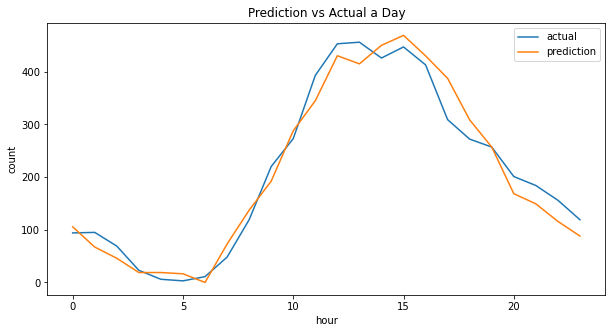

In [50]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(x='hr',y='count',data=bike_testing1[bike_testing1['day']== 15],label='actual', markers=True, dashes=False)
sns.lineplot(x='hr',y='predict',data=bike_testing1[bike_testing1['day']== 15],label='prediction', markers=True, dashes=False)
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Prediction vs Actual a Day')
plt.show()

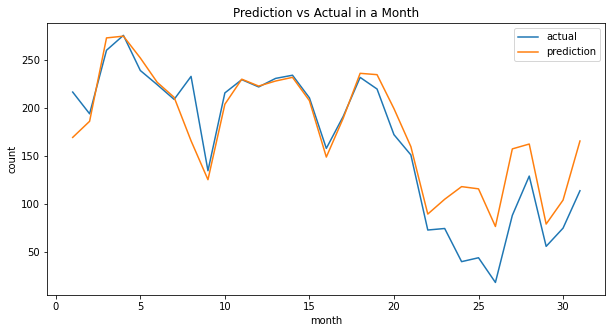

In [46]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.lineplot(x='day',y='count',data=bike_testing1,label='actual',ci=None)
sns.lineplot(x='day',y='predict',data=bike_testing1,label='prediction',ci=None)
plt.xlabel('month')
plt.ylabel('count')
plt.title('Prediction vs Actual in a Month')
plt.show()

Our model seems to fit the pattern as we can see from the graph. Because of the trend of bike-sharing rental is increasing from year 2011 to year 2012, we do not random split our dataset when creating the model. For every prediction that is above the actual, as we concern it is as okay as long as the number still in the interval range. Because when we supply a little bit more, it can be used as spare for undetected broken bike (such as flat tire or else). Also it can manage to adjust the increase of user that is not affected by features we include in this modeling